In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import TOFPET_cal_lib as TPcal

%matplotlib nbagg
%load_ext autoreload
%autoreload 2

# DATA SELECTION

In [429]:
filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_allch_nocompressor_210710.h5"
channel = 10
tac     = 0
tpulse  = 320000
data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data_fit = data[data['delay']==tpulse]
#plt.figure()
#plt.plot((data['tfine']))
#delays = np.unique(data_tc['delay'].to_numpy())
#print(delays)

  # GAUSSIAN FITTING FOR SELECTED TFINE DATA

<IPython.core.display.Javascript object>


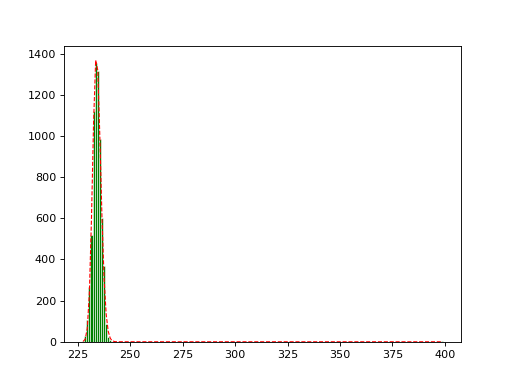

359500 63 3 233.86000000003276 1.9744047756485519 2.5645742490200876 0.043265637643048326 nan


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


In [430]:
fig = plt.figure()
axis = fig.add_subplot(111)
#data_sel = data[(data['tfine']>390) & (data['tfine']<407)]
rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
# Two distributions
if  np.std(data_fit['tfine'].to_numpy())> 50 :
    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
    if sel_1 > sel_2:
        data_fit_sel = data_fit[data_fit['tfine']<300]
        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,True,axis)
    else:
        data_fit_sel = data_fit[data_fit['tfine']>300]
        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,True,axis)
else:
    # Usual case
    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,True,axis)
         
    # Fit fails with narrow distribution
    if (sigma < 1.5) :
        print("Fit failure")
        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,True,axis)
        moda = coeff[1]
        sigma = coeff[2]
                    
print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
#axis.plot(TPcal.semigauss(np.arange(0,410), 400, 3, -10,100))


In [336]:
ASIC = 'asic0'

# GAUSSIAN FITTING FOR ALL TFINE DATA

In [431]:
filename = "/home/viherbos/DATA_daq/CAL_data/tdc_asic0_allch_nocompressor_210710.h5"  #ASIC + "_tdc_tpulse.h5"

channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Find delay arrays
        delays = np.unique(data_tc['delay'].to_numpy())
                
        for i in delays: #np.arange(0,360,0.5):
            data_fit = data_tc[data_tc['delay']==i]
            if data_fit.size > 0:
                rango_fit = np.max(data_fit['tfine'])-np.min(data_fit['tfine'])
                
                # Two distributions
                if  np.std(data_fit['tfine'].to_numpy())> 50 :
                    sel_1 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    sel_2 = np.sum(data_fit[data_fit['tfine'] < 300]['tfine'].to_numpy() > 0)
                    if sel_1 > sel_2:
                        data_fit_sel = data_fit[data_fit['tfine']<300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                    else:
                        data_fit_sel = data_fit[data_fit['tfine']>300]
                        rango_fit = np.max(data_fit_sel['tfine'])-np.min(data_fit_sel['tfine'])
                        coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit_sel['tfine'],rango_fit,False)
                else:
                    # Usual case
                    coeff,coeff_err,moda,sigma,chi=TPcal.semigauss_fit(data_fit['tfine'],rango_fit,False)
                    
                    # Fit fails with narrow distribution
                    if (sigma < 1.5) :
                        print("Fit failure")
                        coeff,coeff_err,chi=TPcal.gauss_fit(data_fit['tfine'],rango_fit,False)
                        moda = coeff[1]
                        sigma = coeff[2]
                    
                print(i,ch,tc,moda,sigma,coeff[1],coeff_err[1],chi)
                
                res.append([ch,tc,i,moda,np.abs(sigma)])
                  
                    
df_tfine = pd.DataFrame(res,columns=['channel_id','tac_id','phase','mu','sigma'])
        

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 0 0 385.95700000085446 2.3258481903815706 2.962562883910353 0.02154285696209457 nan
10000 0 0 381.81599999979153 2.239439714300755 2.647521332602203 0.15392246874853197 2.1878174653629596
20000 0 0 377.5499999997978 2.2414859641089016 2.5478053146201205 0.2867660764182902 2.8323868525134537
30000 0 0 374.0729999998091 2.185980416768388 2.731165604080233 0.2046489366561878 5.022131557673675
40000 0 0 366.9959999998109 2.020870386831447 2.6616356538308352 0.15425968769880116 4.457523364471627
50000 0 0 362.8899999997898 2.032491469932722 2.132955629768997 0.311085992152005 2.4697760650764375
60000 0 0 360.01599999981045 2.1585897109683088 2.612445070331838 0.23252774940476803 4.471746555661998
70000 0 0 352.94499999976483 2.284547127185735 2.2845666234745905 45.81811320456841 3.726908083470384
80000 0 0 348.6569999997953 2.3202708144609945 2.339132541513824 0.7716719277461774 2.5523095836110454
90000 0 0 344.3119999997798 2.1038882864103647 2.335166633832916 0.23809214660023428 2.39699

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

320000 0 0 229.03700000002405 2.1207394755733437 2.823259168866419 0.06049661938183454 nan
330000 0 0 402.67799999977115 2.75270254913291 4.3760077200809615 0.31500913641353856 3.912743641718261
340000 0 0 395.91300000081606 1.8702951234247938 2.473694940676131 0.020205191840946723 nan
350000 0 0 393.49499999982277 2.0115058694011996 2.0115066041025176 4.5910153594386856 4.0231853872821235
0 0 1 370.1320000009413 2.3321598671821353 2.5688327451070623 0.048847303250093684 nan
10000 0 1 365.9689999997879 2.253786621802432 2.679570480101575 0.18933415674169757 1.6233790339132137
20000 0 1 362.431999999706 2.199826799306104 2.68435341648182 0.12395880405878919 8.256750462832716
30000 0 1 358.0969999997849 2.058618573868258 2.4728917868784253 0.2081139283973424 5.550425075165745
40000 0 1 351.1039999997138 1.9640228841773661 2.4634312700707186 0.07462888690647061 32.11804662627117
50000 0 1 347.6599999997479 2.0190854183079523 2.6075557677406924 0.14237003524909111 3.876165968111487
60000 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

289000 0 2 227.43900000004507 2.082643870835076 2.724967176011024 0.13267519710104747 2.773999060915468
289500 0 2 227.28200000003955 2.068269527669986 2.696531560914837 0.140753726436713 3.039065151180884
Fit failure
290000 0 2 228.04981648419283 2.000481827972082 228.04981648419283 0.031908974716285524 6.142871422016999
290500 0 2 227.46100000004517 2.1400635521973097 2.7776527676969414 0.07185835322163567 1.2372323109746242
291000 0 2 227.40400000004968 2.045044848810563 2.6408360157073334 0.18331926365919188 3.458548105490904
291500 0 2 223.31000000003968 2.1316136743438796 2.383947689350013 0.33906654548780363 3.8819677026271893
292000 0 2 223.587000000041 2.2240020703293144 2.593817492004244 0.2042997783644903 1.6494491187739413
292500 0 2 223.31400000004447 2.08165617637195 2.2917865319172317 0.2788563425652037 12.623213353319182
293000 0 2 223.8530000000375 2.1320807218516697 2.211845370954723 0.5055297204052293 4.818627472134062
293500 0 2 223.59400000004104 2.145524486478171 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


130000 0 3 309.5829999997734 2.302046408013568 2.761930017802429 0.16154445040052784 2.5715816817789805
140000 0 3 301.3949999998015 2.2258146670050114 2.9060146926889434 0.16704478892609564 4.754372331363179
150000 0 3 297.89199999978973 2.2604887329264485 2.7444770270589776 0.19000252675362472 3.1263095495198248
160000 0 3 293.26799999978084 2.2890451339847337 2.6673895026707917 0.20710850856036334 1.812808152341613
170000 0 3 285.7289999997936 2.2688198604981418 2.733183148888705 0.17299181688495402 2.4794657487840586
180000 0 3 281.4059999997776 2.165047434954342 2.8201945957931374 0.1948081299401771 4.19774538464673
190000 0 3 278.4569999997764 2.11189113054864 2.3035988693732437 0.37015571815660575 5.792428259530937
200000 0 3 269.90599999981305 2.1678662994042557 2.167867742175612 7.15165401713324 2.7621114822399995
210000 0 3 266.6169999997726 2.2004073756620848 2.930641948701766 0.06096903971451869 1.7636914683826854
220000 0 3 262.3880000000496 2.3697068812118327 2.5667765425

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 1 0 376.7879999997922 1.9818393027463208 2.6137199095652686 0.257413111993078 38.676636150833914
10000 1 0 373.2159999998057 2.0946721920631983 2.859035218614447 0.17856125424691024 17.748920541827328
20000 1 0 369.8089999997917 2.2018148515573532 2.2018212115278666 79.64048407088319 7.3522398184409115
30000 1 0 366.79399999979205 1.9327819512686029 2.4374524574885204 0.32996136963051786 16.466166340490464
40000 1 0 360.1709999998068 2.095981438146061 2.7767087756051816 0.31120590727936914 13.795479053954228
50000 1 0 356.4999999997517 1.9055585428852686 2.614114721759049 0.1844777349098883 20.29393761651548
60000 1 0 353.2709999998044 1.9402316964518982 2.3777830001619225 0.19369408362778462 13.729359874171827
70000 1 0 346.69299999979444 2.16370719515585 2.725421815316774 0.22766565753695533 3.642136947284624
80000 1 0 342.40499999980125 2.167672520593664 2.8761227374555216 0.23443173535535167 11.910478546180927
90000 1 0 340.08699999980877 2.1679226758971737 2.759431434837749 0.35

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


10000 1 1 358.2699999998281 2.155539740463933 2.943096090301743 0.27589611666632763 29.072530784285487
20000 1 1 355.20799999978226 2.2357948224746957 3.0270657509764636 0.2875584531387306 15.698109305464746
30000 1 1 352.1769999998303 1.9696008908777405 2.536609179147409 0.18840487896490318 9.883937920466858
40000 1 1 345.72199999979375 2.097829735333605 2.9503405783329044 0.28499207230814444 19.25964294749576
50000 1 1 342.3099999998035 1.8023234092554792 2.1541163434031985 0.26682701652152807 29.485976959223013
60000 1 1 339.077999999809 2.003324291778011 2.283569533380834 0.2924896261175827 6.285440176665552
70000 1 1 332.63799999979574 2.113743444230497 2.3371038150992822 0.4299795888317559 7.531001274679255
80000 1 1 327.4479999998239 2.211716168506211 2.949855795588836 0.34115657726124493 12.86699898411457
90000 1 1 324.91199999978926 2.1756816648978763 2.6361188034146874 0.4022846853600306 9.283871579066494
100000 1 1 317.55299999979775 2.2331010618386244 2.9577363070493274 0.2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 1 2 357.0729999998091 1.9536350416294612 2.3468647751149687 0.3870889356241931 43.44567776591774
10000 1 2 354.6939999997944 2.1996822838857244 2.6249356651991187 0.4382426023183691 10.542884297695029
20000 1 2 350.71199999981764 2.163003188236196 2.8777504428611524 0.2931352263499354 15.044361889339404
30000 1 2 347.0119999998342 1.8818289812352658 2.33681381313358 0.3083398766386193 17.71161842851938
40000 1 2 340.69699999979434 2.0681021460953657 2.9324234915314236 0.21193728157188377 18.854746437529545
50000 1 2 336.59099999979685 1.8965257889170255 2.519386721221812 0.2081649194156553 10.512187300760358
60000 1 2 333.07499999980905 1.8992217373800415 2.4628328055764546 0.1930412633806009 29.399272129289773
70000 1 2 327.0229999998103 2.1512653589299133 2.804171791613028 0.37137243883916743 11.221933227506101
80000 1 2 323.444999999753 2.264898204525344 2.9780274425671642 0.27886855091248414 182.2254280677092
90000 1 2 320.7289999997936 2.06924137328963 2.9419478438557234 0.17024

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


340000 1 2 366.3980000007611 1.6554966831751077 2.2710516078662315 0.046108319543962696 nan
350000 1 2 364.42599999980075 2.0825588883081982 2.3738079535295764 0.503117927463756 9.914989508225613
0 1 3 358.5399999997744 2.111923566966694 2.6822223370041507 0.23161274476652002 26.32935159343411
10000 1 3 354.357999999826 2.1722787583712986 2.3294929720676554 0.7796901832636732 12.228848331447821
20000 1 3 351.68399999979465 2.1120414045413294 2.941605052620203 0.15353218467267124 21.565278956556583
30000 1 3 348.0559999998095 2.006893227594332 2.5631019857647375 0.12828735977223868 10.921392400048902
40000 1 3 342.05599999983315 1.8506621148278324 2.3030039713414445 0.2938826354040253 30.899327837745286
50000 1 3 338.0569999998095 2.0057182047144115 2.686721630102854 0.17650452848758347 18.95218895155855
60000 1 3 335.67499999979486 2.0604725371020427 3.1034528304805744 0.19682486110153755 48.1923488950445
70000 1 3 328.44299999980035 2.2761067125612264 2.8636966768376597 0.360183948851

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


350000 1 3 365.68399999979465 2.0667796344080815 3.0186559261691652 0.21028397506843358 16.078416427928765
0 2 0 370.091999999785 2.143885511194661 2.96343815441443 0.1811758863601211 34.34536250339283
10000 2 0 365.61599999979626 2.1572439368780136 2.7589821387744675 0.15464791964528085 4.208072474950876
20000 2 0 361.5789999998208 1.895690734128996 2.29220105048539 0.20150198270871658 19.57905512146074
30000 2 0 359.39499999977784 2.191166386650019 2.904060690426367 0.22621068471266104 10.16696560312076
40000 2 0 351.52499999982206 1.732986935000773 2.1709910107934776 0.20212839230459023 34.54618289513697
50000 2 0 348.8399999998146 2.0520787484660143 2.4028797050539024 0.4605788253366557 8.999249623557445
60000 2 0 345.1749999998067 1.98072225979917 2.7825343029158662 0.1605456284733657 18.25119835665312
70000 2 0 338.0359999997863 2.2014585302587055 2.38812385832265 0.5675271903758953 8.590265255712405
80000 2 0 334.514999999775 2.067206552583661 2.6156116567573977 0.26772160889662

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


110000 2 1 306.30899999977987 2.0615969923822335 2.2219907466802056 0.4008886943563136 7.583633540610161
120000 2 1 302.3789999997782 2.3494873546306487 3.0207806917738136 0.2763001380176558 12.718404345851308
130000 2 1 298.36699999980215 2.3328498099800887 2.580603358604326 0.3541393379983595 2.6418563017065964
140000 2 1 291.53400000017444 2.0273657491495047 2.410712786662332 0.13789887184495478 6.317305778577935e+46
150000 2 1 286.3949999998015 2.055848611279836 2.3851420836966355 0.3467710607535495 7.948269845441466
160000 2 1 283.58399999982066 2.126895408045011 2.4399911527382323 0.3949896147501666 6.994159400321649
170000 2 1 275.7089999996995 2.133241400203469 2.880187188016373 0.07751642828051422 7.465174829544199
180000 2 1 271.75199999974575 2.087345441345626 2.4480892762047635 0.2713121591795021 58.72060217846069
190000 2 1 268.15099999980725 2.087559556831877 2.2066875411741163 0.5060281882235931 5.764355665083071
200000 2 1 261.17000000004856 1.928880388993895 2.28593060

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scip

Fit failure
0 2 2 355.20837056674424 2.027794811230287 355.20837056674424 0.07769370405115579 18.20417784139132
10000 2 2 351.2299999998054 2.0776670283661653 2.534168076702443 0.2526439766728834 7.515242531555751
20000 2 2 347.26699999978086 2.0193430395249057 2.461126480352513 0.2082711971892799 11.005082452221872
30000 2 2 344.78299999981596 2.0780617030138218 2.7050338682705584 0.2227285132930163 7.007194602556134
40000 2 2 337.4029999998486 1.8618677061822464 2.424126629453298 0.1557043031825501 11.280060465976842
50000 2 2 334.7049999998178 2.065685962961728 2.9374909878232915 0.2440866953934575 17.2386147435244
60000 2 2 330.78699999981586 1.8975874969984725 2.5755653760832846 0.15997759522765292 13.241359104906044
70000 2 2 324.1819999998065 2.1463837968378834 2.5925230623281457 0.33420661422713777 7.914889799058049
80000 2 2 320.3369999997792 1.9687494192526978 2.505431304533202 0.2334278653293136 10.74716233851738
90000 2 2 316.11999999978434 2.129200055971304 2.7328885701659

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


301500 2 2 215.22500000003927 2.090530022581357 2.691191822354478 0.2103945576761297 6.048225981702015
302000 2 2 214.6470000000365 2.0886549351564696 2.908266616613386 0.208904291021997 12.717436279989354
302500 2 2 214.67400000004142 2.1874793464468145 2.988891276231403 0.2041922311196378 8.270282038024993
303000 2 2 214.47700000004048 2.228547708217555 2.997738728907161 0.27264326514199816 9.581270249841488
303500 2 2 214.78700000004196 2.219582087887904 3.119203945240108 0.2219275086956723 18.824839167952995
304000 2 2 214.53300000004074 2.2459293866977905 3.15099031017405 0.236097575243495 11.276962089041596
304500 2 2 214.30700000003966 2.2911321327186656 3.085646673658829 0.28671816191857014 10.67226007781421
310000 2 2 210.63400000004123 2.004573360392435 2.662034269308721 0.13384344539542603 5.11445254394041
320000 2 2 206.2400000000298 2.037631081196488 2.5255651929914786 0.07271942448628363 nan
330000 2 2 370.89199999978973 1.6416408812519692 2.0794388774577843 0.27165914503

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

294500 2 3 217.40400000004013 2.0271390380680123 2.2674657192847207 0.28728758091479023 6.236544343449368
295000 2 3 218.64000000003648 2.132120586329372 2.676480639488156 0.3227854603385625 9.305245834309403
295500 2 3 219.13200000003883 2.1448843341786397 2.9233054283511315 0.25958900379799854 10.076744110150996
296000 2 3 217.48200000003573 2.0941497538609855 2.387158057797271 0.23233940372171658 5.056663441047094
296500 2 3 218.30600000003966 2.1866666995628825 2.446973084758281 0.5313503138907641 7.842534944060437
297000 2 3 217.5820000000362 2.027356743705348 2.49075336252034 0.21747442282213258 10.32118972681562
297500 2 3 218.6040000000363 2.165671481037229 2.4452777938356487 0.4479126303293382 5.082181626805715
298000 2 3 217.62200000004117 2.1160740595430685 2.4605132021120872 0.2367334287463914 4.01738904832193
298500 2 3 218.29000000003958 2.123780125389034 2.152042173327767 1.9113669823990729 9.439088140256992
299000 2 3 214.6470000000413 2.2065023910042316 3.0523259701931

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

80000 3 1 333.71099999981766 2.1925248399957944 2.81548573854454 0.2734124147572196 7.855250720942382
90000 3 1 329.7359999997698 2.3148965441225524 2.979765393623581 0.2319297656898105 5.925152057043038
100000 3 1 321.62699999977235 2.392115776914056 2.8892149153615145 0.3758780534129491 8.941314278793763
110000 3 1 319.27599999978065 2.455237662098477 3.271932191252602 0.2828029271561681 9.129056805077298
120000 3 1 314.9009999997895 2.2432670981263874 2.8102551937836746 0.20268408422454406 4.49660607097122
130000 3 1 311.30899999977987 2.2016188922805684 2.6779032279635326 0.26821200516496485 9.419306277722438
140000 3 1 303.5759999997499 2.1790731164444326 2.7620464489197207 0.24641361325216815 6.508188228536744
150000 3 1 299.7759999997925 2.0156593048384144 2.83481097025706 0.10598751456879407 32.81926686986595
160000 3 1 295.4509999997765 2.097093734610599 2.2936847858674323 0.558358705221395 16.81275932486604
170000 3 1 288.7769999997688 2.338731769122072 3.3459265200485997 0.2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


50000 3 2 346.8779999998137 1.9543668620617909 2.44216711808681 0.2360556865433358 11.537221884721697
60000 3 2 343.25199999980487 2.2026368334497244 2.8893023939953144 0.35497589518629985 12.714070414867956
70000 3 2 337.1959999998062 2.2203912701334696 2.4046678568140423 0.7435758126292508 8.425348233259722
80000 3 2 333.9639999997644 2.199230426238974 3.0773287459047935 0.1820508041520623 12.885172731686163
90000 3 2 330.2509999998049 2.2308785568304055 2.734817616874749 0.27307842419204037 5.6660677736533165
100000 3 2 322.32899999980305 2.361352175664606 2.571306793017937 0.6967364628209607 6.658417740487968
110000 3 2 318.30399999978 2.468372241560208 3.099353831378359 0.38048968088951274 8.597738743730625
120000 3 2 314.93999999976495 2.3683440126624307 2.927939998398303 0.3035245693015268 7.201408127337298
130000 3 2 310.6169999998199 2.1326691354141936 2.6641084980734813 0.2444221107901972 13.347981437734136
140000 3 2 303.72399999977006 2.1520332529930193 2.7832054324677515 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scip

20000 3 3 361.32799999980307 2.1384248186777532 2.800686996662316 0.2212407874692752 15.14930486821975
30000 3 3 357.37499999980196 2.091131610317474 2.2825871388331107 0.566344963478968 5.533471363260933
40000 3 3 350.31499999977973 1.8351172810269007 2.2389458591687914 0.19491617066946101 8.899995977210919
50000 3 3 347.0869999997851 1.9806483152572596 2.3685641814540577 0.2684401688859208 11.06886303903402
60000 3 3 343.52199999977483 2.1936821440124388 2.8505546493144878 0.2561770896319638 7.032177845944871
70000 3 3 336.7249999997937 2.1371722885129243 2.547050004578446 0.2896514890465377 7.922379886724026
80000 3 3 332.6389999997957 2.2404438094629873 2.2445043903782054 4.853055353093618 9.602264439148792
90000 3 3 329.68399999979465 2.328014070741333 3.165860194844417 0.2065979636136443 8.693171686526385
100000 3 3 322.075999999809 2.410611921412031 2.8854855268852884 0.4087029254467052 6.696210065271958
110000 3 3 319.39499999977784 2.3757880904701327 3.1912215844525993 0.11206

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 4 0 378.79399999979205 2.0151234634836235 2.7905663992139074 0.16501079189196788 43.102305737689186
10000 4 0 375.6049999997965 2.220025630445045 2.9221555993779025 0.3035480664914931 14.244022066567416
20000 4 0 371.56699999977377 2.2033313466821136 2.2037583892176125 19.537873624383778 11.098823044092597
30000 4 0 369.23099999980536 1.8431340176853754 1.8431383182335563 35.52845652475211 15.68130289203163
40000 4 0 362.5139999998223 2.0647297115478875 2.8553224353075457 0.30779214697109863 17.626010598422635
50000 4 0 358.68399999979465 1.9450805738056378 2.6688033667075324 0.21875362238527102 25.029375423076964
60000 4 0 354.5949999998204 1.8690127894346173 2.220721914509469 0.28716925585125946 12.064971531644616
70000 4 0 348.388999999778 2.034613399852981 2.9286905426656893 0.17999551743185307 19.800799355250707
80000 4 0 344.2639999998046 2.2336224937191007 2.96825848148601 0.26335327812819 16.836341703455112
90000 4 0 340.88099999976635 2.271330273230042 3.2101554856124386 0.3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/s

310000 4 0 235.03700000003838 2.137982357235914 2.8149343369670645 0.2907331111245347 32.58878772884641
310500 4 0 236.02700000003833 2.332031947907708 2.585412014798047 0.6016005240158833 9.922344050843353
311000 4 0 235.06600000003374 2.1143723542101087 2.6454348520846573 0.349336724055863 26.5892838285916
Fit failure
311500 4 0 234.96361489153554 1.9885185752253345 234.96361489153554 0.06812226391378072 10.157764943908047
312000 4 0 235.56400000003612 2.165265596588328 2.701393384975699 0.3789701492592747 18.64227173641189
312500 4 0 235.48700000003575 2.250124754962569 2.98957897438328 0.3050927255149798 16.040931802382
313000 4 0 236.08500000004338 2.1908706885386775 2.646817067426334 0.4523015665809265 13.190674975375517
313500 4 0 235.11500000003875 2.2420276977094926 2.9164086590068226 0.2660951165920956 16.774582159707755
320000 4 0 232.52900000004072 2.3309484585151594 3.3046947670239115 0.3549145568754862 20.661216583391834
330000 4 0 392.1829999998538 42073.08005324957 6979

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190000 4 2 275.89399999981333 2.117286007573552 2.6090490331984 0.3316225602479262 7.8805146691786145
200000 4 2 269.0549999998095 1.9924051853393419 2.829032111818014 0.17031172410266168 62.62888292243614
210000 4 2 264.1940000000487 2.2408928742467897 2.9254075466921052 0.21786214245932284 7.3369109290206795
220000 4 2 259.5620000000361 2.1890285493020287 2.7336689023647143 0.40508886239989855 18.388169309968465
230000 4 2 253.38200000004002 2.072669624156988 2.848368362817255 0.2179847027867932 30.996069611168057
240000 4 2 249.22000000003925 1.7921109495479652 2.3693172206003172 0.22869154654573587 49.094751324149634
250000 4 2 246.4600000000404 2.1275498841533023 2.526412366847685 0.44121902679625474 9.959320557745649
260000 4 2 243.3990000000401 2.2157822988130387 3.274602709862529 0.21359273024278821 24.980126154149605
270000 4 2 235.69600000003675 2.068307438173315 2.6533316818118964 0.2800294170834819 12.722612687411134
280000 4 2 233.08100000004336 2.0312598722027513 3.040836

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 4 3 363.7199999997938 2.0689836979956344 2.941359082108918 0.18030458007297517 48.89726523296114
10000 4 3 360.1719999998304 2.067805020338468 2.688079783386823 0.2787732169990157 20.59089257205717
20000 4 3 355.9279999998125 2.191820529172263 2.815962073017912 0.3529057249466091 13.123818083849368
30000 4 3 353.6459999998192 1.9666188503419895 2.802670741987868 0.18915892111398355 41.13099661279468
40000 4 3 345.43999999982407 1.9921145269515923 2.748236241953029 0.27896037589114286 24.91759250864062
50000 4 3 342.6609999997952 2.08299839623428 2.7797967344404144 0.23358165685006094 9.911931043825417
60000 4 3 339.46499999979983 1.858256638629422 2.3924512609586523 0.22502416054233212 14.909981990701471
Fit failure
70000 4 3 332.8888610044088 1.9339011771898467 332.8888610044088 0.1059242203402505 17.870669975538746
80000 4 3 329.25699999980475 2.163994333558338 2.5515224806522045 0.41515497662941653 8.864841735465472
90000 4 3 324.95399999983556 2.0949529529637747 2.924061122223953

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

310000 4 3 220.25600000003942 2.111848890470524 2.7324643140572125 0.28751023526166897 22.58333766404955
Fit failure
310500 4 3 220.07263134468906 2.0839392903643352 220.07263134468906 0.07801618246002019 10.080270839682804
311000 4 3 220.05900000003848 2.1492253894282514 2.7459388541457312 0.30262266853915376 20.492497912046126
311500 4 3 219.51900000004068 1.9650095158165999 2.4286405098102306 0.30583303477876106 39.45663600958929
312000 4 3 220.48900000004053 2.1561128971912993 2.8418367256526054 0.3322163105858806 24.20220560776728
312500 4 3 219.89200000004723 2.1036937940997307 2.6555742436347254 0.308986242147514 39.379116686278046
313000 4 3 220.69500000003674 2.1483602484290647 2.8484818309053392 0.40847295258872585 25.1987736355744
313500 4 3 219.8880000000329 2.088967606270192 2.8512103772899273 0.24168210830965692 46.044924740880546
320000 4 3 216.39000000004006 2.24706337481417 2.307909873002561 1.5996272979157191 11.82034293882648
330000 4 3 375.49799999984634 2.265189798

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


150000 5 1 306.6049999997729 2.2144371429035092 2.8942951316014156 0.2293350761482155 8.581852933617675
160000 5 1 303.27799999980425 2.1068570134054836 2.4062324918668536 0.3727646987341848 6.547235892168874
170000 5 1 296.0539999997859 2.3944336835902695 2.8412840887730715 0.6062380739473555 12.908938547788603
180000 5 1 292.3349999997556 2.1121902007857836 3.0219802836000973 0.14933949832481874 14.06951687236072
190000 5 1 288.5539999997977 2.0425705904937663 2.410003550598852 0.3115205248983607 20.705591368998352
200000 5 1 280.46099999975263 2.4245741222351755 2.479291302786483 1.3422734881592373 7.156380279775972
210000 5 1 276.37399999977833 2.3773238621969845 2.3773257364955422 50.019712287823424 5.366976843766332
220000 5 1 273.1989999997825 2.3888210751738486 2.697570537287228 0.41850694665296573 4.312942301755608
230000 5 1 264.07099999980915 2.2069984483472105 2.9586347765509315 0.1764312096250535 13.71621208893721
240000 5 1 261.0650000000385 2.238217381840263 2.5374021858

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: R

100000 5 2 329.6899999997945 2.275621912574378 2.883790357432382 0.23417620911354226 10.24937102558724
110000 5 2 326.8929999997897 2.293058186854771 3.0057065426950635 0.2391763095768536 7.916283957943094
120000 5 2 322.89699999976597 2.4395237483798935 3.1619994431901732 0.23119580133085224 4.9513970073486036
130000 5 2 318.44599999977663 2.1194057818193994 2.5115191664510275 0.3113661773005942 5.104482165993792
140000 5 2 309.9039999998131 2.244478957695808 2.670818104648783 0.41282023983747573 6.829717078220443
150000 5 2 307.3489999998026 2.1544066288047174 3.0395665356817845 0.205515552308534 20.45450647098128
160000 5 2 303.0719999998091 2.018255382929039 2.4601964977037944 0.20439093236275516 6.747827273542612
170000 5 2 295.3009999998037 2.3449574958037074 2.4913985583084597 0.7611390707898547 5.912916948283227
180000 5 2 291.7359999997934 2.2313000886974645 3.1600438613731527 0.22402996268907815 14.737841379919997
190000 5 2 288.16199999978335 2.0855121291346275 2.57518236800

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

50000 5 3 355.2979999998038 2.1318943783233575 2.2268348672528737 0.7049992461399153 5.91288784577474
60000 5 3 352.050999999786 2.227355656813024 3.157835426543458 0.17762935139803593 8.280729995488814
70000 5 3 343.8359999997201 2.2109680605425766 2.6181555306438513 0.27402336708576236 206.23543966924962
80000 5 3 340.1679999997832 2.283335066437944 2.2834745738102855 44.85314067023587 9.364012870226931
90000 5 3 337.3749999997783 2.2080974430119094 3.0399570851435676 0.2227890879634344 12.989468154580564
100000 5 3 329.30299999980366 2.287741528421589 2.8212074863390892 0.2570168391305554 6.687891805693394
110000 5 3 325.72399999977006 2.377597360150061 2.378367602064771 14.397078795617926 8.209163167682123
120000 5 3 322.9709999997642 2.462954472253638 2.9969143518408567 0.20641983974950628 2.9614580768672623
130000 5 3 317.8249999997913 2.2552240563354378 2.917266181871027 0.22085224724990205 8.009262944241284
140000 5 3 310.118999999808 2.2671538923642234 2.5366828870431757 0.686

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 6 0 370.6529999997954 2.1276180661674133 3.0912582921817715 0.3480984478915099 90.62834963782994
10000 6 0 366.67599999979484 1.9190446188380559 2.5882122699801657 0.32963322484275465 79.31023279275752
20000 6 0 362.97499999983506 2.1104073325020654 2.7176213836784426 0.3766654237376862 17.39330426832183
30000 6 0 359.3629999998259 2.060746678313263 2.3098342324409433 0.8206222349727238 21.126833900507073
40000 6 0 351.7999999998392 1.8303477015852718 2.3366940456149314 0.5780735450503571 53.49860292138865
50000 6 0 347.8719999998375 1.877965682204156 2.6002898993536117 0.2106307578742179 118.5332140836989
60000 6 0 346.75299999981667 1.825544293076749 2.540534801981275 0.3382782241543711 51.462016122765064
70000 6 0 338.79599999981565 2.046325722600029 2.1705698839464986 0.9799461445580789 15.728749601217288
80000 6 0 335.87899999979004 2.1131814794994863 3.163388991062364 0.2186259431671687 60.10267706174022
90000 6 0 332.0049999998107 2.132245292633611 2.5864488668933836 0.6842284

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

310000 6 0 226.34300000003984 2.145514067430315 3.136118454395201 0.08109611449798705 nan
320000 6 0 222.1780000000295 1.8838034547103297 2.7819975986631458 0.07884553753798469 nan
330000 6 0 385.1120000008027 2.642258761181415 3.9313689266332 0.11577477555836586 nan
340000 6 0 378.8759999998374 1.8434301368158184 2.3171548303957867 0.21292420029636497 32.603888977360924
350000 6 0 376.49599999977545 1.89831505178886 2.6282348042041934 0.27806709506923155 22.644445386559163
0 6 1 359.8869999998135 2.157659742190699 2.8500968419125527 0.36641512611780136 29.188378681673953
10000 6 1 356.08799999980874 1.9894939491604522 2.903291773156176 0.25998968841505893 104.48887214350789
20000 6 1 351.96799999974064 1.8707815520182143 2.2346457839942424 0.409100812395399 35.81005961613129
30000 6 1 348.00699999985795 1.988120407165254 2.828408483810031 0.22976332714478634 25.71184393675238
40000 6 1 341.9429999998122 1.7778395915326557 1.7778533091922 155.6529595569813 17.294596467782885
50000 6 1 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

290000 6 2 228.0450000000384 2.019779446249061 2.741597385770987 0.28635992683062056 59.49814908404753
290500 6 2 228.53100000004073 2.0271737172944384 2.442321971134059 0.4204489240733878 19.53143882079414
291000 6 2 228.6020000000363 2.0971455828612946 2.69654356191307 0.4406928431315453 24.310718374932414
291500 6 2 225.1260000000388 2.181543992300629 3.0225459226828937 0.32292729813209714 25.033288565079765
292000 6 2 224.84400000004223 2.1953500240377126 2.864821784904853 0.41162003073077946 14.434468216690872
292500 6 2 225.5040000000406 2.18410003845739 3.120791279876352 0.3064391943584145 21.153551939688583
293000 6 2 225.50500000004538 2.1927248862680453 3.095269726356772 0.2635952494143301 11.640406476294311
293500 6 2 223.96400000004758 2.202961686861921 2.2030689610442002 30.354512158860796 14.119146622954842
294000 6 2 224.80100000004202 2.1274645317817162 2.6186836231654738 0.46372209061002756 12.989633258266469
294500 6 2 224.97800000004764 2.219164110501134 2.6833833579

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

250000 6 3 242.07900000003858 1.870271414919915 2.527467200780498 0.39582008022609383 141.265154837589
260000 6 3 237.95700000003322 2.0924577178351513 2.8164726732859657 0.287187754342453 26.877189284956305
270000 6 3 231.77900000003714 1.8302633313606738 2.265857730575513 0.5610477561765251 44.38578659812552
280000 6 3 227.54500000003125 1.8542780175751445 2.359502390263671 0.2798789411112931 42.87776002492792
287000 6 3 223.960000000038 2.150726609329659 2.49270580233116 0.5669004144970785 14.171973639054826
287500 6 3 223.94700000003795 2.066500687922119 2.0665257936588013 66.7800584782476 13.326228864169776
288000 6 3 223.68000000004145 2.036837412329425 2.2566056002274095 0.5461895217673299 11.106387097141562
288500 6 3 224.70100000003677 2.079633582503713 2.6359917799344994 0.39448407746288155 11.085969433552274
289000 6 3 224.61100000004112 2.0844215882376416 2.6140365938978056 0.4157446452770295 16.018672225195157
289500 6 3 224.71700000004162 2.1602551575542366 2.855878829065

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 7 0 364.12599999980785 2.0414723343240353 2.663635632619937 0.13926517069870145 6.122426202863597
10000 7 0 360.78399999981593 1.9716683687759804 2.066171204599329 0.3833533610678807 3.6090422873920103
20000 7 0 356.4089999998248 1.9155687000597432 1.9155701518367851 6.626654453994185 2.4382846683601462
30000 7 0 353.0049999998107 2.059580935833918 2.398676748863812 0.166436228481833 2.286525557800793
40000 7 0 346.0919999998323 1.858555568350059 2.006713446523879 0.24295379548061904 1.556739780216603
50000 7 0 343.8759999997901 2.0351429232246607 2.6384707876718836 0.16759209433329608 5.336572981500842
60000 7 0 339.6159999998199 2.105322619657965 2.822249657514458 0.17887572090972026 4.439473976396265
70000 7 0 333.0239999997866 2.110008271096513 2.3779719516784246 0.23507030875892396 2.3137145677725024
80000 7 0 328.77299999979255 2.090979920168687 2.5377147485184723 0.174527412467022 2.6621110455260264
90000 7 0 325.37299999977836 2.0762845325577546 2.6232280699030253 0.148983011

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

310000 7 0 220.2549697876986 1.9758236472188422 220.2549697876986 0.024821575877986054 2.902937679553793
320000 7 0 217.42200000003066 2.050992256230269 2.050997064686404 4.7085490262352065 nan
330000 7 0 379.91099999976564 1.5876530219722322 2.079970480491939 0.09695793968701621 70.11961854357664
340000 7 0 374.50800000077595 1.7042616271692674 2.2887564670432936 0.04748567759016659 nan
350000 7 0 371.1099999997846 1.9666601385259932 2.415056814984348 0.3090624161348533 17.197639615134822
0 7 1 344.95299999976464 2.0264099232912884 2.5898435572359317 0.1401241372374888 11.497904304726884
10000 7 1 341.1329999998077 1.9612589237820583 2.300515900605948 0.3219271998868533 9.5697385848252
20000 7 1 337.50399999972797 1.9940118389369546 2.3138359922108163 0.13517281633283545 25.29846957349895
30000 7 1 334.01199999981054 2.083738491069436 2.61507118170098 0.14459562658834924 5.433303223180875
40000 7 1 326.4989999997754 1.824103371558285 2.174945196499881 0.1671518182032018 77.58398153719

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/s

 2.095456116073102 2.8374296137430255 0.09825819837166111 5.877553452461218
299000 7 1 205.45400000004037 2.010459233665136 2.4831689547936375 0.15607974545983835 3.3269054949905894
299500 7 1 205.99400000005727 2.052007490306723 2.3714169189864585 0.29398860918426883 42.95245198928477
300000 7 1 205.64800000005562 1.9932101989035846 2.442129391396896 0.23390498399214515 16.176778395434056
300500 7 1 205.74500000004653 2.055510127165525 2.399648427341007 0.2940667033446508 4.439044422586503
301000 7 1 205.20000000004393 2.037106318406172 2.657401075765255 0.15190310372178617 4.435392831124548
301500 7 1 205.51700000004067 1.974831561749493 2.6121826512687902 0.14398637444802037 6.984780084185064
Fit failure
302000 7 1 205.04087989458242 2.0284405637455736 205.04087989458242 0.040083023597055886 2.440799680422064
302500 7 1 205.81600000003732 2.0128561963968883 2.42547026838918 0.1737140073284414 2.721387278872053
303000 7 1 204.93900000004268 2.072069576267204 2.794930326093914 0.14650

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

292500 7 2 211.38100000004002 1.9478989920037988 2.0643395865380136 0.4316175770512336 7.979737395990278
293000 7 2 211.36100000003992 2.040379845740593 2.2755608368769775 0.23627564970386986 6.3983596324168275
293500 7 2 211.39100000004007 1.917127293375148 1.9171342058704817 30.818126604227206 4.206092668684732
294000 7 2 210.6280000000412 2.0581235203395973 2.597985557989236 0.1083741480073233 1.2864323401486821
294500 7 2 210.70600000004157 2.041513977403449 2.474296579647809 0.21243844628470604 3.669866265451215
295000 7 2 211.0430000000384 1.9308867893320825 2.333654786323271 0.17763020061542326 10.251907593855213
295500 7 2 210.46900000004044 2.0172762312701624 2.558679641601978 0.18271642194824253 4.133406248452433
296000 7 2 210.69200000003673 1.911071739233137 2.1990859480013305 0.28789780067352283 7.847553358778678
Fit failure
296500 7 2 211.05261473899301 1.959659336675735 211.05261473899301 0.03700272131381901 2.983597762554274
297000 7 2 211.3490000000351 2.00967657681125

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 8 0 394.8039999997918 2.0496182710177178 2.4365270292278036 0.3888174404991385 15.741212307165235
10000 8 0 389.9899999997874 2.024400682375112 2.461580040665532 0.3695260295238257 8.82842535070221
20000 8 0 385.9289999998125 2.1438337353963526 2.710331078006822 0.2841952389534917 14.85471405669565
30000 8 0 382.4949999997991 2.211114936248547 2.331832875699155 0.8109751105855875 7.140391061731356
40000 8 0 375.77099999981624 1.9738328149516233 2.4960656539685684 0.2496150554277222 12.835266813341292
50000 8 0 372.55899999977396 1.996093759643561 2.4617041375571667 0.23096991887598212 6.607098571527037
60000 8 0 368.9029999997658 2.0932483818680963 3.0427727022266655 0.19589092809226985 18.928042187436258
70000 8 0 360.87099999979023 2.1538565469947804 2.5408135967411676 0.3275717314001358 14.02103843912751
80000 8 0 357.9639999997644 2.401614592890545 3.1244269823582025 0.3585373200201623 11.602188592673992
90000 8 0 353.8919999997661 2.2575852735781083 3.259327750486009 0.178829799

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 8 1 378.84199999976727 2.196687937591508 3.113830831701179 0.25479009628661897 29.31410796303659
10000 8 1 373.94999999978836 2.14722812723999 3.0205353627682108 0.22483591626580726 15.364917403415419
20000 8 1 370.02199999978666 2.0091679996606175 2.0091956734047436 50.10734356601983 10.973977272718011
30000 8 1 365.87999999979 2.131861767814682 2.871185323391273 0.18606787737875824 25.387954554750685
40000 8 1 358.61099999977273 2.0277457091324558 2.7568120131251392 0.20881957536797696 11.106463898471306
50000 8 1 356.1329999998077 1.8585953984057042 2.2990186346068247 0.16593965140613542 14.708875077160558
60000 8 1 352.99199999978737 2.145759823453929 2.8856985977278153 0.2088545950507774 6.724394816604684
70000 8 1 345.3219999998032 2.0423157867927553 2.0423377488743664 53.39151003999659 9.224179397237144
80000 8 1 342.08399999980884 2.4287269063906693 2.4287282546475835 14.395321618805728 7.083511032173129
90000 8 1 338.6999999997943 2.2564081552352824 3.166576981728962 0.33474

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


340000 8 1 389.12499999980787 2.0112027965791257 3.0106872102610676 0.2393901536480587 24.756174498598725
350000 8 1 385.9389999998359 2.1127879610122076 2.6386778542166476 0.27674710320902013 10.16672393057639
0 8 2 370.6429999997956 2.0758343854169774 2.5817875902144802 0.2582546272907744 25.27819180152925
10000 8 2 366.4969999998227 2.0525742346187954 2.5068294427177835 0.20940605332229542 13.805008514796977
20000 8 2 363.39699999980144 2.2771330350058 3.097626546751387 0.32995931112165 14.891234460462025
30000 8 2 359.08999999978505 2.132990848856596 2.82602607729089 0.2716108306569758 11.07769981999166
40000 8 2 352.28499999982773 2.062046435973639 2.2011275231179916 0.8716543477344669 12.169789066500606
50000 8 2 349.1789999998066 1.9092121330621943 2.7570845471163175 0.1957602808976408 39.26696443137347
60000 8 2 345.2939999998275 1.937712833618594 2.4204284448400615 0.3133746475618067 13.099886056601562
70000 8 2 337.7249999998173 2.207609081184526 2.630090893368187 0.534443666

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


330000 8 2 386.22099999978195 3.1305513554578037 3.5863434889235104 0.5756016216984 0.8418018303899077
340000 8 2 381.0019999998344 1.8805368018800754 2.345562384599848 0.2890159956441661 9.08322174173618
350000 8 2 377.18499999980645 2.1722295501755617 2.2501232018833637 1.1198762947801821 10.046872273771958
0 8 3 374.10999999976093 2.073857333805771 2.8981827484387974 0.2114725982143834 46.13923424459446
10000 8 3 369.4849999997757 2.0339966627728034 2.691070014735253 0.22189736153619988 8.749095593997147
20000 8 3 365.17999999980657 2.086733221877432 2.4279851216115476 0.372787179491721 4.914976679479703
30000 8 3 362.09199999980865 2.18745053874703 2.45177059694332 0.42180784022047746 4.593839973620633
40000 8 3 354.88699999978985 1.9219996791600582 2.449777846327568 0.19747798708114994 6.848547262944373
50000 8 3 352.15099999980725 1.9678367371512493 2.0736167608647715 0.599124059843602 6.502159180677383
60000 8 3 347.9429999997885 2.2147195324867157 2.907209543552844 0.4018337458

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320000 8 3 219.3220000000302 2.0244329266602934 2.414367028498024 0.11848816371966078 nan
330000 8 3 390.08199999978524 1.9228669039201296 2.7727503651189114 0.3316273078689936 18.133879301061395
340000 8 3 384.9969999998109 1.9310877194288028 2.5999650359580837 0.15678564178118196 6.842354192524149
350000 8 3 381.46399999979985 2.1310848918328302 2.4128708059230375 0.43896713574543483 7.27502821035522
0 9 0 379.8509999997907 2.0516508255043453 2.4059674139307385 0.22320169025808673 12.783096803617463
10000 9 0 376.71799999979385 2.227903374519005 2.494753857870247 0.3785239878886915 5.616223374497107
20000 9 0 373.61199999979635 1.8930549561289671 2.409583818285513 0.17186194454444897 10.753476526800366
30000 9 0 369.2639999998046 2.1080671825193336 2.249797170758119 0.3016071668644134 2.1078406548567914
40000 9 0 362.96499999976436 1.9426758535170559 2.6738507574274593 0.14077387705298763 10.03065945215251
50000 9 0 359.4489999998002 1.7964998338261755 2.0742778905795274 0.2419478763

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


200000 9 1 272.54199999977436 2.1583028920032357 3.0175512575177805 0.17412985634141376 9.582256567151026
210000 9 1 269.38599999973076 2.185965472199555 2.368015700339199 0.5275139309790458 24.73133136326401
220000 9 1 265.8929999997897 2.3641283477921973 2.36415191693317 79.54375815309427 11.519433368305236
230000 9 1 257.4750000000405 2.3046521346356905 2.9947707523493428 0.2885417416979016 14.602275431295027
240000 9 1 254.24700000004415 1.8715012605899708 2.369605309790815 0.21276323513796594 135.21565995696173
250000 9 1 250.51400000003588 2.085348870292216 2.6788764736114588 0.3395851366984624 16.451729849887723
260000 9 1 247.84200000004222 1.997985609193363 2.972538640806462 0.22269160211821504 168.47584907058814
270000 9 1 241.22300000003926 2.1352658399863107 2.2560337782812745 0.6158612869554425 6.261064156160929
280000 9 1 238.31500000004448 2.042377888447168 2.826373437217119 0.18604609569575556 12.396119988846204
290000 9 1 233.958000000038 1.8747666969282824 2.301615686

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

60000 9 2 339.050999999786 1.9479446062337273 2.556666313811932 0.09469753405085425 5.195832452051567
70000 9 2 332.4789999997995 2.3301784802303023 3.2201958749721644 0.29310061250698044 12.272315914236401
80000 9 2 327.9069999997894 2.2953497341089193 3.1820694775294847 0.18060008671618316 11.083071911579927
90000 9 2 323.6299999998196 2.2922119336269127 2.82003519644064 0.35714957480008563 8.16153414648152
100000 9 2 317.3399999998028 2.208680276604586 2.9409198624806363 0.20095174915944256 7.337924520304471
110000 9 2 313.48499999979936 1.897558694253143 2.356902511992177 0.24714468890806152 9.082749545245965
120000 9 2 309.63199999977223 2.109194621412086 2.7422685744076203 0.20919178522107318 44.09739299128937
130000 9 2 305.47799999982317 2.3069595912612484 2.9951160762001137 0.3112155000708755 13.868615066059114
140000 9 2 298.30899999977987 2.07454795023371 2.692017029599324 0.3645977310039508 20.65574607234665
150000 9 2 295.01999999981035 2.066359724569234 2.538894683765894 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320000 9 2 214.83100000003262 2.103699520776415 2.903556909187898 0.07162635463435216 nan
330000 9 2 375.39999999984866 5.442556719159841 8.914155824664471 3.732408560504435 10.170596285074865
340000 9 2 373.3079999998272 1.7507292532795988 2.46643191704641 0.13235547998516795 5.074357651402137
350000 9 2 370.46999999982336 2.092601242235185 2.2882455748033337 0.5530890327311466 8.910976752223913
0 9 3 363.0739999997854 2.186549666545858 3.0381001022506027 0.24900317304652267 30.350266349316076
10000 9 3 359.77699999979245 2.1069718290698414 2.479095612837056 0.37858528506228833 14.283578772497384
20000 9 3 355.75799999981655 2.0614228809590527 2.4384306101868174 0.2677439120835488 7.630641226491142
30000 9 3 352.09499999978493 2.263773464906102 3.005945400932218 0.2994329948101418 14.225003528195941
40000 9 3 345.9039999998131 1.992547255584883 2.323745309544919 0.3094917095791565 8.675925101327884
50000 9 3 341.82699999983856 2.018723715299693 2.509506708449806 0.3623401106844072 11.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

300000 9 3 222.82300000004213 1.981233850396179 2.7646714830930295 0.18756461531718097 15.986496107272217
300500 9 3 222.53200000003596 2.2413456537723646 3.02547660864176 0.28485374342174025 9.645715178274061
301000 9 3 222.89700000004248 2.02250400070233 2.8723829876545115 0.17629810858711184 29.06936430346592
301500 9 3 222.87300000004237 2.024442007329785 2.939323098078776 0.22092686085022697 26.240018921880548
302000 9 3 222.98000000004288 2.097629209183294 2.9270617762820414 0.22153607065141218 15.412091254286842
302500 9 3 222.28300000004432 2.136750105709457 2.8974228777912883 0.29320361369064457 10.58917729755156
303000 9 3 222.70100000004632 2.070053629653572 2.9464270294362844 0.20769477845976853 17.761575272129505
303500 9 3 222.7780000000419 2.156388364984565 3.165176460365111 0.2020893585820025 30.891665066008187
304000 9 3 222.6670000000366 2.0648536042723133 2.9016889548742753 0.16098186345816412 14.660794679943937
304500 9 3 222.72200000004165 2.062585361880147 2.81983

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


140000 10 0 318.49199999982284 1.9414447589173953 2.3360760543811683 0.26156088789275395 7.205020871512878
150000 10 0 314.1299999997841 2.200598698806077 2.7961611778626896 0.21923137323567393 10.333445009428292
160000 10 0 311.8719999997429 2.0984726757191776 2.9851764684850672 0.19076221845378813 15.645298431730536
170000 10 0 303.4949999997991 2.081455768472176 2.2406516703050667 0.3086104042596478 2.579170372178182
180000 10 0 299.4219999998245 2.009185118696816 2.4758663813838195 0.22974783965090928 7.388717292565895
190000 10 0 296.33499999982655 2.111893689734598 2.7993649922124093 0.2325559896549731 8.826615088421342
200000 10 0 288.2989999998274 2.1660604594403874 2.6995225970569146 0.32231038786243765 11.948697905181012
210000 10 0 284.9119999998129 2.3055816493996333 2.4501946314430327 0.5859470195332771 4.652570943051457
220000 10 0 280.9489999997884 2.2124862505183387 2.5054558210545013 0.5219360109279603 6.986523139729152
230000 10 0 273.6659999998187 2.1295673290818025 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


80000 10 1 332.99699999978725 1.9127831959284782 2.0287531215220533 0.5550788216964506 9.426506745254882
90000 10 1 329.24599999982865 2.210665204991363 2.8550013821411295 0.27344858374561565 10.493934035162294
100000 10 1 322.8719999997902 1.9029018016751136 2.4310501947265113 0.22268800017563878 13.081095183810525
110000 10 1 317.90899999978933 2.3313574928560428 2.8184387413920438 0.3965403748173858 4.85683943655325
120000 10 1 313.6339999997722 2.012120766831706 2.5183222469460795 0.20692812417396825 31.8070174872938
130000 10 1 310.48899999979926 2.2914202627974274 2.570056022891962 0.5127692457708458 7.588018380804598
140000 10 1 303.7559999998166 1.9997031363847095 2.497724249020135 0.22412687253250893 13.744046669644021
150000 10 1 299.4329999998006 2.2241886846358487 2.771573727222889 0.278716880715687 8.858751868681507
160000 10 1 296.346999999779 2.100645971501057 2.8475552980970895 0.26099796565345473 10.700570493681397
170000 10 1 288.67499999979486 2.1325028745719186 2.64

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

10000 10 2 363.3679999998021 2.0721943462250993 2.3221351481584156 0.4271362707057838 8.865634845528882
20000 10 2 359.7939999998157 2.0389688190369357 2.2754433737254387 0.4061600785582627 8.641338376829221
30000 10 2 355.992999999811 2.1684913725765798 2.676245599774317 0.39319803894511157 10.394046592062411
Fit failure
40000 10 2 349.06073643135954 1.8197652335630015 349.06073643135954 0.03891535472978435 3.9643916996828676
50000 10 2 345.9729999997878 2.1052240587989366 2.753652176747582 0.20917919299360493 6.942377403434477
60000 10 2 343.32399999975587 1.9279870710785008 2.3573723945438183 0.23941290729634546 7.507575791829088
70000 10 2 336.52699999979836 2.018425915840936 2.7544901521810385 0.19549643183726526 7.334200835691976
80000 10 2 331.74699999979316 2.042501292728923 3.011325104132694 0.16939072251514317 29.353498679304984
90000 10 2 328.1179999998317 2.031263107941351 2.482231688964539 0.42315877779581246 14.753761283931686
100000 10 2 321.59999999979664 2.080235031263

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


302000 10 2 225.78900000004674 2.203434325968555 2.5900586278456545 0.3760385502111073 5.764016121237288
302500 10 2 226.16500000004376 2.0375209055205032 2.6905678419495165 0.23065599965896905 7.235694595842328
310000 10 2 222.69900000004154 2.0250279919187646 2.7313785861832924 0.1964291178048614 8.253507469979082
320000 10 2 218.26600000002992 1.9450264300726334 2.343875073626648 0.05962945750481902 nan
330000 10 2 381.2519999998285 2.3452431796541795 2.7218012058368886 0.8503274902463452 1.9643650343880756
340000 10 2 378.18900000080305 1.7630727395705736 2.1702983153289495 0.09077594951501936 nan
350000 10 2 374.76499999979274 2.0692963194910425 2.3110121314004113 0.3972354860414016 6.558210049243908
0 10 3 370.2539999998048 2.2245184246248515 2.319983672402627 0.6804440948948208 9.919978338029923
10000 10 3 366.49999999977535 2.2438541427467213 2.9890005159553676 0.22660002370518786 7.59881976055487
20000 10 3 363.65299999981903 1.8648682977796345 2.2698322529531474 0.20666572075

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


130000 11 0 324.39299999980153 2.196644050529805 2.2238738814149395 1.207805840186913 3.472111491492576
140000 11 0 317.36599999980217 2.0606477403086836 2.6072476259600834 0.14864034560960945 2.9726129298133532
150000 11 0 313.31499999977973 2.317631477702488 2.633258888864324 0.353656483876325 4.5929445413606516
160000 11 0 309.0909999998087 2.286391129743331 2.5949270063947476 0.3257966805860219 4.17621739947543
170000 11 0 302.1709999998068 1.9246279764863836 2.2818082599085883 0.25810677652929814 11.02290281639765
180000 11 0 297.62199999981976 2.05418001366487 2.3390990401003493 0.29458344395751107 5.171906896558363
190000 11 0 293.59699999977306 2.2603362146171997 2.7518920179924304 0.24199868696450638 6.989779116204157
200000 11 0 285.73099999979354 2.2072814367458062 2.775761590666612 0.1898962949892617 5.04186190234193
210000 11 0 282.318999999756 2.3982263492070373 3.0752676010564453 0.12997283864419795 1.5677917964575128
220000 11 0 278.22799999980543 2.4105652103054416 2.5

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 11 1 367.8479999997908 2.2085171475993857 2.6568561158440254 0.17623606368380576 8.476181361696815
10000 11 1 362.5209999997985 2.089557186972594 2.2758032038754465 0.2194992523586235 2.0227321569378764
20000 11 1 359.36299999980224 2.2016973643691578 2.229622247593621 1.017288296026318 2.664887335719522
30000 11 1 356.1739999998067 2.102528282199024 2.6180407766414264 0.22390875684890313 5.393345162313217
40000 11 1 348.45499999980007 1.9619947049099633 2.1176655732631327 0.30684135363835247 3.4693319659321364
50000 11 1 344.8689999998139 2.064845265423427 2.603170179560854 0.24750608809030364 5.5275052726713225
60000 11 1 341.8479999997908 2.0100818165558776 2.62851844726714 0.13096704514579896 4.875389852682254
70000 11 1 334.7629999997928 2.3614784592466833 2.792976422360691 0.3492186006473931 5.470193069586379
80000 11 1 330.76199999972187 2.4510066219292597 3.2667976604635203 0.17658630034671924 5.339528362986241
90000 11 1 327.5259999997984 2.415935735174585 2.89663625788076 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

292000 11 2 223.42900000004025 2.1702279513353493 2.6556656548281072 0.2322524728836791 10.584985606922869
292500 11 2 223.25200000004418 2.1078710419454363 2.3758269254530293 0.2053640087756602 5.530714960465288
293000 11 2 222.9350000000522 2.1428231969248897 2.616414208775541 0.19830416239236318 2.5776578198166322
Fit failure
293500 11 2 223.02371690165253 2.0373897381347352 223.02371690165253 0.03922118332092477 5.616951662478234
294000 11 2 223.1740000000438 2.1811756661292767 2.4795502563767777 0.27957665733530024 9.225562559420565
294500 11 2 223.37100000003997 2.1885327376216566 2.533787875904265 0.1723632806485755 5.834535437485806
295000 11 2 222.95100000003796 2.0989566484240996 2.099043025738377 14.590246983964997 2.6138079991319736
295500 11 2 222.8880000000472 2.2474383534670626 2.5977128183847 0.2996754655696951 6.856175017583819
296000 11 2 223.58200000004098 2.1290529649197087 2.347791795651037 0.3695381320976958 3.978030017734409
296500 11 2 223.12400000004357 2.15560

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

230000 11 3 251.2000000000487 2.0663548679051966 2.7397898738823354 0.1785267773542223 9.332546496860418
240000 11 3 246.8560000000375 1.9386714999080565 1.9386863105701275 82.83831865709175 18.249502414699023
250000 11 3 244.26600000003947 2.0662093338290206 2.1783530762556405 0.6114220542165065 7.199922478941878
260000 11 3 240.51400000004543 2.246108706726275 2.9386188896581813 0.22042018922948206 5.280240765458616
270000 11 3 232.50900000004063 1.9318933487197179 2.2456418217386114 0.27521037182244407 6.305864601425643
280000 11 3 229.81900000005643 2.086401801858551 2.769812411096866 0.1288296894566639 5.920991892807966
286000 11 3 226.2800000000443 2.138182524165863 2.967495601618339 0.2776810360686003 14.638684692479673
286500 11 3 226.005000000043 2.1655656701269383 2.97354900909328 0.1590494773715948 7.051878551133437
287000 11 3 226.21000000004398 2.178522220179662 3.0954137364671674 0.22603779601812096 16.748002130362348
287500 11 3 225.8810000000424 2.0975713899926856 2.885

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 12 0 381.7289999997936 1.9934044635641044 2.4046873454093323 0.19268961360693546 21.28933238354813
10000 12 0 377.8469999997908 2.152888041994739 2.1529220307587544 28.796239382755775 4.11293815939808
20000 12 0 374.1539999998072 2.0932316542318423 2.5527115333549903 0.3008148443855312 8.105433783236045
30000 12 0 369.6309999997959 2.1190694329620348 2.649928090760649 0.19177236338125186 5.494831585748943
40000 12 0 364.07699999983265 2.0814642158290506 2.5180412229141584 0.2559008700364984 5.626384460006471
50000 12 0 360.5109999998224 1.9854865539395867 2.7217380204478863 0.13684254167943463 10.013524466509722
60000 12 0 357.6209999998198 2.1491510756522785 2.7171727116099857 0.24331804406504381 4.611624747523551
70000 12 0 350.6539999997717 2.1575572866552775 2.8441182921073587 0.17711821802197336 5.515109929070988
80000 12 0 346.63299999979586 2.107549981146866 2.367536263077537 0.27452982855903035 4.92228226643691
90000 12 0 342.922999999789 2.2202447458955454 2.585501150500038 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scip

0 12 1 361.33999999982643 1.9479787167692213 2.0458005261194443 0.37980718869536206 10.576160268008223
10000 12 1 357.4739999997996 2.1456745545738105 2.383740339594449 0.3315624619307129 4.7456609405164825
20000 12 1 353.5479999997742 2.046721801904667 2.046731080524476 32.371033594016616 5.392090314636051
30000 12 1 350.33799999980283 2.055061873628853 2.723266379782109 0.1344631189131235 8.135230353667355
40000 12 1 343.68399999974736 2.083895364928988 2.3787315943736593 0.3112561758090945 6.691409994049644
50000 12 1 340.04299999978616 2.028524370375202 2.712814400040384 0.16325254151534402 7.465334728255177
60000 12 1 336.4089999997775 1.999460948895547 2.5545360190190536 0.1401174295026824 4.529593265770056
70000 12 1 329.2789999998042 2.3001736585511114 3.0292484345910147 0.21181125028970055 6.464425713752823
80000 12 1 325.5559999996558 2.1245825834084093 2.7374789539885227 0.08971604164334177 249.08464821782286
90000 12 1 322.9579999997409 2.1765229135000745 2.723098006745118 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 12 2 363.45999999979995 2.12604696573511 2.1260477264608855 52.345837655978 10.22521683088937
10000 12 2 360.49199999977554 2.0375529034246465 2.8137388013275615 0.16955283519994152 11.996052844444897
20000 12 2 356.076999999809 1.9394660790159222 2.5239803848001183 0.12217202309819665 6.214240538340298
30000 12 2 352.06499999983293 2.075688417637403 2.422879682573537 0.30448920418826014 4.256443385792987
40000 12 2 345.93099999981246 1.9315480238188163 2.3473231749755508 0.16095081349472234 3.6583848691602796
50000 12 2 342.80799999981537 2.0316019658774707 2.152916616442462 0.7380734941393605 8.543329549132162
60000 12 2 339.3489999997789 2.17281893139124 2.9188624080677985 0.22302031415585474 8.455049745085525
70000 12 2 332.486999999752 2.218800194506941 2.634227129944339 0.23943039310017544 10.712982648618778
80000 12 2 327.9759999998114 2.1927429498965605 2.6420910994859015 0.2976727423213724 7.3495950654959525
90000 12 2 325.5489999997742 2.094008190080923 2.813411145614242 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fit failure
0 12 3 365.98645977703006 1.9541802142341833 365.98645977703006 0.036883202459764876 16.924154557004634
10000 12 3 362.160999999807 2.0963163394420463 2.744006155954413 0.22218387181815655 20.14003391101785
20000 12 3 357.724999999841 1.992193293990274 2.229630047159363 0.32370058431001864 3.903881230559444
30000 12 3 355.09899999983213 2.0841615043508215 2.719691209912822 0.21145849776954623 9.27238539113627
40000 12 3 348.4969999997754 2.0307768958350496 2.229022417364115 0.3495698431613201 4.385600306385661
50000 12 3 344.5519999998214 2.0383223840185587 2.756451518485518 0.1158721255019761 5.682842001886067
60000 12 3 340.8479999997908 2.044793595075053 2.775480611390844 0.14909471255339832 8.682986683548686
70000 12 3 333.95299999976464 2.3363943218354986 2.951684584389705 0.28668673558329993 7.67180959973224
80000 12 3 330.72599999979366 2.0959314236248137 2.7377260468966025 0.16341107720570616 6.613543115980829
90000 12 3 327.1669999998305 2.154653203376112 2.8625944

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


350000 12 3 372.9419999998122 2.139694874217546 2.209404447240999 0.8665635890956709 5.2485770218306875
0 13 0 385.4819999997994 2.0032419056952033 2.3025133707633927 0.25920658409239605 8.120109456541375
10000 13 0 383.3569999998024 2.2183535499561358 2.9524670041431413 0.17493937261438092 5.656619667924916
20000 13 0 379.0539999997859 2.1973248616724104 2.9649236347791135 0.14080793744245165 6.089252367406893
30000 13 0 375.2449999998287 1.8718537058775733 2.112369252961792 0.3149166231429916 8.663329465404628
40000 13 0 367.4499999998002 2.078236340306501 2.400639875680656 0.23864357593267324 2.849638479318008
50000 13 0 364.93499999976507 1.9619666919318526 2.3759740148075523 0.1569815595020711 3.777745918521164
60000 13 0 360.7659999997927 2.0630204548539925 2.0630240375845217 36.921772727116725 4.411947533664174
70000 13 0 354.65999999977157 2.2417232229860997 2.9043299414716617 0.19420594909574865 3.5229621739094372
80000 13 0 350.6619999997479 2.0868023266635953 2.4730828354404

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

200000 13 1 268.5349999997745 2.3341439359595335 3.069112610459579 0.18189391728374812 3.5164787323604014
210000 13 1 264.8870000000568 2.3402644229964538 3.0984476359608415 0.2016996535463535 3.0025196884787437
220000 13 1 260.9160000000569 2.1490144784861207 2.613203564639331 0.19055981145116457 1247.5944387344664
230000 13 1 253.20800000006784 2.1201802527860565 2.3995217481573192 0.24816425532601402 3746.8624764239357
240000 13 1 250.04500000005274 1.96200570034021 2.306709299298318 0.18198069703676936 12.848290617092346
250000 13 1 245.39300000005917 1.9662282116394902 2.4848361418596996 0.1289740858635574 44.80526293629186
260000 13 1 242.77600000005623 2.031768352514722 2.031771186010703 12.503127065889643 240.08119275747484
270000 13 1 235.8530000000757 1.995938576549089 1.9959389837147636 3.6462790664361986 298047420.3878664
280000 13 1 231.3260000000493 1.973057563977163 2.213158629159009 0.28833921049637123 44.395961457216686
290000 13 1 228.99300000006681 2.102052191057498 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


13 2 357.41999999977725 2.1051688884040853 2.21800229180231 0.4131711154613977 3.9440421734584965
30000 13 2 354.5009999998226 1.8696287668224452 2.2126121719725003 0.2025250494837089 4.910637517416818
40000 13 2 345.7509999998167 1.9545275320012192 2.5618362262278915 0.1532713814947057 14.28248437192625
50000 13 2 343.8479999998144 2.0209961951653064 2.7795442251774554 0.15179896832123874 6.691841426662215
60000 13 2 340.3849999998017 2.0631955018567627 2.576753029698693 0.16486976353601854 2.4923874450814814
70000 13 2 333.0419999997862 2.3388179608384627 2.971363077123572 0.2551537600972701 6.627992907332927
80000 13 2 329.7589999998165 2.0816139799171514 2.5948338021863937 0.1323315200901441 2.3155977624085753
90000 13 2 325.80099999976824 2.133086267525985 2.1330863648111142 0.433390715856009 3.6510245022020693
100000 13 2 318.8719999997902 2.250630262636681 3.040968661518574 0.1829478158583728 5.5640350723001015
110000 13 2 315.16399999980695 2.050060646787313 2.368984460531858 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

320000 13 2 215.22600000002973 2.0502758475924905 2.7051112638442225 0.05245642532811056 nan
330000 13 2 378.6640000008101 3.074078898628311 4.095515311528405 0.3469107689868035 nan
340000 13 2 375.26099999980465 1.9388094681856916 2.60133518557289 0.1400626279611449 4.143461715430218
350000 13 2 371.70499999979415 2.032034491642623 2.197350208866243 0.44122816584931357 4.616527544253324
0 13 3 364.8329999998148 1.9782306110445633 2.5321515845036786 0.1465115481283372 9.117111919835981
10000 13 3 361.43799999980047 2.190210330866037 2.365591740329078 0.5688428801609301 4.7158891042886415
20000 13 3 357.88199999978997 2.185808886749031 2.6689159610919093 0.28721343179675873 4.940297441528451
30000 13 3 354.16899999980683 1.9618855954558003 2.5396853165570956 0.11735731211513505 4.554302164835069
40000 13 3 346.76699999981633 2.0512693022505 2.4469184535573594 0.21411408497214188 4.397169516312361
50000 13 3 344.0019999998108 2.075670096337549 2.861129408743092 0.12515089106224664 6.6218

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

50000 14 0 372.14699999980735 2.0911180509455374 2.6056234489400136 0.21765312019619504 5.064729112259186
60000 14 0 368.65699999977164 2.012912058994294 2.782227701351351 0.0947620958358618 5.563240271799317
70000 14 0 361.45199999980014 2.1701169277647043 2.1712909257023485 5.908081997092046 3.797018682156569
80000 14 0 358.2279999997818 2.2608963147662355 3.083532558274306 0.16970334534596554 6.1273271298346295
90000 14 0 354.0319999997628 2.1556800915945478 2.646779405963968 0.1851861339963085 4.523287268719542
100000 14 0 346.3509999997789 2.5673104595317784 3.044159395836118 0.34592225120272163 4.311666938810204
110000 14 0 341.99299999978734 2.3174256486282956 2.7030944918336726 0.40309650336587255 5.356220718425665
120000 14 0 338.05599999978585 2.4410234884841313 3.1967788330475706 0.23807264590862154 6.408878677434928
130000 14 0 334.5519999997978 2.1978664755945827 2.3541741078831957 0.4122347163690575 2.6434334187914854
140000 14 0 325.7789999997924 2.368430483388307 2.6436

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

310000 14 0 241.93200000003787 2.232766979315627 2.482669997990249 0.13014177855460451 nan
320000 14 0 413.988999999882 1.3205317137743446 1.7058023008397463 0.17665657845235747 1.8895163631060634
330000 14 0 406.5660000008144 3.3187181394612946 5.280186786136279 0.1254117691702292 nan
340000 14 0 405.4549999998237 1.8888417866520564 2.1101352503353525 0.17268218058972779 1.3560557684058372
350000 14 0 401.66199999979517 2.1682581948085766 2.1790826244628128 2.45364316532351 3.9666581275895836
0 14 1 374.31399999973246 2.0664617408804995 2.4773945158569504 0.20768811351789052 11.115362875590291
10000 14 1 370.8069999997681 2.1411445633327397 2.507716527899339 0.269231491975793 7.862564005101686
20000 14 1 367.2479999997813 2.235177370555322 2.7025269953330118 0.31040320839541286 4.049585540319398
30000 14 1 362.65899999974795 2.147066207646262 2.779675404743994 0.14056631483157445 5.810436762630246
40000 14 1 355.96599999966975 2.112859208293191 2.465384502788641 0.17302075890864427 53

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


283000 14 2 241.49100000003577 2.0408618396241063 2.319283834921653 0.24449950959648464 2.402946214437823
283500 14 2 237.03800000004793 2.230601729775468 2.533631730696638 0.3017377982523325 4.687056216641017
284000 14 2 237.9400000000427 2.185525497663428 2.7825061689847224 0.15109308841088329 3.0450529708968292
284500 14 2 237.67700000004143 2.14443835943814 2.874083704918774 0.1724172856212153 8.4075984961099
285000 14 2 236.80800000004206 2.1726831331732397 2.592217388208874 0.44399976867987345 8.142476509877666
285500 14 2 238.23300000004886 2.04523206679877 2.8444188029680264 0.0985558123815268 10.071549800227073
286000 14 2 237.22600000003928 2.1812974069537225 2.7154523366859857 0.23138948494968808 5.186661077172577
286500 14 2 238.08600000004338 2.1784668864566994 2.966184644130671 0.16770861484038962 5.361410954320317
287000 14 2 237.63400000004123 2.1406370420589615 2.825780336762198 0.16579854771923397 4.058237937314574
287500 14 2 237.43100000004026 2.1673668175763674 2.8

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


80000 14 3 342.17399999978306 2.2767000799254964 2.834842539397083 0.20235206195163008 3.1110865342107483
90000 14 3 338.3719999997784 2.2619095621457963 2.9721668460680752 0.1892245979132032 4.51919976849813
100000 14 3 330.75199999979304 2.5163249180951666 3.0149180964705207 0.39183054053035754 7.778233801134551
110000 14 3 326.0989999998085 2.306975011067876 2.6502103689758187 0.23597349566518575 3.3378573390717428
120000 14 3 322.70599999979413 2.4867986068117576 3.0433282405996276 0.24616991670490318 3.472974664590881
130000 14 3 318.8689999997903 2.183068368847876 2.720163800163362 0.19189630505850064 5.12672021207461
140000 14 3 311.6809999997947 2.3447114458595375 2.45074740866435 0.6647233797463542 3.7301321880839957
150000 14 3 307.4789999997522 2.342314689371829 3.099119619625367 0.22718374882134876 5.841301032693291
160000 14 3 302.6469999997955 2.2667664307997613 2.694463426052731 0.2083520479141863 3.818227405507994
170000 14 3 296.02999999978647 2.1207178766182166 2.1916

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

320000 14 3 399.08399999985613 1.5218465010251205 2.2193398284849617 0.1200336601233862 2.814492727736566
330000 14 3 390.8210000008204 4.234100675386305 6.9265214925804575 0.2800578850867867 nan
340000 14 3 389.8749999998374 1.8491391695136863 2.0587126853034023 0.3191708236903058 4.20646342655685
350000 14 3 385.86999999979025 2.201402839017827 2.2178488286311326 1.5795444466258 4.653431286919271
0 15 0 375.24299999978143 2.176320866307206 2.1876161686993547 1.8640776517794642 7.981490299980507
10000 15 0 370.64599999979555 2.2588972143246595 2.275594833050897 1.6892940192061858 4.38389672558299
20000 15 0 366.96299999978805 2.1589786532565878 2.938978114185502 0.13793266621978742 7.266737137839456
30000 15 0 362.794999999792 2.029715557200218 2.4342228354448148 0.17631091311782057 8.300503119515453
40000 15 0 357.0709999997855 1.9811684373432028 2.69497384689927 0.14917226417628354 8.569182254291375
50000 15 0 352.3899999998016 2.031945509224262 2.7759641175663092 0.1327737957882003

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


220000 15 1 255.3190000000445 2.2150676891132624 2.334769422046109 0.5146677570911571 6.31312446557234
230000 15 1 248.10500000012942 1.900777058109226 2.1220744931627062 0.1384513557574835 3.8214659839157106e+31
240000 15 1 244.79500000003722 2.079779791614783 2.4631482550704016 0.251491935303731 3.815122613745129
250000 15 1 241.6850000000367 1.9625341643011078 2.7084739653346 0.14592070298770776 10.945381717795083
260000 15 1 238.3920000000353 1.9387971943180884 2.393817452230727 0.1767708072443344 3.235083600014096
270000 15 1 230.76500000004185 2.0488021168164283 2.1681715102715184 0.4549241820984284 4.26130150680056
280000 15 1 227.35000000004942 1.930232746996543 2.4956152295920937 0.144336384157625 3.367895755709405
290000 15 1 223.7290000000369 1.9050633457284378 2.0142008861822958 0.5204508075541844 7.7581721665066645
290500 15 1 223.6870000000367 1.8918221201220895 1.8918284384405366 31.238988063145655 17.80712600270473
291000 15 1 223.48500000003574 1.8707313122856064 2.314

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

 2.9287594607693244 0.17894670430203985 14.090450405778247
110000 15 2 308.85899999976687 2.2494323899518305 2.4586108001456806 0.35865272387045977 4.05875455386603
120000 15 2 305.21099999980584 2.350073079261527 2.3695458468782973 1.7359367801467511 4.161074307789289
130000 15 2 301.19799999980614 2.244217134053409 2.7208827482961406 0.3542556533775426 6.07355954253968
140000 15 2 293.5979999997967 2.1746902245262114 2.6628892572941365 0.1434240412695217 2.494075197030478
150000 15 2 290.38299999980177 2.2865063594611454 2.391106906613082 0.7422496287814033 4.9261569544517405
160000 15 2 286.55699999979765 2.234717721635781 2.8071300882314842 0.2470620456398568 4.713393375865387
170000 15 2 278.6739999997949 2.079667646994264 2.444936185305187 0.2751366940641394 4.334217716278241
180000 15 2 275.23099999980536 2.192484471364879 2.3139280085387237 0.7026027568710671 4.227956014535909
190000 15 2 271.202999999806 2.313273617322796 2.825311698882383 0.2723494375551757 4.555106428850964


/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 15 3 357.0059999997634 2.200138510222059 2.9882504263181846 0.1138442792170597 12.153025714976906
10000 15 3 352.87399999979016 2.0899899141944993 2.738649624306418 0.14529384898683853 7.720213729206648
20000 15 3 348.8989999998132 2.066439940815121 2.3292738754095477 0.24398103741386468 2.829436257285309
30000 15 3 345.80499999981544 2.0774193911818384 2.077441794629604 50.23033955485513 5.891806336417398
40000 15 3 338.4249999997771 1.8284907405297395 2.015914503133786 0.30777957465538264 23.885848920978322
50000 15 3 335.780999999816 2.1057292942270003 2.3968980139549134 0.41453213999634797 6.4801740589178225
60000 15 3 332.2939999998039 2.1509209265002776 2.994200129528225 0.11481044675244594 6.2957817915293575
70000 15 3 325.2629999998046 2.2283475910044834 2.240831361274503 1.387409178465522 3.0703937450639223
80000 15 3 321.93099999976516 2.3180218377042463 3.0995836649566075 0.11937569981285721 4.105204832948058
90000 15 3 318.2059999997823 1.9508594251061149 2.35924505656984

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


330000 15 3 372.7229999997701 2.4103209692890553 3.7954868960507167 0.29156505161746316 3.7660177754837902
340000 15 3 366.37799999982553 1.915473206246502 2.6026074184307797 0.19473754484718053 47.90925874262386
350000 15 3 364.70099999979425 2.058948906504188 2.1263790659798256 0.586551554001076 5.748727610020885
0 16 0 367.76399999979276 2.0973801652314488 2.177434122723846 0.5130300022882661 7.1045740260214485
10000 16 0 364.3569999998024 2.08055806755392 2.1864774639080378 0.4302166777462852 4.535085311261103
20000 16 0 360.6479999997955 2.1639891385477865 2.7814443541969567 0.17989929749295075 4.475199297598783
30000 16 0 357.1989999998061 1.9267936972095259 2.2953542947703283 0.18898668545555794 5.370726251421334
40000 16 0 350.4139999997774 2.0871025806762304 2.4150044583467234 0.32844656397765015 4.739562694080672
50000 16 0 347.45499999980007 1.9678207791381377 2.285659627326016 0.18947778944613736 3.440810886209603
60000 16 0 342.91099999981293 1.8287188950254836 2.049743484

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

160000 16 1 284.4039999998013 2.164535291667594 2.1645409749007225 35.35573770171874 2.5834614164232024
170000 16 1 277.7069999997941 2.1147360385395233 2.45889508681253 0.3153090028970301 4.480894737892828
180000 16 1 272.9869999997402 1.9473444800074897 2.0789260974078574 0.2552935109239368 164.2638086248468
190000 16 1 269.822999999815 2.075305052997638 2.447180584714427 0.34077271413965593 4.982631672881569
200000 16 1 262.15900000004854 2.1572525874952735 2.65325702868856 0.21159249225298665 3.450170751401126
210000 16 1 258.12100000003875 2.19986031334653 2.1998681583297803 29.94720349884132 4.131394585420457
220000 16 1 253.8540000000375 2.206235776024134 2.765632795701466 0.19520585098520024 3.960305483640432
230000 16 1 246.4770000000548 1.8724237536950363 2.485139679110022 0.09489088329203055 17.760635378344205
240000 16 1 243.16400000005808 2.0699687082232927 2.5400835984276715 0.17012935006701668 15192.523362943546
250000 16 1 240.1170000000674 2.190211560619825 2.939338199

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 16 2 355.79799999979195 2.1991600745700435 2.895862866227344 0.18216756256427544 11.394128591798824
10000 16 2 351.6809999997947 1.9785769988387867 2.3434318625201533 0.15313193142555676 2.644431357734963
20000 16 2 347.8519999997907 2.06744875652328 2.373934275739418 0.2985283931701532 5.220646497743821
30000 16 2 344.51499999979865 2.0676285105111107 2.2213977857161464 0.3994623464621412 4.180780179013265
40000 16 2 337.2689999998281 1.922167509266129 2.096921074135419 0.2469399985777202 3.3014770928671155
50000 16 2 334.6829999997947 2.025727539547465 2.025733136819511 21.361930172970528 1.2695628112503123
60000 16 2 330.24799999980496 2.0110328262815234 2.596080267887509 0.15477919865442505 6.0192324208850785
70000 16 2 323.57999999982076 2.0315214698991797 2.1708629696978297 0.257701857564965 2.2496525002343293
80000 16 2 320.06999999980917 2.062661689269424 2.7680459734447287 0.18310215229855997 5.022859193870867
90000 16 2 315.9389999997886 2.0394570881221443 2.5410189698162 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

304000 16 2 214.52000000004068 2.1569839694804127 2.5348632106822304 0.3480887956846482 5.768518670641405
304500 16 2 212.92100000003782 2.0088562567012946 2.0088773971732703 32.04632398622585 8.185277619969595
310000 16 2 209.52700000004072 2.1191184193440487 2.528889756308537 0.05313785985647291 nan
320000 16 2 206.30000000003008 1.7596090796909718 1.898043528208305 0.11582581261813796 nan
330000 16 2 368.24500000079377 1.911022687262199 2.1136023257429133 0.08699720458630998 nan
340000 16 2 365.2769999998279 1.9402439104738836 2.6221370290837718 0.10548750133711873 4.329539819511517
350000 16 2 362.78199999979233 2.0897175987230705 2.3507631386626624 0.22824577195329826 2.365853994641245
0 16 3 357.2959999997802 2.1637246176944926 2.4703947671591022 0.2871314026349782 6.019432135024033
10000 16 3 354.07699999983265 2.1619924855972026 2.6581529899575362 0.394571973502763 7.089482999220155
20000 16 3 350.9539999997646 2.215918900914895 2.7338477938608503 0.1894221207087368 3.618966418

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

Fit failure
0 17 0 358.13203073162975 2.135117155313453 358.13203073162975 0.05219880106839675 7.520549810379699
10000 17 0 354.6649999997951 2.185334782720812 3.0268452626764635 0.15767890857321024 7.214613578752574
20000 17 0 350.89299999981336 1.964179503140353 2.496194930565464 0.15608705331412281 8.618262417855554
30000 17 0 347.37699999982556 1.7887271152612532 2.1756453600365133 0.18030460306010707 21.298817585199405
40000 17 0 340.5159999997986 1.8795512058816206 2.282263211857244 0.18496369295182238 3.943415420845683
50000 17 0 337.25299999980484 1.8120700512802572 2.1120971610174486 0.1607692334747371 15.091889368344505
60000 17 0 333.09399999983225 1.8999733907409107 2.03748061805418 0.4299386086707551 4.322824082876237
70000 17 0 327.67599999979484 2.0509215508465743 2.0509263420209325 32.88474054145312 5.378241214952323
80000 17 0 323.1709999998068 2.2569045985067877 2.5029452566681454 0.3051062763330231 2.4666187984384207
90000 17 0 320.5539999997977 2.2753192057311735 2.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETA

302000 17 0 218.7660000000323 2.119802815469264 2.6094950770980554 0.06110463974088833 nan
302500 17 0 218.64800000003652 2.121139752948143 2.5649196345597063 0.09262040920047004 nan
303000 17 0 218.4770000000357 2.1745577012249546 2.455418282750904 0.0737194209531977 nan
303500 17 0 218.96900000003805 2.091230529417482 2.627096169528652 0.0563853382601518 nan
310000 17 0 215.00900000003347 2.0443432167866615 2.5385569829276116 0.07812854260578644 nan
320000 17 0 378.2809999998515 2.1773387505766495 3.2524296319874852 0.7449361133610667 5.68562968529763
330000 17 0 370.27999999987514 2.2054069212269 3.1275071074852763 0.2860374384553744 4.034125667346459
340000 17 0 368.5559999998213 1.9687280076723268 2.1962873831382916 0.29066804614552233 2.8372674360014773
350000 17 0 365.32499999980314 2.0598962153050002 2.7610191050017057 0.09317519435496467 5.261425468123569
0 17 1 341.2959999997802 2.0317355758878364 2.2829851301310367 0.22113341628904346 4.679621326847704
10000 17 1 337.0419999

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

294000 17 1 206.73200000003692 1.8636363563455904 2.0212029434067067 0.27547079859119716 7.31916257198819
294500 17 1 206.71400000004638 2.0008135595050227 2.287378795781112 0.18781224028374982 2.8419293588806362
295000 17 1 206.10500000004347 2.0048439163781846 2.7061231353374624 0.16427584946473472 5.661072430417664
295500 17 1 206.61300000004113 2.0085582254210204 2.228124912782973 0.25093750660427766 3.620573434091264
296000 17 1 207.34200000003983 1.9324491665526886 2.082614594939077 0.31831567551215234 6.717476421875813
296500 17 1 206.49500000004056 1.9999960801207877 2.525729723657433 0.11834250211787571 2.7764567790586443
297000 17 1 206.59800000003628 1.9890197942482386 1.9890225686758873 8.289910485843455 5.770104082323363
297500 17 1 206.12200000005788 1.9699415012065096 2.593812427872101 0.11399118971442769 12.850568769102788
298000 17 1 206.86000000003753 1.8996927810469175 2.0549780664965973 0.22551176366996276 5.296481456894206
298500 17 1 206.60600000005064 2.065642843

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETAL

80000 17 3 305.9429999998122 2.222654007395878 2.6396021093875586 0.19762880875275418 2.803433953445527
90000 17 3 301.30599999982724 2.1289000581730906 2.56913835482794 0.18277650095286346 4.61269375160734
100000 17 3 294.66099999981884 2.1776013739767346 2.919645127185099 0.26505002238460307 9.376402613376317
110000 17 3 290.99499999976365 2.0797271792964134 2.596350103307499 0.2157219619211325 4.320071235504508
120000 17 3 287.00699999981066 2.2120597928532857 2.549311039260562 0.277829891095822 5.009253135338779
130000 17 3 283.59299999982045 2.0929459027292827 2.304559895821602 0.3303488728415944 3.234424957839115
140000 17 3 275.7879999997922 2.1174532277649933 2.6797017918880615 0.11584800887778787 5.700986913786506
150000 17 3 272.5959999998204 2.1666627904053724 2.6160293192163526 0.20409400033675354 3.592857589567926
160000 17 3 268.7679999998163 2.1090346114440535 2.2828561190497285 0.43372866312208674 2.8811769238243916
170000 17 3 261.43500000003553 1.905213138961751 2.079

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

330000 17 3 351.2290000007555 1.651862595373246 1.9973782288837105 0.07609859824304081 nan
340000 17 3 349.9809999998113 1.9570555018639433 2.7733414253931254 0.13051006184351263 4.042101829994293
350000 17 3 346.60799999979645 1.9460564268981748 2.3337044405333915 0.1693195173347023 3.543485167840658
0 18 0 360.4699999997997 2.0512571876440684 2.197153115495508 0.2980359775841505 2.9913089324628963
10000 18 0 356.65299999981903 2.080375657377257 2.598986705213144 0.16349502623611206 5.4482463434617765
20000 18 0 353.3889999998253 1.991854182981317 2.551608088461784 0.2545553159734521 7.180352737162091
30000 18 0 349.1679999998305 1.9097893297806852 2.366740865859594 0.1314321399929929 4.597200293719264
40000 18 0 342.69399999981806 1.8903395517124237 1.8903423693595625 23.48206717888767 5.329877416298949
50000 18 0 339.52899999982196 1.9608629396472723 2.5731364053428147 0.12932814354975647 5.32800903349153
60000 18 0 336.32299999982683 1.910370387508736 2.142475449422045 0.2136667456

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scip

292000 18 1 214.21600000003923 2.0269055310399047 2.7367880724913105 0.15720684457654535 7.001094308432232
292500 18 1 214.0870000000434 2.0026022884716617 2.808408604363174 0.06484335984744946 6.248104827830229
293000 18 1 213.95500000004753 2.053478799637489 2.717133372210658 0.14464491853867445 2.4430350318032272
Fit failure
293500 18 1 214.04314793580178 -2.045810482428006 214.04314793580178 0.0479463331661658 3.5356847669389406
294000 18 1 213.63600000003646 2.0307702612029432 2.6376375256906734 0.10504760698300213 2.571365818881417
294500 18 1 213.76200000004184 1.9960114464138234 2.679885599088481 0.12330274049289526 4.1954885294397
295000 18 1 214.14700000004368 2.075596042566282 2.7762957866789635 0.16179192416595622 4.619760286915888
295500 18 1 213.6270000000412 2.0297823584428047 2.7229840598166053 0.10537035755480535 4.2175587088068065
296000 18 1 213.17700000003904 2.108901656676239 2.6384461780160806 0.2609149151476978 4.595419996584029
296500 18 1 214.2540000000442 2.04

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

290500 18 2 216.47000000003567 1.9283866437092383 2.145184082143793 0.3410638136001459 8.982934379366787
291000 18 2 216.70000000003677 1.9026791012222095 2.033614578107212 0.4118531995592571 6.396531390157543
291500 18 2 212.82300000003735 2.1023995787624723 2.437844640184138 0.34447615122784825 4.877774128067948
Fit failure
292000 18 2 212.9085801502491 1.9918899245296948 212.9085801502491 0.03794099746025676 3.74787898551936
292500 18 2 212.69800000004153 2.090685172679853 2.53572639253035 0.17546278163129125 2.231894364977114
293000 18 2 213.2910000000396 2.104601688010116 2.7012862789685252 0.20126707655918483 5.106364366415409
293500 18 2 213.78400000004194 2.160100341127251 2.974034484911142 0.187206539182082 6.012785325214661
294000 18 2 212.65300000003654 1.9884785258622149 2.2949657229711256 0.313107789543876 4.6140818106209665
294500 18 2 211.80200000003725 2.0479082945005067 2.4727337498405864 0.22665000699304477 6.96257767078024
295000 18 2 213.38100000004957 2.12981039280

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

220000 18 3 246.2870000000348 2.050414608039245 2.3876644618458744 0.2614179332280331 4.635324451208737
230000 18 3 239.2320000000393 1.784226946337457 2.2934017223425878 0.13999913939080513 8.618140256623013
240000 18 3 234.99200000003339 1.8994058316345088 2.311342420537834 0.13199710477900115 3.376917195628391
250000 18 3 231.4310000000307 1.8567578744823872 1.9989242742271764 0.48051979270868994 4.920578914560966
260000 18 3 228.750000000037 1.9512019574847717 2.5269857459731564 0.1429860159053314 8.160101947806323
270000 18 3 222.17000000003424 1.8956746820638626 2.1472371867797415 0.2516999022816282 3.8508414486438616
280000 18 3 218.98500000003813 2.0755760185180834 2.8064069356431993 0.1290101504792924 4.455832426373582
290000 18 3 214.89500000004247 1.9865856717543198 2.4959774107613915 0.2021878631219792 3.5319003295470033
290500 18 3 214.9560000000332 1.892271743412554 2.328497856514663 0.16525444908955886 4.482475791132079
291000 18 3 214.84000000003743 1.8298563100722862 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 19 0 384.0579999997858 2.040690755412168 2.461231222768796 0.16243737493528043 5.67281187736613
10000 19 0 379.56899999979737 2.054248325820852 2.307326165908078 0.15256623658318716 1.5772274363700636
20000 19 0 376.2909999998276 2.175515039799393 2.3404719859119427 0.5117243876069646 4.048875349147335
30000 19 0 373.0279999997865 2.0511828290971725 2.700375773706888 0.13360457557396796 6.498261965922751
40000 19 0 365.5649999998211 1.8987511054737503 2.3251712831636375 0.22135914002224533 6.953091368564569
50000 19 0 363.0619999997857 1.9561767092656381 2.59967753254137 0.07458971429873366 11.047398388517395
60000 19 0 359.48399999977573 1.9605461920710132 2.290552201456211 0.19825785770522977 3.6883300248286917
70000 19 0 352.06899999978555 2.2005631285286555 2.6500942242924475 0.36314669554074347 6.72255150590704
80000 19 0 348.54099999979803 2.100561576108908 2.1005631362176733 9.581625540234315 6.430893826693652
90000 19 0 344.7139999998176 1.9661295746607432 2.4189112785410227 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

330000 19 0 395.8070000007822 2.1965044727229315 3.318317141622178 0.10489619815250159 nan
340000 19 0 394.8499999998144 1.914769924219823 2.2197637547528473 0.22488743811458128 2.0479264822132985
350000 19 0 391.33699999980286 2.1445424604077092 2.1445724843692715 38.34466769063137 3.4576120446007748
0 19 1 367.9599999997172 2.1359331024562116 2.835997524236606 0.09852118601403723 7.550901228209767
10000 19 1 363.9029999997895 1.983353013691915 2.4365721209459603 0.1791684773231756 11.063547543319194
20000 19 1 360.2239999998292 2.093810830848903 2.4230342576535415 0.1993061402956736 2.243221741404795
30000 19 1 356.9679999998116 2.075384102798497 2.3545054873433755 0.5762335030738645 7.7483312451468835
40000 19 1 350.17799999978297 1.9180402750846772 2.4109754214286743 0.15105977440327353 35.911839780143
50000 19 1 347.3759999997783 2.0337043843485705 2.5856539082462078 0.22009773580379485 5.248061708494375
60000 19 1 343.3809999998018 2.0681814784330768 2.521630244788578 0.158955112

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

294000 19 2 230.67600000003665 2.024608700646906 2.3230095197937017 0.2957011456468736 8.018883586844533
294500 19 2 230.95700000004277 2.089639950133772 2.267292653740065 0.4580834163392849 5.170298498988811
295000 19 2 229.98900000004292 2.008872285724123 2.3903219089197165 0.2619129090052888 13.696884223289503
295500 19 2 230.61900000004115 2.031197536287437 2.3150638271044843 0.24153641763445713 6.090765654723561
296000 19 2 231.37800000004 2.172007828109373 2.4187076416849567 0.41940232068115807 3.551748548166832
296500 19 2 230.86600000003278 2.04251737577374 2.283567876703338 0.37736988575375313 5.374117757580634
297000 19 2 231.05500000004324 2.0180788601716952 2.335232821728005 0.22398303824265525 7.4397482193898785
297500 19 2 230.584000000041 2.080889473056759 2.334148626950164 0.3338881845442186 5.299143088957582
298000 19 2 230.0590000000337 2.014746288563575 2.480752777428988 0.18661816202171388 13.322205950358413
298500 19 2 230.98700000003814 2.0262630676528794 2.185862

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

289500 19 3 234.68300000004146 1.881430955858444 2.1578268630437947 0.21516213735869716 8.894771645633002
290000 19 3 234.07900000003858 1.9292240451984144 2.303861173272838 0.24915543583870306 7.166244258598647
290500 19 3 234.05600000003847 1.943777585695559 2.4641416752956875 0.11762166160201701 3.217322823188133
291000 19 3 234.75200000003701 1.9021537689245234 2.031816401731425 0.3626264289707731 6.332428446652589
291500 19 3 230.95900000005233 2.016530479026323 2.2312674256351577 0.428758562669369 87.77332174528019
292000 19 3 230.12400000004357 2.051542069380218 2.491688827748465 0.1743694281069506 12.850947504165456
292500 19 3 231.2230000000345 2.175422521919719 2.227373845001299 1.3468924267693119 8.087266422869977
293000 19 3 230.7300000000369 2.103067572720031 2.4240113178129716 0.37620781525960056 8.245749430118968
293500 19 3 230.84700000003747 2.0395993587998054 2.151875692666806 0.5652196752687888 4.342532670880753
294000 19 3 230.24200000003458 1.9991511211190156 2.306

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 20 0 370.97199999978784 2.1226960603346483 2.5048310743138074 0.15510649894552705 2.768115359262097
10000 20 0 367.049999999786 2.177550024644871 2.7958114176758877 0.1601220771304429 3.5345103598792176
20000 20 0 362.90399999983674 1.8691773092429051 2.018030248138873 0.27416853779027217 5.743383333288217
30000 20 0 359.46099999982357 1.8500842103541186 2.1047515372088226 0.27235624594136454 7.803978623180336
40000 20 0 352.8119999998389 1.7806860978236214 2.3163440812050142 0.10136717650060512 13.43026962271513
50000 20 0 350.1699999998068 2.111713886210802 2.457282407814172 0.29714462708431777 4.253230428868578
60000 20 0 345.7989999998156 2.0577414188492096 2.5069866384006962 0.16503707285674094 3.066858031020897
70000 20 0 338.93599999981234 2.2107514628769946 2.6896312169285377 0.18874783669982442 2.1133570998138467
80000 20 0 335.60499999982017 2.0996802114546256 2.3952622718564798 0.3279242486794906 6.87896368325077
90000 20 0 332.14899999978365 2.0797045508915355 2.480536541

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

330000 20 0 383.6680000007767 1.8668234734482116 2.505028156592469 0.06638579709889328 nan
340000 20 0 381.7629999997928 1.8272298118094428 2.544109361140751 0.10197308638718461 4.747665908972288
350000 20 0 377.9469999998357 1.908319333880129 2.442366926060987 0.12926434927256733 3.699436363082602
0 20 1 360.1149999997608 2.142415729995977 2.3677667096319683 0.13391307065022268 4.115010179146185
10000 20 1 356.46899999979973 2.114557758933768 2.7110589980034705 0.10656998355836415 3.504939595447977
20000 20 1 353.4089999998248 1.9066784702841089 2.069526192508893 0.285672367299195 2.4373629685096847
30000 20 1 348.47499999982324 1.7911603038597783 1.9933084372471068 0.3000742947421684 5.6642266925072065
40000 20 1 342.0769999997617 1.863270735447223 2.3044675598224664 0.085017345145774 3.162697794610066
50000 20 1 338.73199999981716 1.9394493861851803 2.1473069467170007 0.25549860019432047 5.56861015298999
60000 20 1 335.94699999978843 2.052831941492601 2.613788262713626 0.09587689740

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

295500 20 2 218.00500000003822 2.0912332624479384 2.7095706269617312 0.13141310609477802 2.412983128051639
296000 20 2 219.20400000004395 1.9641993460342726 2.069611662320865 0.35451772424495326 7.974181852168496
Fit failure
296500 20 2 219.11749959693807 -1.9918930247524373 219.11749959693807 0.025075697637502684 3.3098641822014767
297000 20 2 219.15700000004372 2.0957413806541454 2.412175004919774 0.20353308240313475 5.35777592433548
297500 20 2 218.75600000005136 1.9808815377698858 2.1041696815947364 0.5395280364165927 66.08885636700666
298000 20 2 218.8550000000375 2.053207555616667 2.125700987977964 0.40983360601212626 4.093339250042787
298500 20 2 218.8180000000421 2.0809153474215605 2.08093152943056 21.003309715945257 4.121309210202539
299000 20 2 215.37900000004 2.0964984326581306 2.3163378713295937 0.3687620608054368 3.0867309893595203
299500 20 2 215.0020000000382 2.1538262085892383 2.321918658659122 0.2707169551465139 3.522191148703292
300000 20 2 214.78500000004195 2.110041

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

 1.9514304026939455 2.5168340125284208 0.07364129792341943 1.3783710813425643
288500 20 3 223.42600000003546 1.9406570099225526 2.4198018653605775 0.2661529478300796 5.152947882599519
289000 20 3 223.52500000003593 1.9142982080360031 2.2156313134449594 0.1767877863652371 2.863388838346098
289500 20 3 223.28400000003955 1.9228491570724235 2.408814151442476 0.1277532589344751 2.0506193961029746
290000 20 3 223.20400000004395 2.001317354303834 2.3044680612041035 0.25556317725871935 6.314628047198173
290500 20 3 223.31900000003972 1.9090451489682048 2.3949012003331736 0.11656390343263363 3.594079080117899
291000 20 3 223.0580000000337 1.8858033635866118 2.2941468740357225 0.2298243453843402 9.686347503994675
291500 20 3 218.71900000004163 2.028224916433079 2.028224916523606 5.035232915232901 3.5820179117091957
292000 20 3 219.43400000004027 2.032292507413376 2.1884429006744672 0.2208537024739465 4.310088590611053
292500 20 3 219.10200000004346 2.1713199574448883 2.2253619896082166 0.565915

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 21 0 392.21799999980567 2.0966272997890583 2.3239166180660016 0.26984799183255365 5.931222763498271
10000 21 0 388.4479999998239 2.178855599955681 2.268898831367025 0.2770163809773575 1.4158256622217766
20000 21 0 383.59999999984393 1.9800099284886878 2.307595418079279 0.3428457441002066 6.026010350350734
30000 21 0 381.2789999998042 2.0577614840384855 2.7247043827957667 0.18650129707731736 6.142229078165276
40000 21 0 374.2169999998057 1.9973539930881063 2.5548311884616677 0.15258137458514542 3.2089497209322753
50000 21 0 370.01799999978675 2.1190545266143657 2.7279971092565605 0.16509290896632878 3.849299008965882
60000 21 0 366.6999999997706 2.222124778330755 2.905394987511398 0.1453179629608413 3.8340770883838946
70000 21 0 359.3189999998033 2.116692671650212 2.7093643315407347 0.14956258791091878 2.481912704897393
80000 21 0 354.97299999976417 2.4565681774194696 2.9541200555102236 0.20258040249843998 1.7804893186738573
90000 21 0 351.2999999997801 2.261256397628259 2.65693957880

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

301500 21 0 242.8950000000377 2.150629372638382 2.1507316484291588 3.603923646695064 nan
302000 21 0 243.11500000004352 2.065393041734452 2.380632007571125 0.24141121913401647 5.374453928113411
302500 21 0 243.1910000000391 2.1499456633048966 2.3658995472041777 0.08357787947507773 nan
303000 21 0 244.08500000004338 2.1499566417065394 2.4099779039268125 0.2661804820452672 2.6271441722699533
303500 21 0 244.11500000004352 2.215740579806669 2.6852758770337086 0.2064346032845664 1.6487113001043585
304000 21 0 243.1180000000483 2.0983224396153606 2.428422855895941 0.05172824895113167 nan
304500 21 0 244.13600000004362 2.1162854251493384 2.116294662001219 37.80542671688328 2.3362430465890904
310000 21 0 238.93600000002357 2.0167863950287255 2.610127461489519 0.0962731502258651 nan
320000 21 0 413.5559999998686 1.7840593300820253 2.368736611215487 0.44468977238797397 9.481663487589575
330000 21 0 406.30799999980354 1.8599238602708155 2.682263868224788 0.0816696806093966 8.297383602635906
3400

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

200000 21 2 273.1269999998078 2.2638186114259864 2.439006940182094 0.2635061861874225 2.218319374138234
210000 21 2 268.95899999978815 2.557577791103476 2.9013068459212352 0.29877741034345856 2.4472928428960947
220000 21 2 264.58000000004574 2.443675450992726 2.62066911321853 0.42715885471314124 2.9311089170866227
230000 21 2 257.2190000000393 2.070680416588617 2.2875887564922452 0.30078569765360513 6.375498617353178
240000 21 2 253.8310000000374 2.117569969345618 2.1177803822867047 8.457367984249109 1.4245217850855523
250000 21 2 251.0640000000385 2.2291792025743824 3.0497450201912444 0.17027205315231925 6.206635977005311
260000 21 2 246.6100000000411 2.10103566950223 2.7957394536581677 0.09343004004217836 4.59650706107733
270000 21 2 239.30900000004445 2.1646891846643292 2.5606010932790966 0.21772315292551797 2.663609300522618
280000 21 2 236.60700000003632 1.9680140441852743 2.565825414478587 0.09906677367374828 2.9730735762188467
289000 21 2 232.587000000041 2.0077217630030355 2.43

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

0 21 3 371.0599999997621 2.2294426329201626 2.828359890261834 0.10502251313412633 4.731440441532438
10000 21 3 367.2959999997802 2.1937362835518313 2.509010285801854 0.12527616170455236 2.2858500688820627
20000 21 3 363.1549999998308 1.9548942443483135 2.3261213824600513 0.1673337353904618 6.047825891643011
30000 21 3 359.13899999980754 2.115635840533641 2.579469335172473 0.12100917518026451 2.127420450844164
40000 21 3 352.89299999981336 1.8943499947097235 1.9302885772803278 0.6695703503653929 2.1373009596029173
50000 21 3 348.288999999804 2.0796397889756784 2.0796453444311895 16.577632593576208 2.893737097182404
60000 21 3 344.79399999979205 2.3085329791214697 2.746485186732928 0.3294873899885884 6.264729344230958
70000 21 3 338.55999999982123 2.0221445502145805 2.0831600215808885 0.4452705010490002 2.7274730090446924
80000 21 3 334.57599999977356 2.5514259639272 3.130955357472335 0.30055042800548487 6.73045049416576
90000 21 3 330.5639999997975 2.300936654179971 2.7478742421234488 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

302500 21 3 222.30400000003965 2.0544768797612853 2.4745841727662277 0.10998584068723932 1.6229582491896768
303000 21 3 221.96700000003804 2.0845622684390643 2.5129334308882383 0.1825943081476213 2.037452948931519
303500 21 3 221.7320000000417 2.1825880074542128 2.8063073197130914 0.02504482302878302 nan
304000 21 3 222.74100000003696 2.0417525581456366 2.0417708610173 22.26413212693527 3.6013053458944246
304500 21 3 222.30700000003966 2.111462340055927 2.6211742425010325 0.033586350196536205 nan
310000 21 3 218.4790000000357 2.0607965614290036 2.348600129448021 0.0826800628374696 nan
320000 21 3 392.77899999986334 1.6498440776241126 1.850726144501764 0.6293699197623883 4.221894335156167
330000 21 3 384.29899999985105 1.8527072670299367 2.1115462197637513 0.18604524696035618 79.58701344018955
340000 21 3 382.4389999997768 2.0518895683451346 2.543071568845738 0.11064542561932883 1.4308249645298352
350000 21 3 379.01599999981045 2.2079704211527726 2.2079704211902005 0.05524391538326507 3

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

300500 22 0 233.1330000000436 2.188252636638082 2.3650426053344167 0.6198428640019881 4.621500038132736
301000 22 0 232.46700000004043 2.0907176526467275 2.3735019010570415 0.3058693591307423 8.114232855332354
301500 22 0 233.02600000003832 2.2169929527265606 2.2181209166675657 1.5417397911598332 nan
302000 22 0 233.42300000004022 2.144676074933408 2.511877543705105 0.3019114427697781 5.42259566978034
302500 22 0 233.75400000003702 2.105788745641097 2.1057911620351684 17.42017933816378 7.566424065943454
310000 22 0 229.12800000002926 2.026112835980079 2.5539524563483718 0.07503503465534124 nan
320000 22 0 392.638999999843 1.7261191752930674 2.2876648340974133 0.34252010190238674 8.132292491075026
330000 22 0 385.0309999998101 1.756505389014507 2.101450278111006 0.19299091586015465 59.51052157088455
340000 22 0 382.2339999998053 1.8527494978778882 2.101472232091273 0.1328038396399153 2.857844295401331
350000 22 0 379.48599999975204 2.101983090040089 2.841867245726395 0.2111678836873721 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/se

286000 22 1 226.2520000000585 1.94840209277835 2.255979814289097 0.15444120614301293 272.2933558622066
286500 22 1 225.82100000005167 2.0621933279214306 2.5916136424917458 0.12225294968972884 2.4215562883739765
287000 22 1 226.0580000000528 1.8309756761658982 2.243668689679236 0.1425928766358785 30.849034607930573
287500 22 1 225.84300000003745 1.9239639296003277 2.456904914894941 0.1841088567834405 6.957696708115741
288000 22 1 226.1050000000387 1.9403118359918408 2.35701360027259 0.10347224001679943 0.9540047542634311
288500 22 1 226.4020000000449 1.8986227999443839 2.2581246837740707 0.22281981264386286 8.590298849945583
289000 22 1 226.3170000001734 1.9518458723537555 2.245174895905806 0.10094162952353036 3.2914831988563267e+53
289500 22 1 225.8690000000519 1.988431519998751 2.6907229501697207 0.09043387242329827 10.897559873498343
290000 22 1 226.215000000044 1.81449788362367 2.242835163345718 0.1394176686370006 7.387242329585919
290500 22 1 225.76500000004663 2.046434393478799 2.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

300500 22 2 216.7090000000368 2.090662140532372 2.5036726587972686 0.23126906794843868 3.0749102403005466
301000 22 2 216.11700000003398 1.9846255257548953 2.3871350006027336 0.19207038437081567 4.901769974937382
301500 22 2 216.23400000003932 2.0533044057381087 2.416648694412772 0.29006328421727834 9.24280234114658
302000 22 2 216.74800000004655 1.9151123540992125 2.261002842766646 0.23061565055905234 47.383825794871775
302500 22 2 217.09700000004344 2.022226713654669 2.256930903548637 0.25808341350600633 7.537707516695591
Fit failure
310000 22 2 212.6349991329253 1.9291936659902467 212.6349991329253 0.015485061996965433 nan
320000 22 2 375.540999999869 1.6419998216070208 2.404531993431492 0.10621264464502267 1.861614331366777
330000 22 2 368.1530000007647 1.7906797200486437 1.99625191028039 0.08066977192027522 nan
340000 22 2 365.5939999998204 1.8594840807037802 2.405473214813904 0.15293102372847647 3.4633603290114094
350000 22 2 362.2249999998055 1.9671651090193596 2.42179832172908 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

Fit failure
0 23 0 375.10505688645895 1.9762502138647007 375.10505688645895 0.038526882357753686 9.272874686783936
10000 23 0 370.8309999998148 1.932069015013536 2.0127117685429763 0.32632559814494144 4.044789591827236
20000 23 0 367.8939999997897 2.1736309649760264 2.601317492742723 0.27465842986340533 4.486845927775451
30000 23 0 364.5779999998208 2.0178279964359507 2.3934035328012038 0.19557310060441654 4.220791699529528
40000 23 0 357.75099999984036 1.8490475623352298 1.8490489217528554 10.692165359178064 3.1959355108745373
50000 23 0 354.3229999998032 2.0284969487293836 2.6943749915451676 0.14727881389566788 4.31678935199336
60000 23 0 350.8489999998144 2.0717463700067964 2.2828780711812406 0.13598119977037357 1.2411454334483725
70000 23 0 344.14199999980747 2.0341524396136657 2.671827771606068 0.1415151911251206 5.031542269142678
80000 23 0 340.41999999977725 2.108328430517978 2.6390504701750204 0.19510095724973475 2.652943144763872
90000 23 0 336.4289999998007 2.1796074291081644

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


299000 23 1 220.8650000000471 2.0584681049358724 2.339960521679931 0.16242858248285816 7.54110921375351
299500 23 1 220.72700000004167 2.0336478456495355 2.1804462175252106 0.2680803889261951 3.3978143078720744
300000 23 1 220.92500000004262 1.9146954288971234 2.1594915137868127 0.34461687121408713 8.854056751675337
300500 23 1 220.9220000000426 2.1058205003587007 2.2719403285254667 0.3865757520707573 2.7223216601502243
301000 23 1 220.6840000000367 1.96343149916117 2.0868654758136405 0.3156889741871682 3.6805608918560933
301500 23 1 220.34200000003506 1.8995771911760952 2.2181804136220493 0.21988448917612888 9.327005610525557
302000 23 1 219.88300000003764 2.0665840806861175 2.4337193999107267 0.175665452530758 1.8117800608871406
302500 23 1 220.49000000004054 1.9525959436864857 2.268687938134095 0.2703599189292682 12.21067266100335
303000 23 1 220.62000000004116 1.9726942871744901 2.222786555497103 0.2133976279320441 2.3845286049427865
303500 23 1 220.58000000004097 1.932872006478662

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

293000 23 2 222.9270000000474 2.118947305380904 2.7112701552494403 0.18361676590257225 4.053721723455049
293500 23 2 222.60900000003633 2.1570545369316525 2.6156089513106546 0.3238322670474641 6.683423564844426
294000 23 2 223.34200000003983 2.032408204773327 2.6184688728703 0.3055955980857821 7.226833085744066
294500 23 2 222.76800000004187 2.0764393615456553 2.4941503785045405 0.194469150892658 2.9805374717086583
295000 23 2 222.40700000003537 1.9767393640517255 2.31075082919542 0.14963667643982062 1.936914970029594
295500 23 2 222.2280000000345 1.987833034913326 2.0634576353030147 0.5153367968797209 2.782001764741735
296000 23 2 222.74300000004175 2.0138851124921087 2.339216962314621 0.2786450889036197 2.952819403798516
296500 23 2 222.87300000003282 1.9479450899558584 2.4153493417605385 0.19277360971359453 3.9918582491224837
297000 23 2 223.05700000003847 2.114265460847218 2.701847421380372 0.36044779043943237 9.428535655536436
297500 23 2 222.8760000000376 2.1155407775103936 2.459

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260000 23 3 238.73200000003214 2.0211283261682627 2.5945034438956815 0.12242187002592538 4.015854525418549
270000 23 3 232.493000000031 1.8972013239943284 2.054898246736992 0.49908165214529127 4.840602285620809
280000 23 3 229.1900000000391 2.0919453154108894 2.732866640960073 0.0906094488579929 3.147673289106162
289000 23 3 225.53200000004074 1.9917835734639167 2.372920925518769 0.1785533052659763 2.3091601960456547
289500 23 3 225.76400000003707 1.907786179318947 2.0808194216875275 0.2886620434025519 2.6871440972353917
290000 23 3 225.48900000003576 1.9782499431663358 2.3707901571855436 0.1930596331644877 4.185042956073759
290500 23 3 225.65300000003654 1.8877942783937482 1.8878142817193442 26.639813617144327 4.39534692650353
291000 23 3 225.63300000003645 1.9467832053654925 2.3521323399872935 0.20478995405053227 4.425521077913794
291500 23 3 221.88900000003767 1.9637527296861443 2.323064846463254 0.19519743234326759 1.8240344350603173
292000 23 3 221.4180000000402 2.0659171472143663

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 24 0 367.39299999980153 2.1102115566975237 2.705876287443926 0.1286082304890171 8.34123704130633
10000 24 0 363.5719999997973 2.0971902366569344 2.485071321250705 0.16608651612921832 2.631744555589664
20000 24 0 359.6249999998197 2.0427670820960993 2.139017108478011 0.5024391043969647 2.5714796372784137
30000 24 0 355.79099999981577 1.9895507873140483 2.3493972627830995 0.14775492268288498 4.429317646349136
40000 24 0 349.84099999979094 1.919653848379076 2.310301730130309 0.14316901203920812 18.726754107588462
50000 24 0 346.82599999976765 2.065962711080573 2.506315163121928 0.12200929552010586 1.911614427613833
60000 24 0 342.8329999998148 1.9857109277666904 2.6917867095431887 0.10683630745966959 7.118573018922177
70000 24 0 336.4919999997992 1.988699476780742 2.2716899193016 0.284263395763663 4.502852663433287
80000 24 0 333.3489999997789 2.2384694119794144 2.915097859037559 0.07025979328329539 2.3021015633533657
90000 24 0 329.7089999997704 2.134600828932971 2.134634510702534 28.8

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fit failure
286000 24 1 217.1696035793217 2.12661442666001 217.1696035793217 0.03581135288008685 39649.80281668586
286500 24 1 217.3180000000445 2.18446917784809 2.9551303291478472 0.13881317130798732 5.291630297877165
287000 24 1 216.93300000003788 2.103355358180957 2.671491339162643 0.21377466440192253 5.208936174434645
287500 24 1 217.81100000005162 2.009698634398205 2.6542802637799907 0.13124297632214263 4.29931709400337
288000 24 1 217.3970000000401 2.017871828180023 2.652255722447271 0.144075706797908 5.6202183993422805
288500 24 1 216.78500000004195 2.067449436642253 2.679133530467914 0.14230365853469573 3.1184210244143817
289000 24 1 217.68300000003669 2.0131996890968966 2.5671777052504554 0.15373932121676978 2.8270806239954998
289500 24 1 217.70000000004154 2.1665381166234265 2.885082655692214 0.14980280433751908 4.708645850707536
290000 24 1 217.1750000000438 2.0807289257830814 2.6475454639704026 0.1295299562994334 3.5659542230255226
290500 24 1 216.92800000004263 2.124405346

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

120000 24 2 296.9409999997886 2.179900000936401 2.710131349017358 0.21205588257177452 3.080158880216446
130000 24 2 292.9599999997881 2.005170957278026 2.6241177194177916 0.14165110662367145 3.727372096897288
140000 24 2 284.93899999981227 2.1687871998743162 2.168794324640597 30.327869764962536 1.605113680304788
150000 24 2 282.23199999980534 2.030100069116543 2.7547252828567057 0.19740727787594572 7.885078297396248
160000 24 2 278.6149999997963 2.0359802624031818 2.529608882054752 0.08847513972172255 5.0716343710658895
170000 24 2 270.73699999981704 1.9590760755507706 2.187737139904699 0.16448880904515364 1.268600610569318
180000 24 2 267.2019999997824 2.2246132958779747 2.982304139164245 0.11420131048261531 3.409596936780561
190000 24 2 263.5659999998211 1.966170112777607 2.5363014834858144 0.15352026634069788 4.64562832274447
200000 24 2 255.46200000004518 2.0043350667060413 2.0043435821121367 11.238591197990509 4.5023492446443765
210000 24 2 251.87100000004236 2.44704716169715 2.81

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

 2 209.19300000003912 2.1543398611473963 2.5153555844681326 0.20839066082539093 2.688310084794107
303500 24 2 209.52700000003594 2.069545187897816 2.5293440880408036 0.21485684628029078 3.393426994551821
310000 24 2 205.25700000003943 2.097793734881661 2.2840468689963687 0.08483364634373913 nan
320000 24 2 368.708999999865 1.5117000270674832 2.0598038232537994 0.20060570513413664 3.178521465708955
330000 24 2 361.3180000007798 2.754941389706069 4.332298283867206 0.1034089206675181 nan
340000 24 2 358.3079999998272 1.7522449082471856 2.157430666379821 0.1647918985482239 2.8717198963550814
350000 24 2 356.7789999997924 2.107702594431325 2.6748678834186403 0.20539376547334928 5.212843261679598
0 24 3 352.3869999998017 2.1140306640334052 2.7100825711226437 0.19161194535309692 13.851214070144007
10000 24 3 348.1439999998074 2.1163056345112357 2.509782835136642 0.0988667070903984 1.192235392644438
20000 24 3 344.2259999998055 2.0303077724121463 2.347530641479618 0.16826999149808627 1.7415954

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

20000 25 0 365.44099999977675 2.1524960046262245 2.265339584322125 0.49451954135224485 4.443524764898007
30000 25 0 361.41099999982475 2.0135246878116804 2.4130912800343456 0.27236460397398343 5.365269262570823
40000 25 0 354.50399999982255 1.9076177183147944 2.41805094143494 0.2018842600730334 10.31944384221942
50000 25 0 350.9669999998116 2.1421754200018217 2.7018308415594054 0.29870254136638175 6.860926496873499
60000 25 0 347.5089999997988 2.1044310506388215 2.8072389592130915 0.12668983797819788 5.896018760186652
70000 25 0 341.401999999754 2.125410476925945 2.649922161011682 0.1771858443920802 3.6809707333010198
80000 25 0 337.90399999978945 2.3321677677531762 3.1894236848587982 0.16293471792566874 7.990728501263441
90000 25 0 334.11599999978444 2.1406219733899414 2.5968096764446607 0.19210679984463275 8.383255705779229
100000 25 0 327.4099999998248 2.031423992000582 2.7801337232035723 0.15683440705667234 17.032597957130836
110000 25 0 322.00199999978713 2.1396381908945403 2.7093

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


Fit failure
0 25 1 357.984429120548 1.9605393151279031 357.984429120548 0.04525498448847495 14.968687104463903
10000 25 1 354.06599999980926 2.0937169454552347 2.5588012290940227 0.17724926970080832 7.56965397823521
20000 25 1 351.6849999997946 2.1384905554842306 2.8125064772004924 0.14453724424227257 4.610772571560178
30000 25 1 347.6619999998188 1.8990568650796003 2.5135420003629827 0.14046872555856935 9.979396365371041
40000 25 1 340.8679999997903 1.9558766774194145 2.3360763418283357 0.25611106680460466 4.661445206479745
50000 25 1 337.65899999979524 2.014685196529355 2.7723168795149005 0.10332505336151639 10.06909151513309
60000 25 1 333.98699999981113 1.9735638527224204 1.9736365809862626 18.280109662487547 5.876887798416439
70000 25 1 325.9249999998126 2.1049253974415016 2.370397720216329 0.4152920977738784 4.276388580220329
80000 25 1 323.217999999782 2.295048304983856 2.816340422180706 0.2168365469976591 3.3790499700994556
90000 25 1 319.85599999981423 2.203107735798395 2.7722

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

Fit failure
0 25 2 359.43190520337413 2.0569590462420475 359.43190520337413 0.05198969080564567 8.49433909069253
10000 25 2 355.5779999998208 2.149528015595405 2.3275592024089318 0.48958764375486036 3.614302727932919
20000 25 2 352.61799999981986 1.951114576594583 2.5004489790761446 0.15359315902028306 9.83305109775756
30000 25 2 349.33499999982655 1.9548955395515595 2.4479243596705054 0.1278160038548185 9.1985488046031
40000 25 2 342.4609999997999 1.864144361967724 2.484799876769123 0.10537631849757045 10.955108490772277
50000 25 2 338.4989999997754 1.9185346092778612 2.5040972789067095 0.19777107664144625 14.423415675033455
60000 25 2 334.66099999981884 2.0649249316308005 2.21166606230169 0.39057569576427653 4.387187964265899
70000 25 2 328.1729999998304 2.0188233430754545 2.192393878106493 0.28039425398711326 3.0370892422070974
80000 25 2 324.81699999981515 2.361211695028905 2.7924182190122004 0.3705344966514101 5.6109639828198326
90000 25 2 321.27999999978056 2.2719334678209613 2.6

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

0 25 3 358.106999999761 2.03835437855459 2.5370824325634533 0.18397946154008385 13.339428630566019
10000 25 3 354.59999999979664 2.1657271444824966 2.512857406910146 0.34346036333042895 7.253839142088092
20000 25 3 350.89299999981336 2.153801674543493 2.568093697321976 0.33570749814220635 5.511211766556779
30000 25 3 347.7179999998175 1.91933445246159 2.6409699579643857 0.1504487829962161 16.411202899175617
40000 25 3 340.0839999998325 1.9333047111383788 2.277908116075298 0.30165201185205376 7.172352077526587
Fit failure
50000 25 3 337.1632917921483 2.012090658597829 337.1632917921483 0.06107539362697781 6.895480010724873
60000 25 3 334.03499999978635 1.97665861490828 2.2684736979968347 0.31764184662748074 10.713879471171431
70000 25 3 326.56099999979756 2.086252936668669 2.653727801468401 0.25715945133524576 6.213653684312061
80000 25 3 322.8459999997908 2.2737312152046525 2.5996739241345703 0.2765140954095588 2.0186278576458325
90000 25 3 319.86699999981397 2.2558323289451727 2.58221

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 26 0 370.56199999979754 2.1235168118346874 2.8955937853314317 0.1353133342623831 11.798985992382496
10000 26 0 366.73499999979344 2.0253548235807406 2.564854303308325 0.19203048448926144 5.939596328897026
20000 26 0 363.24699999982863 1.9882511916401042 2.2482757188528892 0.2576802413760482 3.464017195213674
30000 26 0 359.4099999998248 2.056167967573387 2.1768927885163913 0.4362666447731727 3.8029809907365437
40000 26 0 352.48799999982293 1.7386430312853514 2.051595235344182 0.2135748363122397 5.2151018754244856
50000 26 0 350.24899999980494 1.9009111637395861 2.453129387014251 0.20019276480758927 6.248131976208054
60000 26 0 346.1569999998071 2.021495694409072 2.8604107005139427 0.17881188641164988 14.837142920631482
70000 26 0 339.5599999997976 1.9822118780205322 2.2575562974104373 0.26350654550232755 4.227251276971921
80000 26 0 335.91999999978907 2.311868255564668 3.139561210093392 0.20628872333381984 8.132452860706392
90000 26 0 331.3889999998016 2.126960509340142 2.83144529230

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

298000 26 1 222.14200000004365 1.9462434336847492 2.5056897507384104 0.16082736966818872 5.525547229566858
298500 26 1 222.12600000005312 1.8171514275745189 2.319128076408081 0.1836382998441727 29.245468230528235
299000 26 1 217.747000000037 1.9909241522940178 2.2300646821393886 0.35676103653246927 6.517996988695909
299500 26 1 217.8900000000329 1.9785781188416334 2.4125641367008797 0.2380634541115972 13.693730959058925
300000 26 1 218.43600000004983 2.00728528803442 2.3826001648594195 0.2596626764699791 80.38492547194782
300500 26 1 218.13200000003883 1.967415198006337 2.36371422177735 0.2716165424558355 16.068831500303165
301000 26 1 217.96600000003804 1.9518849082758944 1.9518857653721895 37.216331775645855 11.39052912353135
301500 26 1 218.43300000004504 2.0799676942376792 2.458187937970339 0.3003804519544776 10.313117690144633
302000 26 1 218.29000000003958 2.0503506393644844 2.4202300041841966 0.29009052588695183 8.422530243533636
302500 26 1 217.84800000003747 1.9161769501910706

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

290500 26 2 224.55100000003605 1.9954669838465853 2.2477656495267966 0.45287945996259127 7.595129789131395
291000 26 2 225.07000000003853 2.035924887637788 2.491597425135441 0.22183866478148653 6.542569504850486
291500 26 2 221.43100000004026 1.9554636987785925 2.6949074170433747 0.14265180742516173 10.160880586078516
292000 26 2 221.7260000000369 1.9745018662294789 2.73944352030954 0.10405077957199833 11.420029624720332
292500 26 2 221.69900000004154 2.051706419370815 2.855838356635815 0.1323294981154161 15.415320950315948
293000 26 2 221.3370000000398 1.9996235174048376 2.6593149487012084 0.17148836299144082 7.004462128484926
293500 26 2 221.6730000000414 1.9620624027163278 2.771454893484455 0.16432482931328488 20.371282476621776
294000 26 2 220.85100000004226 2.143262618401862 2.8995258862494873 0.15297798193073162 6.568195221643484
294500 26 2 220.91000000003777 2.1079110180035157 2.7577847154325843 0.14522078380241676 5.823722454855835
295000 26 2 221.47500000004047 1.941858288617

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

220000 26 3 254.1250000000388 2.400094791102307 2.9563339220397338 0.46932021104465277 10.357921588488125
230000 26 3 246.34200000003983 2.076603942649233 2.775801327203891 0.18479802625362451 8.798151029252264
240000 26 3 243.03300000003836 1.934793982583318 2.4567624360082685 0.19514859415709362 12.056089205688577
250000 26 3 240.29600000003484 2.0360952415845985 2.55831118921771 0.3144800855893525 9.282388873239146
260000 26 3 237.21100000003443 1.7724783755027766 2.1518061328944422 0.17794399783499387 10.880502991572389
270000 26 3 230.15700000003417 2.121636202239267 2.7108785658303676 0.26273497607664026 7.0074490718598295
280000 26 3 226.1860000000391 1.973019335190791 2.751423207429802 0.11426786071139583 10.84985064795885
Fit failure
288000 26 3 223.03874386058544 1.9562461706368843 223.03874386058544 0.05307719389594591 4.304545837242981
288500 26 3 222.84300000003745 2.0491295288423443 2.049137102446673 29.664346478126888 4.565196489103712
Fit failure
289000 26 3 223.2217517

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

0 27 0 381.0889999997851 2.111108656484142 2.2279444591283295 0.9152351386773334 16.940821152432367
10000 27 0 377.49299999979917 2.1887206006377693 2.667965333805684 0.3360361599746598 10.690853355721561
20000 27 0 373.5529999997741 2.260543575652445 2.5271201096079214 0.718826086159817 12.524925217136273
30000 27 0 370.4289999998243 2.0208021242749212 2.7749716204861645 0.37664904439283375 37.64050106807711
40000 27 0 362.8699999998139 1.960156698262309 2.344844985150802 0.27728732629825004 9.796478276880643
50000 27 0 360.09699999980853 1.9929447104351126 2.831531314154386 0.3210258805251343 29.591792182412128
60000 27 0 356.7639999998164 1.918634034245032 2.5020489186798827 0.1955949706124532 52.922807870802906
70000 27 0 348.60899999982007 2.3585281723667966 2.7743769063839223 0.7272103472540195 16.886340357146167
80000 27 0 345.51899999979855 2.200883211782275 3.058934097646867 0.2730840453369896 26.91647598543638
90000 27 0 342.1949999998062 2.261377595061273 2.9973322498944794 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


330000 27 0 397.72799999976996 3.108112132989787 4.812137570200508 0.3504331311715047 4.250758613180869
340000 27 0 391.0279999998338 1.5878895478484958 2.055575165228374 0.31753848080558905 1610.5435015113399
350000 27 0 387.28599999980406 2.160431088208601 2.9533240790802817 0.2780165083352456 35.17539137854845
0 27 1 364.8329999997675 2.2532382330887617 3.139951663123366 0.2645187047540186 33.43903245220297
10000 27 1 361.2079999998059 2.019582839328132 2.4270680901574506 0.4014273516283383 21.6366458996449
20000 27 1 356.949999999812 2.1590813039196024 2.9427286993894075 0.27617542971352 28.916400244669322
30000 27 1 353.4289999998007 2.2148685602947324 2.336740345020347 1.1989092782869586 16.304213784674822
40000 27 1 346.18899999971177 1.7455816412976544 1.945916646850728 0.4451500744907957 1544428.5893891489
50000 27 1 343.24899999980494 2.0620617204701 2.2094479038870816 0.7736217548382036 13.658315577563325
60000 27 1 339.9429999997176 1.9498916318608193 2.749760039328938 0.22

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

301500 27 1 222.46000000020751 2.063846841566657 2.3912766595066897 0.2492602285174628 nan
302000 27 1 221.8090000000516 2.1104310191386246 2.4201319842279596 0.5227195506065637 40.00991169546073
302500 27 1 221.52200000004547 2.000472605161112 2.3820221550912364 0.4800221454188801 24.909208810305802
303000 27 1 221.92800000003785 2.008221157173655 2.4600578653930927 0.41396955717949463 17.63228392052628
303500 27 1 221.84700000004702 2.0986087852769932 2.6225455523063137 0.3286704678366188 69.77474013445045
Fit failure
304000 27 1 221.3322923816353 2.0823477322750596 221.3322923816353 0.04871172187238108 8.501050544077151e+66
304500 27 1 221.57600000005527 2.0567731508494633 2.543511627706057 0.32203910615683834 3430.738819703875
310000 27 1 218.62500000005073 2.169125151394142 2.636791891813917 0.4629900731854955 13.855098468421655
320000 27 1 214.28700000004912 2.124862792399666 2.700916770838302 0.12195716837736867 nan
330000 27 1 380.7639999997691 3.273776891238386 5.2990550877128

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/s

260000 27 3 245.30600000003966 1.9752396351915873 2.8496892532120053 0.23626285770076472 27.25580881304252
270000 27 3 236.55200000003606 1.9036068538467912 2.5166631988352925 0.2722964744268182 51.67830650992097
280000 27 3 233.4380000000403 2.0852396882786786 2.234199535455734 0.7339738124266346 9.832988262148687
290000 27 3 230.25500000003942 1.9499291878839373 2.756416902921939 0.2398612660398112 42.313625367055415
290500 27 3 230.6700000000414 1.8909428162294803 2.4853169945405194 0.3620999679355807 25.849871580666342
291000 27 3 230.46400000004041 1.9748726368223968 2.754631133173269 0.2639113179197497 92.66163036382214
291500 27 3 226.42700000004024 1.9250037516086516 2.194857427062364 0.4215497089296059 14.224508815116607
292000 27 3 226.4680000000452 1.9590273488757282 2.5890918203154416 0.2593030000977994 243.03889918678183
292500 27 3 226.96300000004757 2.0621460257729596 2.7993282068776515 0.18388881098616694 803.7792408098545
293000 27 3 226.4790000000405 2.024287013300347

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 28 0 392.37899999980186 2.24134356507332 2.7051626296492537 0.7469419179624002 64.76341989731525
10000 28 0 389.53299999982187 1.7684543527754937 2.689873321583573 0.4763364729894073 3895.511631899878
20000 28 0 384.83999999979096 1.8944892888442393 2.4648649068054365 0.5328990130169935 131.084714662258
30000 28 0 382.0149999998341 2.1621857749840485 2.3834237966515586 1.092988759315121 27.956437881246153
40000 28 0 374.8889999998371 1.8023564528706433 2.508374315616489 0.5052442425434865 344.6299431694631
50000 28 0 371.9119999998129 2.1782327696917725 2.44914733022848 0.941990149265978 28.229228388301816
60000 28 0 369.58699999979694 1.6806217721472358 2.5178096890906994 0.48139341954675624 2467.2388671109884
70000 28 0 360.9609999997881 2.2254337115476477 3.019135841315656 0.4789451749911364 35.2547687898898
80000 28 0 357.45199999980014 2.367092016274105 3.043240194359319 0.797462130891263 34.70322626255743
90000 28 0 354.4599999997763 2.019420336334012 2.803703961543755 0.482320

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


320000 28 0 244.89900000002817 1.9161932581528156 2.564138098977686 0.11156096132199884 nan
330000 28 0 405.3379999998501 3.4815317072054546 5.617246422729268 0.9886236800854034 62.88841959714445
340000 28 0 402.75399999981664 1.9870300802606122 2.540248828202131 0.5030441134700326 13.943606591142224
350000 28 0 400.16999999983045 1.8365766012567235 2.5818755396793396 0.3738544306774736 153.12630965851355
0 28 1 374.74699999979316 1.7918211280314333 2.261987012934787 0.5708339900667042 274.1097931444053
10000 28 1 370.0289999998338 1.8742539381237335 2.801286972074309 0.4386044286895356 2613.4887516212457
20000 28 1 368.38599999977805 2.285489933881567 3.370538558075059 0.5011910106438878 46.47184756129905
30000 28 1 364.46599999982345 1.9481176811144283 2.8424446848232563 0.3446902006618224 140.8584132314577
40000 28 1 357.44699999980025 2.124870627940731 2.5968346898876282 0.715307368155475 29.55860421089255
50000 28 1 354.42599999980075 1.839869184982382 2.7220888476927163 0.2820471

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


292500 28 2 238.91600000004735 2.245879271772699 3.4713104708946485 0.34711420708971547 337.16303020124315
293000 28 2 238.5270000000455 2.1595047486786076 3.256119945793625 0.3834306236054216 80.1184197705469
293500 28 2 237.6940000000415 2.208493340887022 3.038107095676576 0.5531403114546986 30.54076583955792
294000 28 2 236.76300000003707 2.2888664416758764 2.3655012276172913 3.2093170659971366 45.63514163463478
294500 28 2 237.0290000000431 2.254114809122454 2.495905435111818 1.522212915845029 40.10918717797876
295000 28 2 238.55000000004082 2.2255135452144987 3.4005609074589405 0.3892303760909325 1210.2315030870911
295500 28 2 237.8360000000422 2.1066122549253117 2.945997007432679 0.5193717033113825 35.01141745027785
296000 28 2 237.74200000003697 2.2363758023810574 3.1039526458328672 0.606535908070323 40.62735690715323
296500 28 2 238.8780000000424 2.174543693683504 3.336442517244992 0.40795499481947595 138.61424444822936
297000 28 2 237.0450000000384 2.233340812580812 2.62254484

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


260000 28 3 253.08500000004338 2.2920336153205763 3.4245578629557047 0.3917268119964088 42.434586970571296
270000 28 3 245.54100000003123 1.9432836251481043 2.8921742118803815 0.27576770592318245 640.545244309761
280000 28 3 242.67800000004144 2.11670082474108 2.7922661505918445 0.38937624063526577 19.57351738420174
288000 28 3 238.84700000003747 2.1018731989480526 3.171544894215727 0.3376578073621224 346.05809893469427
288500 28 3 239.06800000003852 1.9043585763965034 2.9005272880591484 0.2931769266406135 2097.054283453625
289000 28 3 239.32300000004452 1.8639730289196481 2.6174494304819667 0.372587421698898 77.68650267172102
289500 28 3 239.1730000000438 1.8936646318677335 2.7529094302330455 0.376247173597819 104.11311006837323
290000 28 3 239.12500000004357 1.9133555873257428 2.8270181361273723 0.34314888664295057 141.63002143643988
290500 28 3 239.29900000003485 1.83831980299609 2.6050755300979964 0.4011634323417698 147.38018894809431
291000 28 3 238.9240000000426 2.006241667772208

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 29 0 385.8309999998148 2.179997181213829 2.398220142346944 0.3693440933718506 8.456204739250664
10000 29 0 382.7019999997942 2.280902931822359 2.862654626742812 0.2500939195804229 5.391325928840927
20000 29 0 378.7909999997921 2.0773958640018804 2.7930633854807088 0.18621680224363887 19.093354798432635
30000 29 0 374.8499999998144 2.1131623548891154 2.5372782487443097 0.2871035231693443 6.898373332049761
40000 29 0 367.51099999979874 2.0044370400431744 2.5794794472756744 0.24313766934385803 6.089241957182615
50000 29 0 363.6419999998193 1.9480185136086394 2.7070685453415093 0.11679841204998305 14.726761352220914
60000 29 0 360.6749999998185 2.0186907742635554 2.443786777546996 0.2350849010694228 9.198378350572957
70000 29 0 353.6189999997489 2.215186555604815 3.033705075191164 0.16804710822273206 6.713374308892199
80000 29 0 349.78599999979224 2.17863510150142 2.4093358647148504 0.31358846493689385 2.75132535949767
90000 29 0 345.0509999998096 2.278250279131571 2.830595919458491 0.31

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

310000 29 0 233.56200000004088 2.173615192464018 2.8010570699762414 0.04025271704954303 nan
320000 29 0 230.13000000002927 2.051152914398262 2.7305651621294165 0.05973013990311909 nan
330000 29 0 398.95800000082585 2.8514171155665218 4.48226136934352 0.12677111509327543 nan
340000 29 0 398.1019999998084 2.0256118489385297 2.838932257357719 0.11957886663896732 9.878678685296665
350000 29 0 394.2399999997815 2.08023739865057 2.4918255224972468 0.2530229739241063 3.4215048604058635
0 29 1 372.21199999973487 2.280802943699995 2.967758952129165 0.17706124319101424 8.63821883067006
10000 29 1 368.7329999997935 2.218998875153727 2.979833673139275 0.16613106755373588 6.926764618248033
20000 29 1 364.8879999998135 2.042358047408765 2.3172461477473942 0.4025389587169339 9.420768292208077
30000 29 1 359.2239999997819 2.038178273118449 2.5928579992515144 0.16422065140532602 4.039262766079843
40000 29 1 353.6159999997726 1.898472033419963 2.5743039700215613 0.09912688359819781 7.034649193144893
500

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

295500 29 2 225.1050000000387 2.120721840335513 2.7324298563813487 0.21986215476613735 16.04116465511942
296000 29 2 225.1470000000389 2.072231581696602 2.2876768376465586 0.396159781616457 5.862147055940744
296500 29 2 226.14100000004365 2.243364470607811 2.3025979920614805 0.9731490395021932 4.035685534090705
297000 29 2 225.6230000000364 2.098764437386034 2.3773532520594154 0.2922823938398986 6.926447312561568
297500 29 2 225.73200000003692 2.0735285298522643 2.4501891141473093 0.30107344533392194 7.2656029248083955
298000 29 2 225.5390000000551 2.0929113878507417 2.297787166607623 0.3865233851137052 124.36929935581264
298500 29 2 225.40900000004493 2.082018899471198 2.4406414746746248 0.23817922157161853 8.87783350884062
299000 29 2 221.1120000000435 2.175217648537922 2.329623465211856 0.39958943075226305 3.7231604818517137
299500 29 2 221.42900000004025 2.2191906208731806 2.583902588906692 0.3410192456555303 5.418418576972197
300000 29 2 222.52700000004072 2.178930465568962 2.8695

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

291500 29 3 223.26300000003945 2.1535123973685164 2.974737476497533 0.14465653246764976 8.119473953021668
292000 29 3 223.45800000004039 2.254130800323761 2.961065327876169 0.1729693337570284 5.32347633955029
292500 29 3 224.52600000004549 2.0985751877836196 2.6607307867705505 0.20069114765211243 5.30135717415006
293000 29 3 223.77400000003712 2.150197214859644 2.832972712219283 0.16673678361336972 4.735048492926818
293500 29 3 224.2580000000442 2.0656964220603373 2.752986363156167 0.16839994009460169 6.793358284885206
294000 29 3 224.09100000003863 2.079922696444974 2.65797565790812 0.18980688229183676 10.610315059626554
294500 29 3 224.0900000000434 2.1382802652794273 2.9014777961508993 0.1488469508112613 15.777296091270891
295000 29 3 223.51000000004063 2.145667449219217 2.8121842116076268 0.11284061436639929 4.211085572106419
295500 29 3 223.93400000004266 2.05487650342308 2.7544880396283977 0.16950632480697378 8.98990129810869
296000 29 3 223.82500000004214 2.0647855662931502 2.74

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 30 0 386.3069999997799 2.1472686963369276 2.6971070567764404 0.24015843886980603 10.746574472661164
10000 30 0 382.2439999998287 2.0569953682662434 2.703468896550859 0.16576838657539084 11.22184033943751
20000 30 0 378.31899999982693 2.0765379400766384 2.577225286416243 0.18526830981847317 7.479741314749558
30000 30 0 375.6049999997965 2.0897901243678714 2.091934627749766 3.0542743891397324 2.676145401626909
Fit failure
40000 30 0 368.266342299571 1.894480860126267 368.266342299571 0.040841153423409604 8.066062241330775
50000 30 0 365.15999999980704 2.027850381048717 2.182084563510824 0.526059416500399 4.226584024819159
60000 30 0 362.7019999997942 1.878576374230047 2.5367946908775405 0.15474337394673215 9.201146207109858
70000 30 0 354.88899999981345 2.2497165564264376 2.65943007260466 0.3505412786508375 9.717508314141917
80000 30 0 352.3359999998029 2.0182199761489104 2.7839000023108698 0.10202010685938132 16.19872791254119
90000 30 0 347.85299999979065 2.363616367326477 2.96334195

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


294000 30 1 233.47600000004047 1.9877557809620958 2.5581582440968633 0.14658768942845884 4.613310574422316
294500 30 1 233.4780000000357 2.061974086973588 2.1814820688805985 0.3475924731232011 6.973697161583294
295000 30 1 233.1310000000436 1.9488444523026662 2.265770101741134 0.21451259960064684 4.398013960921813
295500 30 1 233.37000000004474 1.96980463529626 2.5488922607835103 0.11741448663832255 5.936824668085627
296000 30 1 233.4410000000403 1.8287357180020511 2.213935782357891 0.19368884963204328 9.080778641175904
296500 30 1 233.30700000004444 1.935718823018676 2.5261632276357084 0.11852102224005505 5.255888993446288
297000 30 1 233.02500000003832 2.0445691931594125 2.542089645931548 0.17639694376017015 2.7612790178979267
297500 30 1 233.26900000003948 2.023239064178231 2.569746999982152 0.17265076728499693 4.569771937950455
298000 30 1 233.0690000000433 2.0412719270521635 2.6128971023250704 0.11640258223224832 2.94580911479366
298500 30 1 233.3550000000399 2.00823569002263 2.42

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

286000 30 2 236.51300000004065 2.1654543010598304 2.923573807132857 0.18252046835234653 7.931535791231972
286500 30 2 236.47500000004047 2.0758275739473535 2.7955267116948646 0.17834246873344145 7.685209551761801
287000 30 2 235.89200000003768 2.1078522003687654 2.499552262136353 0.2699326780643631 5.746085569822403
287500 30 2 236.3080000000349 2.056506263831573 2.584360664302113 0.26725432896686163 6.123668769394298
288000 30 2 236.72400000003688 2.0109056273388206 2.6821068212882353 0.1764132836622851 7.4463212615288725
288500 30 2 237.2950000000396 2.0676436040400827 2.7878326504223914 0.17166395717992328 8.393855588082648
289000 30 2 236.37600000003522 2.07899838500407 2.6101074790581347 0.2526950322131956 5.170484909032549
289500 30 2 236.170000000039 2.145019005865612 2.761736994484591 0.25974613932925195 6.23351892131619
290000 30 2 236.2870000000348 2.183424827440992 2.6889813238175777 0.24763851547155943 5.88036493321577
290500 30 2 236.99100000003338 1.9428461851102166 2.593

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: R

130000 30 3 312.444999999753 2.1486775848369843 2.821294612704774 0.11530477910051619 8.111987659424429
140000 30 3 305.40899999980115 2.2322138059065617 2.578949337327726 0.33336889332390646 3.518086860089763
150000 30 3 300.65599999977167 2.0291486267964727 2.3142293749995013 0.20005336500891965 3.095937176912935
160000 30 3 296.82899999981487 2.0489030401559107 2.75658862802353 0.18279728668125048 10.710382995150194
170000 30 3 289.17499999973575 2.09765200664959 2.3494332830872593 0.2160118446068829 9.910263356186517
180000 30 3 285.33999999977914 2.2367518940393234 2.561176722473645 0.2772892907296623 3.994205694505756
190000 30 3 283.08099999973797 2.135049977950054 2.811012598417652 0.11369786722569988 2.514683030445003
200000 30 3 274.0779999997617 2.214380577466327 2.6046743852037824 0.25231050703061225 12.18387520329664
210000 30 3 271.21699999978205 2.499460273166563 3.5097663068887743 0.22956366301874695 6.278976635935124
220000 30 3 265.949999999812 2.4524109055436702 2.49

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 31 0 402.4239999998008 2.140443462204697 2.6416853468545614 0.2518036336668551 11.904613839466164
10000 31 0 398.2909999998276 2.1058246133414404 2.5098341962971693 0.296532546051325 10.883455843664429
20000 31 0 395.7839999997923 2.2834538704530067 3.046810811416504 0.21298319142064426 7.104376933334123
30000 31 0 390.9639999998117 2.150524684801374 2.751450938996382 0.21281652267945828 7.016273607835846
40000 31 0 384.7009999998179 2.1913204399981723 2.382821161669238 0.5698226418724864 7.2117538127540755
50000 31 0 381.5919999997968 2.0568511572281523 2.858822205627076 0.1415377573173343 10.853010293061363
60000 31 0 376.62199999981976 2.2114395769579085 3.0041185107826784 0.18531009335152338 6.561436298540764
70000 31 0 369.6089999997728 2.325396356100782 2.6374692768152617 0.5373871532903114 7.925118021532496
80000 31 0 367.04699999978607 2.022752868365102 2.692971955249808 0.14246643865311892 9.256939163730342
90000 31 0 361.4699999997997 2.238564516232013 2.809569756161229 0.2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

320000 31 0 423.08799999985604 1.6540764191026571 1.8039209250506154 0.7629862666431707 3.356106976068946
330000 31 0 415.0480000008263 2.4050663570207385 3.6724524182722464 0.0869148751314793 nan
340000 31 0 413.38499999982537 1.9440576468319788 2.1099391053917333 0.3283919673652152 4.2519248793430755
350000 31 0 409.79099999981577 2.220589927409674 2.574407955362092 0.3691306321318968 3.7574062802970625
0 31 1 385.8219999997914 2.220513920166088 2.825206518826386 0.2119874051285057 12.488915038089665
10000 31 1 382.5369999997981 1.9968297610799093 2.449657047174158 0.2513901475782559 5.466620366641978
20000 31 1 378.2549999998048 2.0990926721397223 2.71843418196495 0.17986356995256458 12.426818776822644
30000 31 1 374.31799999977966 2.1319374777525995 2.354964438115349 0.48581427464938687 7.070915203079218
40000 31 1 367.4749999997996 1.987113987874721 1.9871346757488615 34.07043182966136 4.463687811049426
50000 31 1 363.5909999998205 2.0751999553764926 2.4991668394524353 0.284258999

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


297000 31 2 240.20300000003917 2.2443276535470305 2.7628635895119684 0.2926526503854511 3.8895016032313734
297500 31 2 239.72300000004165 2.159151752372423 2.3779706353056107 0.5831362096675718 7.160000494919903
298000 31 2 239.68100000004145 2.1836824678423175 2.340501830570867 0.7535059009673057 6.783470622816242
298500 31 2 239.99700000003818 2.205860855578972 2.724523912788303 0.3027505622802744 5.826808773988369
299000 31 2 236.52100000004546 2.268551455921125 3.1945052503910265 0.14539034210130916 14.031774991340718
299500 31 2 236.0450000000432 2.2719237244332136 3.1591330587050854 0.17183764763358136 11.79583430342129
300000 31 2 236.56600000004568 2.2344534055546252 3.035497774231009 0.16361718825021745 6.602634904323575
300500 31 2 236.0340000000479 2.20433985285382 3.0693099617698745 0.17705846319961935 12.708501583454451
301000 31 2 236.43800000004984 2.2892385287102344 3.093327099263548 0.18100195745234976 11.874229281741085
301500 31 2 236.41300000004495 2.27368203860682 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

 2.0276721635679147 2.3382363051498856 0.2640748533609096 9.050340274281284
291000 31 3 243.3570000000399 2.0797440792925928 2.3176897899655895 0.4542178958721418 6.830063598463494
291500 31 3 239.79100000004198 2.2429107984846848 2.459378412074229 0.7057856936990989 10.472430325940332
292000 31 3 239.55800000004564 2.2529183395778722 2.31511000112857 0.7830078512357498 4.0231324297044875
292500 31 3 239.49100000003577 2.1232088932458444 2.3583423385203166 0.48873462148482755 6.704301590663037
293000 31 3 239.88500000004242 2.230812725820406 2.602884423752911 0.4280517728986856 7.4518955359584815
293500 31 3 239.4630000000404 2.2971585068399563 2.4954024367710845 0.7702617957951821 8.92367589068833
294000 31 3 240.07600000004334 2.3234002560292484 2.916613659452887 0.36174093402692753 8.903331831768076
294500 31 3 239.80400000004204 2.2554623954427626 2.2554679677061795 80.12767443762255 5.611128543520398
295000 31 3 239.72700000004167 2.3165699149003243 2.3165699540262183 2.0740596347

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 32 0 379.66899999977136 2.239704254460127 3.0968251880292077 0.39332938433550046 44.38365344263476
10000 32 0 375.65499999979534 2.023988136185651 2.6057666716322596 0.6859671095253189 30.27567739620987
20000 32 0 372.62299999981974 2.197882156700189 2.729996376966125 0.6570504210267734 25.84116076149348
30000 32 0 368.81699999981515 2.0181194726030216 2.4341786041307567 0.5545455101348831 17.573799880425778
40000 32 0 361.9269999998362 1.8283162393173666 2.4599098062042857 0.2715162355939273 68.72458305159924
50000 32 0 359.0529999998096 2.1034366646102365 2.1034409787195214 55.32422939898456 22.34918890852851
60000 32 0 355.53399999982184 1.8176020284660404 2.514333227157019 0.5841946724201514 59.92323555938136
70000 32 0 348.3569999998024 2.3862685868555187 2.8124168001469947 0.7883902235995539 21.525128794191513
80000 32 0 344.87399999979016 2.1760545298903278 3.3572005585744216 0.31759450182819404 78.8832311521657
90000 32 0 340.93499999981236 1.9511110805126577 2.52061363216297

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

330000 32 0 391.0370000007689 2.2309884410579697 3.495891421301849 0.05282195015795499 nan
340000 32 0 389.9999999997872 1.852630918574979 2.8885666228227684 0.22611410977352378 203.8864299305941
350000 32 0 386.37799999977824 2.044424019838149 2.6266939361027815 0.4673681108020346 49.0791931265396
0 32 1 366.70299999981785 2.2603890584879536 3.2520070459256796 0.37191589560116595 88.3244382719627
10000 32 1 365.1879999997591 2.1413555053434945 3.1501008470775393 0.39775197541283797 58.482640623370116
20000 32 1 360.58699999979694 1.9879363266525933 2.760299636914776 0.34730220103160087 1312.5119882075649
30000 32 1 356.27299999980437 1.8930323136837315 2.4832691100969786 0.4499307601116064 32.99518809216944
40000 32 1 350.498999999799 1.6880768976447817 2.3149298707158503 0.36224811450469274 101.75143341672884
50000 32 1 346.1169999997844 1.970241750183863 2.6514827204617326 0.47295453807132254 162.41070826712524
60000 32 1 343.28499999982773 2.0875835386016437 2.1797412082350163 1.91

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

295000 32 2 230.03900000003838 2.0778606802347617 3.024575589313947 0.30285108521784715 45.92674567444815
295500 32 2 229.89600000004248 2.062755046554052 3.1285390981252643 0.24162471475739555 133.76349050846136
296000 32 2 230.17000000004379 2.019796310842426 2.9459457813752006 0.2650593118639789 45.47547593330297
296500 32 2 230.1460000000389 1.8948283664745276 2.8079835457574744 0.2614144775174205 150.55050112583612
297000 32 2 229.93300000004265 2.0736167101072582 3.0558399727868375 0.27260844134027873 48.717464864154465
297500 32 2 230.06500000004806 2.046297728609029 3.044473985377696 0.3290472359675528 56.76190893146829
298000 32 2 229.8530000000375 2.10485014057455 3.2107184707532066 0.29544578304101804 360.02730987458267
298500 32 2 229.53300000004074 2.2237806066230137 3.3669668847183396 0.2972732518642781 42.946064144290155
299000 32 2 225.66300000004614 1.8722974814894495 1.8723389556848564 93.8403613218438 39.31978901789143
299500 32 2 226.2250000000345 2.095886207160758 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280000 32 3 230.61800000004115 1.8898761461001279 2.2930656057281893 0.46915010710549304 14.680056187172339
288000 32 3 227.82200000003735 2.0846967413413906 2.2218494043391877 0.9138242792673626 18.14799381693401
288500 32 3 227.20400000003917 2.0032577144241936 2.5797463619313206 0.2711738425394411 19.96428179048809
289000 32 3 227.44400000003554 2.1168139571658173 2.4569912676809085 0.6871446249340467 22.728679256971795
289500 32 3 227.90200000003773 2.202363581336546 2.259703499710822 2.1576083221322135 24.849017724492914
290000 32 3 227.6680000000366 2.0295443100329935 2.0296922275514797 24.554360077140863 17.58812956546783
290500 32 3 227.01500000003827 2.02007763318542 2.771362770040041 0.2996089581484825 33.01797855723422
291000 32 3 226.9520000000332 2.0211666748707597 2.717802278572485 0.37152575222618744 29.865322021740763
291500 32 3 224.49900000004058 2.1974957185383195 3.1195932270899576 0.47570012963075736 29.94650348933501
292000 32 3 224.6290000000412 2.230251730453840

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 33 0 397.9069999997894 2.3406115176446107 2.911330241620736 0.49056263126397254 23.745203739427005
10000 33 0 394.6729999997949 2.164543711859162 2.6704772935106718 0.5743546606726834 13.516142766809624
20000 33 0 390.04999999980964 2.1469085255358373 2.6259832040970297 0.5406139687812882 20.5146242240781
30000 33 0 386.6889999998182 2.2371641245373026 2.7911467646668378 0.43207715035698147 16.108361875385246
40000 33 0 380.0619999997857 1.863463871788054 2.3332709504650833 0.36709134551553385 24.553113940218662
50000 33 0 374.9629999998117 1.8142678359251996 1.9246822896161337 1.3632411597535787 31.844299831866966
60000 33 0 372.1989999998061 2.2992171819513954 2.5646391561006996 1.0586488110016887 20.785142844809645
70000 33 0 364.7789999997924 2.109048779586769 2.718633463942012 0.47189486118293417 17.53312459031156
80000 33 0 361.2119999998058 2.210631147762311 2.683728493358089 0.4507892327155968 13.280963633753368
90000 33 0 356.8349999997438 2.3999864287309545 2.40299873050672

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


330000 33 0 411.29100000082747 1.9850902650522353 2.5594430714509073 0.10241381153401723 nan
340000 33 0 409.50799999982246 1.8003462544660245 2.4709489658222963 0.3404000573479201 48.58310652829082
350000 33 0 405.4059999998012 2.1533749750128424 2.6593834939562493 0.5236465566173816 20.18349299315853
0 33 1 388.0619999997857 2.3826112317084243 3.169961729819262 0.4583917205489405 33.62334068751081
10000 33 1 384.33699999980286 2.162665384024443 3.0089218243075315 0.4200883586728688 36.897582569068135
20000 33 1 379.83199999979115 2.210079223042288 2.8366996741327144 0.42786287169430676 13.502920245775206
30000 33 1 376.00499999978706 2.2239749714439316 2.9638241744104525 0.34331253468684253 17.11622291339251
40000 33 1 369.7569999997929 1.8871218547465651 2.377948926433347 0.45499791061793876 26.945285869067813
Fit failure
50000 33 1 366.1076063551328 1.9820416905284988 366.1076063551328 0.09156435720620557 11.322472620017148
60000 33 1 362.500999999799 2.3110614840005272 2.717155599

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/

301500 33 1 240.0810000000529 2.120801229083834 2.6874449232637296 0.3669461100539013 10.82364508517225
302000 33 1 240.005000000043 2.0010697199574725 2.584393965413873 0.2963876774336713 16.745106118147643
302500 33 1 239.5840000000553 2.081637380385111 2.979194711764263 0.2517735593279697 38.244986501794685
303000 33 1 239.69700000005108 2.1216850074939786 3.0122174076424755 0.20717320314364962 33.66579880476883
303500 33 1 240.2950000000396 2.065502790778689 2.503751410669994 0.5117598702116133 39.680317223877395
310000 33 1 235.22700000004406 2.1731524960218875 2.623207604934209 0.15855228979717392 nan
320000 33 1 409.18899999983 1.759591042872894 2.8774843678953994 0.20499528251364335 6.2330263795248815
330000 33 1 401.67000000082925 1.923524375559526 2.494396155705491 0.07090000968426138 nan
340000 33 1 400.1789999998066 1.8182305120479836 2.263965088763441 0.35718421246476545 17.627829676750114
350000 33 1 396.65299999977174 2.2631263550828953 2.483265312653456 0.93718696218333

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:

293000 33 3 237.13500000003884 2.2026661768013645 2.3956518112973613 0.8890985119850234 15.575616425105864
293500 33 3 237.74800000004177 2.3818691311365456 2.994209742912944 0.5340948572079636 15.711288589038583
294000 33 3 238.1510000000437 2.291975905484889 2.9611007119060653 0.3508584504369841 9.96497790770828
294500 33 3 238.0290000000431 2.28182018396939 2.9198926794533415 0.40729040636362696 12.231201128828657
295000 33 3 237.4410000000403 2.299824776002493 2.599678047847937 0.6837141682405627 11.827697783039165
295500 33 3 237.64000000004603 2.3326631758475638 2.7186097646438334 0.5750657959065275 11.680847888542628
296000 33 3 237.7320000000417 2.34469446674338 2.8236005352533 0.6391396876328908 16.03373971453553
296500 33 3 237.26700000003947 2.3174594272850535 2.3302195641009247 4.4971012901017815 14.402340572278662
297000 33 3 237.28400000003955 2.2793271241270716 2.378053775894777 1.282630723043175 13.811864898458412
297500 33 3 238.2780000000443 2.425945944870815 3.428938

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 34 0 225.34100000003983 1.7513537836108253 2.2453717505958393 0.020293242488112564 nan
10000 34 0 384.8249999998859 1.2701617675210737 1.568567323181375 0.11004435105797584 1.7067150546500935
20000 34 0 382.71399999984123 1.7473766203846037 2.4073515415758275 0.16325095267976092 7.752119909430401
30000 34 0 379.9160000007827 1.9380478724078618 2.169650851332342 0.06641366020884204 nan
40000 34 0 373.5529999997741 1.9473041341531243 2.3560368999223553 0.17917482726665668 5.1602378815003425
50000 34 0 369.4469999998239 1.877234327152346 2.124012242542532 0.28181814434159463 7.743551985389293
60000 34 0 366.38399999980174 2.03704387493596 2.2712713101245523 0.37370083007089683 5.459929746642142
70000 34 0 359.12999999980775 1.927161775741104 2.4513988443182773 0.13188699864991713 10.392500194437543
80000 34 0 356.7039999998178 1.9869915434733063 2.230342030864255 0.42784159560123325 5.990553768044652
90000 34 0 353.30399999980364 2.0406143172325106 2.8754370509830363 0.12334494799655993

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


270000 34 1 254.86200000003754 2.203487749243824 2.4510512387805825 0.256211128378273 3.233343803092421
280000 34 1 250.3990000000401 1.941609817642878 2.105807598514581 0.31992044580680384 3.734836950303064
290000 34 1 247.11400000003874 2.0075208869751275 2.2231067152595507 0.14306728577307898 1.3384649879497048
300000 34 1 240.5800000000362 2.064660861958461 2.3795406717419327 0.2692965347193073 6.155328814725307
310000 34 1 237.06800000003852 1.999971248575264 2.298508488329854 0.2566687857803164 3.1571912611384034
320000 34 1 233.70200000004155 1.8852079238378046 2.479912618799784 0.10476530096068923 9.004508846160112
329000 34 1 230.44300000003554 1.8457179147129037 1.8457328362113705 26.891277769100867 2.217218632391885
329500 34 1 226.4790000000357 2.0033028986817523 2.0033430766219813 31.773536227393354 4.278140497322894
330000 34 1 226.94100000003792 1.9623804608354767 2.296098693515727 0.2159811082368803 4.285182698549466
330500 34 1 227.2420000000489 2.065330296760118 2.636

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Cova

0 34 2 209.0020000000382 1.65796252713696 1.8770531807563409 0.038936616476387874 nan
10000 34 2 368.9989999998345 12887.274622105817 21378.657833026482 48926946169.37193 14.688691494850083
20000 34 2 365.81099999983894 1.72144248346579 1.8633841291438493 0.6086307857898393 4.845662974228937
30000 34 2 363.56700000078104 1.9948130546619598 2.462501002244162 0.03473152749714749 nan
40000 34 2 356.34799999982624 2.089425253370916 2.2838431840114444 0.39500042115191836 3.017596666103377
50000 34 2 352.4749999997996 2.037589756381109 2.698248978074267 0.26506081355641287 10.951916279647369
60000 34 2 349.4309999998243 1.867227355735944 1.9442413659499769 0.5671819839159671 7.669901071315572
70000 34 2 342.70299999981785 2.0695214645088242 2.6962900950155277 0.17276231034576192 6.605023393686894
80000 34 2 339.9829999998112 1.8646658513960206 2.2215801622165645 0.11027179709091993 6.966766224416841
90000 34 2 336.5099999998224 2.0367433570803657 2.0367650937306983 39.09329145588399 6.215043

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


240000 34 3 266.4359999998005 2.16052924337388 2.517284788802566 0.30122042864167564 5.023471247925456
250000 34 3 262.27900000004433 2.1438240734741654 2.7855796136673554 0.16818510416459143 4.061160695487678
260000 34 3 259.2070000000392 1.9006015327947312 2.147571624256169 0.2355229842039371 6.649339704122404
270000 34 3 252.17000000004379 2.347145756093582 2.8621087675091035 0.2550890164832159 4.891217255228394
280000 34 3 247.59800000003628 2.0949705587708154 2.60166872224144 0.1826162171277337 4.963827572958008
290000 34 3 244.18400000003908 1.860608141405052 2.211403167091191 0.16411946341872355 4.043130416034402
300000 34 3 237.85900000003753 2.1265579479248355 2.888121191785906 0.14260275736342234 6.786955298087383
310000 34 3 233.7680000000371 1.882054135567452 2.4347813936074107 0.08639523892221765 4.318909354536588
320000 34 3 230.69200000003673 1.979564800406036 2.41612538894612 0.32085003017469355 10.897412079323562
329000 34 3 227.93100000003787 1.9006320836268924 2.5067

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


34 3 213.1010000000339 1.8277396977816367 2.3911067703373257 0.09608312117627017 9.277533109535165
354500 34 3 213.28200000003955 1.7983412428387913 2.344553262557482 0.09452182154693567 109.02375811672763
0 35 0 231.74900000004655 1.7681701410685118 2.468264132872764 0.09710423305560958 nan
10000 35 0 395.1749999999013 1.9822701939288359 3.197884242261918 0.45241055552134574 2298.4229278890184
20000 35 0 394.56399999982114 1.7668178137629262 1.9230117873741408 0.6885243601271142 14.027147961610332
30000 35 0 392.3630000008135 1.9989574312390384 2.679097819917281 0.13254516295315813 nan
40000 35 0 384.74499999981686 2.148919680484191 2.3335119749371787 0.8663290293606041 15.391850327819952
50000 35 0 381.1229999998079 2.2211213646618 3.0234583954255148 0.4374088561120399 21.611486583870246
60000 35 0 377.9409999998122 1.863361380097979 2.388718989476675 0.37159910026566534 16.398964481755822
70000 35 0 370.8869999998135 2.3425287765004237 2.986783556854412 0.6449795016410492 23.5116515

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


210000 35 0 303.2219999998292 1.919665531976048 2.7911502186016404 0.30787697669889125 328.98403196935675
220000 35 0 299.11999999983163 1.9687054278212297 2.656248856021593 0.2503192184917682 29.15415588925758
230000 35 0 292.4199999998009 1.8473971583056867 2.3667269731679674 0.5401632556071225 25.252069608949977
240000 35 0 289.41899999982456 2.144661121212881 2.6097843117012336 0.5342998621918222 16.80921964542429
250000 35 0 285.8829999998136 2.1860549217410314 2.835941763684335 0.41444042975379114 17.20308459984282
260000 35 0 282.5229999997748 1.931187389289099 2.691209078709085 0.3575508133407094 43.5713161620701
270000 35 0 274.83599999979106 2.313808931207184 2.3644551531729627 2.011711630610749 14.413667461361594
280000 35 0 270.53299999982187 2.2191907801401065 2.590921036498305 0.8105513634267281 24.890915353330517
290000 35 0 267.1689999997832 1.8908167831878886 2.781338627079664 0.2755826853850788 488.050361326937
300000 35 0 258.8670000000328 2.0200405330347415 2.653598

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 35 1 213.98400000003812 1.765016371773957 2.392110997887236 0.052528023840635076 nan
10000 35 1 378.04499999990435 1.168798564838876 1.5151950921913575 0.20606253601625923 18.538186692326246
20000 35 1 376.18200000081737 1.8756812885419725 2.431041558698392 0.14114516169750047 nan
30000 35 1 373.90500000080647 2.0133864413990796 2.2739414814653243 0.15559889166887664 nan
40000 35 1 367.28299999980413 1.9703029596823385 2.679967206264047 0.36250877899726186 32.90694508473983
50000 35 1 363.27999999982785 1.904782298189244 2.601630359715748 0.35752177398504753 111.86808196420807
60000 35 1 359.4479999998239 1.9482407078222792 2.4250001565939536 0.3203534142513114 20.749198265859423
70000 35 1 353.0479999998097 2.1055864996087506 2.5670990793313635 0.5360075651307517 11.41247753674847
80000 35 1 349.330999999803 1.994212920706443 2.5298210740064957 0.4209705463314582 16.22227919462994
90000 35 1 346.76699999976904 2.2381442448133573 3.180689686548017 0.2648617988371201 15.5966831156581


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

280000 35 2 248.40600000004014 2.0081998231707274 2.548070856625172 0.4082435307014072 25.333997737535583
290000 35 2 245.13600000003407 2.1170462132812506 2.13821367074326 2.2325932967134583 11.721282544707087
300000 35 2 237.72200000003687 2.0103831830095165 2.7966059991624763 0.28387683792960566 20.138437100547943
310000 35 2 233.42300000003544 2.0229271151341988 2.6201965692710614 0.4681885667899551 26.11600270935918
320000 35 2 229.9320000000331 2.0615680333956643 2.061580882357065 105.0865268883031 12.84826174828035
330000 35 2 223.40100000003534 2.0507026565902793 2.6788034498825386 0.4003303594182901 23.40834860077821
331000 35 2 223.1900000000391 1.9050356894641627 2.2597935169647614 0.45210028496609955 24.900321360336513
331500 35 2 223.23000000003452 1.970447479272043 2.714470527435295 0.3556042194289242 85.44162171994097
332000 35 2 222.8560000000375 1.879234356455786 2.194819602405378 0.6309943439353475 27.011608937564542
332500 35 2 223.36400000003516 2.0241248304891504 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scip

30000 35 3 372.4730000008044 2.0130244619575506 2.763783496326371 0.10071651693107021 nan
40000 35 3 365.7619999997928 2.165946450048321 2.913747217086387 0.3011670048536278 15.902196357977157
50000 35 3 362.1529999998072 2.0334832085951415 3.0460020346504093 0.3147452288540897 155.34705828587647
Fit failure
60000 35 3 358.2382439785441 -1.7721619642513113 358.2382439785441 0.073355323585838 20.229458339166612
70000 35 3 351.9899999997874 2.2261439744433007 3.079884618856127 0.46501557932754256 23.8666444793814
80000 35 3 347.9339999998124 1.7438964926198193 2.2759266604212027 0.2747512413690867 105.23475321248337
90000 35 3 344.992999999811 2.2652280779898675 2.2806162732741257 3.67509469465067 17.73275944663809
100000 35 3 338.1509999997836 2.076742996711265 2.366841576057787 0.5439394373033934 10.763113998709025
110000 35 3 334.07099999980915 2.2007782488388195 2.6603454983596877 0.5634363081788383 13.224060602550185
120000 35 3 330.1889999997827 2.4035234115790987 2.475924558721293

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

180000 36 0 311.0299999997628 2.1174958981756187 2.906630100406814 0.13846893214194342 6.105661435429214
190000 36 0 307.06699999976195 2.0656763689440334 2.7614285487205277 0.09240617747123346 4.123385725501345
200000 36 0 300.39499999982513 2.0315662059994506 2.6192411861494262 0.17534978182799882 6.75458074343807
210000 36 0 296.0679999998092 2.1162067729504237 2.8346869181143637 0.1749088333317764 7.07696068767929
220000 36 0 292.61399999981995 1.8850267224807293 2.135931490826659 0.3054131440501857 6.983478686901495
230000 36 0 286.23099999980536 2.0833780446003654 2.66486399831238 0.13299112134645535 4.015781114300986
240000 36 0 282.79099999981577 2.038279204148825 2.2112628738700466 0.3581580815539591 5.018738837827408
250000 36 0 278.6529999997954 2.1418849280901946 2.37691708637189 0.369805194766046 3.7131584079700106
260000 36 0 275.5169999997986 2.019990296562472 2.7089535487558005 0.09251510265753023 3.796888187703536
270000 36 0 267.29899999980375 1.9860059931090084 1.986

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

 1 344.3069999997799 2.1394700943978893 2.139486759350968 47.354730096089334 6.767918418123077
90000 36 1 341.6559999997953 1.87585975417338 2.428152538887853 0.14927048064373633 7.250353837360442
100000 36 1 333.0909999998087 2.128140506360955 2.618671032142221 0.268877190853379 7.383231551632915
110000 36 1 330.3379999997792 2.288794514071228 2.4000492088934333 0.7029747090996865 4.531214433236859
120000 36 1 327.1249999997842 2.0404393967941963 2.550310029956853 0.12105751161438838 4.107546650003453
130000 36 1 323.780999999816 2.371493030943969 2.767592686114862 0.2837929443864022 5.464981473555536
140000 36 1 316.05999999978576 2.062822440240816 2.813933561008269 0.2170540367881063 16.758069724270268
150000 36 1 312.61999999979616 1.9080532067259497 2.1085033462130034 0.23265119494281536 4.82770122798445
160000 36 1 308.4819999997994 2.012880743702358 2.173738632352286 0.3827910196385466 3.1506037753036806
170000 36 1 301.69299999979444 2.0723297738773168 2.5791728534881453 0.1449

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


10000 36 2 366.01399999988143 1.3209285198747622 1.8955148969239117 0.07136204587020012 1.0406033575299576
20000 36 2 363.37600000078965 1.649489738519909 1.9069074125069045 0.060001125171892176 nan
30000 36 2 360.58199999979706 2.0749109057489226 2.6269725778302675 0.18144442607991768 4.869537731960025
40000 36 2 353.55299999984504 2.0134528072825404 2.3920487970833135 0.20418240453232006 4.190044063796038
50000 36 2 350.52899999982196 2.029988719851213 2.6724734724261285 0.17792490667120772 5.185345997855188
60000 36 2 348.01399999978685 2.04108239584775 2.403284371474642 0.2070169478875824 6.510994971155249
70000 36 2 340.9159999998128 1.908422899456121 2.5442265914754922 0.15460568971913002 8.770167052149391
80000 36 2 337.0889999997614 1.9622192570801267 2.37674880334597 0.18113942127482852 6.0257963586116725
90000 36 2 333.64299999981927 1.9447103650833626 2.460254901459664 0.22826690854084244 14.083388419915417
100000 36 2 326.91599999978916 2.095942270734423 2.690881051985683 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

339000 36 3 220.6920000000415 2.0819853597954205 2.9039381093190646 0.19416043329740604 13.190622800287493
339500 36 3 221.24500000003937 2.0360486312001838 2.7409998455648403 0.14652727305553942 11.78322427746385
340000 36 3 221.30500000003966 1.9993589736981305 2.5379127855470256 0.18645996249387434 3.95445590169754
Fit failure
340500 36 3 220.28429945110676 1.991821381096245 220.28429945110676 0.041331605996417387 3.718050202215419
350000 36 3 217.28800000003957 1.9270638607933401 2.1156861551156596 0.2895970401395445 4.719903294192844
0 37 0 248.44000000003552 1.7782409507458528 2.008057417734017 0.059956363413325296 nan
10000 37 0 409.22399999987647 2.141760589680897 3.1959659674585263 0.7967618977475512 0.40801837323100276
20000 37 0 406.77899999981605 1.5689183977318464 1.733428449023751 0.2885439901568018 54.48752806361822
30000 37 0 404.48400000079494 2.0195290408347897 2.6670548025857137 0.04259323463285223 nan
40000 37 0 397.50199999979895 1.9962778114188362 2.15235031592785

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

180000 37 0 332.3399999998028 1.9666278869197962 2.3522838988453363 0.15220987604219705 5.8708617664604725
190000 37 0 329.5009999998226 2.1706242523074875 2.805639165143761 0.18837194425744586 5.627203131699114
200000 37 0 321.1779999998066 2.126336374554001 2.524874531979508 0.20786464318966832 2.9838424810054156
210000 37 0 317.0649999998093 2.1640997844034886 2.6137146983827275 0.12755731490672553 2.1243024263051273
220000 37 0 313.9589999998118 2.19768148942596 2.6296674033036043 0.35626234655386646 6.100131775364745
230000 37 0 306.5399999998217 1.9336918811409354 2.464500092022855 0.14299167140395525 13.343692477554582
240000 37 0 303.1239999998079 1.9797999784270237 2.0361536372341904 0.6000780588100426 3.561422149186239
250000 37 0 300.1239999998079 2.09448555723963 2.5181712748499145 0.18799044858397737 2.801630251311288
260000 37 0 296.6489999997955 1.901986013795444 2.2837360409288188 0.21813344092823228 10.01376571545974
270000 37 0 288.4079999998012 2.2817158017211883 2.5

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 37 1 227.96900000004283 1.78904639382435 2.264976760380039 0.0409403398591321 nan
10000 37 1 388.29899999985105 5.7079751023766 9.361616049562013 23.758757372611644 6.684110333115071
20000 37 1 386.21000000080795 1.6432676155567416 2.004214815058341 0.10911797964838342 nan
30000 37 1 383.9340000007923 1.9994476628693245 2.4510391828141773 0.04922719483663015 nan
40000 37 1 376.79599999981565 1.997602309784526 2.1426039787706745 0.39049891508003276 3.6232738487095313
50000 37 1 373.6319999997959 2.104994351557179 2.295790403192414 0.4410116016937739 3.4194451460894983
60000 37 1 369.9259999997889 1.9916871716584317 2.695250237135028 0.10116903760075428 4.516744160270265
70000 37 1 364.38999999982525 2.0981898179682914 2.608434761763403 0.14462189750642052 4.975265720034904
80000 37 1 360.4749999997996 1.900489437614923 2.389843437524191 0.11332171868035529 3.4797714330905527
90000 37 1 356.7039999997469 2.225418220829953 2.5654267419061307 0.20920050227167458 3.378536847587955
100000 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

260000 37 2 275.04699999978607 2.0734096278648773 2.8814252947375785 0.15132398753322174 6.9324085312955495
270000 37 2 267.0169999998104 2.208814104040158 2.4110388064880373 0.43594771864458864 3.327996692862193
280000 37 2 263.7019999998179 2.154903138461124 2.227985430234403 0.5070842129396802 2.2127711187608847
290000 37 2 260.7040000000368 1.9283920297480546 2.507740624802245 0.0817982728635478 8.33801595725374
300000 37 2 252.32600000003976 1.9367870795719841 2.1541331997077346 0.2502494669869598 8.177358438106527
310000 37 2 248.7050000000368 1.9687770336503123 2.106594972382159 0.4461599837087097 5.0512784517282805
320000 37 2 245.78100000003715 1.8329595884337517 2.282554182964237 0.17724873744791447 8.02817951085152
325000 37 2 241.92600000003307 1.9913065652840567 2.3048656217307246 0.19219974984196717 3.4029721187702364
325500 37 2 242.8300000000326 2.0735205275929127 2.4874074447311796 0.20073385660249884 3.6478402853017875
326000 37 2 242.65500000003655 2.0531715139390934

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 37 3 227.99000000004293 1.7872487518655473 2.209708316599653 0.04673652600100767 nan
10000 37 3 389.5019999998699 1.7301789365246503 2.6076235284561844 0.2952465469604755 2.9710537046120344
20000 37 3 386.8599999998378 1.600070065127236 1.6759749291598427 0.5437363097472018 6.296565972612214
30000 37 3 384.1380000007885 2.0387455539612986 2.4948956675151526 0.06349187922673193 nan
40000 37 3 378.13199999978406 2.04971448068796 2.2134408158836525 0.2814122326879987 3.346558433352797
50000 37 3 375.2799999998042 2.0510465306062295 2.8235995900433557 0.18258660640287194 10.756312582270088
60000 37 3 371.1449999998074 1.9390793168791798 2.4173071563943203 0.1777206078910294 4.166579485750405
70000 37 3 364.245999999805 2.1157690644156824 2.5698509867512827 0.2849882326620616 5.93475643772571
80000 37 3 360.8349999998147 1.8196974905501695 2.3618588191589005 0.11698030504315526 6.759268592173223
90000 37 3 357.8579999998142 2.22460587200032 2.348807137321197 0.704374637725609 5.6425539417

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


80000 38 0 372.48799999982293 2.169001904354531 2.2052202076156995 1.2509540979540381 7.078489047903867
90000 38 0 369.4129999997774 2.2631511997504155 3.0368044422820852 0.15926366345400164 8.96522311488428
100000 38 0 362.44799999980023 2.2134038893358956 2.3470485469492273 0.5903796900039749 4.1265097141283995
110000 38 0 358.8869999997662 2.2340289525389943 2.914093240382689 0.09523431157534874 2.339856594585365
120000 38 0 355.51099999979874 2.076340026360336 2.443552010470577 0.31210654896701934 6.771140371103974
130000 38 0 350.5319999998219 2.0358809268469806 2.2782289099614568 0.3313942855230581 9.080069970669523
140000 38 0 342.980999999764 2.4300380531996533 2.83686089857263 0.424473602901679 6.262655959347087
150000 38 0 338.7429999998169 2.3438612710704523 3.1229324187307235 0.19606874107318997 24.279498029346062
160000 38 0 335.32599999977947 2.0902592913475364 2.4076935301918194 0.3036471609189946 6.20522046775743
170000 38 0 328.35799999980236 2.2809349663514515 2.87589

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

10000 38 1 217.82000000002301 2.050954908288168 2.8716682795237287 0.0972323013803964 nan
20000 38 1 387.4569999998473 1.4675658574460413 2.0639752596533087 0.15373942786736236 3.260997212771273
30000 38 1 385.3019999998037 1.7415761513154504 2.0622582966343503 0.21864040822250289 6.28816135554087
40000 38 1 378.6870000007864 2.1443213401711727 2.6616980798669245 0.05701859487151715 nan
50000 38 1 375.29599999970924 1.977162086215144 2.3264306922529787 0.23815603522886047 145.36899007324024
60000 38 1 371.795999999792 2.0818361741807156 2.3314342784476585 0.3987020492954843 8.752472742461945
70000 38 1 363.8889999997898 2.1414732791578412 2.9698474701567106 0.20001686549515219 9.942915795584646
80000 38 1 360.8269999998149 2.013978905156828 2.3390084627299697 0.20430452283381773 4.3856561030851156
90000 38 1 356.8869999997662 2.251203348254713 2.7860748006001845 0.2835822724766209 9.80249414192209
100000 38 1 350.2799999998042 2.0714270996263537 2.5211157778521147 0.21126213573972655 5

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

357000 38 2 224.84700000005657 2.0074407538046746 2.612738803789048 0.13970665676773475 9.902616949116345
357500 38 2 224.69500000004152 2.135012804678737 2.780617444509148 0.21942235077875982 9.292937856210314
358000 38 2 224.61600000003637 2.1520576434975447 2.9230056934611324 0.20121942196496773 13.928858816493323
358500 38 2 224.97500000004285 2.0646802089690484 2.726949325934762 0.13231130339728317 9.578980270807465
359000 38 2 225.35900000003514 1.8896876668878146 2.1139758703317595 0.3306243351311681 11.743634969101997
359500 38 2 225.1230000000388 1.8477891199378347 2.3389044250206354 0.20064584922336232 16.39697606152424
0 38 3 219.34700000003986 1.7893137490450786 2.260831303374907 0.024867688245456206 nan
500 38 3 219.14300000003888 1.9038253010881716 2.35089558401049 0.17134814908094725 6.84652642858513
1000 38 3 219.52400000004548 1.8569754919580828 2.3929492848856038 0.10243916864668146 7.381174268398321
1500 38 3 220.20100000005348 1.757154914701634 2.157208725008522 0.1

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


350500 38 3 225.96900000003805 2.1970932552925575 2.722815603463522 0.24513474132858312 9.139422769814196
351000 38 3 225.83700000003742 1.9664151083963728 2.2879016273384813 0.30486432518798406 9.844982022459453
351500 38 3 225.9200000000426 2.0940227448373245 2.5865013531328716 0.2914300887532297 20.920180374474583
352000 38 3 225.85300000004227 2.1415275796829127 2.5605421138297175 0.28625546287679476 8.72109890984586
352500 38 3 222.7910000000372 2.2518198227254955 2.4415676539487587 0.46424532507372374 4.41429230613857
353000 38 3 221.84500000004223 2.166817894247654 2.4078027648840994 0.47422849005035356 8.33683436964979
353500 38 3 222.34500000004462 2.2217135460058604 2.464488975589376 0.3343994656747482 3.7879769426863223
354000 38 3 222.14500000003412 2.1926013640717663 2.2324728328007963 1.1780080555790435 3.896048084413956
354500 38 3 222.77500000003235 2.2193626660749226 2.5330154488415886 0.33337088815476984 4.1441897373912475
355000 38 3 222.42100000003543 2.019728603250

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


 2.7027704811277755 0.18099251768565233 20.369948973602785
60000 39 1 376.3369999998265 2.0888425595840827 2.4520321963364857 0.5000078895672937 12.399046306993963
70000 39 1 369.83299999974383 2.1337672197136794 2.75462877100816 0.2653325225152783 412.27301331084465
80000 39 1 367.1309999998077 2.0692469667030013 2.515119706507797 0.3970906482033171 11.877489765639215
90000 39 1 364.24899999980494 1.7778331316716214 2.270095048399384 0.20851111142801385 18.228890401299658
100000 39 1 356.10799999980827 2.238882897017531 2.4170041609347344 0.6117576794955766 7.263945657284305
110000 39 1 353.1429999997838 2.243023190541186 3.0848829120406203 0.23156154579205435 13.544034035917171
120000 39 1 349.41099999973017 2.243246490990433 2.8152543235580447 0.3097339136150728 9.434709141659605
130000 39 1 344.77299999979255 1.977667746597427 2.2810064800377887 0.3650759173850068 15.371645372882904
140000 39 1 337.51799999972764 2.3769456317412874 3.036171943053057 0.26514354574493676 10.834419891

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


10000 39 2 229.35200000004465 4.194711018106269 6.829106006390543 0.38173168638443183 nan
20000 39 2 389.1249999998315 1.5186040170644732 2.088124862109284 0.10940970629714093 1.5439154700154571
30000 39 2 387.70900000080553 1.9439392861379274 2.875269439537534 0.07364524081973538 nan
40000 39 2 380.5189999998222 1.9052115296144758 2.5703149864629116 0.21676196399005923 29.938446846441174
50000 39 2 377.6279999998196 2.1364865160789783 2.8559310473600514 0.3019341764007026 11.511561339213632
60000 39 2 373.938999999765 1.940951244961554 2.6459364076536147 0.12571360577084364 10.99545798906076
70000 39 2 367.9839999998112 2.268315195894104 3.165018655358238 0.27323968346721467 16.432605179815827
80000 39 2 364.00799999981064 1.854622451064326 2.498321414113158 0.1298084505322852 25.09548046092436
90000 39 2 360.4689999998234 1.8910397534424528 2.3529981055388363 0.2492564342559906 14.171711676228492
100000 39 2 354.24199999982875 2.0579794229345265 2.610703931459263 0.23703803874144877 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 39 3 228.88600000004243 1.7770951136031314 2.3505528447745965 0.02952223071231508 nan
10000 39 3 222.55200000002174 2.222807388847557 3.2988215678312174 0.13795295372858218 nan
20000 39 3 387.6219999998434 1.6936278666121187 2.4746850279531034 0.2053150956415603 4.811533060263225
30000 39 3 385.1530000007981 1.7150529167020743 2.1246179512469805 0.08028710281714684 nan
40000 39 3 378.6199999998198 1.9019697802860605 2.564124303807752 0.14256180637004967 19.726546024747186
Fit failure
50000 39 3 374.99923651191637 1.9287122821781113 374.99923651191637 0.05459829415576982 7.513971726146185
60000 39 3 371.4819999998231 2.068206188929196 2.165894584401668 1.0702840756245835 10.996743182064508
70000 39 3 365.0259999998102 2.1090303392588257 2.5954589943820547 0.27900170271462527 8.222337232796404
80000 39 3 361.4329999998006 2.0450848786295137 2.3352906990715585 0.4146057129336741 7.917293288758009
90000 39 3 359.08099999983256 1.8033730827683578 2.4097130054582836 0.14566146374344505 16.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


290000 40 0 272.1899999997827 2.077047562733918 2.7398497044201227 0.22149458080165735 9.735273641229178
300000 40 0 265.2159999998057 2.075343368843097 2.3077836757439214 0.390915431707007 5.922109809748675
310000 40 0 261.6040000000411 2.1974708741634115 2.732770332726975 0.23836582000597095 5.0729007857766915
320000 40 0 257.4040000000401 2.1213164919453034 2.7871571129966064 0.18156127434544933 6.038721423179364
330000 40 0 250.4360000000355 2.1859415492258054 2.277127089938511 0.7631848068483718 4.568083965346153
338000 40 0 247.32300000003974 2.2267799978565614 2.7680737542170135 0.2188189024064626 5.306809908616061
338500 40 0 247.29200000004914 2.1343767793959643 2.8498583481910007 0.17309324479965607 6.162731913356682
339000 40 0 246.5920000000458 2.118292542326213 2.660114135953865 0.13750160892169455 2.5057162804274222
339500 40 0 246.9800000000381 2.150430072631618 2.798593805078859 0.14445973500032175 5.83419399654197
340000 40 0 247.30300000004442 2.2158318515852224 2.760

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

240000 40 1 280.50199999979895 2.0630672181280274 2.1501682264956625 0.6130952605299349 3.9784199087891694
250000 40 1 276.7819999997687 2.1403198001905013 3.0172512143564107 0.16064016447799456 13.120648494688076
260000 40 1 272.3979999998014 2.07947321992698 2.6484985725214334 0.11836748754742665 4.552594998218578
270000 40 1 264.37999999980184 2.3747524918070377 2.7038274100253425 0.2968431927999289 4.948569731798001
280000 40 1 260.2000000000535 2.1568172235708176 2.536817240638348 0.2664839863719647 70.08558831525905
290000 40 1 256.83700000004694 2.1235774299779586 2.63873002034505 0.14918677463950084 4.447411225345538
300000 40 1 249.41700000004974 2.0424339146741293 2.384264823362593 0.27167771580569827 38.56664108969822
310000 40 1 244.85000000003748 2.1748337949054 2.573671205988627 0.3172472653082721 5.311695518881573
320000 40 1 241.85300000004227 2.1500313312313177 2.8001950534793 0.12043255012148667 6.691958667726962
330000 40 1 235.3650000000495 2.2165834624508474 2.2695

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


180000 40 2 307.3179999998033 2.0742509536512865 2.745575210292734 0.16208263454742475 5.88752992515607
190000 40 2 303.31499999973244 2.1921272157794163 2.6371036685070126 0.1669574346404152 2.9236635893961487
200000 40 2 294.5039999997989 2.2836053685551208 2.816662560084737 0.34839819534189836 9.779105608853092
210000 40 2 291.89099999978976 2.3330095263688575 2.333013149177799 33.907806981762924 4.226372539013685
220000 40 2 288.2809999998278 2.1218218483449847 2.754897064884303 0.15237330760093798 7.689056571845467
230000 40 2 281.47699999979955 2.1061297878107155 2.7326676108822707 0.2552010602603566 8.516820585134823
240000 40 2 277.091999999785 2.0650811908524274 2.691926506808797 0.11671155197622078 4.415574103351106
250000 40 2 272.97499999978777 1.9926624794058148 2.607099251824232 0.16893802665520963 6.61696273729042
260000 40 2 270.19899999982977 2.185463564499992 2.4041064390111324 0.4392165819252275 4.47381562612046
270000 40 2 261.5300000000455 2.4020926103978932 3.0718

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


60000 40 3 364.93299999978876 2.2234752938171733 2.2234847459123817 41.87520647218756 4.057933531204008
70000 40 3 357.56999999979735 2.251914241386511 2.904675539360822 0.21070098926890413 4.907778697044139
80000 40 3 353.75199999984034 2.053851730757643 2.5447548165892964 0.24984446524136353 8.830503666502235
90000 40 3 350.2679999997572 2.4402897951938214 2.5966526410149022 0.98955540200669 7.94180009883921
100000 40 3 342.9629999997644 2.336941304239791 2.336941308820895 0.055639115372515174 2.6456212533489523
110000 40 3 338.923999999789 2.217669752792893 2.217703354931816 24.881686501626422 2.2246014427968945
120000 40 3 335.32899999980305 2.4532313276408955 2.643083048146162 0.5910718070130911 3.9508971195992517
130000 40 3 331.94599999978846 2.3906921698637396 2.961304386533811 0.19836923140312243 3.4919246517509475
140000 40 3 323.37899999980186 2.094041541673001 2.4818370357023345 0.2336851663174509 3.3900858024751486
150000 40 3 318.8219999998387 2.04525367191919 2.267650347

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 41 0 226.2540000000394 1.994593536481943 2.4174259632053814 0.03731264797238922 nan
10000 41 0 224.69800000003198 1.8306101563693837 2.154997547486464 0.13724914600624982 nan
20000 41 0 394.393000000847 1.738791818448662 2.357653777304111 0.04169991314235292 nan
30000 41 0 392.2380000008272 1.978309562840336 2.1320318667497533 0.05295858661924288 nan
40000 41 0 385.61199999979635 1.9926825401683614 2.682103606116886 0.18004608084231138 10.649540000364622
50000 41 0 380.9029999998131 2.05329308145985 2.433404365747315 0.13773442125588878 2.2101954355782083
Fit failure
60000 41 0 377.0381781207782 1.9186731866419062 377.0381781207782 0.039629772732081514 3.4453030082387888
70000 41 0 369.66899999977136 2.3275932283556475 2.99043016780011 0.1733246240668004 4.969400143969655
80000 41 0 365.9639999998117 2.00044364317234 2.3424298329865336 0.21115621795183334 3.2545673918827394
90000 41 0 363.62499999979605 2.010479230862664 2.5026350834149063 0.22715850168428228 3.704230316527734
100000

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/

346500 41 1 221.8370000000422 1.9730434855167511 2.111183807069284 0.5068491534003786 9.840641455389783
347000 41 1 221.3930000000544 2.1220226714352712 2.4513632977138657 0.28975494394615137 8.048088179451224
347500 41 1 221.1030000000387 2.0966494194488297 2.4452846009628812 0.2509718344373247 2.112359920237182
348000 41 1 220.84400000005655 2.0284818718815196 2.6192524535324533 0.1387396547367566 7.515338971261723
348500 41 1 221.23800000003934 2.099710072362081 2.7548218859251214 0.14170361360417705 3.343587210063833
349000 41 1 220.65500000004133 2.190747764607526 2.680925883905222 0.20834123879561248 3.008423547074569
349500 41 1 221.5930000000458 2.1383185523968167 2.4440907722344862 0.2974877792270448 3.6320773955603625
350000 41 1 221.21800000003924 2.120312330328712 2.626371525485055 0.22087774369188648 4.342062075433397
0 41 2 208.28500000003478 2.0511579223820395 2.429285211525574 0.06786756553541548 nan
10000 41 2 206.3260000000302 1.5651054397223785 1.5651146805269227 20.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

342000 41 2 220.18400000003908 2.2410757018208667 3.035148868365555 0.26606113423798494 14.964422702751571
342500 41 2 219.32200000003974 2.099114668748638 2.561403135838295 0.4341152534944278 14.685294961291902
343000 41 2 219.00900000004302 2.198818877414883 2.508628821415407 0.3245833584538224 3.1422511180189527
343500 41 2 219.46400000003564 2.1285157269024824 2.7939325321490402 0.2406738224603337 8.06042627286435
344000 41 2 218.29500000004438 2.188082484040945 2.377360745654668 0.3989327369420808 4.926516489248713
344500 41 2 218.76200000003706 2.21984801030188 2.2198586222968433 65.09285904901633 6.247120730417161
345000 41 2 216.15500000003894 2.052399188525747 2.8701244381597655 0.3227762724314299 25.069450611231556
345500 41 2 215.52700000004072 2.1107058145650717 2.8427406569777203 0.3504816642386906 16.067942136085694
346000 41 2 215.09200000003864 2.0801763996103695 2.562820410671408 0.20553049812683027 2.92670155619161
346500 41 2 215.84000000003743 1.9821936823519388 2.6

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

338000 41 3 220.28600000004434 2.1564004688190823 2.903750739591672 0.2620579049512722 9.552015485864887
338500 41 3 219.958000000038 2.1197864114324045 2.839772738337526 0.2104809788442627 9.060858710529534
339000 41 3 220.75400000003702 2.1014665482430943 2.7572816163971354 0.26255310279064586 7.7204756519368685
339500 41 3 220.1440000000389 1.9642213378816524 2.4780352990002843 0.182462154391385 4.912086367372931
340000 41 3 220.24200000004413 1.9958932281399329 2.6845260238241964 0.1845800788946659 11.789632488674414
340500 41 3 220.51300000004542 2.094926826008922 2.767381593614814 0.21082219689541806 11.974186900092361
341000 41 3 219.81600000003732 2.114304573858225 2.7232775348177984 0.2253015029333318 7.30114702020311
341500 41 3 220.5620000000361 1.9899920979658654 2.71994561574826 0.25270957343027417 14.609420196358334
342000 41 3 220.48200000004528 2.17838926230065 2.6186626450191617 0.27977319134777795 3.7758429023796105
342500 41 3 220.14100000003887 2.080163432686197 2.7

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


80000 42 0 355.373999999802 2.023220869808305 2.663706277485919 0.1778825785269254 15.523914725815745
90000 42 0 350.7649999998164 2.1794505290945314 2.8950909554047963 0.1171490057307609 5.364389457885326
100000 42 0 344.1269999997842 2.3140947001224044 2.4019882973681073 1.0410827596657564 6.71844913670368
110000 42 0 341.1909999998063 1.9248713777748998 2.5424823021936125 0.2069696003487289 24.3246108084591
120000 42 0 337.34599999980264 2.290246175044269 2.9117226090003565 0.28357929064280973 10.636690216610875
130000 42 0 333.61499999981993 2.136314949720726 2.4698247773150044 0.40590929071668264 6.302770279211813
140000 42 0 326.10499999980834 2.054121479665955 2.626340050291308 0.21325779494516825 5.109451387619905
150000 42 0 322.47399999982326 2.2272489782290714 2.8305407576455055 0.192610086318195 5.240063215995967
160000 42 0 318.71399999979394 2.1862893024590826 2.60646435711746 0.258625556463542 4.096729423693518
170000 42 0 311.2549999998048 2.001355358184704 2.6037534714

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


50000 42 1 351.79799999979195 1.9799681699176157 2.4175456037177065 0.2062220599733441 9.536147335528645
60000 42 1 346.7309999998172 1.7864657904335155 2.008887206516827 0.23439566910890391 14.67377491306358
70000 42 1 341.5259999997984 2.0116595659647154 2.352330698332309 0.24292788089844194 12.623429570238278
80000 42 1 337.5829999997734 2.0478513068368795 2.5378904934282756 0.16640253234732824 16.69848414804931
90000 42 1 333.9869999992909 2.2392129092867217 2.58693586816807 0.30561999849365074 5.1018896978010144e+25
100000 42 1 327.46199999977625 2.3613566234774335 3.08902699902929 0.25712746994642266 11.8956901521503
110000 42 1 323.85499999981425 2.0834698520253174 2.178070799116388 0.6433089409734705 3.5262179192035257
120000 42 1 321.3399999998028 2.3121229432852664 2.693111337989135 0.26098438967134807 2.053358203724995
130000 42 1 317.3509999997789 2.1294838383769923 2.6307464586342038 0.265079448055977 11.44208755347775
140000 42 1 308.8709999998139 2.1550278827866394 2.434

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/

30000 42 2 361.1130000008027 1.8039729830489346 2.3028582775940754 0.04603157745303463 nan
40000 42 2 353.8449999998145 1.9722838550895399 2.1078844224238082 0.7349112200567297 9.375194975256152
50000 42 2 350.6209999997725 2.023963008377974 2.7999086697588544 0.14228838920016326 16.414097836479964
60000 42 2 346.58399999982066 1.780492921606788 2.0396174894662455 0.157973984273994 18.76902451953075
70000 42 2 340.7819999997687 1.9826762575599863 2.3867535742396404 0.2682311333352704 6.904524310303473
80000 42 2 336.8579999998142 2.082005287990187 2.6987150265364273 0.2047800370419565 12.911215866517141
90000 42 2 333.2169999998057 2.2484337049053544 2.3657672440763826 0.9013713907179021 8.300750496795416
100000 42 2 326.40699999977755 2.1764165877213126 2.3993892798184144 0.41533618242908643 4.8214075304910935
110000 42 2 323.145999999831 2.0746625127516256 2.365698707067547 0.37254959960073375 7.627398074224834
120000 42 2 319.53999999975076 2.4081589514743524 3.149676358922953 0.306

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

20000 42 3 365.9069999998603 1.5082239204244907 1.9831706760053822 0.1261404116500904 9.79052215761506
30000 42 3 364.2760000008035 2.0589864715157975 2.7842338634129824 0.060193316067115143 nan
40000 42 3 356.46999999982336 1.829379244393774 2.178771141274399 0.1952756560447348 11.380404590762272
50000 42 3 353.5299999997983 2.126234448970058 2.3448658706022325 0.4286619204326869 5.178759581844721
60000 42 3 348.8999999998132 2.0156109604379577 2.5376131278615657 0.2956481447899562 7.957689902912014
70000 42 3 342.4689999998234 2.054665512988694 2.054668060198981 33.68193739425574 3.2007411353491073
80000 42 3 339.4959999997991 2.221191365389942 2.913599620209347 0.26867002329062417 10.808027658519412
90000 42 3 335.964999999788 2.157591551017465 2.732489964177459 0.1417235403167811 3.5287554590114
100000 42 3 328.6819999997947 2.404679715258425 2.5729580388491904 0.6904795242626218 6.387071131272379
110000 42 3 325.07299999978545 2.082918434733402 2.7937934225746335 0.139335494416780

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 43 0 246.21300000003922 1.843343653489865 2.4831239299172645 0.03048411275670168 nan
10000 43 0 416.13299999990227 1.2489486124660745 1.606892312075527 0.09803150674425673 0.18720747273328908
20000 43 0 415.0309999998101 1.6276149762232728 1.8800682451890005 0.2677997095679381 15.865763498944961
30000 43 0 412.46900000084736 2.097961073749404 2.4744692381697377 0.12180254282793847 nan
40000 43 0 404.8199999998151 2.1059702394233586 2.7375173138575195 0.17380925429258443 11.24519419689978
50000 43 0 400.8469999997908 2.077004053648517 2.4351160751124583 0.22367423272387404 7.938241585151676
60000 43 0 397.4819999997994 2.1650079222482 2.1650367200270075 65.3018286728267 7.101109499010159
70000 43 0 389.6939999997944 2.0950047014889748 2.8106581780037256 0.1748466172756406 11.569332005094875
80000 43 0 386.3229999998032 2.257869806660373 2.8403010434631786 0.30930104068639686 8.123266799361092
90000 43 0 383.04999999976235 2.420910404300961 3.077804325073789 0.32669801796087533 8.34848

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 43 1 235.32100000003973 1.7764123629546615 2.053128806505628 0.06015515365016635 nan
10000 43 1 399.0 0.86261426500859 1.4309879902606526 inf inf
20000 43 1 403.2519999998285 1.8579287407740945 2.294780340431933 0.4752788995913274 8.971229921043426
30000 43 1 400.05600000084064 1.9740571548679144 2.710444436223591 0.040369311727686034 nan
40000 43 1 392.5459999997506 2.190511711614365 2.269611404535834 1.0207039415008736 8.414154216575417
50000 43 1 390.6219999997488 2.0134053286304034 2.2741988008641942 0.2778720479675842 61.60390975443896
60000 43 1 385.96299999978805 2.0258899729086153 2.4716008678421013 0.22440898058424044 17.649182304931333
70000 43 1 378.87499999979013 2.2185598953461803 2.9623122416643226 0.16006545143596182 5.482989767097869
80000 43 1 374.3349999998029 2.220497743746274 2.87444295549594 0.23775991004473793 7.962478788679969
90000 43 1 371.7709999997926 2.3767745060913033 2.722291680439995 0.39896309483887576 6.002040064338462
100000 43 1 365.4589999997763 2.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 43 2 229.62000000004116 1.8397104168882275 2.345837951868657 0.03085758510938342 nan
10000 43 2 394.0 0.9094379931254016 1.5086637201854611 inf inf
20000 43 2 397.7819999998396 1.792125489671688 1.9964287010562336 0.5217526267099784 8.63746867229208
30000 43 2 394.9970000008451 1.9721556954642705 2.780890430938293 0.04069854082516865 nan
40000 43 2 387.67799999981844 2.261375887149965 2.3192209900154492 1.3812282330456678 7.758981916454523
50000 43 2 384.2549999998048 2.2152083225475976 3.077613367803754 0.18988824361417556 12.12832102722332
60000 43 2 380.66099999981884 1.981896952564419 2.39920929689984 0.270714710279031 7.545820766555053
70000 43 2 372.2579999998047 2.1678794124527943 2.5308135182223883 0.33032986535874886 7.07255168971325
80000 43 2 369.01599999981045 2.2988812253830626 3.0505369352949447 0.27501344561907404 10.518205477786255
90000 43 2 365.88199999978997 2.237420875175417 2.814980676448531 0.2967733003352164 16.867683201863
100000 43 2 358.68199999977105 2.4811

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 43 3 232.7100000000416 1.9734456100842561 2.169593656722864 0.12852750051050335 nan
10000 43 3 396.0 0.7796037663391113 1.2932821449730383 inf inf
20000 43 3 400.5629999998448 1.775091121999471 2.2945601889343994 0.17485850394349808 11.6384534090241
30000 43 3 397.3240000008419 2.0964415494640347 2.0964431266731816 4.419592543343665 nan
40000 43 3 389.70499999979415 2.0844161874007665 2.795976516026386 0.11650374813956277 11.688690750961296
50000 43 3 387.61299999979633 2.2157626222959363 2.4703547619526143 0.6161213691326978 7.243584424396712
60000 43 3 382.80299999979184 2.272028917497354 2.744439875837819 0.3744766577803628 7.50935738228664
70000 43 3 376.20899999982953 2.1061094990480083 2.796875619484807 0.2049620668256378 11.304575591010817
80000 43 3 371.93799999983594 2.405972267533662 3.058578727535604 0.377867946282473 11.280951077111009
90000 43 3 369.6499999997718 2.300602439948737 3.060786924850853 0.23471545710494354 9.084053163490783
100000 43 3 362.25899999978105 2.47

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 44 0 226.5680000000409 1.6575907799858622 1.795553356602053 0.07328344363434625 nan
10000 44 0 380.0 0.6645398061044598 1.102402916992753 inf inf
20000 44 0 383.5709999998446 1.5835709902794746 2.2534013369586336 0.04999502911578278 2.04930976760314
30000 44 0 380.7270000007866 1.8864317794508714 2.218571932307812 0.066051157946834 nan
40000 44 0 374.39299999980153 1.915050518784836 2.2526391727143538 0.16246260893031952 2.380528769668148
50000 44 0 369.9369999998123 1.8733352493714097 2.1899652419262337 0.27717972236648936 11.698140849464457
60000 44 0 367.2559999998284 1.9979406382610485 2.6070332780490446 0.22853704594235733 8.053469337797925
70000 44 0 360.10399999980837 1.9660337319986576 2.060248885947294 0.1432566105489761 0.9839508804277156
80000 44 0 356.39399999982516 1.993660327711073 2.2146622897169546 0.27236223578018404 3.2261785018752938
90000 44 0 353.232999999758 2.026408832316525 2.813694584858346 0.1289276682818004 5.6912270894607175
100000 44 0 346.29099999980394 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anacon

353500 44 1 215.16222123184784 -1.7586196761091384 215.16222123184784 0.031173402594950057 3.9291715102428664
354000 44 1 214.32200000003496 1.789391233063769 2.0421264858584336 0.19628103556374346 3.1505024940472
354500 44 1 214.75600000003226 1.9378808179650746 2.3217285361241022 0.14666857603496553 3.3210406059356794
0 44 2 210.16900000004378 1.6127268235315244 2.033380976912175 0.1353725547683781 10387.099197365103
Fit failure
10000 44 2 203.97700354202576 1.2868476546101413 203.97700354202576 0.017674454960838224 nan
20000 44 2 367.4709999997997 1.6847982374464432 2.513233105153626 0.17521791094398795 7.204256873348548
30000 44 2 364.72300000079133 1.7758957457829219 2.206084833847885 0.04454246729880777 nan
Fit failure
40000 44 2 358.0218886940252 -1.9406006970599612 358.0218886940252 0.02458489386735316 2.0265119229521713
50000 44 2 354.1549999997835 1.8976283655711739 2.0659469104906742 0.1953694907080377 3.3513874040819176
60000 44 2 351.3889999998016 1.947225197651714 2.14479

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

351500 44 2 216.5440000000408 2.111030242869469 2.3779394316118623 0.3109409282091417 3.9047339964369545
352000 44 2 215.71800000004163 2.0782210325052968 2.528232193055872 0.19635788534818757 6.512925726134721
352500 44 2 212.88200000003764 1.899443870414694 2.534081580562814 0.15495570538578238 7.901980824375887
353000 44 2 213.32100000003496 1.929059480843569 2.323122027468724 0.17668183479757682 4.652363798561778
353500 44 2 213.13200000003405 1.801533128603805 2.281046099607097 0.12818121715126465 10.455599600660014
354000 44 2 213.35800000003036 1.7262267559659241 1.7262267627995491 0.05018980590678503 3.0258654230941717
354500 44 2 212.36000000003514 2.013692438727265 2.3238036309970385 0.3463968447639584 5.595624684524693
0 44 3 212.41300000004972 1.6428816328087543 2.239297925660174 0.08369250536724092 24.73185134685372
10000 44 3 205.19000000001523 1.5205667803997693 2.0676312465859796 0.09524877317178758 nan
20000 44 3 369.34199999985003 1.5837807570541096 2.148995477140636 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

348500 44 3 218.1460000000389 1.9271770900218497 2.5517914270838142 0.15672321918691137 7.754820227189432
349000 44 3 218.21700000003923 2.0907279484613683 2.6175675003287173 0.1376612290561624 2.8139416429662254
349500 44 3 218.00800000003824 1.9544722633429406 2.5823452267335947 0.10458589970802307 5.011624819033324
350000 44 3 218.3580000000399 1.884259974541424 2.485844852137587 0.09119097572969193 6.792279146221634
350500 44 3 217.72700000004167 2.1285437713937294 2.4880271500865176 0.26475625489380555 5.133514492069832
351000 44 3 218.78600000003718 2.042776596326315 2.52335701827742 0.14889674858178598 3.0236276953699393
Fit failure
351500 44 3 218.2691421462236 1.9758713820122706 218.2691421462236 0.040455626372880464 2.963151609174448
352000 44 3 217.78700000003718 2.127407900155439 2.457125141808741 0.23544642735275442 3.0762535423340363
352500 44 3 215.22000000003447 1.7429425177625422 2.04897872781041 0.15683309511013332 6.019688018551517
353000 44 3 215.328000000035 1.8871

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

90000 45 0 353.0819999998089 1.9105623373252587 2.387964240710237 0.18367521944200288 4.925610596150395
100000 45 0 346.0549999997859 2.3000483534997866 2.3458950051115415 1.0622100589318793 4.829120615545431
110000 45 0 342.94099999983587 1.9447687489731829 2.4902909150235395 0.15850626120619246 9.817572206443257
120000 45 0 339.1559999997835 2.0449364559433167 2.4045261397728983 0.1882393752066694 4.700258996516015
130000 45 0 335.06599999980926 2.2098193763096385 2.4711325982143912 0.38591829951323275 4.796288399957962
140000 45 0 327.4959999997991 2.122182362051158 2.8894534062860067 0.1752637119568574 9.097941803161257
150000 45 0 324.55499999982135 2.103108881604787 2.4380321359906088 0.19688413841608116 5.88565826298391
160000 45 0 319.5629999997975 2.086580758528266 2.2387269016956766 0.27748156464368773 2.256471772930316
170000 45 0 313.1299999997841 1.8151117666189127 2.3220429641657123 0.143330062794445 8.005435553551262
180000 45 0 309.6429999997956 2.0559540783985777 2.393

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


336000 45 1 223.82800000004215 1.7927012823862751 2.080104336337838 0.16899530982441127 18.652971425880988
336500 45 1 223.42600000004023 1.8669419258435798 2.180030602136548 0.1551543068063932 3.116834080168232
337000 45 1 223.7890000000372 1.9767869451845321 2.237398647576746 0.20464305926679466 5.58937869064631
337500 45 1 219.67600000004143 1.930666422474788 2.212225654527969 0.20205093308571676 13.300283793770562
338000 45 1 220.7150000000464 1.9505876202146166 2.1983910793438346 0.29723475564209 4.6661254687271825
338500 45 1 219.3710000000352 2.0647162248898647 2.5318559209204605 0.18469180320731413 3.16252557142801
339000 45 1 220.4600000000404 2.0715039041431322 2.0721546291781787 9.479335132745282 6.218815668535501
339500 45 1 220.4000000000401 1.983997755792414 2.0101717290898713 1.4524529743386594 6.755771562690879
340000 45 1 219.84200000004222 1.8966188418933012 2.1501645418853554 0.22215817783088485 5.486443357193527
340500 45 1 220.75300000003702 2.069940146933327 2.249

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

140000 45 2 312.31399999977975 2.205475133691674 2.793229138588706 0.16689608509715634 4.389335316045069
150000 45 2 308.79199999981574 2.0880022589252647 2.5169688032050033 0.12377812729880647 1.8925160345684178
160000 45 2 304.5219999998221 2.103441195731624 2.5402160477714 0.26745485705278316 6.280832941601437
170000 45 2 298.19899999982977 1.8574948515917507 2.4790561004716127 0.13952275534528022 16.79922475605828
180000 45 2 294.50399999982255 2.0574566687347966 2.154557439952618 0.8262036590967109 6.392291960678614
190000 45 2 291.17199999980676 2.0745606053111976 2.4538319433720672 0.2593178518996438 2.693584046480918
200000 45 2 283.86899999976663 2.1092214869890187 2.414334392691512 0.16803930954248153 1.7403411983999015
210000 45 2 279.43599999982416 2.080232516547389 2.3567846031526387 0.3319539145664565 5.633805164133257
220000 45 2 276.80999999979167 1.93145571807633 2.53979379603609 0.09253777830855395 12.774929564203147
230000 45 2 268.5739999998209 1.8409696709422252 2.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

335500 45 3 224.24800000003938 1.96897761868895 2.403844108794912 0.19933944462306158 9.08747881950675
336000 45 3 223.67200000003663 1.8123340752200146 2.077562837447145 0.17553181572997123 5.171633512989009
336500 45 3 223.60800000003633 1.8062833651342347 2.0294806752877763 0.24585127634801263 6.627920424307538
337000 45 3 223.46500000003564 1.962057481298934 2.3189766636073936 0.20889027983722291 5.7119493396941
337500 45 3 219.66700000004138 1.9174391450168715 2.3263517771260083 0.13899973853952527 10.447658563954121
338000 45 3 221.01200000004303 1.9889635931656044 2.51664072085268 0.24249066716821197 7.383032944509841
338500 45 3 220.17300000003902 2.069825514703237 2.1992532195096195 0.6691437930019974 4.832807795655389
339000 45 3 220.07500000003378 2.08829000422817 2.4337416911558565 0.2919680641564104 7.530767775400124
339500 45 3 220.4200000000402 1.9197702145361846 1.935301328062958 1.158069974261394 3.330741309937412
340000 45 3 220.52900000004072 1.9609593553882911 2.135

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 46 0 241.53500000002643 1.7316221606206734 2.1365867903806723 0.02707035689662275 nan
10000 46 0 408.0119999998815 2.1849724246145117 3.2912836424156864 0.3566109052423897 0.6612740170409437
20000 46 0 406.50500000082366 1.7163924792079739 2.1777245439582757 0.052651717470059194 nan
30000 46 0 402.6240000008004 2.110376868636615 2.536752112317238 0.05342280462227457 nan
40000 46 0 396.24499999975774 2.0085470894200252 2.4461210490727074 0.18766637931216104 3.8102610984289784
50000 46 0 391.8879999997898 2.0592614556526114 2.4024457340767342 0.29110022820651266 7.946756219406915
60000 46 0 389.02499999981023 2.1280162939823004 2.4742378115284795 0.25908368494768935 3.7306787691598453
70000 46 0 382.4099999998248 1.9736994293350163 2.1336343478426207 0.2541627552117884 2.883432631593634
80000 46 0 377.9799999998113 1.99485468609779 2.2978766775464576 0.2214328615304007 2.941927179682932
90000 46 0 375.4359999998005 2.026697975301697 2.737642891582127 0.20108076978875533 19.425689828171

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

335000 46 1 238.66200000009388 2.0255473004395963 2.0255486029525427 6.198848079760363 894668063741937.1
335500 46 1 238.451000000069 2.070781399889494 2.3161591944819238 0.09129398869658953 2045231.1317000415
336000 46 1 239.13800000009616 2.2003650408449267 2.6415974716880326 0.14358351676697512 914449951.2401832
336500 46 1 238.66500000008912 2.071525923502937 2.1728167281891198 0.4116070924253554 356510323859.7737
337000 46 1 239.06300000007192 2.053815351767235 2.4836486539032965 0.15231390645877038 15739.963887359316
337500 46 1 235.53900000007897 2.1176655794198345 2.40337141038436 0.14140622375119669 2277897.312257555
338000 46 1 235.44100000008328 2.1180934157603906 2.8071878259555003 0.16030866845827782 64909.74789843699
338500 46 1 235.6200000000698 1.958991250842877 2.66200653490641 0.056595569587782724 712.3673739116113
339000 46 1 235.43400000007847 1.961261740634321 2.450744694253765 0.09303160338405371 1222774.990731605
339500 46 1 234.8600000000805 2.1363629451664665 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

 2.1121390313440735 2.525277461902557 0.27843478692173873 7.016432526032607
330500 46 2 238.68700000004148 2.0188373574822425 2.350614722851298 0.1848136371390944 2.018464488118483
331000 46 2 238.1850000000343 2.0090213819569707 2.1365564380126703 0.46496325512842845 4.241759790547263
331500 46 2 237.8530000000375 2.1720348555595086 2.3983362930173175 0.49522007892255554 5.909916967673585
332000 46 2 238.34300000003506 2.134620784045685 2.3578656977664245 0.31207001968040843 2.5012998738572594
332500 46 2 238.7330000000417 2.1656534008355086 2.545058758336143 0.19335140291419325 3.182627564985362
333000 46 2 238.05700000003847 2.167734461550516 2.190227882593992 0.8960386583784773 3.2107860501547267
333500 46 2 238.28900000003958 2.176986368037862 2.2793878607039244 0.5952021420475785 4.047883171628024
334000 46 2 238.39200000004007 2.1212357750533877 2.3615813742155116 0.22086040070551985 1.4381030134609596
334500 46 2 237.65600000004133 1.9931347826781671 2.2831501201503226 0.114724

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

 2.2652238312224022 2.2715484221786064 1.5657774685903227 2.830834127469594
290000 46 3 260.590000000041 1.9739113520457525 2.610344215843712 0.09064050905783784 10.889647895008899
300000 46 3 253.2490000000394 2.0712303768246385 2.0712589994785358 25.585690741959226 3.5357965723532345
310000 46 3 249.6280000000412 2.1752465666780627 2.767075621006686 0.17276889813602972 5.04558399618619
320000 46 3 245.9820000000429 2.104572301669011 2.662418665473778 0.13773825393555617 5.610890163990309
328000 46 3 242.5610000000361 1.9177233946415675 2.2606216135041657 0.07666682866196814 2.1785851656407624
328500 46 3 242.40900000004015 2.0811558917455635 2.3335383354211885 0.2219614599927428 3.9874924200646498
329000 46 3 242.70900000004158 2.0114400657284977 2.206762393586241 0.16795455764271583 3.0819843911615465
329500 46 3 238.85100000004226 2.2114956099742433 2.5265665675186724 0.2726138542974378 4.310086914897364
330000 46 3 238.73400000004648 2.2091745514587084 2.2091763199626206 6.6993450

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 47 0 231.76600000004663 1.7380142082564756 2.115148516580828 0.043997125619811804 nan
10000 47 0 395.6799999998657 1.2698524619912763 1.8133076998401387 0.062273081462951005 0.39853003986808105
20000 47 0 393.61499999981993 1.7132200460672056 1.9580990997548904 0.22577486092424437 2.5331245776725613
30000 47 0 390.86700000080634 2.020211881426838 2.5425755507510295 0.027976529542950542 nan
40000 47 0 384.27799999980425 2.053471356381289 2.589218459202274 0.2098672265734746 6.486274279689289
50000 47 0 380.4949999997755 1.9790127275281282 2.6580274765283463 0.11565938181938677 5.1329464350728555
60000 47 0 376.9609999998354 1.9345704474498304 1.9737502829737392 0.910912988701281 4.7713605878634615
70000 47 0 370.0479999998097 1.9740535083842807 2.6188542764128546 0.09641280268718813 3.9602865556667353
80000 47 0 366.2949999998275 1.8729292155349995 2.2043852877118817 0.11805040592982802 2.113915618565024
90000 47 0 363.28499999982773 1.9041553567656067 1.9041944008222544 24.8862042734

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not b

0 47 1 218.8120000000373 1.853760429198606 2.0175092756989548 0.10484392807350479 nan
10000 47 1 378.0 0.8869472866030618 1.4713539604268904 inf inf
20000 47 1 380.0029999997398 1.7006846908678168 2.299468958153817 0.07508768590990925 32.76032821482082
30000 47 1 378.1760000008078 2.0257949541467464 2.0722000623126857 0.22757747007257723 nan
40000 47 1 370.8639999997431 2.0262677526920365 2.026272733038598 29.26884133990551 28.23536662752235
50000 47 1 367.7059999998178 1.9389573232764734 2.172758237899254 0.2184914847314419 4.812058921190538
60000 47 1 363.3709999991636 2.00473747232421 2.195018439420932 0.1773458703330959 3.418816350770994e+52
70000 47 1 357.6209999998198 1.9644769412485847 2.45592999563577 0.16435165182761385 11.11113604013955
80000 47 1 352.96599999981163 1.9145498532452072 2.1329999331790317 0.2740293471303074 2.682430780368911
90000 47 1 350.71199999977034 1.876761929348388 2.4876599778051074 0.06592961436435016 4.683670434505116
100000 47 1 343.5919999997732 2.4

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


350500 47 2 220.45000000004035 2.05959889454853 2.576564433844931 0.24836619554171963 4.739252659074158
351000 47 2 220.7890000000372 1.9111088329809822 2.4584459020845073 0.256712221437849 9.683310490728756
351500 47 2 220.65000000004608 2.0994830948595236 2.3003300983947805 0.3938475331136881 2.6388152278518744
352000 47 2 220.60600000003632 1.922063017577764 2.4951160749811483 0.3183428091845672 13.36658714843681
352500 47 2 217.70400000003679 2.077663583387568 2.6138140944283608 0.20577159696334438 5.0836960307457595
353000 47 2 216.75300000003702 2.0377666792265896 2.4809777106554987 0.22626087067115558 6.503919696894013
353500 47 2 217.07600000004334 1.9678483358632537 2.293466238925725 0.1934656168225847 4.861495006685579
0 47 3 218.33200000003978 1.8657769436042875 2.222938473893127 0.28314160237631975 11.036413924028842
10000 47 3 377.0 0.880219540725336 1.4601933246679357 inf inf
20000 47 3 380.1839999998301 1.7071630232017214 2.374286570962476 0.18232204738122323 3.998760753

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

346500 47 3 225.32800000003976 2.080416718714094 2.6219720130282327 0.30197988716243324 7.221160233832293
347000 47 3 224.87800000004717 2.063008152957024 2.927692873388395 0.19207525493795766 15.948905931148168
347500 47 3 225.15500000003894 1.9494861583425709 2.6067326139287683 0.21278761429248902 17.667531503041186
348000 47 3 225.81600000003732 2.0505305589308587 2.5216552298774175 0.19292764100877105 4.258817280891838
348500 47 3 224.63200000004122 2.059991823425453 2.768506792133373 0.23426560190503587 9.50322260012479
349000 47 3 225.6990000000463 2.06421077353348 2.701475234241843 0.12887061575016245 3.971165917406661
Fit failure
349500 47 3 225.24747791752418 2.063847070253316 225.24747791752418 0.056443643609537957 9.086629050731547
350000 47 3 225.15100000003414 2.0043616303146576 2.7437995449573895 0.18406439914285644 12.58151164354959
350500 47 3 224.80700000003728 2.1959537096909547 2.9142160202864336 0.1412046110009383 5.072955481965574
351000 47 3 225.05100000003844 2.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

 2.143786127906195 2.291410498595509 0.37726881244289245 4.195672168613632
80000 48 0 353.0169999998104 1.887285232026903 2.004384380365336 0.4738831478075069 3.924322039473543
90000 48 0 350.5909999998205 1.8712883783798502 2.0785196451859416 0.22871313895250503 2.783113505578157
100000 48 0 344.08099999978526 2.1089232104599174 2.777767520231239 0.20781138724155937 8.238104722548105
110000 48 0 339.9839999997639 2.2698595578722465 2.534444833598763 0.2643828985886048 2.329586953250065
120000 48 0 335.7059999998178 2.2091469060911844 2.392739345831685 0.5100232231393516 4.441376347690736
130000 48 0 332.68399999979465 2.192785348223569 2.624845769009782 0.3088850592821793 4.776184768266297
140000 48 0 325.54799999979787 2.032900796385521 2.512267553261206 0.22814941091542623 5.720348371124778
150000 48 0 321.3349999998029 2.1052101492683417 2.4886380656773026 0.24774966227419845 4.032310381992317
160000 48 0 318.41799999980094 2.034917125054181 2.6441343929005257 0.22555687657602985 7

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

339000 48 1 214.56200000006476 1.9902882537955313 2.720275357563091 0.0919004236729621 55.404408170664944
339500 48 1 214.6970000000463 2.0099164825295945 2.594527811312261 0.10252640448691622 4.23969867399653
Fit failure
340000 48 1 214.3126203998548 2.00130003212885 214.3126203998548 0.04128194180377596 12.042054647114023
340500 48 1 215.10400000004825 1.9472788743612215 2.514985931451686 0.16196898183893876 9.782054826283321
341000 48 1 214.83600000005174 1.983848551158392 2.299365884311536 0.20516160503854286 10.74661379070786
341500 48 1 215.38700000004482 1.9493529963512541 2.2419227957688106 0.20268966208493006 4.810960057969704
342000 48 1 214.8020000000468 2.0380590846087587 2.623231127944613 0.11370472880017657 5.306524291043184
342500 48 1 214.95800000005232 1.97303770841835 2.365730583130634 0.2005783048181996 8.820731284479875
343000 48 1 214.77000000006575 1.9291995412687892 2.4171717603020486 0.09020826290944063 1953.937098292246
343500 48 1 214.81600000005164 1.81294192

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

332000 48 2 220.3140000000397 1.9129548920244543 2.3199547825719806 0.1894220385050258 4.055163054539663
332500 48 2 220.3530000000351 1.8366820527680556 2.168370441003551 0.1308126620687304 3.5716803483360655
333000 48 2 220.48600000004052 1.8864020623426572 2.3406226416395106 0.11798202249191553 3.4088552650860984
333500 48 2 219.68400000004146 2.011681294082568 2.696227193873152 0.0743739790244031 6.509925665492335
334000 48 2 220.36500000003517 1.8975311566688786 2.466683023692442 0.13792690341028196 6.955422623862457
334500 48 2 220.1440000000389 1.9256333818231262 2.3777266626962783 0.214128421376819 7.795866331854546
Fit failure
335000 48 2 220.13629062380974 1.9609075735259978 220.13629062380974 0.03488427509283412 2.6540632295340116
335500 48 2 219.7890000000372 2.025684606263394 2.6037622582960243 0.12106386056337971 4.472975920060857
336000 48 2 219.43100000003548 2.0156539207420736 2.015659573127481 55.59414806169564 5.0429663312993895
336500 48 2 219.80200000003725 1.96705

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

260000 48 3 254.54000000004078 1.895927168284083 2.54599730057678 0.14920088749978325 5.9835143406777505
270000 48 3 246.4400000000403 2.1164571231914584 2.5192729171767767 0.19963437625627325 5.254356703275666
280000 48 3 242.77900000003714 2.0806645564374704 2.167739947379307 0.6367180046817346 2.8446149329314494
290000 48 3 239.36600000003517 1.9413299095382588 2.4947626994561856 0.10051497422025699 4.266608211138512
300000 48 3 232.46800000003566 2.061971048462501 2.19979622516932 0.6201383949140231 4.65903099709256
310000 48 3 229.2490000000394 1.9733183733060227 2.4384305435622364 0.18210719059343825 4.522142484535218
320000 48 3 225.69500000003674 1.8725061392657532 2.1247276253665213 0.2710025654604598 8.121602188715208
329000 48 3 221.9170000000378 1.9839061357734575 2.139681727009093 0.3360696286963093 4.292482507695733
329500 48 3 218.88600000003765 1.9550572050627766 2.542117452362885 0.16873287723381442 6.100354297487895
330000 48 3 218.85900000003753 2.0955440381913197 2.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

0 49 0 225.85300000002795 1.767504734554978 2.2953733851661067 0.0461326387925388 nan
10000 49 0 386.8319999998621 1.904164231175145 2.850957254961386 0.5014519769726675 22.378442629550197
Fit failure
20000 49 0 386.71432644057484 1.7355951171556934 386.71432644057484 0.017190190804438142 nan
30000 49 0 383.7630000007915 1.9685530750838067 2.5674006973859176 0.04778760046220505 nan
40000 49 0 375.98999999981106 2.010285132353591 2.4568533857555805 0.218383518889258 7.640834666723952
50000 49 0 372.9789999998113 1.9874962650673023 2.7648418969748034 0.1752890382140914 13.390152256082695
60000 49 0 369.3769999998019 2.0465617517038837 2.127456060321634 0.5735496534067098 4.4590074785410865
70000 49 0 363.2389999997815 2.2309370041353587 3.1439065820970544 0.18881488733723054 10.554022350556998
80000 49 0 358.89699999981326 1.8886213447531135 2.3567296262958344 0.2666728417336507 9.132698322156504
90000 49 0 356.05899999980943 2.0291084143294276 2.2044098867284347 0.4240976101001812 6.135

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

334500 49 1 227.3730000000352 2.0888579622363057 2.446899887124151 0.24890297485271456 3.461866456416215
335000 49 1 227.37100000003997 2.101376877669253 2.6487295009613705 0.2441935298905436 5.336983869262135
335500 49 1 228.21500000004878 2.0557318084007923 2.6271886536336444 0.10318882021140281 5.743342224130582
336000 49 1 227.4520000000499 2.1583603570265955 2.610914298601094 0.2790891287387172 6.784577615062506
336500 49 1 227.11900000004832 2.015516808188932 2.3404093317773835 0.30757362164398766 6.365458140570581
337000 49 1 227.35200000003988 2.1021296865998327 2.4500049404186677 0.2899362963257039 4.736686023163547
337500 49 1 223.86500000003755 1.8831865966730668 2.383370407749641 0.18121846151145699 16.750221997606644
Fit failure
338000 49 1 223.97166083352718 2.01337021120871 223.97166083352718 0.04322719356680681 3.717691653736212
338500 49 1 223.97300000005717 2.0764961836204257 2.5631228703232694 0.1554402744977805 11.067004668552885
Fit failure
339000 49 1 224.09575930

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

220000 49 2 278.41099999982475 2.0850224951816805 2.546293904679526 0.1616219811119215 9.727397544845996
230000 49 2 271.077999999809 1.9484512620394765 2.221171392980364 0.30252949933257023 5.523382582068939
240000 49 2 267.62199999981976 2.040787659021981 2.6948450838232487 0.14229672281605557 5.256038049844651
250000 49 2 263.63999999981934 1.9206722970880927 2.374896488980662 0.22507362402728906 5.99520374840526
260000 49 2 260.07400000003855 1.9024378064435556 2.3023459966962507 0.24648987889616825 23.65129210955676
270000 49 2 252.584000000041 2.1693463395656 2.731123850694332 0.2090984813565627 5.629905392762098
280000 49 2 249.2920000000396 1.9746823381649847 2.3121458560571058 0.1604311722515845 3.0088816197194777
290000 49 2 245.95100000003796 1.9843269475195644 2.295772691744505 0.15385265884742355 3.66208949690539
300000 49 2 238.4610000000404 2.0976119031479197 2.74723845193362 0.1769886760788852 4.370160705992068
310000 49 2 234.48600000003574 1.8516586471396468 2.1566195

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

90000 49 3 344.4949999997991 1.937911697122079 2.405362758593347 0.162181770832036 4.705971075047949
100000 49 3 337.0339999997864 2.3471120883835406 2.6123755704803333 0.3074019243638849 3.0206140737246905
110000 49 3 334.40599999982487 1.9996753044852122 2.2986623372710984 0.18638401844173627 2.580058497501726
120000 49 3 329.527999999822 1.9798752938782953 2.22753155545267 0.3493504283750253 11.94297014475724
130000 49 3 326.32499999980314 2.357417064243168 2.6794170753276427 0.41347174470611336 4.567022519332535
140000 49 3 318.4579999998 2.197277258152985 2.941200625905348 0.22524245118543404 16.181335788388683
150000 49 3 315.7029999997942 2.2059280312272374 2.7482419396662108 0.2662301332065034 6.103916131650112
160000 49 3 310.3079999998272 1.906131075541216 2.3726182481749785 0.17000215017784628 9.139716071032682
170000 49 3 304.63899999981936 1.923468433453876 2.274314670615637 0.13079704356604402 2.1924318473661333
180000 49 3 299.8739999998138 2.080209665011119 2.6023075972

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 50 0 242.169000000039 1.78799854368894 2.3912750720220846 0.03289814317538833 nan
10000 50 0 404.0249999998812 1.8742205719626353 2.8093192018063693 0.7686496329019097 10.039915132709377
20000 50 0 402.45800000080914 1.7020791951091658 2.3888290744053733 0.042151486747283314 nan
30000 50 0 399.19400000079355 1.9699601718655761 2.2808683188375265 0.06936149352119197 nan
40000 50 0 391.80099999981553 2.0954204051683725 2.682448227206021 0.2309836182328505 8.560180524529121
50000 50 0 389.18899999980636 1.8140491119935902 2.050822696564163 0.3110201686462393 5.230353753847658
60000 50 0 385.4609999997999 2.0913920401692048 2.2355750130584493 0.6540843156379417 7.668456948112714
70000 50 0 378.63699999979576 2.1421032234238444 2.4338293521348975 0.2979577577941279 3.587261593605153
80000 50 0 374.7469999998168 2.0056347085946307 2.432107965323878 0.2169288320349423 4.759813510362029
90000 50 0 371.8859999998135 2.2221507544143844 2.9505196175958117 0.18949175098337417 7.096926526533219
1

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

341000 50 1 236.89600000004725 2.0578306612288295 2.900074285948779 0.1757304166392316 12.87602837993106
341500 50 1 235.54600000003603 2.0825583500507547 2.1527334031356484 0.8545761535925606 8.885787144062245
342000 50 1 236.3550000000399 2.193478523014556 2.844035042982994 0.2744343368921677 7.6001169246247375
342500 50 1 236.62300000005072 2.1023408151159972 2.5721281209103695 0.21681323369972483 5.907531847029663
350000 50 1 233.0500000000432 1.9131110765244528 2.483173978444201 0.10551939744841095 9.858347182171402
0 50 2 228.49600000004057 1.6868804310369832 2.0078227651964764 0.034257449784485965 nan
10000 50 2 389.53499999984547 1.7619655091912667 2.6842105289679994 0.2321772070409407 38028.541494629586
20000 50 2 388.3880000008088 1.7044213369095482 2.3190001398118913 0.06086219383852161 nan
30000 50 2 385.45800000079004 2.1493647370491757 2.5111459581616575 0.11090510551051866 nan
40000 50 2 378.3549999998261 1.9016742189646274 2.4922420915608536 0.12913628729121157 14.68704

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

338500 50 2 238.34700000003508 1.9695708197774067 2.195832566089784 0.29064014632193946 7.907696061315316
339000 50 2 237.51400000003588 1.9219104095977972 2.576417291750545 0.13464323869758857 11.46003120605712
339500 50 2 237.12600000004358 2.031612306314627 2.7712805455533425 0.1571037722222719 9.73905704528488
340000 50 2 237.1240000000388 2.0430965245286856 2.7740743919407187 0.10615785274540508 8.230327508171209
340500 50 2 238.21900000003924 1.868925479601172 2.536077598342323 0.10864118394268228 65.32029190839414
341000 50 2 238.0870000000386 1.883622579891044 2.481905606361017 0.12052192003843984 7.721492264764754
341500 50 2 237.65900000004135 1.9797854924363694 2.487438314675472 0.22810850475866712 5.8974798185558654
342000 50 2 237.6220000000364 2.047644327889369 2.729358501813634 0.15740272494134033 13.86670822495499
342500 50 2 237.63900000003648 2.0076130445711846 2.717005559720212 0.19543372938604908 17.279352329074374
350000 50 2 234.32100000003973 1.9701895214111858 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


336000 50 3 237.25300000004418 2.0756317161490845 2.8017488399586283 0.20207873993146508 9.527489536515336
336500 50 3 237.06500000004328 2.113103142126223 2.7467510071697703 0.15788475976883443 7.2239983237505045
337000 50 3 237.4350000000355 1.9915885492728682 2.6878383939638324 0.10395205767831968 7.4770083563921315
337500 50 3 233.39900000003533 1.9524168536833488 2.0898831331230268 0.5719106766765008 9.331174126137087
338000 50 3 234.03800000003838 2.0638807457040618 2.455291828981426 0.26020790954497225 5.668191564483792
338500 50 3 233.74500000004176 1.9994324860576798 2.3841290717002717 0.2753196322616621 9.739241710315119
339000 50 3 233.52800000003595 1.8087018152609577 1.8087099290307511 28.42690792108329 13.576908343271551
339500 50 3 233.55500000004085 1.8543935610302076 2.1438790377313515 0.27310612721404165 14.858818681137146
340000 50 3 233.84100000003266 1.908398506948626 2.199243108678588 0.2984717435904418 10.146033327007078
340500 50 3 233.51500000004066 1.773675011

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

39500 51 0 243.16200000002942 1.9222087759570872 2.8386595368422194 0.48627903089951624 172.68919837408387
40000 51 0 249.53800000005987 5.261750011436598 8.640650807251019 2.335655795662537 16.36253858345233
50000 51 0 241.63200000003167 1.8186721751159496 2.539004091190224 0.03405600371826283 nan
60000 51 0 415.83799999981466 1.7796246421728446 2.754900037301391 0.22686226647672497 10.922921157795853
70000 51 0 410.12500000084094 2.216736249205174 2.83947074209937 0.038742522884790416 nan
80000 51 0 406.8479999997908 2.0316135086811586 2.6998501615897372 0.17579083433020254 9.978914670067235
90000 51 0 403.2109999997822 2.2486283284806383 2.5177167103643368 0.28673101094973175 2.8461326535121905
100000 51 0 394.9679999997643 2.557665721767637 2.695556555844505 0.6821958692756466 5.7406173158225595
110000 51 0 391.35199999977885 2.45875989637739 2.9894041117095163 0.18590927949798025 1.9215383678815792
120000 51 0 387.67899999979477 2.207559388374721 2.5228677499063332 0.2669097108100

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


38500 51 1 220.5010000000215 4.057234553093543 6.73053317091489 4.736973468338348 inf
39000 51 1 227.9320000000522 4.455739986406901 7.314045726100692 1.9179062872143073 18.82585333813056
39500 51 1 221.9560000000189 6.407797329254056 10.58441487712096 4.649780287863372 11.430624541668593
40000 51 1 222.28300000002523 2.147634245309802 3.28879066568833 0.39668317784264717 43.86662428462447
50000 51 1 220.31400000003492 1.8463511534255785 2.49166685497376 0.039301792845845326 nan
60000 51 1 396.1739999998067 1.6500378116661947 2.603022028937571 0.13876360908832833 4.735265216218061
70000 51 1 390.8790000008446 2.2101603637891607 2.954169945080076 0.03142150935794155 nan
80000 51 1 386.7759999992486 2.064573957105219 2.756190638410664 0.09520955440931611 7.1498709711851765e+25
90000 51 1 383.17199999975946 2.2582754749565654 2.4666999500467317 0.2850515225203498 4.6602201691085385
100000 51 1 375.43299999977694 2.623950997937105 2.973179394122146 0.4828449237144985 5.1507419843648945
110

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


36500 51 3 226.61900000004115 1.788343812675559 2.2812180415105647 0.09482662561896248 4.346649726524704
37000 51 3 226.8600000000423 1.7028021605125325 2.0585021287015923 0.17537113874708204 241.3519162818641
37500 51 3 226.42500000004023 1.8093811177980061 2.260345931071841 0.12189876606091848 2.821237005150868
38000 51 3 226.32200000003496 1.6183871544618025 1.8246540320333937 0.25194013577521557 3.9256393493382293
38500 51 3 223.92400000005216 4.220888398344965 6.900139133765418 1.4914640188643242 14.206198203845732
39000 51 3 224.52800000005504 3.71645934507688 6.042967851827786 1.2270239865735273 13.679225872812088
39500 51 3 218.47800000003093 4.240308123253148 6.954494817103778 1.310372002061658 9179.549879833976
40000 51 3 218.4060000000258 2.704257105137938 4.322297990752859 0.6015693674127685 75.33659136419334
50000 51 3 216.24800000002983 1.8617036187018727 2.5181688613129456 0.027443174979028227 nan
60000 51 3 391.4069999998485 1.6318688472788594 2.5215273212432385 0.12420

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 52 0 250.66700000004138 2.1162944440881386 2.733411052994388 0.15348639591890578 12.99186263306637
10000 52 0 247.9770000000381 1.9795691450896826 2.0155794342200326 0.6110068401017752 2.8705633911383246
20000 52 0 243.82900000004216 2.0087677963781485 2.0087734827824746 34.84940183901732 6.65250347720943
29000 52 0 240.88600000003288 1.9086908188965692 2.0849741788918204 0.3112011132167438 6.237849692161068
29500 52 0 240.7200000000321 2.00428045977751 2.549037929903883 0.1358740305087179 7.333841070928685
30000 52 0 240.6690000000414 2.0270965739899554 2.497081927097357 0.13266907995271845 3.347424824816467
30500 52 0 240.67100000003663 1.9345170979671704 2.355763771453011 0.14408442516912215 4.963034461105117
31000 52 0 236.72800000003213 1.7110601985528726 2.1334451004658215 0.15140291734955022 4.107098216109886
31500 52 0 238.3350000000398 1.7820772233591062 1.9953209922906905 0.2803637067009951 6.211639081597201
32000 52 0 237.0590000000337 1.7105262295032697 2.3383630850594552

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

220000 52 0 317.58099999982073 1.9979731561166711 2.225347225065033 0.23901721070152987 2.2941599997554887
230000 52 0 311.7069999997941 1.964102618519452 2.2564610175383595 0.138127926484259 4.9477370460379175
240000 52 0 307.8619999998141 1.9987300473430656 2.354030303357892 0.16308569363746891 3.124994206743483
250000 52 0 303.9629999998117 2.1312261863217343 2.3239034673292034 0.4232260419901761 5.603609643123348
260000 52 0 301.6199999998198 1.8426364684577976 2.1771542365747036 0.17263859864619793 4.7741219780803625
270000 52 0 294.60399999979654 2.10953520751961 2.619793490278153 0.1839429194991827 3.086085630887172
280000 52 0 290.59599999979673 1.9854113401236997 2.6232186313282155 0.10299280784569621 3.4501747742047404
290000 52 0 286.66199999979517 1.9600147555145813 2.19329969212615 0.24515695212822236 4.689806229835677
300000 52 0 279.5799999997971 2.085206717887141 2.709363036444906 0.16091431608522172 5.080142582513758
310000 52 0 275.45199999980014 2.0704310626977573 2.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


140000 52 1 336.4579999997054 2.112064740678192 2.300140179974847 0.23502147438142917 1041.6727088015946
150000 52 1 333.16299999973603 2.2349181103384197 2.669386239744881 0.2767449691076782 35.61711812439147
160000 52 1 329.656999999748 2.21018655490062 2.7796381949443445 0.2402817425825594 4.727505257966711
170000 52 1 322.3299999997557 1.9723004850609736 2.4504918388586905 0.15579076104221848 301.8568333667875
180000 52 1 318.84699999971986 2.2257129757741043 2.6959035258865436 0.2330820457076139 5.451940345375921
190000 52 1 315.43599999977687 2.1721800143696606 2.939341831945364 0.11089033470921879 4.074961943122757
200000 52 1 307.8599999996959 2.205059772281074 2.5239692097473436 0.2313814947052627 1644.2270472616585
210000 52 1 304.29999999970914 2.1854724026312633 2.661985431807466 0.22987602229139686 9.01386780001023
220000 52 1 300.80999999979167 1.913805966200395 2.391571951528264 0.1791564296780371 5.154516023149815
230000 52 1 293.3399999997082 2.0791582472905077 2.07916

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

70000 52 2 372.24100000079375 1.9562136880420746 1.9562279921612606 9.06370474638679 nan
80000 52 2 367.55699999979765 2.144691492457453 2.643812682354948 0.36498331236144244 9.16734303793202
90000 52 2 364.9549999998119 2.0664227209943857 2.7564127252406285 0.13211249756315668 5.811774331945384
100000 52 2 358.37099999980205 2.0739711286868663 2.1878075712925775 0.5681033913481152 4.87019566498164
110000 52 2 353.43199999982426 2.180249700542875 2.4489682647804147 0.39335019828644613 3.460391012924245
120000 52 2 350.22499999978186 2.1409409385967026 2.600852841530795 0.1904505138489638 3.0245788700405094
130000 52 2 346.60599999977285 2.078705771368139 2.215071008678667 0.3148862054432134 5.960646234351292
140000 52 2 339.3829999997781 2.253337106717308 2.6900440010332196 0.22495756880598086 2.8198450714612013
150000 52 2 335.70999999979404 2.1589888458322894 2.677613488000848 0.18525842733619494 4.871638290831047
160000 52 2 331.4599999997763 2.0262710414465293 2.2518709319058288 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 53 0 222.6570000000318 1.7697811217497905 1.7874715568289476 0.7059643453274133 3.233727023972283
500 53 0 222.2040000000344 1.9107924979089672 2.10643504942583 0.30182756579840925 3.5209656313460713
1000 53 0 221.90800000003298 1.8787028073091605 2.204058138619224 0.08452974790726034 1.3910835419635226
1500 53 0 222.86300000003277 1.8303543135885838 2.152370927641356 0.14464450184690122 2.4188409302611347
2000 53 0 222.12700000003403 1.8768604169855139 2.216500364147421 0.1952538299312949 3.74196373549021
2500 53 0 222.35400000003034 1.8660919867760526 2.269076264070182 0.24296960941477894 4.293194313481493
3000 53 0 222.19500000002958 1.7441382078611107 2.0558950453873517 0.17578470239180707 2.448554908445571
3500 53 0 222.23700000003456 1.8185310952542288 2.1668237270867636 0.17239336696641205 3.0731002002724326
4000 53 0 222.75600000003226 1.7731545579649886 1.9753071490953824 0.2745194684483573 4.0552523229871085
4500 53 0 222.5550000000313 1.9086628623469437 2.0624987549107705 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


300000 53 0 249.9180000000378 1.9624661895510447 2.389937737227058 0.07465783512451907 1.8602752080960416
310000 53 0 246.19500000003436 1.990546640010028 2.401055260671787 0.15514237257118854 4.150481501185049
320000 53 0 242.74300000003697 2.038718196894729 2.467680964113231 0.23306205198074464 4.884676966898994
330000 53 0 236.68300000003669 1.8874008576270878 2.055290670392301 0.3226348909399593 3.102393351281453
340000 53 0 232.42600000004023 2.0973716345681632 2.2266500559995452 0.4205134057366754 3.0355309740946073
350000 53 0 228.9350000000331 1.948357784612824 2.539028176950063 0.12677774325506774 4.312846922179645
356000 53 0 225.49400000004056 1.9612004948760016 2.1428538140043463 0.15006605795133982 0.9415138346172176
356500 53 0 226.0580000000337 2.0424068557553485 2.3288752665632373 0.20823285592697963 4.29051226351482
357000 53 0 225.20100000003438 1.8481613329899116 2.1698017312935645 0.14375792949683874 2.12844980358399
357500 53 0 226.2030000000344 1.8637659822987576 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

120000 53 1 323.374999999731 2.215420488703163 2.6552768523142856 0.19594547779572888 3.196541731001724
130000 53 1 319.3869999997071 1.9965342513810573 2.335428648775623 0.0852830308707253 142.4482860939949
140000 53 1 312.28799999978037 1.9756681811125751 2.2196836509279025 0.22018259873196613 2.671260413668758
150000 53 1 308.9349999997414 2.0661339746300356 2.568959920929737 0.1343253526022717 3.449258150830469
160000 53 1 304.7409999997933 2.0572929159884032 2.6061546464059906 0.1160911835038774 2.4584761407450637
170000 53 1 297.6089999997728 1.9512756888815503 2.13809933441243 0.3573660070976058 4.861114465935689
180000 53 1 295.1849999996882 2.0247119780892393 2.412591443680973 0.13698948512337725 442.1334625475051
190000 53 1 291.2849999997568 2.0148077931285875 2.4294075850314027 0.13328510076224193 70.74834576269713
200000 53 1 285.22299999980555 2.0576416297821902 2.431473484685762 0.18143941272569786 1.3281723887264243
210000 53 1 281.33499999982655 1.8700371693585798 2.05

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


6500 53 3 206.36000000003037 1.8352861721699272 2.3619697685937147 0.12448457008981482 2.0098080541635888
7000 53 3 205.5140000000311 1.802242318005492 2.2438019887316396 0.16017593188362012 3.825863397021292
7500 53 3 206.8040000000325 1.7137944296778205 2.05941290162421 0.1475487625901345 4.252247003624427
8000 53 3 204.25500000003942 1.6532513877879893 1.8642996736524704 0.2205273603667558 76.6722575423596
8500 53 3 204.19100000004389 1.513534147349476 1.9122203379857379 0.050930843756820866 65.4951574686207
Fit failure
9000 53 3 204.38226926709564 -1.46050015332567 204.38226926709564 0.04173558976581019 116239.2985524984
Fit failure
9500 53 3 204.44392273798283 1.3786078654019103 204.44392273798283 0.05001236574970953 4350.079898565184
10000 53 3 204.1210000000531 1.6057381514095814 2.1568709125640577 0.0690667062057956 363.17909332546424
Fit failure
10500 53 3 204.33727051350783 1.3869126631670194 204.33727051350783 0.02565208632579303 20756925.354452547
11000 53 3 204.45400000004

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

359000 53 3 209.59000000004102 1.9437661915797888 2.4429632977657145 0.1686920856616868 4.104551784085881
359500 53 3 209.748000000037 1.936983414217901 2.4285648662421915 0.1397261018977491 7.162305508268683
0 54 0 239.47100000004522 1.908407306655305 2.6954408730365307 0.26666602171999704 18155.42437110052
500 54 0 239.82100000003257 2.0865000893653036 3.0482732858676793 0.31743840698055814 65.37721173735177
1000 54 0 239.48700000003097 1.9520438403248126 2.4793878795860844 0.46848346173839417 30.56850722361729
1500 54 0 239.6850000000367 2.0244225801813873 2.8036383462039227 0.39232074489743524 53.582168595150804
10000 54 0 236.39200000003052 1.8078203599222025 2.1848831662160557 0.6084398813184179 16.55830431242531
20000 54 0 229.97300000001897 3.1344535350694267 5.044190782347614 0.7728897655605625 13.13420811241404
30000 54 0 396.46799999989435 2.3365235111618774 3.7476774792313634 1.6099014118317547 14.482182861462817
40000 54 0 392.426000000809 1.9240674603081411 2.790942887827

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


220000 54 0 308.654999999819 1.860354244653066 2.366063555305443 0.7154660370665837 57.195987659656296
230000 54 0 301.1059999998083 2.199536801916525 2.6711343094031696 0.7261062421552675 24.341239376050588
240000 54 0 298.7169999998175 2.0147860096216776 2.7529082498930126 0.47551023856760916 50.97713993443499
250000 54 0 294.9809999998113 1.9297278558233564 2.2892732399925717 0.6782026224159929 29.42356700389671
260000 54 0 290.8709999998139 2.0672499869089394 2.151949455988211 1.7793220575098214 24.05012340941572
270000 54 0 283.864999999814 2.0266854685754065 2.5345957743287837 0.7113453220853243 31.971230362538037
280000 54 0 281.28199999980416 2.27038933255724 2.6674195654014365 0.984178967766512 28.46911084870343
290000 54 0 277.11499999978446 2.317997056999956 2.944165225075246 0.6504877259155709 22.080565795295186
300000 54 0 268.9129999998129 1.8677965511463928 2.0007069330567058 1.2904088472074893 33.714378416329986
310000 54 0 265.70599999979413 2.256807463938694 2.7304667

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/li

40000 54 1 373.4410000008138 1.7721817087257592 2.4923740817206324 0.11898867404013186 nan
50000 54 1 370.2369999997579 2.1198269653102852 2.255682820301825 1.3674952351832812 22.82926647887515
60000 54 1 366.61799999977256 2.1655139862075194 2.7676915218414564 0.472703186362845 19.841631764781994
70000 54 1 360.220999999711 2.201179959181519 2.8294721030277192 0.3922366758548514 10471.503323781122
80000 54 1 356.02299999978663 2.339770249288375 2.8052924265502877 0.7111115740834582 23.31487867710287
90000 54 1 353.20699999975864 2.3034520897365964 3.0528507951205452 0.6304853274721645 20.126576227167327
100000 54 1 344.2779999997806 2.3912677837042335 3.0204263959452042 0.6851640321228487 22.31831144161256
110000 54 1 341.4459999998003 2.2867290492152295 2.494964724532313 1.5935669109665247 33.93644866565552
120000 54 1 337.22199999978193 2.373231585199301 2.931621129657657 0.5798438760820235 14.184759629901508
130000 54 1 333.8909999998134 2.1640780846629584 2.420359360917891 1.06637

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hi

358500 54 1 223.75800000004182 1.9470620162627346 2.4394524734923695 0.7729688615103921 41.66939928485081
359000 54 1 223.88600000003765 1.9234438896505859 2.3256591525473613 0.8619170299216634 45.189644331040995
359500 54 1 223.84900000004703 1.9269165422575545 2.5029734073558663 0.5806546021647758 39.553261088287954
0 54 2 219.11200000003873 1.8324390199111023 2.2907953145465227 0.4631417043917889 64.23975892203323
500 54 2 218.69400000003674 1.9963257553269484 2.4882588927524325 0.5717048864595838 28.700962438281664
Fit failure
1000 54 2 218.89757332821728 1.94347055954929 218.89757332821728 0.1279027184212909 30.176892251852852
1500 54 2 218.92900000003786 2.01345123175567 2.5414852426800105 0.4957290679280217 22.958938219438078
10000 54 2 215.31400000003492 1.731368393447502 2.0552876733567924 0.47605318291806115 17.789932683810225
20000 54 2 209.1940000000248 2.383828748616577 3.8535512109493055 0.4241385409895536 5451.848734272473
30000 54 2 375.68999999986545 1.1147913354325047

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

280000 54 3 263.49600000004057 1.994382009817909 2.943635525527402 0.5126830485691533 196.86705822789085
290000 54 3 259.00700000003826 2.0185746476024793 2.5433778180904043 0.5848026422057481 26.3043286524763
300000 54 3 251.20800000004397 2.1178251955702785 2.2318965320499107 1.8647254463924958 31.237280048250923
310000 54 3 248.22900000004407 1.9939700817024053 2.8919624306098193 0.40819543013513915 110.85314546441771
320000 54 3 243.94900000003796 1.8311567697682625 2.3132503799054 0.7071123891866616 40.57878327427852
330000 54 3 237.43000000004503 2.189724212738806 2.629950122649098 0.7113078671388852 17.7795321131988
340000 54 3 233.56700000003613 2.0039338298055878 2.0039345548183545 16.35011581243562 34.67322787816484
346000 54 3 229.587000000041 2.1085841129171596 3.01564022331399 0.36926166388458653 135.87631092261282
346500 54 3 229.72500000003689 1.9789595873133876 2.6505021810717277 0.4476878124390976 36.312660473348345
347000 54 3 229.15500000003416 1.997604659639818 2.99

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

353000 55 0 247.90300000004729 2.145479371262478 2.386767882894815 0.2383540083587367 2.157322654637775
353500 55 0 247.3950000000353 2.120678254992459 2.8760339084937327 0.1796417621504539 16.2074963306602
354000 55 0 248.21600000003446 2.0770029717368956 2.482992464422517 0.3022435208483353 5.2939445695052205
354500 55 0 247.99000000004293 2.0208880262264186 2.800117610306232 0.12799668598944253 10.811802908210753
355000 55 0 247.36900000003996 2.169153071861174 2.639822578803866 0.17519300132992924 3.3514534040907216
355500 55 0 247.92000000003782 1.9346008378460902 2.5177600509138545 0.0833934466229884 5.101762585577398
356000 55 0 247.89100000003768 2.066043628436248 2.3682314884143723 0.3308490242135688 4.724031667086866
356500 55 0 247.6690000000414 2.155366866296879 2.694168351337523 0.2191122674716363 4.087895023573474
357000 55 0 247.95900000004755 2.112121919623012 2.6774805082016484 0.1206456271816371 6.548908810454895
357500 55 0 248.00400000003822 2.0192644580869206 2.366

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

140000 55 1 333.4279999996588 2.1319729855540595 2.2677785842657716 0.37030335663829134 152682.82138449675
150000 55 1 328.9919999996928 2.087820358194056 2.2294020113656727 0.3530066001516953 5214.314921734915
160000 55 1 325.9709999995987 2.0289937932468747 2.4174284844237213 0.12557323974409262 8496602.663061772
170000 55 1 317.48799999977564 2.1312600705456273 2.5732993214612425 0.17431188626662386 4.510080101167047
180000 55 1 315.5709999989224 2.038166326343397 2.2468256282384282 0.18199646105629444 6.576235592859466e+85
190000 55 1 310.45899999968174 2.2590831282287605 2.6977285476583557 0.29966762568509586 41.45162526756014
200000 55 1 304.1629999997124 1.9734913334139246 2.2645941279845343 0.20032265756621392 13978.455606985983
210000 55 1 299.79599999972106 2.0198821239376104 2.1079471665054763 0.3684464968049643 422.4121794525141
220000 55 1 297.32599999966124 2.0472963072043364 2.583404534444153 0.12081056735488795 835.3255837151668
230000 55 1 289.42999999963513 2.01476505

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

7500 55 2 226.46100000003563 2.126728097731319 2.3100662985438603 0.46510271145335796 4.903419720043654
8000 55 2 222.5670000000409 1.6844126690806733 2.022412092598244 0.19808429536825495 8.294220911656094
8500 55 2 223.57800000003618 1.709402043900888 2.1355660629438136 0.13110100568567012 42.31127131699605
9000 55 2 222.41800000003064 1.7154547394347759 2.062249116177319 0.15627189463015057 3.546150866916323
9500 55 2 222.66600000004138 1.6296492499962802 1.894106299162202 0.11975996085954216 16.171570552568635
10000 55 2 223.16200000003897 1.7526716354475036 1.991160914569793 0.1387090977054499 12.29504617365884
10500 55 2 222.35400000004466 1.788431418530884 2.2369482964785674 0.17905847943960868 6.564793183193275
11000 55 2 223.1710000000438 1.5321392672850063 1.8459428694274846 0.10709932755893078 102624.23417294357
11500 55 2 222.8940000000377 1.6997647078200997 2.1809916654211725 0.08807504416687635 2285.838133058227
20000 55 2 215.46800000002133 6.092750771417999 10.050694307

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

270000 55 3 268.091999999785 1.9468499171235496 2.376470817256725 0.16854515089040897 4.1399256284956545
280000 55 3 265.0839999997852 2.0373454663888584 2.277747239159476 0.44891910135531193 6.0013957193511835
290000 55 3 260.72200000003687 2.1791695732819405 2.768087614127334 0.14834256749884908 4.86220644246336
300000 55 3 253.33700000004458 1.9793995908548678 2.385995634066122 0.12438392266895462 2.59914044923193
310000 55 3 250.07500000003856 2.0956642511374186 2.4008989111853367 0.2893165161780663 4.014381101846966
320000 55 3 246.1470000000389 2.133824312687284 2.6181469483363538 0.27249169021699665 5.072870092676324
330000 55 3 238.98600000003813 2.070786752873674 2.464005234611146 0.29363700821492056 8.878859525380399
340000 55 3 235.55400000004562 2.157830334534546 2.250889029466644 0.6150422952281258 2.9686964179203597
350000 55 3 232.5040000000406 2.1636248208089315 2.9497690351306387 0.15355968414483775 12.665019529663383
351000 55 3 231.52100000004546 2.2096598879560174 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


 1 230.16500000004376 2.1433804473110794 2.725086454230578 0.20422377228432986 5.536342394273093
2500 56 1 229.68000000006532 2.1523911865509606 2.4231584453887427 0.2101453512884011 832.8179034576375
3000 56 1 230.51300000005975 2.1758634120142757 2.6406661988693227 0.2060372261814293 13.91404190014999
3500 56 1 229.91200000006643 2.1076370583044595 2.3552171083411393 0.33643068283454175 3082.333361340252
4000 56 1 229.9850000002148 2.247583238554453 2.7242272189994448 0.1356592487376453 3.560122774369562e+56
4500 56 1 230.09800000006254 2.1394816600442224 2.2691307051435037 0.36566848951295855 755.2003623468548
5000 56 1 229.43300000005937 2.151523664566594 2.151534967424411 44.87465829857666 247.66094338024186
5500 56 1 229.83900000006608 2.0624753005971956 2.509246286766609 0.15658909893830408 585.5735614284125
6000 56 1 229.7640000000514 2.117121956622993 2.232538206082593 0.5840894033583839 8.677254656162598
6500 56 1 230.20500000005828 2.2652475839687893 2.8576427407776293 0.266

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

0 56 2 230.20200000003916 2.1854106155836255 2.1854139649024797 17.56639616089029 8.124900860455451
1000 56 2 230.40200000003534 2.165373265143747 2.6420556443470256 0.24255083269441657 4.558885013865247
1500 56 2 229.6100000000411 2.1229588141817515 2.298901077264851 0.5810546764477451 6.129518932631302
2000 56 2 230.64000000003648 2.148758725445844 2.8483069021082152 0.19781273195638094 6.328664147960995
2500 56 2 229.537000000036 2.1176939677385023 2.4447260165162312 0.21591235239792678 3.2487842320060083
3000 56 2 230.09400000004342 2.2208998844522396 2.5580060189029754 0.34128727908770545 3.7888873434446193
3500 56 2 228.89100000003768 2.0827308010330348 2.479367802881318 0.2484287283440632 4.036921407630112
4000 56 2 230.00500000003822 2.186886533357059 2.7316634990785067 0.28181194661562764 5.402454474674302
4500 56 2 230.2280000000393 2.1238615140909665 2.500807467843233 0.39143414003809524 5.275087303731073
5000 56 2 230.67500000003665 2.0454412497559136 2.459335325746284 0.21

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 56 3 231.77100000004188 2.1607106661141695 2.8010873576008017 0.1481781456029104 14.637398734551368
1000 56 3 231.30100000003964 2.123556282228358 2.7353332628576084 0.18036505532819594 6.619327025780019
1500 56 3 231.31000000003968 2.0527151133844845 2.693423215363858 0.14972825135394666 5.163231824381649
2000 56 3 231.52600000003594 2.0773851146674787 2.686555707905003 0.1274359836776964 5.586741791948124
2500 56 3 231.7740000000419 2.1300219128829485 2.7182597502845787 0.15468377784292772 5.601436792431415
3000 56 3 231.88700000004243 2.1196252094911188 2.335122876315383 0.30860741697710004 3.401702793527472
3500 56 3 231.73100000004646 1.9725104160006155 2.6642046701253537 0.12028903443096224 14.297641412970533
4000 56 3 231.55400000004084 2.1729108799979033 2.7116180324435994 0.17628246070895864 4.044173963285435
4500 56 3 231.74800000004655 2.0831524566049318 2.841447206743082 0.14082171407277205 8.155096959184208
5000 56 3 231.66500000004137 2.013884214627379 2.485993788782270

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


0 57 0 225.41500000004496 2.046189334665351 2.6373545201480213 0.09053258768092104 6.592001630121915
500 57 0 225.38800000004005 1.9712101535005817 2.626921032737779 0.13416590799435948 9.671549277982757
1000 57 0 225.38800000004005 2.088511182961124 2.777163711974654 0.1384746953409059 8.833438106375677
1500 57 0 226.07400000003378 1.9509366172768903 2.2794719902361242 0.2531194339231923 5.562915187098441
2000 57 0 225.53000000003595 1.908999256028501 2.645281787956819 0.09971589107027687 6.2576912394580795
2500 57 0 225.2490000000346 1.9793209146765853 2.68202016212315 0.1295538156167371 9.393450584619131
10000 57 0 221.98500000003813 1.9567956736937782 2.372867960227742 0.11624487901345144 3.1271319260345622
20000 57 0 218.92600000003307 1.7204824534884227 1.7204872151511679 63.87472152961803 4.868999502793752
Fit failure
30000 57 0 216.36755162985767 1.438002481899516 216.36755162985767 0.020773790838752772 nan
40000 57 0 366.4069999998485 1.6245966919586694 1.8648216106561777 0.55

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

357000 57 0 228.66700000004616 1.9662484793474928 2.30381477693773 0.30849481990531524 5.686547883212575
357500 57 0 228.88500000003287 2.0628475358034777 2.344049365526842 0.3969690653234105 8.15007179132413
358000 57 0 227.71800000003685 1.930353125195567 2.361891860423904 0.19105772746356345 5.45935627956206
358500 57 0 228.63700000003647 2.0316932872247966 2.1948695138517658 0.44466955880178194 5.268089470070368
359000 57 0 229.15400000003893 2.088980302469711 2.537412288030058 0.32371226065861325 7.940799653692738
359500 57 0 227.59400000003626 1.9968763618345051 2.409087746050862 0.1819424020333217 5.898878787112212
0 57 1 213.13600000005317 2.095262601785805 2.245061182377533 0.36285415746332733 20.459500851586093
500 57 1 213.4350000000355 1.9941489394512537 2.0171395930768243 1.4073998815138384 5.119358811038602
Fit failure
1000 57 1 213.41196339001618 2.0974981436283753 213.41196339001618 0.06726798031040729 4.556701634271383
1500 57 1 213.6030000000363 2.088749893590037 2.25

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

 1.9462301917058045 2.67280766380575 0.16764455399889006 11.098355626760998
352500 57 1 216.82600000004692 1.9417422488635938 2.1593291716709175 0.2502746397304947 4.676475779283083
353000 57 1 216.6860000000367 1.7837892082244762 1.9525731227992416 0.22249170948508687 4.401820770942987
353500 57 1 216.76200000003706 1.8262215936006014 2.262906037811793 0.20247309788380308 6.050852487455272
354000 57 1 216.56700000005046 1.815108409528985 1.9225468046552292 0.3955975992113598 373.0320067203606
354500 57 1 216.39400000004008 1.881521518514033 2.2602034597606084 0.1671010783767048 3.9733589696322955
355000 57 1 216.6700000000414 1.7785490979408793 2.029158615140845 0.15040847238735963 3.785776088498668
355500 57 1 216.03800000004316 1.9304283195720018 2.3512247343061405 0.16589681963716987 5.315827361318773
356000 57 1 216.94100000003792 1.8945027080697379 2.1899154726120087 0.3059266311175025 7.904675146548186
356500 57 1 216.10400000003392 1.8490837634766 2.306473623983739 0.2189118514

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB

330000 57 2 224.9540000000332 1.9015961700658495 2.6418873584112315 0.12753726554879194 14.127244294008072
340000 57 2 221.41600000004019 1.7705577523987277 2.120256626596317 0.15256753281558258 6.3670895237939185
348000 57 2 217.78000000003715 1.9743129568034392 2.3765307011163634 0.19836223459186034 9.104789952234395
348500 57 2 218.03700000003838 2.0654480921632925 2.413565446454167 0.3694820309486729 6.329567865258176
349000 57 2 217.50200000003582 2.014444874835431 2.429593867531713 0.18894108180708633 5.497999209131865
349500 57 2 217.57100000003615 1.9382680632067482 2.4641493851620124 0.14757395904615525 8.448119200042795
350000 57 2 217.81700000003732 2.0318908405757448 2.410501697674731 0.31853968493234464 7.664874947088635
350500 57 2 218.59400000003626 1.9635246340267558 2.065680709236198 0.5683165921254084 6.443813778005749
351000 57 2 217.49200000004055 2.0585028471996467 2.5464213523780557 0.20052471673973418 7.0720758443773635
Fit failure
351500 57 2 218.04274839126967 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

190000 57 3 290.67499999979486 1.996952594879498 2.5615541968903615 0.12664979372373963 4.4493996815928485
200000 57 3 282.60499999982017 2.029707583283634 2.418114347513671 0.2734555347036927 7.4576435518210635
210000 57 3 280.161999999807 2.0621420104484236 2.7383235116442304 0.11027958922929561 6.207227921089014
220000 57 3 276.5789999998444 1.9163626153520106 2.373378610477951 0.20450292858879043 12.339523439065868
230000 57 3 268.922999999789 2.045544200043133 2.047173948129443 5.340059863605181 5.474777443975978
240000 57 3 265.935999999836 1.7436290017881582 2.2062793556500435 0.14925607726789064 14.020901861249289
250000 57 3 263.45799999982364 2.0048657196195814 2.314966372769905 0.23339407216324784 3.81545517067324
260000 57 3 259.8630000000376 1.9515665284068522 2.743162476461792 0.22052666572613236 12.941358221732528
270000 57 3 253.19300000003435 1.982614844525883 1.9826152726968587 5.181097588623949 5.686182903391833
280000 57 3 249.18300000003907 2.003784787640185 2.6251

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

357500 58 0 229.33900000003982 2.029571397394819 2.715987100182876 0.08014751034999766 3.945011369187648
358000 58 0 229.62000000003638 2.045864382319547 2.579449823378534 0.20140844755835455 6.445923550654732
358500 58 0 229.26400000003946 2.021691378192959 2.609110495710086 0.13195093098789087 3.5745997395001394
359000 58 0 228.54000000004078 2.139528860351547 2.549643881303492 0.15070642090333145 1.6003392847138282
359500 58 0 229.4850000000453 2.075714352037196 2.6371011106534117 0.16261044818797138 5.34054400571683
0 58 1 210.25600000003942 1.8966403751729142 2.261194126018367 0.17592352446885304 8.309860918822775
500 58 1 210.1020000000387 1.9029460951578283 2.4591168355172752 0.12081834323532824 8.272380470170974
1000 58 1 210.57800000003618 1.7925997227347483 2.02243564835154 0.249984803067491 7.777792998220923
1500 58 1 209.85800000003752 1.9719024077230656 2.272525869154718 0.16164908144700976 2.842453432029473
10000 58 1 206.66900000003662 1.862849743170863 2.435822349853129

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


353000 58 1 213.37200000003998 2.1859918708579946 2.6461162423709346 0.32420190012898237 6.475557125043178
353500 58 1 212.9350000000379 2.1436248512891347 2.476938428868823 0.29055675972506084 2.663791201965198
354000 58 1 213.62800000004597 2.0065415389083037 2.7081513095428376 0.19126741171331585 9.370017387330877
354500 58 1 213.51600000004544 2.1717020995586798 2.373890350257583 0.29841348581140015 2.86291661868166
355000 58 1 214.19700000003914 2.1140787621969004 2.914311612956008 0.18923225062116533 11.39861063223466
355500 58 1 212.8980000000425 2.177409912448883 2.4704872155403197 0.3350386109497708 4.273031165972353
356000 58 1 213.59800000004105 2.1428247879870477 2.7213835641438835 0.1526068341720835 4.047141868896006
356500 58 1 213.57900000004574 2.111574813168984 2.6618538665655422 0.14380813432634187 3.6214227375481296
357000 58 1 212.53100000004073 2.0505458569788124 2.0985904983419283 0.7074866765387854 3.044318765399726
357500 58 1 213.21100000005353 2.13596915624853

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

349000 58 2 216.0240000000383 2.1230523374245163 2.4105662172351376 0.2407427664978567 4.055082202109734
349500 58 2 215.57600000005527 2.0824025686939955 2.1931234262372175 0.4917794755180333 104.50013164109416
350000 58 2 216.32300000003974 1.9593426614437384 2.349341448828458 0.24192223410319308 10.175599067328125
350500 58 2 215.79000000004675 2.027078124493515 2.4424636827159927 0.1437292046489785 2.1832947012557327
351000 58 2 215.8390000000422 1.9801864854769444 2.255995505442736 0.23856814172966495 5.97223715524919
351500 58 2 215.94700000003317 1.992704192083254 2.4716124670729087 0.13585296942922453 5.979619874484376
352000 58 2 215.71300000003683 2.0770183450263544 2.656188638587481 0.1387923661909158 12.78516660183348
Fit failure
352500 58 2 212.26570448256354 1.9653999738173644 212.26570448256354 0.037745899572647026 3.639899999290053
353000 58 2 212.30200000004442 2.0983165613914005 2.522793402481244 0.25629875846952865 6.4742589587284565
353500 58 2 212.56400000003612 2.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

310000 58 3 237.27800000003475 1.9309355897403724 2.0905193223044063 0.40340668299359056 5.899126100102928
320000 58 3 234.14900000003414 1.9400646471163905 2.6835932487143968 0.1506571834447753 9.120782693960567
330000 58 3 227.5590000000361 2.1268642852328954 2.126887098074705 42.61621756570854 3.1738500782193504
340000 58 3 223.14300000003888 2.097876647814589 2.3743084943439006 0.19839061617118958 2.4361272733985864
347000 58 3 219.75200000003701 2.0344460980663244 2.571513690597738 0.10932475002547555 3.7193550524160863
347500 58 3 219.7150000000416 2.059536928777668 2.3152224680239044 0.18581418645019898 2.0861364579521893
348000 58 3 219.74300000003697 2.0024175961132618 2.3526199199370788 0.15672697358918714 3.671692952797142
348500 58 3 219.6640000000366 1.9353843398608312 2.440709533963313 0.22713546161864884 6.717859900228076
349000 58 3 219.90700000004253 2.0355701561886166 2.45997553377445 0.15239882168432106 2.5615279449801616
349500 58 3 219.90900000003776 2.050501502329

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


355000 59 0 251.09300000003864 2.1696954785617373 2.453348779599972 0.46698710217745537 6.206816034817556
355500 59 0 252.4170000000402 2.1515623743865495 2.783379491867998 0.18777641863783703 6.613195398612805
356000 59 0 250.90600000003775 2.2301461627208328 2.2361590174494874 2.739598481097198 3.054235219270291
356500 59 0 252.23700000003933 2.0839511925918703 2.0839584328889087 58.969273077130396 3.5949733067270397
357000 59 0 252.6780000000462 2.27560294656756 2.8138132183252638 0.28191632730285254 7.305364261276566
357500 59 0 252.1340000000436 2.276682409503633 2.713167504060609 0.3007037151116401 5.205687931310212
358000 59 0 251.9420000000427 2.3010635763577993 2.8100459991493776 0.24195869675058887 4.7395030115758985
358500 59 0 251.93100000004264 2.2142070049122227 2.7012314604645176 0.1611714202854384 1.6944184335220536
359000 59 0 252.2730000000395 2.27001573317311 2.8463951963990906 0.2651213242659827 5.343134544825763
359500 59 0 251.6070000000411 2.2154645574525924 2.63

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

349500 59 1 235.2960000000444 2.2555828254064996 2.2555828295011997 0.024530007199916992 1.3058233594792727
350000 59 1 235.6260000000412 2.229565879879817 2.6673410983521726 0.20941953274796704 5.39288407562557
350500 59 1 234.97400000004762 2.09552076432227 2.394178054794701 0.24218340800069585 8.576573895795992
351000 59 1 236.34200000003983 2.0881007856968568 2.238623033285232 0.3845984981340785 3.559524650270505
351500 59 1 235.6260000000412 2.1551914780681023 2.579109967269601 0.22022168710425424 5.447944108705362
352000 59 1 236.21700000003446 2.108723483603978 2.3729257791502114 0.3348360135413596 4.075689474285261
352500 59 1 231.5940000000458 2.236299844517182 2.3277074228354673 0.6935701177536511 3.0480430761192854
353000 59 1 230.70000000004154 2.2079640238126914 2.550443914276235 0.1423505625258704 1.7230386321347064
353500 59 1 231.62200000004117 2.2402870466721487 2.5725288791260583 0.4156742212988658 4.8877238010476525
354000 59 1 231.64500000004128 2.204797229954842 2.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


280000 59 2 271.075999999809 2.275049068454185 2.2750727687711665 46.76857413637007 5.922255240116484
290000 59 2 266.5979999997967 2.1805045753132495 2.2372706194284895 0.762851591578831 2.8970350935523608
300000 59 2 259.750000000037 2.004530798392156 2.2961469603989517 0.1509332669083618 5.468803269995153
310000 59 2 255.01500000004305 2.0623648370195027 2.1673702722329526 0.5133316849416214 7.225958417255658
320000 59 2 251.60700000003632 2.3051643863451066 2.747014328648046 0.33466443835913906 5.304981317845866
330000 59 2 243.96700000004282 2.20360953893013 2.8693957134088626 0.18310294867647867 6.150183459276963
340000 59 2 240.9000000000425 2.1181949448033603 2.2338994042528966 0.29604215306397824 1.3401010979470056
349000 59 2 236.2960000000396 2.259320860949087 2.4949894586101258 0.5192483407790393 5.444750649981496
349500 59 2 236.6720000000414 2.2809119159140665 2.47515193582714 0.3735671988657533 3.5222716304428583
350000 59 2 236.64500000004128 2.324226177143198 2.3242484

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


190000 59 3 315.9809999997876 2.1395027420726693 2.3435845051695114 0.17291033917276616 0.8800571452456168
200000 59 3 308.6449999997956 2.2156447027231034 2.770577873224702 0.1352188965023363 2.197154475541054
210000 59 3 305.54899999975055 2.2290223138529797 2.229031803881673 32.59721156049873 4.637815996429765
220000 59 3 300.64999999979545 2.267799183750917 2.31748235572423 0.8291121666528679 3.6067120525138012
230000 59 3 294.54799999979787 1.9021721307474775 2.1163706356926384 0.28392962478929656 4.280090397209444
240000 59 3 289.5709999997973 2.144638398556296 2.5956918905683524 0.16803179620448058 2.4302692176622607
250000 59 3 286.00499999978706 2.0845600791038255 2.4092527653547195 0.4858702651336294 9.625729309446184
260000 59 3 282.2679999998045 2.041488884506568 2.3709836098270083 0.19446119865748848 2.1439366085386538
270000 59 3 275.1459999997837 2.18161789669485 2.1816189558878216 6.16609526365517 5.107906917500945
280000 59 3 272.077999999809 2.2084853546264362 2.99371

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


357500 60 0 220.86800000003757 1.979167638037681 2.458555939586291 0.23513233899290537 6.308250606366848
358000 60 0 221.04400000004318 1.9970048984809106 2.5989000501582726 0.21229272697589655 7.055231311581113
358500 60 0 221.08600000002906 1.9724340361428947 2.4444493974976504 0.3718576392619959 11.819541777223318
359000 60 0 221.90800000004253 1.8985119984916723 2.6445341195901637 0.21052310598616888 24.166689831701714
359500 60 0 221.11500000003875 2.113935503642049 2.5921552737242335 0.28753275529708816 6.757097116740117
0 60 1 205.90500000004252 1.9144562829151277 2.0109598724049897 0.4848753375006413 5.56240476888031
500 60 1 206.38700000006392 1.8884336740692729 1.8884336741063164 0.05357318170955945 675694.19983084
1000 60 1 205.64100000005558 1.8964471989485585 1.983207828702514 0.4667616477242208 2205.5663263650927
1500 60 1 206.30700000003011 1.7802537971420427 2.1021213591853325 0.1913253159694226 3.0252367098489583
2000 60 1 207.18700000003432 1.8179421505630349 2.382482

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scip

350000 60 1 213.4340000000355 1.9567249657552468 2.267449994252782 0.1979685707728635 5.936118335275741
Fit failure
350500 60 1 213.05008205966692 1.9678942485304234 213.05008205966692 0.04150325497574394 4.383518537580252
351000 60 1 212.90800000004253 1.852870340047837 2.368448807269669 0.16868803265215426 10.42186810865274
351500 60 1 213.47700000005003 2.01285070372233 2.152006059982262 0.4020073023004978 21.944356233357617
352000 60 1 213.2700000000395 1.9729145936998855 2.3605778273982656 0.26532809548062364 5.34567456383921
352500 60 1 210.17400000003903 1.9771710842964012 2.171703862061742 0.2981283760605247 2.8548076738294297
353000 60 1 209.7460000000513 2.0218150843752225 2.1288491826937275 0.4039574038852597 28.498298577198064
353500 60 1 209.29200000004437 2.0227522490699132 2.37892365274277 0.16394935912113018 6.434799925623786
Fit failure
354000 60 1 209.04072120470818 1.953472787576011 209.04072120470818 0.03784723276111992 102.75055880447059
354500 60 1 208.91500000003

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

220000 60 2 270.4249999997771 1.9746290268830888 2.122723372902568 0.28367210200922605 3.6858527619453967
230000 60 2 262.750000000037 1.9363049256695843 2.229462764006742 0.30314825308095145 3.7481445610928525
240000 60 2 259.534000000036 1.8694162398144603 2.338244345922451 0.15676510565873322 7.510173613764787
250000 60 2 257.18500000003905 1.9519939513823505 2.4890466391200947 0.2089355070430667 9.175379375608731
260000 60 2 253.0440000000384 1.8779050528234909 2.2225125876094753 0.14173631397873535 5.066603476252679
270000 60 2 246.66900000004617 2.091665253843254 2.729615962649626 0.18950108517346603 3.9928343014428247
280000 60 2 242.6440000000365 1.976645362595328 2.538961768557929 0.09614583012997722 3.4810769225417495
290000 60 2 238.83800000003743 1.9385264020886446 2.4530709339761407 0.1325976077898117 12.614756001985535
300000 60 2 232.2280000000393 1.9901911115158837 2.702703558488656 0.1306680643714139 6.407452759842504
310000 60 2 227.99100000004293 1.9639875450713509 2

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/

100000 60 3 322.8989999998132 2.118294176218471 2.419418746842695 0.34551555165684067 4.033832544038308
110000 60 3 319.0129999998105 1.9305597255907159 2.2491208505073557 0.20962868133176676 5.068059434899962
120000 60 3 315.27099999978077 2.2462740349432573 2.258908858876508 2.650020503189558 6.704005262771595
130000 60 3 311.9449999997885 1.9875259470630098 2.5902842811033953 0.10911452307339364 1.8592418274577076
140000 60 3 304.14899999976 2.2135711173240815 2.66701864002552 0.21900381448512646 7.037908417618792
150000 60 3 301.5539999997977 2.0642933727363624 2.6612738559061744 0.1644116738957935 7.479866748837771
160000 60 3 297.2929999998039 2.114248914656876 2.7059171156354784 0.11655009482816232 2.6804728801114472
170000 60 3 290.97799999981135 2.0930203827133087 2.249135435499476 0.4016010951666677 2.576475158658142
180000 60 3 287.81899999983875 1.7858168874803675 1.7858176209446504 5.573972543375399 5.429296101919703
190000 60 3 283.2989999997801 1.9531939752102079 2.33350

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


357500 61 0 239.61500000003159 1.913888701668492 2.19438701756939 0.30239648138156944 3.5006507021175426
358000 61 0 239.12200000003878 2.1006506365733704 2.7194750634812195 0.22956994666588182 7.007531488361434
358500 61 0 239.3120000000397 2.139265820013053 2.4961368328589337 0.28475196590150054 4.049068351972315
359000 61 0 238.5610000000361 2.1178017109904106 2.519967313833336 0.1471992669619348 3.0307558563215724
359500 61 0 238.81700000003732 2.1158497468469153 2.5233231383617203 0.11532695059934259 2.1369365750829803
0 61 1 219.7670000000514 1.8170982067574648 1.8171086565302177 29.34624627070514 365.82668936530484
500 61 1 220.24300000004413 1.7249235141655999 2.166460995767407 0.10200863280759896 15.418810352735232
1000 61 1 219.6630000000366 1.8216599196526198 2.0719608365842235 0.2336670159897254 6.093507176619923
1500 61 1 219.54200000005034 1.75826295770111 1.9405818381591962 0.27855545492252753 2426.589752071899
2000 61 1 220.35200000004465 1.7357907334902056 1.8261760127

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


353500 61 1 223.3550000000399 1.9061588995586365 2.262310106486181 0.19171681794054715 6.908868719228557
354000 61 1 222.76600000004663 1.836379846481922 2.213269412960537 0.1361957323963433 191.082472661974
Fit failure
354500 61 1 222.13159133847404 1.9519365274460105 222.13159133847404 0.034233188345817366 4.096660868302484
355000 61 1 222.68500000004147 1.9954028179145027 2.583908489820781 0.1459898957603385 24.82706300308009
355500 61 1 222.9950000000525 2.068954932938064 2.6678176344067803 0.12245682875721343 2029.3355203813849
356000 61 1 222.59200000005058 1.8525232704890358 2.0053549619632336 0.25085965586716674 286.4516726349553
Fit failure
356500 61 1 222.9794693615182 1.9301540515212172 222.9794693615182 0.031719163925802145 2.386952413741058
357000 61 1 222.34300000003506 2.0352701278124607 2.4805672405543175 0.19880889932003779 6.580546526419524
357500 61 1 223.0280000000431 1.8178350942188777 2.308180666796637 0.07072014967127242 96.32053081805019
358000 61 1 222.90400000

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


61 3 239.01000000003825 2.1991982422953718 2.2537872345461185 0.9488011495291747 5.420597854432758
330000 61 3 231.64100000004603 1.9314557173500029 2.5076464335569324 0.0744671621934416 3.13738468191392
340000 61 3 228.10200000004824 2.0352103048983374 2.035252626813189 11.735706248518698 4.897190894427112
349000 61 3 225.09400000004342 2.1662751715590387 2.6305684110001732 0.2813944511151278 5.294303334705087
Fit failure
349500 61 3 224.19279977612314 2.0645360713353114 224.19279977612314 0.03376112986480207 1.7660229334776654
350000 61 3 224.9620000000428 2.1071086905463896 2.442526218333654 0.4343484637558775 6.070940320193114
350500 61 3 224.03400000003836 2.1244491059646053 2.474541596564171 0.2298857675682573 6.556488428856632
351000 61 3 223.89200000003768 1.9910930177018331 2.0910969011432043 0.33439557695790356 2.053089645046828
351500 61 3 223.8160000000421 2.1227397693013668 2.412179777747257 0.20803369702687532 3.588226459287678
352000 61 3 224.2520000000394 2.084878241724

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

359000 62 0 221.3530000000351 1.8627060142134613 2.037196917897176 0.21066562445402953 2.2157343380074255
359500 62 0 221.40900000004015 1.9480886420609362 2.157675655485236 0.14971252594694712 1.3869133664470297
0 62 1 204.3590000000447 1.825983559755197 2.395743659095637 0.18050001391192436 8.635898072850575
500 62 1 204.30000000003486 1.7335366438052875 1.8210093812480275 0.11221355259880712 1.6585821891531731
1000 62 1 204.71100000005114 1.80015822645394 2.1129440606842844 0.17747782610727614 80.37953428124189
1500 62 1 203.78800000004196 1.7440363896959357 1.7740229863370414 0.6392941698846002 30.200677946889755
2000 62 1 204.43900000004507 1.7789525740093282 2.0204401439233286 0.18239629822949202 27.841425441782373
2500 62 1 203.11600000004353 1.803156465036865 2.2593906302320206 0.1702890253682069 674.4192700568981
3000 62 1 204.56000000004087 1.6946927312384188 2.0903126057813646 0.07396875699570281 17.0076033651349
3500 62 1 203.88700000003766 1.7843473545157318 1.988941303254

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

354000 62 1 206.9460000000475 1.8277447873795354 1.8277486522909363 14.257758958763976 37.16183575654441
354500 62 1 206.7120000000607 2.0662561224972635 2.5831785646084193 0.1320294975295087 257733.78427500333
Fit failure
355000 62 1 206.09243724475718 1.8905621952959681 206.09243724475718 0.0276608293132663 3.9068362530091623
355500 62 1 206.8540000000375 1.8712461489356766 2.021348089727305 0.255400557815295 2.3735111840636542
356000 62 1 206.845000000047 1.8134621482513722 1.9094512554648495 0.1903524299758285 38.437170647185305
356500 62 1 206.56700000018893 1.9086445059815547 2.1078233067763064 0.14054740429269136 nan
357000 62 1 206.56200000005043 1.8719629339275627 2.2579555312895665 0.09497985803968857 8.941353345390645
357500 62 1 206.8920000000329 1.780845857272817 2.0957177643119183 0.2365936647379363 6.738637624128549
358000 62 1 206.46000000005472 1.8717197344289922 2.2992223373361065 0.10757028257216669 37.53057658071854
Fit failure
358500 62 1 206.29484901923237 2.03631

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

300000 62 2 230.34900000003987 2.1136303197886717 2.6907768050579257 0.19078771229586647 5.250116292188385
310000 62 2 226.32200000003974 2.058965318916051 2.4549008799304985 0.15882929338276044 2.0980942917964533
320000 62 2 223.04000000004316 1.9686007823541039 2.2318981762500423 0.1050728683608538 1.5284067569812427
330000 62 2 215.8340000000374 1.9895291862394822 2.4521745103390242 0.11530487926075603 1.3784778537486317
340000 62 2 212.51300000004065 2.1113486940408572 2.3455713946277257 0.14822816334478459 3.2670520990666416
349000 62 2 208.49300000003578 2.037066141920045 2.1658150212951908 0.4917705076270587 3.8585271077442598
349500 62 2 209.21800000004401 2.019231013736548 2.480914842861241 0.25618773559046853 4.615355080400267
350000 62 2 209.81100000004685 2.1346782980126218 2.925568986503283 0.1223855381835925 4.4957835675711015
350500 62 2 209.42700000003546 2.0308850112009416 2.692449534109739 0.24156395694707258 9.621667893056165
351000 62 2 208.9670000000476 2.195607373

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


170000 62 3 292.0659999998329 1.9163689747515538 2.222238004387155 0.34959299348201744 8.982171603804241
180000 62 3 288.40099999980134 2.0859805795038047 2.161003024322861 0.4810834769929414 3.6744684488978905
190000 62 3 285.4509999998238 1.9790227049993119 2.624087184941481 0.1490397280704334 6.003025257215484
200000 62 3 277.331999999803 2.1155940677424963 2.337817364497992 0.23266484300483134 3.3810532038271446
210000 62 3 274.0739999998091 1.973273899083683 2.3760505162997276 0.14483072970121322 2.037068547386922
220000 62 3 271.02199999983395 1.8737874758514512 2.284948901617322 0.14904339703766148 5.457374048775801
230000 62 3 263.22000000003925 2.053048764947452 2.370291278927222 0.15831255566503594 2.379853329713073
240000 62 3 259.8520000000375 2.067211732338606 2.386811076589923 0.1066348974722518 1.0244251464310934
250000 62 3 256.1360000000341 2.002740462554371 2.5115362494350526 0.14828076048232475 2.75384387968883
260000 62 3 252.95700000004277 1.9636969470017958 2.0724

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))


359500 63 0 243.15800000003895 2.1406545298309885 2.9529171233888123 0.5922916153194343 32.499444501837544
0 63 1 221.4750000000357 2.0093092542560558 2.503924593841788 0.6178217139649995 38.7449825279436
Fit failure
500 63 1 221.15272439815686 -1.9527519546942684 221.15272439815686 0.12923065146248564 214.8209354464047
1000 63 1 220.33600000004458 1.9490664270297415 2.9948009385775793 0.19549016333256425 145332653587.37692
1500 63 1 221.96500000004758 1.96275417707152 2.3303432320223716 0.598730898164196 75.94887515111549
10000 63 1 216.70100000003677 3.5650064494190428 3.7203977322984314 8.383481105655537 20.883866570809555
20000 63 1 212.77600000005145 1.8358641294438656 1.8659457816418712 0.845167471653351 nan
30000 63 1 384.3859999998017 1.9749819384281504 3.2312937333113996 0.509694966954547 210.14486686529668
40000 63 1 375.6440000007909 2.15764558829743 3.2237729741131296 0.08538250011212906 nan
50000 63 1 374.1339999997367 2.1884134054189333 3.4935101796301398 0.32154044789376

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: overflow encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETAL

355000 63 1 224.72300000004643 1.9346884801451518 2.4822786910488963 0.46260178982049155 26.414028039838907
355500 63 1 224.8960000000377 2.029883964188899 2.514760324861709 0.5258528284280833 25.247071451179593
356000 63 1 224.59100000004102 2.003123518690932 2.3322216843776347 0.9011559417609218 26.037358372536886
356500 63 1 224.70000000003677 1.949261333015221 2.16845394081876 1.0483177719151833 23.6484195145808
357000 63 1 224.20000000003915 2.0899625007202345 2.7746950632249776 0.53885531450712 26.555749605939834
357500 63 1 224.35100000004942 2.038544480454919 2.6350380528020803 0.49645748677092644 22.50860200200973
358000 63 1 224.96900000003328 1.9778890243191911 2.6822944913256643 0.46198139810923183 61.24000760982668
358500 63 1 224.31700000004926 1.9464249543546477 2.6422699025008254 0.41446545558218884 27.12897158828672
359000 63 1 224.64400000004605 1.7175731258806954 1.7175742912729184 11.80123955073901 110.26074384849295
359500 63 1 224.74600000005609 1.7238975410883592

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

351500 63 2 228.82200000004212 2.192310047657148 3.2734079673832266 0.3632039117193816 45.49332898977714
352000 63 2 229.20600000004396 2.1778762023394274 3.0073294913695188 0.3969258627785686 38.49139322943825
352500 63 2 225.30100000003486 2.09356954270053 2.9632099576101494 0.3676369715985031 41.42856801333366
353000 63 2 225.1420000000341 1.9499758193395935 2.4383949434322427 0.5416018796728677 29.44716472413546
353500 63 2 225.0140000000335 1.9916239991835352 2.5205878570437568 0.5366156797843511 29.76641609812887
354000 63 2 225.16500000002944 2.1109185407975852 2.972820469884843 0.40765014222103296 43.86885118022049
354500 63 2 224.49600000004057 2.041892679101891 2.671114897678865 0.5944873847886886 34.36009066654093
355000 63 2 225.30600000003966 2.045006379668883 2.695403440948561 0.4504040712236914 35.011411925659644
355500 63 2 225.02800000003356 2.0197933677305064 2.5104076425447004 0.6770876915496878 26.9353287408895
356000 63 2 224.88400000004242 1.9491610149464103 2.605

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:173: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

310000 63 3 243.11600000004353 2.3000317946763045 3.118466433420167 0.5504629911683456 24.16051144361003
320000 63 3 239.50800000004062 1.8882900430593292 2.626864588550521 0.406821715392654 106.98240778694151
330000 63 3 231.2730000000395 2.093818538796005 2.876161990591552 0.3914496598475631 41.93966251566368
340000 63 3 227.74200000004174 2.2935275670849227 2.7104740039391495 0.687178201311806 16.846018133055036
350000 63 3 224.89500000004247 2.0499013366856196 2.603907218035225 0.5375285252298104 26.092178701347766
350500 63 3 224.26100000004422 2.026467901052451 2.854287721427958 0.399822713591376 40.43774269561793
351000 63 3 224.18600000004386 2.135032410591765 2.9715927429926774 0.4612705484463219 34.80110706078571
351500 63 3 224.98600000003813 1.9518458955248756 2.3642034353762362 0.6281123350853992 41.028683307532575
352000 63 3 224.49900000004058 2.0135889712082307 2.620489635224407 0.47973775541903824 26.727486473176477
352500 63 3 220.2450000000346 2.1049601060975744 2.97

In [432]:
storage = pd.HDFStore("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted.h5",'w',complib="zlib",complevel=4)
storage.put('tfine',df_tfine,index=False,format='table',data_columns=True)
storage.close()

# TDC CALIBRATION (Sawtooth procedure)

In [456]:
channels = range(0,64) #[1,17,21,22,38,39,44,47]
tacs = range(0,4)
res=[]
data = pd.read_hdf("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted.h5",key='tfine')
data['phase'] = data['phase']/1000.0
for ch in channels:
    for tc in tacs:
        gb,coeff = TPcal.TDC_fit(data,ch,tc, plot=False)
        res.append([ch,tc,coeff[0],coeff[1],coeff[2]])
        print(coeff)


61
Channel = 0 / TAC = 0 / CHISQR_r = 0.308429
[-89.36264012 324.40747581 316.000406  ]
61
Channel = 0 / TAC = 1 / CHISQR_r = 0.396037
[-89.30189243 322.91410763 301.36826857]
61
Channel = 0 / TAC = 2 / CHISQR_r = 0.415494
[-89.19263874 325.58857699 297.52058952]
61
Channel = 0 / TAC = 3 / CHISQR_r = 0.382384
[-89.41262539 323.21665509 300.32673429]
52
Channel = 1 / TAC = 0 / CHISQR_r = 0.382988
[-83.14724273 324.91091846 312.31598412]
52
Channel = 1 / TAC = 1 / CHISQR_r = 0.374948
[-83.13006877 324.34461504 297.83384433]
52
Channel = 1 / TAC = 2 / CHISQR_r = 0.337895
[-83.12821505 324.44810523 293.03097148]
52
Channel = 1 / TAC = 3 / CHISQR_r = 0.357147
[-82.55185812 322.57376893 295.27764393]
65
Channel = 2 / TAC = 0 / CHISQR_r = 0.293795
[-84.76419524 326.9761409  302.33258104]
65
Channel = 2 / TAC = 1 / CHISQR_r = 0.328263
[-84.76068729 324.64260247 289.1897214 ]
65
Channel = 2 / TAC = 2 / CHISQR_r = 0.284245
[-84.70310392 324.13344439 289.35999771]
65
Channel = 2 / TAC = 3 / CHISQ

Channel = 23 / TAC = 2 / CHISQR_r = 0.422384
[-83.90370476 326.45901769 291.89643526]
61
Channel = 23 / TAC = 3 / CHISQR_r = 0.431170
[-84.01176916 325.05815663 291.74160746]
68
Channel = 24 / TAC = 0 / CHISQR_r = 2.756748
[-79.47992599 319.99999663 300.78197567]
68
Channel = 24 / TAC = 1 / CHISQR_r = 0.379311
[-83.9472565  313.23935881 289.06111826]
68
Channel = 24 / TAC = 2 / CHISQR_r = 1.409805
[-80.96648882 319.99999571 283.76249259]
68
Channel = 24 / TAC = 3 / CHISQR_r = 0.375697
[-84.12574348 319.98075372 288.33799089]
55
Channel = 25 / TAC = 0 / CHISQR_r = 0.426586
[-85.03971077 326.6807657  304.78750903]
55
Channel = 25 / TAC = 1 / CHISQR_r = 0.397327
[-84.76137537 325.68668471 291.49581695]
55
Channel = 25 / TAC = 2 / CHISQR_r = 0.487743
[-84.62798414 326.51052623 292.46949541]
55
Channel = 25 / TAC = 3 / CHISQR_r = 0.363128
[-84.89489743 322.86830226 292.81434266]
65
Channel = 26 / TAC = 0 / CHISQR_r = 0.331937
[-82.81138416 329.18419758 303.3092845 ]
65
Channel = 26 / TAC = 

Channel = 47 / TAC = 0 / CHISQR_r = 1.306187
[-82.67641392   9.9999999  312.52520085]
2
Channel = 47 / TAC = 1 / CHISQR_r = 1.886000
[-85.12430511   5.26208311 303.24564573]
1
Channel = 47 / TAC = 2 / CHISQR_r = 1.895974
[-81.77416517   9.99999995 294.31270531]
2
Channel = 47 / TAC = 3 / CHISQR_r = 2.068176
[-85.3346594    6.76649117 301.85277141]
1
Channel = 48 / TAC = 0 / CHISQR_r = 0.497039
[-82.30507859   7.8681304  303.52798368]
1
Channel = 48 / TAC = 1 / CHISQR_r = 0.516937
[-82.31616645   9.45764474 284.08688741]
1
Channel = 48 / TAC = 2 / CHISQR_r = 0.496228
[-82.44147288   5.85258155 287.37401481]
1
Channel = 48 / TAC = 3 / CHISQR_r = 0.542857
[-81.87432756   8.15774076 284.96616995]
1
Channel = 49 / TAC = 0 / CHISQR_r = 0.402210
[-84.6254368    8.41047922 307.81023883]
1
Channel = 49 / TAC = 1 / CHISQR_r = 0.395066
[-84.53718358   9.80227524 294.98845545]
1
Channel = 49 / TAC = 2 / CHISQR_r = 0.411247
[-84.60824451   5.71126899 293.60399596]
1
Channel = 49 / TAC = 3 / CHISQR_

2
Channel = 43 / TAC = 3 / CHISQR_r = 3.187804


<IPython.core.display.Javascript object>


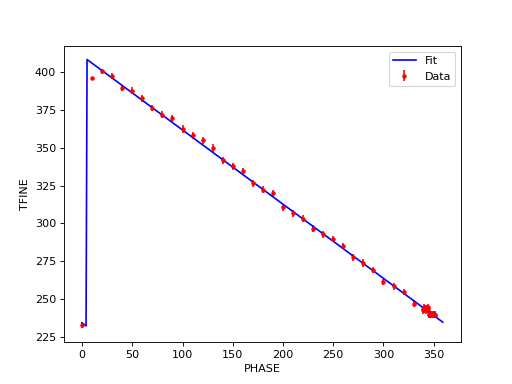

[-88.22471274   4.51983633 320.32309779]


<IPython.core.display.Javascript object>


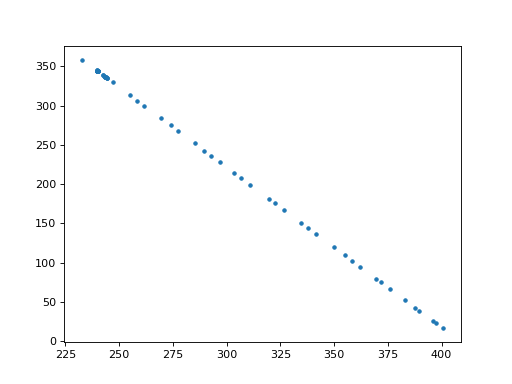

       channel_id  tac_id  phase       mu     sigma
0               0       0    0.0  385.957  2.325848
1               0       0   10.0  381.816  2.239440
2               0       0   20.0  377.550  2.241486
3               0       0   30.0  374.073  2.185980
4               0       0   40.0  366.996  2.020870
...           ...     ...    ...      ...       ...
16527          63       3  357.5  219.635  2.045243
16528          63       3  358.0  220.212  2.071402
16529          63       3  358.5  219.765  1.788780
16530          63       3  359.0  220.328  1.910358
16531          63       3  359.5  220.295  2.007599

[16532 rows x 5 columns]


In [460]:
channel = 43
tac     = 3
data = pd.read_hdf("/home/viherbos/DATA_daq/" + ASIC + "_tfine_fitted.h5",key='tfine')
data['phase']=data['phase']/1000.0
gb,coeff = TPcal.TDC_fit(data,channel,tac, plot=True)
#res[channel*4+tac] = [ch,tc,coeff[0],coeff[1],coeff[2]]
#print(res[channel*4+tac])
print(coeff)
plt.figure()
print(data)
y=TPcal.sawtooth_inv_corr(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],*coeff)
plt.plot(data[(data['tac_id']==tac)&(data['channel_id']==channel)]['mu'],y,'.')

In [461]:
df_tfine_cal = pd.DataFrame(res,columns=['channel_id','tac_id','amplitude','shift','offset'])
storage = pd.HDFStore('/home/viherbos/DATA_daq/tfine_cal_asic0.h5','w',complib="zlib",complevel=4)
storage.put('tfine_cal',df_tfine_cal,index=False,format='table',data_columns=True)
storage.close()

# QDC CALIBRATION

In [31]:
filename = '/home/viherbos/DATA_daq/CAL_data/asic2_qdc_tpulse.h5'

In [ ]:
channel = 56
tac     = 2
phase   = 290

data = pd.read_hdf(filename,key='ch'+str(channel))
data = data[data['tac_id']==tac]
data = data[data['tpulse']==phase]
data = np.mod(data['efine'] + 1024 + 14, 1024)
fig = plt.figure()
axis = fig.add_subplot(111)

coeff_err = [1000,1000,1000]
#if (np.std(data) < 0.8):
#    coeff = [1000,np.mean(data),np.std(data)]
#else:
chisq_r = 10000
bins = 1
while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
    axis.cla()
    bins = bins + 1 
    coeff,coeff_err,chisq_r=TPcal.gauss_fit(data,bins,True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
    print(bins,coeff_err[1])

print(channel,tac,phase,coeff[1],coeff_err[1]) 
print(coeff)

# GAUSSIAN FITTING FOR EFINE DATA

In [32]:
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='ch'+str(ch))
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        # Blind fit
        for i in np.arange(0,300,10):
            data_fit = data_tc[data_tc['tpulse']==i]
            data_fit = np.mod(data_fit['efine'] + 1024 + 14, 1024)
            # PETSYS Magic 
            
            coeff_err = [1000,1000,1000]
            bins = 1
            while ((np.abs(coeff_err[1]) > 1) & (bins < 30)) :
                bins = bins + 1 
                coeff,coeff_err,chisq_r=TPcal.gauss_fit(data_fit,bins,False) #True,axis,'Gauss Fit','','',[0.65,0.5,"left"])
                #print(ch,tc,i,bins,chisq_r)
                
            print(ch,tc,i,coeff[1],coeff_err[1])

            res.append([ch,tc,i,coeff[1],np.abs(coeff[2])])

df_efine = pd.DataFrame(res,columns=['channel_id','tac_id','tpulse','mu','sigma'])

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
0 0 0 0.0 0.0
Fitting Problems
0 0 10 0.0 0.0
Fitting Problems
0 0 20 0.0 0.0
Fitting Problems
0 0 30 0.0 0.0
Fitting Problems
0 0 40 31.242418081711804 0.0047893046081157456
Fitting Problems
0 0 50 114.97404412040373 0.027369265886792168
Fitting Problems
0 0 60 200.85517973761796 0.016471217151624692
Fitting Problems
0 0 70 271.64275207965983 0.02656516477736218
Fitting Problems
0 0 80 340.78445269747766 0.05090797290698935
Fitting Problems
0 0 90 408.37354500143243 0.0012213781504299766
Fitting Problems
0 0 100 475.30182663751765 0.1529712191623845
Fitting Problems
0 0 110 539.1978910925585 0.008255932807566752
Fitting Problems
0 0 120 597.88208654296 0.011223847778366308
Fitting Problems
0 0 130 650.0144922332175 0.11190124430913932
Fitting Problems
0 0 140 686.9195264783339 0.023433774889213194
Fitting Problems
0 0 150 708.9588461110536 0.06770840397754134
Fitting Problems
0 0 160 716.3039504382971 0.009466152274607486
Fitting Problems
0 0 170 718.3796642902053 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 2 160 716.6744660144445 0.00034647143152829313
Fitting Problems
0 2 170 718.2210062016534 0.052277807527907116
Fitting Problems
0 2 180 718.418110988869 0.017587432379141534
Fitting Problems
0 2 190 719.2361640754958 0.012625966573945283
Fitting Problems
0 2 200 719.0309704546182 0.03744671826350056
Fitting Problems
0 2 210 719.670516267375 0.0011839060838728613
Fitting Problems
0 2 220 719.7958360752289 0.0004158850189510345
Fitting Problems
0 2 230 719.962644616683 0.00013053128269132624
Fitting Problems
0 2 240 719.6010570941254 0.002441722931748856
Fitting Problems
0 2 250 719.1292904485381 0.01588104945138454
Fitting Problems
0 2 260 718.6798380823458 0.004613630073231986
Fitting Problems
0 2 270 718.9300238483081 0.0015794972772695363
Fitting Problems
0 2 280 718.909304119301 0.002377235388939218
Fitting Problems
0 2 290 719.3418690314929 0.004630771179507329
Fitting Problems
0 3 0 0.0 0.0
Fitting Problems
0 3 10 0.0 0.0
Fitting Problems
0 3 20 0.0 0.0
Fitting Problems
0 3 30 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

0 3 240 719.4727605850999 0.006993522727786289
Fitting Problems
0 3 250 718.5688439837185 0.01595743961832445
Fitting Problems
0 3 260 718.5274000188675 0.01073451553338673
Fitting Problems
0 3 270 718.856716629939 0.01762346267346326
Fitting Problems
0 3 280 718.9089048016822 0.002323784704304636
Fitting Problems
0 3 290 719.3232553030851 0.008725810791660358
Fitting Problems
1 0 0 0.0 0.0
Fitting Problems
1 0 10 0.0 0.0
Fitting Problems
1 0 20 0.0 0.0
Fitting Problems
1 0 30 0.0 0.0
Fitting Problems
1 0 40 17.82234608324293 1.2240601032172865e-05
Fitting Problems
1 0 50 71.39554185520743 0.05657091019807067
Fitting Problems
1 0 60 160.75715605858858 0.03334959875818868
Fitting Problems
1 0 70 234.41397146640574 0.018693307073075042
Fitting Problems
1 0 80 298.0180018647522 0.046996153716435805
Fitting Problems
1 0 90 361.6425609241971 0.07406531557672832
Fitting Problems
1 0 100 425.40484540783416 0.00446308691976146
Fitting Problems
1 0 110 486.47223167841946 0.01087783996899892
Fit

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 0 250 757.7037226973835 0.0123402542095321
Fitting Problems
1 0 260 757.8563210457515 0.06631856076642861
Fitting Problems
1 0 270 758.6366549962287 0.003952037546228514
Fitting Problems
1 0 280 758.7721587355181 0.011003550859991522
Fitting Problems
1 0 290 758.15382317865 0.07540205271642453
Fitting Problems
1 1 0 0.0 0.0
Fitting Problems
1 1 10 0.0 0.0
Fitting Problems
1 1 20 0.0 0.0
Fitting Problems
1 1 30 0.0 0.0
Fitting Problems
1 1 40 17.802361275504953 0.0009318432617032679
Fitting Problems
1 1 50 70.60519715967804 0.01813902602115682
Fitting Problems
1 1 60 160.46878840805746 0.02665873589447885
Fitting Problems
1 1 70 234.22697010061793 0.02560340734720042
Fitting Problems
1 1 80 298.1713640189215 0.023128933498790548
Fitting Problems
1 1 90 361.53087033223034 0.10190418622578971
Fitting Problems
1 1 100 425.55427968459014 0.1767775587076879
Fitting Problems
1 1 110 486.8437246254013 0.005149500402760676
Fitting Problems
1 1 120 547.511115974685 0.0013612791860011814
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
1 2 10 0.0 0.0
Fitting Problems
1 2 20 0.0 0.0
Fitting Problems
1 2 30 0.0 0.0
Fitting Problems
1 2 40 17.531880514638075 0.005156063755532461
Fitting Problems
1 2 50 70.498762022462 0.174245331844392
Fitting Problems
1 2 60 159.88361501655277 0.055249951722126156
Fitting Problems
1 2 70 233.5599369912092 0.003959424914486969
Fitting Problems
1 2 80 297.63314043186006 0.026946706144425472
Fitting Problems
1 2 90 360.97339228250206 0.024063005095527362
Fitting Problems
1 2 100 424.54145719785146 0.10222077952246406
Fitting Problems
1 2 110 485.6702192934096 0.004787540329872017
Fitting Problems
1 2 120 546.6236164082926 0.025602568706110895
Fitting Problems
1 2 130 604.1974593790709 0.04790317294103152
Fitting Problems
1 2 140 658.0864522782456 0.010157525347254092
Fitting Problems
1 2 150 701.9695228121814 0.03565902007002452
Fitting Problems
1 2 160 733.9175299400505 0.03346530274292724
Fitting Problems
1 2 170 749.8285984825367 0.18150395527987515
Fitting Problems
1 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 3 90 357.521715880901 0.04237325210087299
Fitting Problems
1 3 100 421.2862465025248 0.11120275624550663
Fitting Problems
1 3 110 481.86993004910164 0.0104784976938418
Fitting Problems
1 3 120 542.744336137041 0.010647001387964155
Fitting Problems
1 3 130 599.7716386321009 0.07484224714584367
Fitting Problems
1 3 140 654.4767738084327 0.31228832666435025
Fitting Problems
1 3 150 698.6037837997295 0.017621550738016602
Fitting Problems
1 3 160 731.4405750544498 0.014349933246406581
Fitting Problems
1 3 170 748.7594290905863 0.14484492673975902
Fitting Problems
1 3 180 755.1939332616552 0.014372791408242738
Fitting Problems
1 3 190 757.785132285172 0.010405633970637812
Fitting Problems
1 3 200 758.0553732395665 0.01909537694677189
Fitting Problems
1 3 210 757.9000909453176 0.05790776757888263
Fitting Problems
1 3 220 758.3289421637221 0.019028085967718645
Fitting Problems
1 3 230 758.5753083686459 0.019563010433678592
Fitting Problems
1 3 240 758.6000241912074 0.005256606337920283
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 0 90 377.8105196329217 0.057745164012837566
Fitting Problems
2 0 100 440.8468581454734 0.020084699086020934
Fitting Problems
2 0 110 503.251553291302 0.035416847088294255
Fitting Problems
2 0 120 562.7323726115558 0.03649658039655986
Fitting Problems
2 0 130 618.6052014637809 0.05490714549297078
Fitting Problems
2 0 140 667.3051426570072 0.13039735788695941
Fitting Problems
2 0 150 703.1750750405973 0.013309805332495057
Fitting Problems
Fitting Problems
2 0 160 720.5778173094855 0.03625028105966255
Fitting Problems
2 0 170 727.8571516534017 0.00629617351341534
Fitting Problems
2 0 180 729.603755157807 0.06945131565160852
Fitting Problems
2 0 190 729.8856447233862 0.021341013541674017
Fitting Problems
2 0 200 730.3548273889312 0.024354051179937584
Fitting Problems
2 0 210 730.1945359158963 0.026806228601011055
Fitting Problems
2 0 220 730.482084666626 0.006919515434083205
Fitting Problems
2 0 230 730.349257699109 0.030699590812906755
Fitting Problems
2 0 240 730.3325097262813 0.010056

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 1 130 618.7465586934371 0.12441983102430823
Fitting Problems
2 1 140 666.9432632792721 0.003639699551145549
Fitting Problems
2 1 150 703.0403169226727 0.012184290243881157
Fitting Problems
2 1 160 720.3488167183611 0.028218877773113472
Fitting Problems
2 1 170 727.683793809285 0.01893072175497843
Fitting Problems
2 1 180 729.4094288917837 0.05517069127091352
Fitting Problems
2 1 190 729.9142155707841 0.0406471688932517
Fitting Problems
2 1 200 730.1374677380941 0.03770529159346728
Fitting Problems
2 1 210 729.9283551535559 0.03966864391744542
Fitting Problems
2 1 220 730.2303797861138 0.06974434862584622
Fitting Problems
2 1 230 729.6719517415248 0.044561107704654206
Fitting Problems
2 1 240 730.0723113464696 0.032653957806800124
Fitting Problems
2 1 250 729.6402138314486 0.044320022115475165
Fitting Problems
2 1 260 729.3433010562178 0.03177427121470835
Fitting Problems
2 1 270 729.8197524205965 0.012102713726116909
Fitting Problems
2 1 280 729.3447430720449 0.04466339919237345
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 2 200 730.311270661725 0.028728070554468816
Fitting Problems
2 2 210 730.3697731099736 0.021730708504639127
Fitting Problems
2 2 220 730.2382971114689 0.04103415800789374
Fitting Problems
2 2 230 729.8439670851757 0.03609540566865323
Fitting Problems
2 2 240 730.2900130023197 0.012533612634958178
Fitting Problems
2 2 250 729.8118885602948 0.04937561638885274
Fitting Problems
2 2 260 729.6343282247216 0.04589046373619065
Fitting Problems
2 2 270 730.0108196257377 0.03595867171128496
Fitting Problems
2 2 280 729.329933252377 0.04298084320555152
Fitting Problems
2 2 290 730.162502149746 0.02429742959968044
Fitting Problems
2 3 0 0.0 0.0
Fitting Problems
2 3 10 0.0 0.0
Fitting Problems
2 3 20 0.0 0.0
Fitting Problems
2 3 30 0.0 0.0
Fitting Problems
2 3 40 20.52467507688358 0.02342217886301263
Fitting Problems
2 3 50 91.98498910268343 0.016717904210841406
Fitting Problems
2 3 60 176.28680196862584 0.03890142313098132
Fitting Problems
2 3 70 246.04029837333243 0.036833343048031826
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 3 240 729.546724060306 0.05860716598895669
Fitting Problems
2 3 250 729.5803110992962 0.05243777172291433
Fitting Problems
2 3 260 729.3118566463944 0.04815591200659777
Fitting Problems
2 3 270 730.4478068361138 0.024106005734033917
Fitting Problems
2 3 280 729.3250550267745 0.03824895579949742
Fitting Problems
2 3 290 729.9062829936117 0.015324435960424685
Fitting Problems
3 0 0 0.0 0.0
Fitting Problems
3 0 10 0.0 0.0
Fitting Problems
3 0 20 0.0 0.0
Fitting Problems
3 0 30 0.0 0.0
Fitting Problems
3 0 40 24.334864059780323 0.006287577931058752
Fitting Problems
3 0 50 96.54578542529505 0.002236392128839862
Fitting Problems
3 0 60 186.61775114721596 0.03366041710917346
Fitting Problems
3 0 70 254.6707893705 0.01635805271122171
Fitting Problems
3 0 80 318.56296081262224 0.04200509461380094
Fitting Problems
3 0 90 382.25583031541436 0.003226009457158895
Fitting Problems
3 0 100 444.7754571298843 0.016472165180550905
Fitting Problems
3 0 110 504.7182000655103 0.05276643280588183
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
3 0 250 682.4508136798171 0.0059699392520301195
Fitting Problems
3 0 260 682.4969825585047 0.006407376347367379
Fitting Problems
3 0 270 682.9673102226798 5.711903479751686e-05
Fitting Problems
3 0 280 682.6962804147471 0.0020478481290939765
Fitting Problems
3 0 290 681.6085745633053 0.014943890237363115
Fitting Problems
3 1 0 0.0 0.0
Fitting Problems
3 1 10 0.0 0.0
Fitting Problems
3 1 20 0.0 0.0
Fitting Problems
3 1 30 0.0 0.0
Fitting Problems
3 1 40 24.068451317648442 0.0005555448041868091
Fitting Problems
3 1 50 95.25680427803742 0.008140286740324739
Fitting Problems
3 1 60 186.20676260619823 0.03677283195084435
Fitting Problems
3 1 70 254.91263084896482 0.02149285051450775
Fitting Problems
3 1 80 318.65119690128785 0.04533972755365724
Fitting Problems
3 1 90 382.3751423630001 0.1442916436519232
Fitting Problems
3 1 100 444.4521667540049 0.12603817495556519
Fitting Problems
3 1 110 504.2800497968127 0.09432241461045142
Fitting Problems
3 1 120 560.1692396613425 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 2 40 24.288723065975585 0.0006915292397253829
Fitting Problems
3 2 50 94.35228071796075 0.08319078029866042
Fitting Problems
3 2 60 185.6085085615773 0.02353911208645735
Fitting Problems
3 2 70 254.3362743152317 0.0462687075389576
Fitting Problems
3 2 80 317.95307799885234 0.03864202033673198
Fitting Problems
3 2 90 381.95672680432074 0.1283780461025866
Fitting Problems
3 2 100 443.8766323617888 0.029723412925205257
Fitting Problems
3 2 110 503.78135378378056 0.0721767840935097
Fitting Problems
3 2 120 559.8246781352624 0.034412787355291324
Fitting Problems
3 2 130 610.1248048320864 0.010202454927029734
Fitting Problems
3 2 140 649.6418944745743 0.00748694049475204
Fitting Problems
3 2 150 670.7649567253522 0.007626541692178511
Fitting Problems
3 2 160 679.1817989247869 0.015313361599507427
Fitting Problems
3 2 170 681.5598235185522 0.00010286627287734446
Fitting Problems
3 2 180 681.3750413299585 0.01329281161858185
Fitting Problems
3 2 190 681.7409045247691 0.0002277716679438483
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

3 3 110 499.9274559953939 0.07614774720671594
Fitting Problems
3 3 120 555.2876874350288 0.02087544276593093
Fitting Problems
3 3 130 606.6556717959791 0.06972746715387913
Fitting Problems
3 3 140 646.6636216445029 0.03373309264393231
Fitting Problems
3 3 150 669.9499016171935 0.02858282951224315
Fitting Problems
3 3 160 678.4666901863272 0.009480759170613983
Fitting Problems
3 3 170 681.6298487501602 0.0010849440598071295
Fitting Problems
3 3 180 681.9692326030315 8.5289063923769e-05
Fitting Problems
3 3 190 681.9042556349825 0.0002668046542530987
Fitting Problems
3 3 200 681.720370569561 0.00161557975922203
Fitting Problems
3 3 210 682.2607004039027 0.009395480401968992
Fitting Problems
3 3 220 681.7843487157213 0.02221160002237734
Fitting Problems
3 3 230 682.5251273505365 0.002550488614377609
Fitting Problems
3 3 240 682.5546380176769 0.0036277579900922214
Fitting Problems
3 3 250 682.7083950712346 0.002431868777037301
Fitting Problems
3 3 260 682.8250866005317 0.001177555754593240

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 0 120 549.66638136575 0.017456100475214547
Fitting Problems
4 0 130 599.0513542191184 0.004579326301306792
Fitting Problems
4 0 140 638.2686670770446 0.021721025220511444
Fitting Problems
4 0 150 662.6722975753763 0.009643787692782036
Fitting Problems
4 0 160 670.509083785624 0.011958064770483747
Fitting Problems
4 0 170 673.2908197632495 0.008436723310293335
Fitting Problems
4 0 180 674.4055607980072 0.017507105106043485
Fitting Problems
4 0 190 673.5426148404568 0.022028907470421365
Fitting Problems
4 0 200 674.5092367729499 0.021415438310870834
Fitting Problems
4 0 210 675.1712845839085 0.027001464984697205
Fitting Problems
4 0 220 674.4099319728301 0.02004323111466952
Fitting Problems
4 0 230 674.1295727597594 0.04593476041020395
Fitting Problems
4 0 240 674.2094081615045 0.023293076167984855
Fitting Problems
4 0 250 673.6065197144176 0.013567411971986158
Fitting Problems
4 0 260 674.6650043908679 0.005688555911774955
Fitting Problems
4 0 270 674.5330217195657 0.01576089717006264

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 1 190 673.454658080108 0.020589597018668217
Fitting Problems
4 1 200 674.1352610845853 0.07622138768085049
Fitting Problems
4 1 210 675.0643687681835 0.027292277841670758
Fitting Problems
4 1 220 674.3677939251244 0.021263538471667905
Fitting Problems
4 1 230 673.9923750866236 0.04100554939627101
Fitting Problems
4 1 240 673.9473622404774 0.016975441325541785
Fitting Problems
4 1 250 673.4887038427697 0.017416803245584284
Fitting Problems
4 1 260 674.5227999938536 0.00763150326058815
Fitting Problems
4 1 270 674.3524355489068 0.03119925735657432
Fitting Problems
4 1 280 674.0451239650106 0.04246187731342967
Fitting Problems
4 1 290 674.1446344119688 0.02475222111992911
Fitting Problems
4 2 0 0.0 0.0
Fitting Problems
4 2 10 0.0 0.0
Fitting Problems
4 2 20 0.0 0.0
Fitting Problems
4 2 30 0.0 0.0
Fitting Problems
4 2 40 32.14082501825194 0.002375779387066138
Fitting Problems
4 2 50 105.81250434841081 0.025528538027954698
Fitting Problems
4 2 60 182.86307424763595 0.0028592754495364307
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

4 2 260 674.7465869131975 0.004682830816223041
Fitting Problems
4 2 270 674.5881312163679 0.016592199704080476
Fitting Problems
4 2 280 674.2756074577154 0.03725207666561083
Fitting Problems
4 2 290 674.3804041292325 0.01498987987370619
Fitting Problems
4 3 0 0.0 0.0
Fitting Problems
4 3 10 0.0 0.0
Fitting Problems
4 3 20 0.0 0.0
Fitting Problems
4 3 30 0.0 0.0
Fitting Problems
4 3 40 30.859629355711583 0.00024151423890890437
Fitting Problems
4 3 50 103.29779400369833 0.008087371988110707
Fitting Problems
4 3 60 180.47813030728136 0.13206011688934466
Fitting Problems
4 3 70 245.2668789929133 0.015363389743685998
Fitting Problems
4 3 80 306.96662522848965 0.07242289645637043
Fitting Problems
4 3 90 369.09492014863633 0.10767249568150668
Fitting Problems
4 3 100 429.8311445011528 0.004275466944948919
Fitting Problems
4 3 110 488.93269970525836 0.01372230129206652
Fitting Problems
4 3 120 544.8396910615911 0.01764255002183608
Fitting Problems
4 3 130 595.202549758646 0.007225965463527867


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
5 0 0 0.0 0.0
Fitting Problems
5 0 10 0.0 0.0
Fitting Problems
5 0 20 0.0 0.0
Fitting Problems
5 0 30 0.0 0.0
Fitting Problems
5 0 40 7.356116199265628 0.0195417962009036
Fitting Problems
5 0 50 52.05024002244036 0.004408047670226086
Fitting Problems
5 0 60 126.60445974058399 0.17764903506276314
Fitting Problems
5 0 70 195.24949012122255 0.02285920858364528
Fitting Problems
5 0 80 252.04413731540797 0.03990361613219834
Fitting Problems
5 0 90 305.4680400968878 0.09848541923158693
Fitting Problems
5 0 100 358.1038888978841 0.000954170526370968
Fitting Problems
5 0 110 412.4433022766866 0.08334332575191246
Fitting Problems
5 0 120 465.4503770137564 0.18737981770609718
Fitting Problems
5 0 130 513.8581799337674 0.00045617761486324256
Fitting Problems
5 0 140 559.7397503781777 0.06981667110676175
Fitting Problems
5 0 150 600.3415049585905 0.0043054885841491254
Fitting Problems
5 0 160 632.7766249459389 0.12350460247528174
Fitting Problems
5 0 170 651.8928522114009 0.004318

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 2 190 663.4111275225692 0.03626838804589865
Fitting Problems
5 2 200 663.438403914651 0.12654655088822825
Fitting Problems
5 2 210 663.998063361166 0.10145251565065273
Fitting Problems
5 2 220 663.6072135726184 0.034098556699093285
Fitting Problems
5 2 230 663.9213294153418 0.10731059325820494
Fitting Problems
5 2 240 664.6172678804261 0.014008532161685834
Fitting Problems
5 2 250 664.3723567834213 0.011543405415951006
Fitting Problems
5 2 260 664.4747720442302 0.02754029647333094
Fitting Problems
5 2 270 664.157539085723 0.052635169022583556
Fitting Problems
5 2 280 664.7540682719086 0.011355804389551341
Fitting Problems
5 2 290 664.5226915063201 0.030110168325968464
Fitting Problems
5 3 0 0.0 0.0
Fitting Problems
5 3 10 0.0 0.0
Fitting Problems
5 3 20 0.0 0.0
Fitting Problems
5 3 30 0.0 0.0
Fitting Problems
5 3 40 6.607008413039768 0.004849441285613247
Fitting Problems
5 3 50 50.31397989589102 0.19583945505311465
Fitting Problems
5 3 60 122.95531743316047 0.0590869053443449
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

5 3 260 665.0495166216855 0.0027530239377649085
Fitting Problems
5 3 270 664.126903349188 0.0474826822972147
Fitting Problems
5 3 280 664.1467600392957 0.01075879293006543
Fitting Problems
5 3 290 664.8403064282741 0.020847148265716237
Fitting Problems
6 0 0 0.0 0.0
Fitting Problems
6 0 10 0.0 0.0
Fitting Problems
6 0 20 0.0 0.0
Fitting Problems
6 0 30 0.0 0.0
Fitting Problems
6 0 40 8.596709235603345 0.002662014188643022
Fitting Problems
6 0 50 64.14483048651614 0.046537043483921375
Fitting Problems
6 0 60 150.6192859907809 0.023529858344475057
Fitting Problems
6 0 70 221.53666740974356 0.010856454411840518
Fitting Problems
6 0 80 284.3567482162902 0.0026822704111603094
Fitting Problems
6 0 90 346.27102408129736 0.08438176638451592
Fitting Problems
6 0 100 407.49115672862865 0.0031613939407239048
Fitting Problems
6 0 110 469.4802893905875 0.16660793899401988
Fitting Problems
6 0 120 527.9100379469747 0.0026909753833618344
Fitting Problems
6 0 130 584.7821510971063 0.011199329743039147

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
6 0 270 727.1318667460326 0.019405606883038214
Fitting Problems
6 0 280 726.653414803833 0.003690496177137917
Fitting Problems
6 0 290 726.432758493446 0.004287561997633621
Fitting Problems
6 1 0 0.0 0.0
Fitting Problems
6 1 10 0.0 0.0
Fitting Problems
6 1 20 0.0 0.0
Fitting Problems
6 1 30 0.0 0.0
Fitting Problems
6 1 40 8.534848356390793 0.005073018882090709
Fitting Problems
6 1 50 64.10084954585774 0.001532627587113899
Fitting Problems
6 1 60 150.4183238400489 0.02824645652255612
Fitting Problems
6 1 70 221.39574556355328 0.00837192853867508
Fitting Problems
6 1 80 284.5504026148214 0.0963494848656115
Fitting Problems
6 1 90 346.56591213657975 0.048705423823480296
Fitting Problems
6 1 100 407.9837321230011 0.15096997673006113
Fitting Problems
6 1 110 468.6546254388497 0.012452028868507912
Fitting Problems
6 1 120 527.2743838365244 0.023134626525564587
Fitting Problems
6 1 130 584.0154077317961 0.038833580553212316
Fitting Problems
6 1 140 634.5319462415999 0.0025911

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

6 2 60 149.83645804837846 0.033053163731576095
Fitting Problems
6 2 70 220.7718497242002 0.0036511491798587327
Fitting Problems
6 2 80 284.2257762778045 0.022877052684816365
Fitting Problems
6 2 90 345.4335197449988 0.05479302467304292
Fitting Problems
6 2 100 407.0149287723416 0.007262830019521785
Fitting Problems
6 2 110 468.4968030696522 0.13477540574135033
Fitting Problems
6 2 120 526.892081861185 0.02185485182426965
Fitting Problems
6 2 130 583.8407072974976 0.007281536491522311
Fitting Problems
6 2 140 633.7071170638761 0.007789773196947159
Fitting Problems
6 2 150 676.5842723205749 0.08716066732250859
Fitting Problems
6 2 160 706.4276143483784 0.03206723023628591
Fitting Problems
6 2 170 719.2299228497174 0.009519788041526842
Fitting Problems
6 2 180 724.3579170116501 0.013102786016647345
Fitting Problems
6 2 190 725.5890810867102 0.014151835364602955
Fitting Problems
6 2 200 726.3677450259823 0.014426078172122535
Fitting Problems
6 2 210 726.2006279589248 0.019009245518517393
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

6 3 120 522.408368784485 0.014678038890983965
Fitting Problems
6 3 130 578.8906754845308 0.0205551988398513
Fitting Problems
6 3 140 630.0941118404996 0.22940212943970673
Fitting Problems
6 3 150 672.6928926483077 0.01000673793906044
Fitting Problems
6 3 160 704.3335096392697 0.1493307935584007
Fitting Problems
6 3 170 718.474400297624 0.0696581259039962
Fitting Problems
6 3 180 724.5219741965554 0.009788723569368909
Fitting Problems
6 3 190 725.9930767057381 0.011103606287782447
Fitting Problems
6 3 200 726.4551454756861 0.013102520833158708
Fitting Problems
6 3 210 726.2037663487082 0.009309602769429154
Fitting Problems
6 3 220 726.4899174592562 0.013518197887512748
Fitting Problems
6 3 230 726.10192540355 0.0037793556232360638
Fitting Problems
6 3 240 726.3909910938833 0.014931544831650862
Fitting Problems
6 3 250 726.2579426655707 0.004330669282368796
Fitting Problems
6 3 260 726.4610260710675 0.007447903069471492
Fitting Problems
6 3 270 727.0154219328467 0.022884830065304635
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 0 30 4.313175867956744 4.313175867956744
Fitting Problems
7 0 40 69.10006218273325 7.037773928767872e-05
Fitting Problems
7 0 50 176.58239367301286 0.035107593344727184
Fitting Problems
7 0 60 258.1922607168362 0.011550607610759066
Fitting Problems
7 0 70 334.87585734017387 0.004608659305487551
Fitting Problems
7 0 80 411.6604727187847 0.01358746589345102
Fitting Problems
7 0 90 487.41675101506024 0.0049705393525148675
Fitting Problems
7 0 100 558.1833066011393 0.0021856386617823817
Fitting Problems
7 0 110 623.6097753123938 0.00494832107555511
Fitting Problems
7 0 120 676.1656508240432 0.014312554251508514
Fitting Problems
7 0 130 710.0654496538556 0.005221444569405668
Fitting Problems
7 0 140 724.0682700389748 0.0009986659562075788
Fitting Problems
7 0 150 727.7109

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 0 290 728.982798817277 7.310605435725298e-05
Fitting Problems
7 1 0 0.0 0.0
Fitting Problems
7 1 10 0.0 0.0
Fitting Problems
7 1 20 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
7 1 30 4.172310756972111 4.172310756972111
Fitting Problems
7 1 40 69.46569952428784 0.01593022392223897
Fitting Problems
7 1 50 176.12901859619097 0.03507375526113099
Fitting Problems
7 1 60 257.74501365128344 0.03274886025216441
Fitting Problems
7 1 70 335.01634900526403 0.002648030068059639
Fitting Problems
7 1 80 411.2222329032128 0.14111904319375262
Fitting Problems
7 1 90 486.3569929317689 0.006092849303881251
Fitting Problems
7 1 100 556.7517585680969 0.035444769183139005
Fitting Problems
7 1 110 622.876324529666 0.04226281811679277
Fitting Problems
7 1 120 676.3405845951775 0.033254462880634404
Fitting Pr

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GI

Fitting Problems
7 1 160 727.6796521733154 0.007706050459140249
Fitting Problems
7 1 170 727.3958645473631 0.05604863228966446
Fitting Problems
7 1 180 728.4557140417038 0.0037891081295293367
Fitting Problems
7 1 190 727.7049838173489 0.043352251600600446
Fitting Problems
7 1 200 728.8688933802651 0.00014332204236196046
Fitting Problems
7 1 210 728.7420295611468 0.0015501928783854008
Fitting Problems
7 1 220 729.0693315026097 0.006339028243636235
Fitting Problems
7 1 230 728.823944136381 0.0010493581444505746
Fitting Problems
7 1 240 728.1834552280084 0.014364736397616366
Fitting Problems
7 1 250 728.6333784927783 0.000639009263469434
Fitting Problems
7 1 260 728.2349950579128 0.015133871219289191
Fitting Problems
7 1 270 728.552124922317 0.003967109243785338
Fitting Problems
7 1 280 728.6448511562334 0.0008665774107355634
Fitting Problems
7 1 290 728.6668783393592 0.0019737682375043225
Fitting Problems
7 2 0 0.0 0.0
Fitting Problems
7 2 10 0.0 0.0
Fitting Problems
7 2 20 0.0 0.0
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

Fitting Problems
Fitting Problems
7 2 30 4.091193626404894 4.091193626404894
Fitting Problems
7 2 40 68.8331517124325 0.009804100389210759
Fitting Problems
7 2 50 175.29034140974414 0.005624958005287423
Fitting Problems
7 2 60 257.3712955845526 0.005631400322605245
Fitting Problems
7 2 70 333.9169711462564 0.0029388864482939293
Fitting Problems
7 2 80 410.63697623251824 0.10021839133440827
Fitting Problems
7 2 90 485.82941874849934 0.0035489704273915603
Fitting Problems
7 2 100 556.422957336709 0.02054363384316667
Fitting Problems
7 2 110 622.9090883397131 0.003197289069070606
Fitting Problems
7 2 120 675.6778995724814 0.13543129760030787
Fitting Problems
7 2 130 710.0210437366544 0.005098522911520053
Fitting Problems
7 2 140 723.6619608976384 0.0024126898730718912
Fitting Problems
7 2 150 727.4491155961144 0.0003284975123042042
Fitting Problems
7 2 160 728.287301803585 0.00033392284594126463
Fitting Problems
7 2 170 727.6113496993901 0.07315239093763971
Fitting Problems
7 2 180 728.65

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

7 3 30 3.9906934535286855 219145.24873822962
Fitting Problems
7 3 40 65.55468580914447 0.026560749776333888
Fitting Problems
7 3 50 172.87640799850323 0.0012608091126312076
Fitting Problems
7 3 60 254.44893879881477 0.0029026867357667225
Fitting Problems
7 3 70 331.26620305743575 0.0037136677777992225
Fitting Problems
7 3 80 406.66896020956295 0.0807246588212726
Fitting Problems
7 3 90 481.84375529568644 0.010133296195090263
Fitting Problems
7 3 100 552.1969494005576 0.015218772067448753
Fitting Problems
7 3 110 618.4495750669589 0.0024751379605292886
Fitting Problems
7 3 120 673.0233023319162 0.023190695372587358
Fitting Problems
7 3 130 707.845709509261 0.038266412320888295
Fitting Problems
7 3 140 722.5072245317867 0.025387029198588026
Fitting Problems
7 3 150 727.2832980620899 0.003814727927223794
Fitting Problems
7 3 160 728.3044640199075 0.0023275529993631596
Fitting Problems
7 3 170 727.6280096833821 0.05723721967727769
Fitting Problems
7 3 180 728.6441365948115 0.00174849597214

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
8 0 30 0.0 0.0
Fitting Problems
8 0 40 24.562913757240608 0.034724781023138175
Fitting Problems
8 0 50 108.84668516753526 0.03725435951111499
Fitting Problems
8 0 60 191.1569206098362 0.0012004764248179573
Fitting Problems
8 0 70 259.399362140827 0.08897957688974457
Fitting Problems
8 0 80 326.7012938448305 0.003916023709417012
Fitting Problems
8 0 90 392.3917615841148 0.01967577137429701
Fitting Problems
8 0 100 457.48324073077185 0.013677522513011653
Fitting Problems
8 0 110 519.84166894548 0.09156081804295267
Fitting Problems
8 0 120 576.6684669967475 0.0015829462887038289
Fitting Problems
8 0 130 626.5340734190031 0.012509620924038463
Fitting Problems
8 0 140 664.0017126011988 0.003943923783253599
Fitting Problems
8 0 150 683.0714238660192 0.20809343388812301
Fitting Problems
8 0 160 688.8534913029753 0.01289831264420811
Fitting Problems
8 0 170 689.4387482202701 0.019075099990266377
Fitting Problems
8 0 180 689.5671917233312 0.02197455880622866
Fitting Problems
8 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 1 70 259.58965393684355 0.04462974226003172
Fitting Problems
8 1 80 326.1114949704169 7.923711396852361e-05
Fitting Problems
8 1 90 391.89580621641574 0.003750216740546453
Fitting Problems
8 1 100 456.1592026663727 0.014082007686270171
Fitting Problems
8 1 110 518.8974962156484 0.061807730453666936
Fitting Problems
8 1 120 575.9171126539838 0.019030914454659913
Fitting Problems
8 1 130 626.3021194694044 0.01268722192779694
Fitting Problems
8 1 140 663.6797511196336 0.01765338452341288
Fitting Problems
8 1 150 681.967038071602 0.18920256331666402
Fitting Problems
8 1 160 688.5972775779992 0.0061989785885361495
Fitting Problems
8 1 170 689.3218038261857 0.011697930018715164
Fitting Problems
8 1 180 690.0275330468847 0.03624544596098362
Fitting Problems
8 1 190 690.4587411390372 0.01801219568208048
Fitting Problems
8 1 200 690.1179317455259 0.021410844071837645
Fitting Problems
8 1 210 691.0534905656643 0.02549575898582854
Fitting Problems
8 1 220 691.133458780951 0.03514055805628716
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 2 110 518.3996198506062 0.021803606098700835
Fitting Problems
8 2 120 575.5487110240207 0.04161796815622668
Fitting Problems
8 2 130 625.505951442741 0.009636669640121167
Fitting Problems
8 2 140 663.5737973146177 0.04449089930253836
Fitting Problems
8 2 150 682.1963924649683 0.17834957067864762
Fitting Problems
8 2 160 688.4048254258811 0.008972565151189035
Fitting Problems
8 2 170 689.4975310800148 0.019719973040395303
Fitting Problems
8 2 180 689.6633933634181 0.030689365219403866
Fitting Problems
8 2 190 691.1808227543914 0.02471833764132433
Fitting Problems
8 2 200 691.0256286161307 0.000751578911385467
Fitting Problems
8 2 210 691.2966999515112 0.01446281935386117
Fitting Problems
8 2 220 691.3223271739828 0.007532077866773278
Fitting Problems
8 2 230 691.2024355019851 0.019843743412818346
Fitting Problems
8 2 240 691.290488971669 0.02928465193528632
Fitting Problems
8 2 250 691.2985417820702 0.009906702326512183
Fitting Problems
8 2 260 691.5414038947944 0.0018413282729397836


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

8 3 160 688.4041561971592 0.011210489148950776
Fitting Problems
8 3 170 689.3529589123568 0.019931683249797078
Fitting Problems
8 3 180 690.1673901627651 0.024936824725284835
Fitting Problems
8 3 190 690.5479954652556 0.018190054043051015
Fitting Problems
8 3 200 690.4100946619436 0.028367718375271255
Fitting Problems
8 3 210 691.1474063474508 0.01943950048276651
Fitting Problems
8 3 220 691.2199587940054 0.019974560653374857
Fitting Problems
8 3 230 691.143269482865 0.00029640187604978595
Fitting Problems
8 3 240 691.283469951671 0.011236735096099204
Fitting Problems
8 3 250 691.1975658504583 0.018293870382560355
Fitting Problems
8 3 260 691.3788488257676 0.0018068054910616435
Fitting Problems
8 3 270 691.3069486138785 0.0057111506910005865
Fitting Problems
8 3 280 691.3776720323004 0.005342928003036348
Fitting Problems
8 3 290 691.1196517725931 0.021603966379916906
Fitting Problems
9 0 0 0.0 0.0
Fitting Problems
9 0 10 0.0 0.0
Fitting Problems
9 0 20 0.0 0.0
Fitting Problems
9 0 30 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 0 170 735.8752054010945 0.0017825042786357669
Fitting Problems
9 0 180 737.7833319056047 0.0001377057901577277
Fitting Problems
9 0 190 737.7972211622994 0.0003083877691900553
Fitting Problems
9 0 200 738.1066972504643 0.008233507024288088
Fitting Problems
9 0 210 737.798289490172 0.0001986871709762931
Fitting Problems
9 0 220 737.5473429819149 0.0018464199709111642
Fitting Problems
9 0 230 737.6628786701868 0.003894559343650751
Fitting Problems
9 0 240 737.9947945283038 0.0003828025870680211
Fitting Problems
9 0 250 738.059130527358 0.00014450259097003156
Fitting Problems
9 0 260 737.9264094668094 0.000209680911067059
Fitting Problems
9 0 270 738.2743697528953 0.003729911621852815
Fitting Problems
9 0 280 738.3788953364752 0.0006508413509067124
Fitting Problems
9 0 290 738.1856654230837 0.005931081578967127
Fitting Problems
9 1 0 0.0 0.0
Fitting Problems
9 1 10 0.0 0.0
Fitting Problems
9 1 20 0.0 0.0
Fitting Problems
9 1 30 0.0 0.0
Fitting Problems
9 1 40 17.387485706490292 0.000187

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

9 1 260 737.7089424412975 0.0005047842343527631
Fitting Problems
9 1 270 737.4711818106011 0.0025671026108800327
Fitting Problems
9 1 280 737.9962299641944 1.780795795804677e-05
Fitting Problems
9 1 290 737.4454529556048 0.000593986403108397
Fitting Problems
9 2 0 0.0 0.0
Fitting Problems
9 2 10 0.0 0.0
Fitting Problems
9 2 20 0.0 0.0
Fitting Problems
9 2 30 0.0 0.0
Fitting Problems
9 2 40 16.785971803422324 0.00018013902841845607
Fitting Problems
9 2 50 82.72451747560345 0.005629420507152771
Fitting Problems
9 2 60 181.66496715666685 0.0008407710629914783
Fitting Problems
9 2 70 255.71535576747152 0.0062509613301222015
Fitting Problems
9 2 80 324.6095492618306 0.023016338822957776
Fitting Problems
9 2 90 391.17234053738764 0.07105469064090546
Fitting Problems
9 2 100 457.64228522744014 0.12176914066855694
Fitting Problems
9 2 110 522.5167923783365 0.08685232767474366
Fitting Problems
9 2 120 582.8170292515321 0.02746807843427463
Fitting Problems
9 2 130 638.522154179319 0.060342328921

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
9 3 40 15.933428367783321 15.933428367783321
Fitting Problems
9 3 50 79.34296128943974 0.013839362240375193
Fitting Problems
9 3 60 177.79673271471353 0.005123132836976218
Fitting Problems
9 3 70 253.43706990739156 0.006613016123919419
Fitting Problems
9 3 80 322.12658220475004 0.039547200170478705
Fitting Problems
9 3 90 387.65211933905834 0.08827042627511122
Fitting Problems
9 3 100 454.0857990671304 0.01249268171636018
Fitting Problems
9 3 110 518.1207196612825 0.03804327196305464
Fitting Problems
9 3 120 579.245868027089 0.012734123910997801
Fitting Problems
9 3 130 634.3602182605932 0.018096918650659377
Fitting Problems
9 3 140 682.5914541967853 0.021487220246772114
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

9 3 210 737.4770094540756 0.0012105145505605665
Fitting Problems
9 3 220 737.7852402559273 0.00011476799700219184
Fitting Problems
9 3 230 737.9209095973662 0.0001778250581498498
Fitting Problems
9 3 240 737.33586227238 0.002166416136159331
Fitting Problems
9 3 250 737.7238082626493 0.0009642991977649783
Fitting Problems
9 3 260 737.7315850208989 0.0004914930121391896
Fitting Problems
9 3 270 737.9792954807563 0.0014398871796700386
Fitting Problems
9 3 280 737.9936522893037 0.0003524691587890725
Fitting Problems
9 3 290 737.412657941446 0.0003809138564479887
Fitting Problems
10 0 0 0.0 0.0
Fitting Problems
10 0 10 0.0 0.0
Fitting Problems
10 0 20 0.0 0.0
Fitting Problems
10 0 30 0.0 0.0
Fitting Problems
10 0 40 9.255838731639335 0.0037207278880720452
Fitting Problems
10 0 50 76.77081194072859 0.045291394517621854
Fitting Problems
10 0 60 160.10817323378785 0.031163313589041407
Fitting Problems
10 0 70 226.39477603709608 0.010595595233279933
Fitting Problems
10 0 80 290.130829536769 0.1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
10 0 220 689.8517164471342 0.001996703376953777
Fitting Problems
10 0 230 689.3990551896369 0.0035064369916328916
Fitting Problems
10 0 240 689.5609351788146 0.0008273930327838649
Fitting Problems
10 0 250 689.7906341908283 7.543067766860171e-05
Fitting Problems
10 0 260 689.178375376547 0.008670989968380192
Fitting Problems
10 0 270 689.4812912205613 0.013148017802909445
Fitting Problems
10 0 280 689.9948033957821 0.0002326893529522934
Fitting Problems
10 0 290 689.3621148455597 0.005940719004241924
Fitting Problems
10 1 0 0.0 0.0
Fitting Problems
10 1 10 0.0 0.0
Fitting Problems
10 1 20 0.0 0.0
Fitting Problems
10 1 30 0.0 0.0
Fitting Problems
10 1 40 9.462566560475887 0.00019145313994484647
Fitting Problems
10 1 50 76.2516259343811 0.048775463308318424
Fitting Problems
10 1 60 160.04127877398824 0.00950800036001485
Fitting Problems
10 1 70 225.5951875573606 0.013590600967227773
Fitting Problems
10 1 80 288.9001455715604 0.00683934107910598
Fitting Problems
10 1 90 3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 1 280 689.5045156907297 0.0066269222280632735
Fitting Problems
10 1 290 689.3870542146371 0.0015318679663196394
Fitting Problems
10 2 0 0.0 0.0
Fitting Problems
10 2 10 0.0 0.0
Fitting Problems
10 2 20 0.0 0.0
Fitting Problems
10 2 30 0.0 0.0
Fitting Problems
10 2 40 8.593351069914295 0.005258520701370316
Fitting Problems
10 2 50 75.3867291107197 0.07812308983173462
Fitting Problems
10 2 60 159.21108775141923 0.07119355463069511
Fitting Problems
10 2 70 224.70729944037865 0.014345486993268658
Fitting Problems
10 2 80 288.5472797839963 0.005248358405052618
Fitting Problems
10 2 90 350.15736937427613 0.046663492081544855
Fitting Problems
10 2 100 413.20660267461653 0.007348838826055231
Fitting Problems
10 2 110 472.61946185428855 0.13663260790642598
Fitting Problems
10 2 120 530.756339039416 0.04363796751378206
Fitting Problems
10 2 130 581.7739945783408 0.015059214021109487
Fitting Problems
10 2 140 628.6037377982511 0.030087431622268342
Fitting Problems
10 2 150 662.9970074845991 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

10 3 50 72.97698586978964 0.07390315040869294
Fitting Problems
10 3 60 156.1017079518571 0.03351246597494738
Fitting Problems
10 3 70 222.10978158143445 0.019421121980425886
Fitting Problems
10 3 80 285.9434465643469 0.23319246819487868
Fitting Problems
10 3 90 346.3341407396365 0.044253241909061686
Fitting Problems
10 3 100 409.5500021701207 0.22035480735985183
Fitting Problems
10 3 110 468.7728648408108 0.011590541037716862
Fitting Problems
10 3 120 525.9396893673705 0.01240362330512584
Fitting Problems
10 3 130 578.0354820939244 0.0011687919229681114
Fitting Problems
10 3 140 624.5316335779218 0.01661367226804132
Fitting Problems
10 3 150 660.7002080431749 0.004142866594413439
Fitting Problems
10 3 160 677.6554904330214 0.07842954133325385
Fitting Problems
10 3 170 685.5351729958045 0.01143776161523699
Fitting Problems
10 3 180 687.6777001350071 0.015018675318352501
Fitting Problems
10 3 190 688.6503041862372 0.0027809510298581913
Fitting Problems
10 3 200 689.2490963044745 0.008372

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 0 60 82.19265234695735 0.027866862805405245
Fitting Problems
Fitting Problems
11 0 70 155.71101762980186 0.009891988518995615
Fitting Problems
11 0 80 212.60709563580303 0.011378459403679427
Fitting Problems
11 0 90 265.8207206879618 0.012204585392472172
Fitting Problems
11 0 100 316.9663833729783 0.028341737271289198
Fitting Problems
11 0 110 367.2374617257216 0.044270043980199396
Fitting Problems
11 0 120 417.46648360106207 0.04256230846296798
Fitting Problems
11 0 130 467.41137356388595 0.007817941985580303
Fitting Problems
11 0 140 514.7462276943553 0.04618100306939316
Fitting Problems
11 0 150 559.3324857441719 0.017159260983985736
Fitting Problems
11 0 160 600.1266260819108 0.018235123830384697
Fitting Problems
11 0 170 635.3608031287847 0.02714226522123634
Fitting Problems
11 0 180 658.5775463699805 0.017546648464814817
Fitting Problems
11 0 190 671.8507523427636 0.013443574069242676
Fitting Problems
11 0 200 676.4825083156097 0.0005833559056365698
Fitting Problems
11 0 210 6

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 1 110 366.76508554619795 0.0334593444095981
Fitting Problems
11 1 120 417.67287756816074 0.01412724518789377
Fitting Problems
11 1 130 466.7925407886263 0.06520986876542215
Fitting Problems
11 1 140 514.3895991294789 0.09700374226404238
Fitting Problems
11 1 150 558.7745031580499 0.013292479321203188
Fitting Problems
11 1 160 600.2984163673328 0.19547464879494178
Fitting Problems
11 1 170 634.1429310482912 0.010949871246111928
Fitting Problems
11 1 180 658.6023875015537 0.06387284935757684
Fitting Problems
11 1 190 670.7079553520379 0.06258216818421093
Fitting Problems
11 1 200 675.568126014654 0.007081268521251864
Fitting Problems
11 1 210 677.7892144953389 0.0035240668903950053
Fitting Problems
11 1 220 678.3338472637528 0.0011337706089115868
Fitting Problems
11 1 230 678.7957888866276 0.0005247856849342871
Fitting Problems
11 1 240 678.572368532124 0.003451935071893746
Fitting Problems
11 1 250 678.6307348673673 0.005919852792242314
Fitting Problems
11 1 260 678.5292468146456 0.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

11 2 170 634.1380499809659 0.008052036850301111
Fitting Problems
11 2 180 657.821601639119 0.003416814029946418
Fitting Problems
11 2 190 670.6318211676136 0.06782994258520723
Fitting Problems
11 2 200 675.59703600505 0.0013459498458731878
Fitting Problems
11 2 210 677.3841035899881 0.07129495626212405
Fitting Problems
11 2 220 678.1808100040108 0.04286480848401547
Fitting Problems
11 2 230 678.888026564065 0.00035747762901697824
Fitting Problems
11 2 240 678.6526631804347 0.0040173400426670395
Fitting Problems
11 2 250 678.7199110062181 0.0017130278601968328
Fitting Problems
11 2 260 678.7243454046641 0.0012598681479598604
Fitting Problems
11 2 270 678.4889850963804 0.006442138606662951
Fitting Problems
11 2 280 678.5309501161275 0.00241873056245489
Fitting Problems
11 2 290 679.0191618069631 0.0007020717372738887
Fitting Problems
11 3 0 0.0 0.0
Fitting Problems
11 3 10 0.0 0.0
Fitting Problems
11 3 20 0.0 0.0
Fitting Problems
11 3 30 0.0 0.0
Fitting Problems
11 3 40 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

11 3 250 678.4406177754755 0.013572132378225644
Fitting Problems
11 3 260 678.3516452443129 0.020635900556161456
Fitting Problems
11 3 270 677.7964721484705 0.030717817824923985
Fitting Problems
11 3 280 678.2785273754262 0.012618837440452032
Fitting Problems
11 3 290 678.7300032401118 0.0010878765252593159
Fitting Problems
12 0 0 0.0 0.0
Fitting Problems
12 0 10 0.0 0.0
Fitting Problems
12 0 20 0.0 0.0
Fitting Problems
12 0 30 0.0 0.0
Fitting Problems
12 0 40 45.42038820067797 0.09819991135719076
Fitting Problems
12 0 50 148.51160792860162 0.011234899749103326
Fitting Problems
12 0 60 231.31538237857586 0.0045941059129457435
Fitting Problems
12 0 70 306.9164502814058 0.017987124255270954
Fitting Problems
12 0 80 380.57196920638586 0.05069246971228149
Fitting Problems
12 0 90 451.9267351370283 0.014046634091036082
Fitting Problems
12 0 100 523.6613962994186 0.0007812063935039235
Fitting Problems
12 0 110 592.2192620374369 0.16373858348788986
Fitting Problems
12 0 120 652.3982973743574 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 0 240 750.220653116835 0.041871963172467414
Fitting Problems
12 0 250 750.0191343398266 0.02481440715121936
Fitting Problems
Fitting Problems
12 0 260 750.3192312190532 0.07346512196955492
Fitting Problems
12 0 270 750.9495386161836 0.00022767421871456456
Fitting Problems
12 0 280 750.4833992158868 0.057274679923403245
Fitting Problems
12 0 290 750.2721133861342 0.06342916922037685
Fitting Problems
12 1 0 0.0 0.0
Fitting Problems
12 1 10 0.0 0.0
Fitting Problems
12 1 20 0.0 0.0
Fitting Problems
12 1 30 0.0 0.0
Fitting Problems
12 1 40 45.38994878436955 0.0633107692294748
Fitting Problems
12 1 50 148.2859974572212 0.012549449295883279
Fitting Problems
12 1 60 230.79533754867288 0.021031730571861418
Fitting Problems
12 1 70 306.0613090529139 0.004914020212127357
Fitting Problems
Fitting Problems
12 1 80 379.8177187379491 0.014212722132567211
Fitting Problems
12 1 90 451.9805352397504 0.03771923658725056
Fitting Problems
12 1 100 523.3008143369764 0.050629466121101925
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
12 2 0 0.0 0.0
Fitting Problems
12 2 10 0.0 0.0
Fitting Problems
12 2 20 0.0 0.0
Fitting Problems
12 2 30 0.0 0.0
Fitting Problems
12 2 40 44.45676893619126 0.07307767885502757
Fitting Problems
12 2 50 147.30209500926264 0.0159693130934402
Fitting Problems
12 2 60 230.2177726033675 0.014561117879026461
Fitting Problems
12 2 70 305.8573285102515 0.0045872466467335215
Fitting Problems
12 2 80 379.0140502147489 0.004119243924906653
Fitting Problems
12 2 90 450.65427648181816 0.001417255874329232
Fitting Problems
12 2 100 522.4424948091087 0.23406805089421034
Fitting Problems
12 2 110 590.6629623534641 0.08047808354667899
Fitting Problems
12 2 120 651.0492540182587 0.026505082506703127
Fitting Problems
12 2 130 701.5594146286053 0.0764168051033308
Fitting Problems
12 2 140 733.7191583262464 0.011095904091991557
Fitting Problems
12 2 150 746.2737567419458 0.030755321179987853
Fitting Problems
12 2 160 749.1945196385138 0.0030167841809456684
Fitting Problems
12 2 170 749.665

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

12 3 60 227.647239686267 0.029351992988188674
Fitting Problems
12 3 70 303.1581674188009 0.002496446144751564
Fitting Problems
12 3 80 376.28798744153806 0.026127684070001725
Fitting Problems
12 3 90 447.315597341546 0.02391984532933551
Fitting Problems
12 3 100 518.7626282052465 0.08896298737428288
Fitting Problems
12 3 110 586.3800595809174 0.011031810488934283
Fitting Problems
12 3 120 647.5498119463754 0.007041700317609283
Fitting Problems
12 3 130 698.7237555952518 0.10059413224786869
Fitting Problems
12 3 140 732.0752835261528 0.037088984187166545
Fitting Problems
12 3 150 745.1546243995892 0.017800942113789516
Fitting Problems
12 3 160 748.3868808448176 0.03902443972576356
Fitting Problems
12 3 170 749.5527968215455 0.017734078389458157
Fitting Problems
12 3 180 751.1528454162428 0.12683684307067972
Fitting Problems
12 3 190 750.3239157419742 0.058989123498316684
Fitting Problems
12 3 200 749.605491670064 0.0034402855772309535
Fitting Problems
12 3 210 749.7087771090216 0.006256

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
13 0 70 237.95446343249483 0.010374847416313887
Fitting Problems
13 0 80 300.9876499983419 0.004214098494723269
Fitting Problems
13 0 90 362.3323379141163 0.011829193082827176
Fitting Problems
13 0 100 423.78660685737526 0.018278335100522757
Fitting Problems
13 0 110 482.8749647357078 0.01415724209153056
Fitting Problems
13 0 120 540.3765410507108 0.023926302435759307
Fitting Problems
13 0 130 592.5867360097194 0.006821121077444564
Fitting Problems
13 0 140 637.9503892228795 0.02552724945995699
Fitting Problems
13 0 150 670.2347462985123 0.004150992225919359
Fitting Problems
13 0 160 687.842779961094 0.005542051959318276
Fitting Problems
13 0 170 695.1303124959119 0.009207891134991838
Fitting Problems
13 0 180 696.5395687894211 0.013880039570111384
Fitting Problems
13 0 190 697.4701516961383 0.001334501610329263
Fitting Problems
13 0 200 697.5247063277776 0.01380976620867928
Fitting Problems
13 0 210 697.5389978803382 0.02480867814718809
Fitting Problems
13 0 220 697.9

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 1 120 539.599961798304 0.0332487143472998
Fitting Problems
13 1 130 591.8568358956793 0.0020307101777552582
Fitting Problems
13 1 140 637.3880956534521 0.0008687327161886071
Fitting Problems
13 1 150 669.4861545824152 0.004176207454746481
Fitting Problems
13 1 160 687.409854051649 0.01820991272195363
Fitting Problems
13 1 170 694.6090225257694 0.0009306587920724741
Fitting Problems
13 1 180 696.469827458961 0.003583844065887196
Fitting Problems
13 1 190 696.9359045244116 0.00026079748148621717
Fitting Problems
13 1 200 697.4350796610335 0.008298910234774762
Fitting Problems
13 1 210 697.459253730881 0.009194389237336032
Fitting Problems
13 1 220 697.4087357702793 0.007291874695748993
Fitting Problems
13 1 230 697.4582956044769 0.006795481152940893
Fitting Problems
13 1 240 697.8376762999947 0.00034757781021181025
Fitting Problems
13 1 250 697.4248782178405 0.004721978296822464
Fitting Problems
13 1 260 696.6454987742356 0.007018848981534036
Fitting Problems
13 1 270 697.439678919393

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
13 2 190 697.1648654690767 0.0004259529228648027
Fitting Problems
13 2 200 697.6987959859099 0.001529966260574093
Fitting Problems
13 2 210 697.7220501789863 0.0031110858451640095
Fitting Problems
13 2 220 697.5278583647696 0.003952194234377814
Fitting Problems
13 2 230 697.6986134854469 0.0018463887274236834
Fitting Problems
13 2 240 698.0002928874992 0.0009196242574985854
Fitting Problems
13 2 250 697.6673319232058 0.0008235731525344999
Fitting Problems
13 2 260 696.8466205759067 0.0032911760742355273
Fitting Problems
13 2 270 697.6826096849521 0.0017854076598198924
Fitting Problems
13 2 280 697.2730567154389 0.012385908403128828
Fitting Problems
13 2 290 697.6307913728465 0.0008825221328940239
Fitting Problems
13 3 0 0.0 0.0
Fitting Problems
13 3 10 0.0 0.0
Fitting Problems
13 3 20 0.0 0.0
Fitting Problems
13 3 30 0.0 0.0
Fitting Problems
13 3 40 14.66072144595379 0.008616829008716208
Fitting Problems
13 3 50 80.12672502985136 0.0026885978305185446
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

13 3 270 697.8888875599116 0.00029782551263902725
Fitting Problems
13 3 280 697.590062161982 0.0013071395689271017
Fitting Problems
13 3 290 697.8481294369075 0.0004638451453930829
Fitting Problems
14 0 0 0.0 0.0
Fitting Problems
14 0 10 0.0 0.0
Fitting Problems
14 0 20 0.0 0.0
Fitting Problems
14 0 30 0.0 0.0
Fitting Problems
Fitting Problems
14 0 40 16.720434040796857 0.0023957550457721828
Fitting Problems
14 0 50 61.899009882541954 0.005709019426149816
Fitting Problems
14 0 60 138.1706234995349 0.016967555414957522
Fitting Problems
14 0 70 201.62188539962568 0.029523054775048973
Fitting Problems
14 0 80 257.24142913585365 0.011092368687387038
Fitting Problems
14 0 90 312.6648719402103 0.007306086185877128
Fitting Problems
14 0 100 366.8265361357697 0.0016847710218952396
Fitting Problems
14 0 110 420.09133934871926 0.16703478945539516
Fitting Problems
14 0 120 472.4011324668419 0.15983888669750038
Fitting Problems
14 0 130 520.8357491466938 0.023190408936770865
Fitting Problems
14 0 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
14 0 240 659.5310077495398 0.05449558248284238
Fitting Problems
14 0 250 660.2057249711106 0.004780693555540203
Fitting Problems
14 0 260 659.644802425361 0.0018258760532230205
Fitting Problems
14 0 270 659.7137279322391 0.00476369546289757
Fitting Problems
14 0 280 659.3590544760546 0.05198973247830437
Fitting Problems
14 0 290 659.9379740656599 3.177992467809977e-05
Fitting Problems
14 1 0 0.0 0.0
Fitting Problems
14 1 10 0.0 0.0
Fitting Problems
14 1 20 0.0 0.0
Fitting Problems
14 1 30 0.0 0.0
Fitting Problems
14 1 40 16.72241421158012 0.010186432915963519
Fitting Problems
14 1 50 62.322771388106496 0.24448081055722
Fitting Problems
14 1 60 138.16232105729486 0.00873591527446152
Fitting Problems
Fitting Problems
14 1 70 201.6524885097034 0.022198548060959885
Fitting Problems
14 1 80 257.467644568327 0.0052912263591375335
Fitting Problems
14 1 90 312.05387724035046 0.003914303899911008
Fitting Problems
14 1 100 366.4431599249185 0.03687862457144434
Fitting Problems
1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

14 1 290 659.7596918354602 0.007800940155179357
Fitting Problems
14 2 0 0.0 0.0
Fitting Problems
14 2 10 0.0 0.0
Fitting Problems
14 2 20 0.0 0.0
Fitting Problems
14 2 30 0.0 0.0
Fitting Problems
14 2 40 16.596408102749113 0.04408778780611696
Fitting Problems
14 2 50 61.43318364790242 0.09753763350001525
Fitting Problems
14 2 60 137.34964337062593 0.0007637200967049445
Fitting Problems
14 2 70 201.30582697583375 0.20789226054572132
Fitting Problems
14 2 80 256.79149250357835 0.043132927851373064
Fitting Problems
14 2 90 311.5112090861416 0.024901484172493635
Fitting Problems
14 2 100 366.0819923072264 0.018635507207916017
Fitting Problems
14 2 110 418.51278863080205 0.07573167325393187
Fitting Problems
14 2 120 471.01700826932637 0.0781698569553073
Fitting Problems
14 2 130 520.3624457870102 0.15419337703173572
Fitting Problems
14 2 140 564.8153428895947 0.03976876068999639
Fitting Problems
14 2 150 604.0245467759453 0.03321182315118553
Fitting Problems
14 2 160 634.0405356640432 0.127

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
14 3 70 198.49329734321807 0.009089123480335132
Fitting Problems
14 3 80 254.63407424342472 0.0398956837536949
Fitting Problems
14 3 90 308.6028445290379 0.01175973313077763
Fitting Problems
Fitting Problems
14 3 100 361.9938671291933 0.23497199574672928
Fitting Problems
14 3 110 415.71615288865644 0.04479903958728557
Fitting Problems
14 3 120 467.71186113726935 0.1467086789277225
Fitting Problems
14 3 130 516.7646499746088 0.1320642569353913
Fitting Problems
14 3 140 561.692801462341 0.08672494257628287
Fitting Problems
14 3 150 601.3157339305359 0.010648770614535293
Fitting Problems
14 3 160 631.6306608268134 0.049393733393821006
Fitting Problems
14 3 170 650.0369301735443 0.00893115882933257
Fitting Problems
14 3 180 656.6760760498322 0.03073359552074007
Fitting Problems
14 3 190 659.3318436564743 0.010784566163864556
Fitting Problems
14 3 200 659.6693311313019 0.00219028642294856
Fitting Problems
14 3 210 659.4875206147461 0.0047746274091951335
Fitting Problems
14 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 0 60 105.24597366862128 0.0324344926052744
Fitting Problems
15 0 70 186.60406743191297 0.02017189388921975
Fitting Problems
15 0 80 249.04758763043571 0.00157618028676151
Fitting Problems
15 0 90 308.5003590717452 0.020258238436244656
Fitting Problems
15 0 100 366.8593348902191 0.005055624759134138
Fitting Problems
15 0 110 424.35789600794055 0.014773721508628986
Fitting Problems
15 0 120 482.07600716968625 0.00404824230943181
Fitting Problems
15 0 130 537.7140067609383 0.006626919430333991
Fitting Problems
15 0 140 589.4976207986334 0.14690912663670247
Fitting Problems
15 0 150 637.0073403761828 0.046028440863615
Fitting Problems
15 0 160 677.6389867193631 0.016973468119515674
Fitting Problems
15 0 170 707.4410202571027 0.07816669721452803
Fitting Problems
15 0 180 723.9155412070404 0.1365900000814545
Fitting Problems
15 0 190 730.7707306164232 0.016001933356178513
Fitting Problems
15 0 200 733.3642676986292 0.021199040308387852
Fitting Problems
15 0 210 733.6813996042837 0.0097936

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 1 140 588.7071497588231 0.0081116589434965
Fitting Problems
15 1 150 636.2872586289798 0.035313246543318993
Fitting Problems
15 1 160 676.7678222574649 0.035799642101458036
Fitting Problems
15 1 170 706.7020874043908 0.0016363636986032044
Fitting Problems
15 1 180 723.7652220128708 0.062092482403187994
Fitting Problems
15 1 190 730.4933063824008 0.02508832103438024
Fitting Problems
15 1 200 732.4593742774008 0.011306831700003834
Fitting Problems
15 1 210 733.3919625629597 0.020523143899502393
Fitting Problems
15 1 220 733.778017154666 0.014080369653423372
Fitting Problems
15 1 230 734.0338236460576 0.0280701724363946
Fitting Problems
15 1 240 733.6152050801131 0.01701775920244257
Fitting Problems
15 1 250 733.632426441145 0.048933668118933314
Fitting Problems
15 1 260 733.9350900705563 0.014455324894164208
Fitting Problems
15 1 270 733.9345262503275 0.04181113790660199
Fitting Problems
15 1 280 734.6029472809921 0.0009108520722587632
Fitting Problems
15 1 290 733.7592047841372 0.023

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 2 210 733.9432807254088 0.004893391243183884
Fitting Problems
15 2 220 733.7236469374964 0.0586084953048636
Fitting Problems
15 2 230 734.0480256272544 0.015598927011136085
Fitting Problems
15 2 240 734.1544487703809 0.01267248378683147
Fitting Problems
15 2 250 733.7338945648145 0.05891036015991347
Fitting Problems
15 2 260 734.503060130399 0.014636564360447617
Fitting Problems
15 2 270 733.9937033604358 0.04522519511478089
Fitting Problems
15 2 280 734.53824025099 0.0095429731846984
Fitting Problems
15 2 290 734.2624029194701 0.01853278809801203
Fitting Problems
15 3 0 0.0 0.0
Fitting Problems
15 3 10 0.0 0.0
Fitting Problems
15 3 20 0.0 0.0
Fitting Problems
15 3 30 0.0 0.0
Fitting Problems
15 3 40 0.0 0.0
Fitting Problems
15 3 50 27.94479406632895 0.0005640891893417179
Fitting Problems
15 3 60 100.3678682312484 0.072302394691935
Fitting Problems
15 3 70 182.708489128615 0.01732140097741319
Fitting Problems
15 3 80 245.33944483546648 0.02136119446440227
Fitting Problems
15 3 90 30

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

15 3 280 734.6508272181818 9.451777505144965e-05
Fitting Problems
15 3 290 734.2426734001511 0.01269786459306277
Fitting Problems
16 0 0 0.0 0.0
Fitting Problems
16 0 10 0.0 0.0
Fitting Problems
16 0 20 0.0 0.0
Fitting Problems
16 0 30 0.0 0.0
Fitting Problems
16 0 40 0.0 0.0
Fitting Problems
16 0 50 35.76725679258829 0.015797333118884288
Fitting Problems
16 0 60 103.10654386856345 0.10646519303807152
Fitting Problems
16 0 70 179.96390539081253 0.004087278857847158
Fitting Problems
16 0 80 243.38853509710881 0.00899966858380962
Fitting Problems
16 0 90 302.01374370439777 0.06354670008316177
Fitting Problems
16 0 100 358.9315703000282 0.04256596991868324
Fitting Problems
16 0 110 416.1569207569362 0.10987522114930744
Fitting Problems
16 0 120 471.62243127377525 0.07785269820406336
Fitting Problems
16 0 130 525.6827375133205 0.037529469382425094
Fitting Problems
Fitting Problems
16 0 140 579.0812463694363 0.011212527270752459
Fitting Problems
16 0 150 628.0312067085404 0.2437180509615338

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

16 0 250 745.2199446540228 0.027264655766483965
Fitting Problems
16 0 260 744.5626923814356 0.026946038537077627
Fitting Problems
16 0 270 744.6377903746939 0.06687927911903817
Fitting Problems
16 0 280 744.634148212081 0.019611357247732282
Fitting Problems
16 0 290 745.2057610841321 0.034573050369626775
Fitting Problems
16 1 0 0.0 0.0
Fitting Problems
16 1 10 0.0 0.0
Fitting Problems
16 1 20 0.0 0.0
Fitting Problems
16 1 30 0.0 0.0
Fitting Problems
16 1 40 0.0 0.0
Fitting Problems
16 1 50 36.387628589680624 0.02370174950253103
Fitting Problems
16 1 60 102.45762795411281 0.04117829610224461
Fitting Problems
16 1 70 180.32695001362714 0.07840013853877033
Fitting Problems
16 1 80 243.73730993605736 0.008141831986288987
Fitting Problems
16 1 90 301.417081460411 0.059803830766968345
Fitting Problems
16 1 100 359.3049682993701 0.15460427633192164
Fitting Problems
16 1 110 415.39330857448687 0.05351399577459335
Fitting Problems
16 1 120 470.99134759516795 0.009402701444478362
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 2 70 179.46464027041523 0.005096605094513888
Fitting Problems
16 2 80 242.6585192820093 0.004045572402955695
Fitting Problems
16 2 90 300.6968404380081 0.07834833293722877
Fitting Problems
16 2 100 357.8820781769671 0.024094400194542502
Fitting Problems
16 2 110 415.3241920019278 0.19271842073961115
Fitting Problems
16 2 120 470.19069094861976 0.008073884273595571
Fitting Problems
16 2 130 524.6873894008065 0.004476080973466326
Fitting Problems
16 2 140 577.3462635012095 0.02560124612824137
Fitting Problems
16 2 150 626.628945087838 0.016028846436076633
Fitting Problems
16 2 160 670.7880800633127 0.04790435535746342
Fitting Problems
16 2 170 705.9463505846446 0.0028468009476889868
Fitting Problems
16 2 180 728.1643427988915 0.17546549698459107
Fitting Problems
16 2 190 737.6623584001642 0.0018998568682431576
Fitting Problems
16 2 200 741.2233664240354 0.011841392223823433
Fitting Problems
16 2 210 742.5687635441269 0.06277500200632144
Fitting Problems
16 2 220 743.3407663797963 0.02

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

16 3 120 466.25005452500756 0.018266183371276355
Fitting Problems
16 3 130 520.5476478755384 0.010982687898475839
Fitting Problems
16 3 140 573.3787384298461 0.06835627194671717
Fitting Problems
16 3 150 622.1581383280011 0.0043411837523208196
Fitting Problems
16 3 160 667.2754289744071 0.00660867019042332
Fitting Problems
16 3 170 702.6753934623241 0.005673364376697327
Fitting Problems
16 3 180 726.4107044608479 0.008459092583104743
Fitting Problems
16 3 190 736.7837999605856 0.0021370966582997812
Fitting Problems
16 3 200 741.2127203161888 0.011551817689477576
Fitting Problems
Fitting Problems
16 3 210 742.6745813799894 0.06490246729650598
Fitting Problems
16 3 220 743.4067089004302 0.013499593243218002
Fitting Problems
16 3 230 743.2631469181222 0.0021486718080299715
Fitting Problems
16 3 240 744.5669723378453 0.021272091810142835
Fitting Problems
16 3 250 745.1634105247354 0.033418619685317764
Fitting Problems
16 3 260 744.5343207288838 0.0552647086032101
Fitting Problems
16 3 270 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

17 0 120 425.7231316965558 0.14103986994087933
Fitting Problems
17 0 130 476.6719369452167 0.023006139194269713
Fitting Problems
17 0 140 526.3092425134992 0.1353210451224783
Fitting Problems
17 0 150 571.0715559862751 0.0041630472852482855
Fitting Problems
17 0 160 614.4319281774038 0.020452701225929248
Fitting Problems
17 0 170 651.2364842429423 0.13435387633850718
Fitting Problems
17 0 180 676.9202016313532 0.0010101890847571309
Fitting Problems
17 0 190 690.721284116575 0.02990350506167591
Fitting Problems
17 0 200 697.1694232772388 0.014702593094862075
Fitting Problems
17 0 210 699.236282825833 0.0031216807826184106
Fitting Problems
17 0 220 699.8906355475065 0.02516101797559592
Fitting Problems
17 0 230 700.4057055381809 0.012008616933454473
Fitting Problems
17 0 240 700.4377964334793 0.011840039975917465
Fitting Problems
17 0 250 699.5113030750231 0.021349905691777773
Fitting Problems
17 0 260 699.4068485181813 0.016429171219656476
Fitting Problems
17 0 270 700.2244486990287 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

17 1 190 690.5147644500287 0.005104109459294731
Fitting Problems
17 1 200 696.6099396160989 0.03387238639133893
Fitting Problems
17 1 210 699.2033444994399 0.0014485058890059339
Fitting Problems
17 1 220 699.2175300439645 0.02144950400931142
Fitting Problems
17 1 230 700.373164279053 0.014344724452289969
Fitting Problems
17 1 240 700.4096421519748 0.007507322122298771
Fitting Problems
17 1 250 699.4201390221212 0.03894046576445164
Fitting Problems
17 1 260 699.9552572673914 0.018918064215445028
Fitting Problems
17 1 270 700.2055612828963 0.01849019578895344
Fitting Problems
17 1 280 700.1631507340668 0.023990795956540953
Fitting Problems
17 1 290 699.9782266211022 0.022496071317716318
Fitting Problems
17 2 0 0.0 0.0
Fitting Problems
17 2 10 0.0 0.0
Fitting Problems
17 2 20 0.0 0.0
Fitting Problems
17 2 30 0.0 0.0
Fitting Problems
17 2 40 0.0 0.0
Fitting Problems
17 2 50 27.18408519147586 0.021784498558730117
Fitting Problems
17 2 60 86.64992065815932 0.005834378795385762
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
17 2 260 699.2526092893726 0.021234844282592667
Fitting Problems
17 2 270 700.0708336757597 0.028635881058129677
Fitting Problems
17 2 280 700.051331579321 0.021747973894337132
Fitting Problems
17 2 290 699.3407436191072 0.03667805147368672
Fitting Problems
17 3 0 0.0 0.0
Fitting Problems
17 3 10 0.0 0.0
Fitting Problems
17 3 20 0.0 0.0
Fitting Problems
17 3 30 0.0 0.0
Fitting Problems
17 3 40 0.0 0.0
Fitting Problems
17 3 50 25.89845170851531 0.011942057878901208
Fitting Problems
17 3 60 83.57110611410343 0.00668041723981946
Fitting Problems
17 3 70 153.90329281759458 0.0017795079684325874
Fitting Problems
17 3 80 211.5722733185615 0.007335001613386128
Fitting Problems
17 3 90 265.46350107514525 0.009456167202588833
Fitting Problems
17 3 100 318.2850819664882 0.07779396297698957
Fitting Problems
17 3 110 369.743180953466 0.06278625735232068
Fitting Problems
17 3 120 420.0349509827235 0.012531038366976908
Fitting Problems
17 3 130 471.22754739004387 0.01213470681069050

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
18 0 0 0.0 0.0
Fitting Problems
18 0 10 0.0 0.0
Fitting Problems
18 0 20 0.0 0.0
Fitting Problems
18 0 30 0.0 0.0
Fitting Problems
18 0 40 0.0 0.0
Fitting Problems
18 0 50 30.02533669629577 0.07423395573715927
Fitting Problems
18 0 60 103.50911790823685 0.0888166230312484
Fitting Problems
18 0 70 187.0261696579344 0.0011580479190278692
Fitting Problems
18 0 80 252.15857891969554 0.02987117043813487
Fitting Problems
18 0 90 312.9452524804981 0.0009112629769781051
Fitting Problems
18 0 100 372.7081110747498 0.05641283014362373
Fitting Problems
18 0 110 432.35371999230705 0.18203881564563282
Fitting Problems
18 0 120 489.48899524481135 0.030081761061684503
Fitting Problems
18 0 130 546.7137971976898 0.000194807890200439
Fitting Problems
18 0 140 600.7505018889228 0.012745072553169626
Fitting Problems
Fitting Problems
18 0 150 649.0354060332531 0.0019785608915759375
Fitting Problems
18 0 160 692.7606167803934 0.12637197278039092
Fitting Problems
18 0 170 724.3029532632306 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 1 100 372.2931611132236 0.10958644853079175
Fitting Problems
18 1 110 431.0088318582315 0.006036918696255161
Fitting Problems
18 1 120 488.81448947318694 0.006707319992582957
Fitting Problems
18 1 130 545.8183422039118 0.002303213794268765
Fitting Problems
18 1 140 598.8440711112804 0.004237472489072915
Fitting Problems
18 1 150 648.4904735895719 0.0030242534728529154
Fitting Problems
18 1 160 691.6163318304533 0.05653568615571944
Fitting Problems
18 1 170 722.9946883576557 0.006273236674595802
Fitting Problems
18 1 180 740.2501469122054 0.090175361185826
Fitting Problems
18 1 190 746.5783650703967 0.005974352588716369
Fitting Problems
18 1 200 749.1035731893547 0.005817912232928067
Fitting Problems
18 1 210 749.6347329246904 0.0020744023621424197
Fitting Problems
18 1 220 749.4595305443158 0.0467740240200881
Fitting Problems
18 1 230 750.4014210282788 0.012671047924928557
Fitting Problems
18 1 240 749.9744646821247 0.0061105070714297565
Fitting Problems
18 1 250 750.568088950884 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

18 2 190 746.805834203099 0.0033352721634939374
Fitting Problems
18 2 200 749.2688453145896 0.005186030497764511
Fitting Problems
18 2 210 749.8877553693775 0.00032630761990808045
Fitting Problems
18 2 220 749.6575104350488 0.0032401504226589354
Fitting Problems
18 2 230 750.6822306268411 0.004704451878807218
Fitting Problems
18 2 240 750.1143009094686 0.01735044159832436
Fitting Problems
18 2 250 750.8682966152757 0.006262521017184609
Fitting Problems
18 2 260 751.3629121375926 0.0032348309804651936
Fitting Problems
18 2 270 750.3498057335016 0.017610898154754123
Fitting Problems
18 2 280 750.4256192170698 0.013250761177388815
Fitting Problems
18 2 290 750.2162195896008 0.02959821390231139
Fitting Problems
18 3 0 0.0 0.0
Fitting Problems
18 3 10 0.0 0.0
Fitting Problems
18 3 20 0.0 0.0
Fitting Problems
18 3 30 0.0 0.0
Fitting Problems
18 3 40 0.0 0.0
Fitting Problems
18 3 50 28.602226663850168 0.01146171973028795
Fitting Problems
18 3 60 99.15278118733994 0.008967883154799258
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

18 3 280 749.4647954934827 0.021245803067424386
Fitting Problems
18 3 290 749.883889821791 0.04466783361331289
Fitting Problems
19 0 0 0.0 0.0
Fitting Problems
19 0 10 0.0 0.0
Fitting Problems
19 0 20 0.0 0.0
Fitting Problems
19 0 30 0.0 0.0
Fitting Problems
19 0 40 0.0 0.0
Fitting Problems
19 0 50 32.46907776754463 0.08276656310853531
Fitting Problems
19 0 60 106.70217510307916 0.23874858749098712
Fitting Problems
19 0 70 190.72740106760216 0.037277047296145865
Fitting Problems
19 0 80 257.284730755238 0.1008491187606017
Fitting Problems
19 0 90 318.33782808382455 0.035181124929511906
Fitting Problems
19 0 100 378.18289038966026 0.031327077841153496
Fitting Problems
19 0 110 439.2696203225825 0.07817505926290673
Fitting Problems
19 0 120 497.9136506684793 0.061526221708419655
Fitting Problems
19 0 130 556.0204554336042 0.015585236243311545
Fitting Problems
19 0 140 609.8734765749039 0.027243429086898658
Fitting Problems
19 0 150 658.622740019681 0.06010589395039501
Fitting Problems
19

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
19 1 0 0.0 0.0
Fitting Problems
19 1 10 0.0 0.0
Fitting Problems
19 1 20 0.0 0.0
Fitting Problems
19 1 30 0.0 0.0
Fitting Problems
19 1 40 0.0 0.0
Fitting Problems
19 1 50 32.19714990209964 0.05587573273803659
Fitting Problems
19 1 60 105.45719482648805 0.001289367774332192
Fitting Problems
19 1 70 190.33265825931608 0.010107860398838245
Fitting Problems
19 1 80 256.4153088137405 0.00026182576560915705
Fitting Problems
19 1 90 318.1520520187564 0.02903285639287023
Fitting Problems
19 1 100 378.16190917837395 0.0502182822988409
Fitting Problems
19 1 110 438.4370046896223 0.08656063261146665
Fitting Problems
19 1 120 498.0551357852148 0.0691154565714506
Fitting Problems
19 1 130 556.2781284992345 0.01108139791926836
Fitting Problems
19 1 140 610.3760827562637 0.05050716520108232
Fitting Problems
19 1 150 658.3304179214157 0.05614174869225759
Fitting Problems
19 1 160 700.5322202785412 0.18823886627626757
Fitting Problems
19 1 170 731.4546270799283 0.004699544256918827
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

19 2 100 377.35484539601265 0.01126231868849447
Fitting Problems
19 2 110 438.1159573458079 0.07482191739536195
Fitting Problems
19 2 120 497.4798692957467 0.13280794754515368
Fitting Problems
19 2 130 554.778513809848 0.004556528873782301
Fitting Problems
19 2 140 609.151887484791 0.10465257957061148
Fitting Problems
19 2 150 657.5702324672724 0.03236346426933138
Fitting Problems
19 2 160 699.4294054904728 0.08136117247848569
Fitting Problems
19 2 170 731.076750804546 0.005638997304675086
Fitting Problems
19 2 180 748.5155647176449 0.13349235641933835
Fitting Problems
19 2 190 756.0338448092047 0.0060774935608774155
Fitting Problems
19 2 200 758.4253050821522 0.0044319476129388155
Fitting Problems
19 2 210 759.1501174362531 0.09205457303526983
Fitting Problems
19 2 220 760.3788544892694 0.011699989616114263
Fitting Problems
19 2 230 759.9071527292137 0.027375144965575766
Fitting Problems
19 2 240 759.4750125799387 0.06597342985936468
Fitting Problems
19 2 250 759.4648021052359 0.05669

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

19 3 150 652.7527507765561 0.09032622219004273
Fitting Problems
19 3 160 695.9946363113717 0.0005301363901964273
Fitting Problems
19 3 170 728.5218761930574 0.030700953314595707
Fitting Problems
19 3 180 747.3989813083182 0.0033176895566356447
Fitting Problems
19 3 190 755.9646972254146 0.0006047323973479933
Fitting Problems
19 3 200 758.2452590806276 0.008738127445890798
Fitting Problems
19 3 210 759.6566912387881 0.011748750210087783
Fitting Problems
19 3 220 759.8885083851073 0.01200003101376254
Fitting Problems
19 3 230 760.2792872460606 0.026514224037612725
Fitting Problems
19 3 240 759.4070555208498 0.055965158704765004
Fitting Problems
19 3 250 759.5000476479119 0.0695867614065598
Fitting Problems
19 3 260 760.0725335322935 0.017873215411627442
Fitting Problems
19 3 270 760.0438851408047 0.0012704100962044442
Fitting Problems
19 3 280 760.2810917279311 0.014122602544371563
Fitting Problems
19 3 290 760.1234457578887 0.019661675246894345
Fitting Problems
20 0 0 0.0 0.0
Fitting Pr

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

20 0 150 607.1278139040732 0.12877710035452364
Fitting Problems
20 0 160 621.2327860199949 0.005771288250584339
Fitting Problems
20 0 170 626.1580906296024 0.0006940229177607958
Fitting Problems
20 0 180 627.4572840184544 0.0004710482014501247
Fitting Problems
20 0 190 627.5335793924415 0.002223230954365398
Fitting Problems
20 0 200 627.6530139477769 0.0004439199830478448
Fitting Problems
20 0 210 627.4777665877652 0.00422091690294684
Fitting Problems
20 0 220 627.6854913448977 0.003808271990013501
Fitting Problems
20 0 230 627.4517120049742 0.001284491082448224
Fitting Problems
20 0 240 628.3845476908089 0.0014804844113128902
Fitting Problems
20 0 250 627.2763044510209 0.0008719757194245719
Fitting Problems
20 0 260 627.7780953353381 0.0002939706158212837
Fitting Problems
20 0 270 627.5344484006266 0.0001689594352457153
Fitting Problems
20 0 280 627.4850583898765 0.9812309878475579
Fitting Problems
20 0 290 627.329575371444 0.0007453618042117461
Fitting Problems
20 1 0 0.0 0.0
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 1 210 627.2993387783818 0.0021473519960476394
Fitting Problems
20 1 220 627.5091006515588 0.0021796041565237206
Fitting Problems
20 1 230 627.269607806032 0.0007136367934838851
Fitting Problems
20 1 240 627.5547248579164 0.004153269250791242
Fitting Problems
20 1 250 627.080281081646 3.1074983643261774e-05
Fitting Problems
20 1 260 627.2214423603311 0.0006194737713602135
Fitting Problems
20 1 270 627.2774610723792 0.0011559029766844574
Fitting Problems
20 1 280 627.6566909619235 0.0007185362768341615
Fitting Problems
20 1 290 627.1112009073015 0.00045675618493278
Fitting Problems
20 2 0 0.0 0.0
Fitting Problems
20 2 10 0.0 0.0
Fitting Problems
20 2 20 0.0 0.0
Fitting Problems
20 2 30 0.0 0.0
Fitting Problems
20 2 40 10.738620724614481 0.002033422126370073
Fitting Problems
20 2 50 72.35696778605922 0.017191311159897093
Fitting Problems
20 2 60 148.5371266830433 0.007664455828548003
Fitting Problems
20 2 70 209.3361668655072 0.008981224003690239
Fitting Problems
Fitting Problems
20 2 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

20 2 260 627.08533974612 0.0012683863450577084
Fitting Problems
20 2 270 627.3720020981751 0.0005849036802811532
Fitting Problems
20 2 280 627.390556898671 0.000851707576828527
Fitting Problems
20 2 290 627.1909903047961 0.0010264665121151816
Fitting Problems
20 3 0 0.0 0.0
Fitting Problems
20 3 10 0.0 0.0
Fitting Problems
20 3 20 0.0 0.0
Fitting Problems
20 3 30 0.0 0.0
Fitting Problems
20 3 40 9.754292481213307 0.0019758629641843943
Fitting Problems
20 3 50 70.24652786279607 0.008265114785264713
Fitting Problems
20 3 60 146.22237632237105 0.0023555160799684253
Fitting Problems
20 3 70 206.973766575618 0.004092541611159554
Fitting Problems
20 3 80 264.58308779890405 0.007642797941337844
Fitting Problems
20 3 90 320.9651866098558 0.0124289798438988
Fitting Problems
20 3 100 377.16081517425386 0.09039207640614164
Fitting Problems
20 3 110 432.06430615218267 0.07045493661624759
Fitting Problems
20 3 120 484.16320432842866 0.149233086644762
Fitting Problems
Fitting Problems
20 3 130 531.8

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
21 0 0 0.0 0.0
Fitting Problems
21 0 10 0.0 0.0
Fitting Problems
21 0 20 0.0 0.0
Fitting Problems
21 0 30 0.0 0.0
Fitting Problems
21 0 40 0.0 0.0
Fitting Problems
21 0 50 13.653786036240106 0.0015864180338320212
Fitting Problems
21 0 60 55.352478248293025 0.17753112463015888
Fitting Problems
21 0 70 125.6764762782021 0.06301350210812079
Fitting Problems
21 0 80 194.10448995144472 0.027626032348523597
Fitting Problems
21 0 90 247.8567981975436 0.008563958228317715
Fitting Problems
21 0 100 299.5457307096013 0.001783207159930023
Fitting Problems
21 0 110 349.85392158328546 0.07131660441562848
Fitting Problems
21 0 120 400.43482820370906 0.11552496490694428
Fitting Problems
21 0 130 449.472395434352 0.03774377088911765
Fitting Problems
21 0 140 498.43104785824625 0.003789360520465939
Fitting Problems
21 0 150 544.6455649092288 0.038241413248249284
Fitting Problems
21 0 160 589.5601091412532 0.17172056218912682
Fitting Problems
21 0 170 630.189295817037 0.0259681225826865

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 1 90 247.51866550991704 0.0021201812960690747
Fitting Problems
21 1 100 299.48254924584324 0.016394067018411597
Fitting Problems
21 1 110 349.8471201805609 0.08389519429182375
Fitting Problems
21 1 120 400.46594270105135 0.1778013638516852
Fitting Problems
21 1 130 448.9992348801186 0.0020267534044494232
Fitting Problems
21 1 140 498.98055093049135 0.20015063816258105
Fitting Problems
21 1 150 544.7393971269287 0.00491999457059363
Fitting Problems
21 1 160 589.5730196859377 0.172446732611586
Fitting Problems
21 1 170 630.5633040370278 0.18641672634211068
Fitting Problems
21 1 180 665.8373597414687 0.03459403298870688
Fitting Problems
21 1 190 691.7055468986116 0.005394628615489602
Fitting Problems
21 1 200 707.5090671341032 0.03202010535393819
Fitting Problems
21 1 210 714.1447750919243 0.10441036123228313
Fitting Problems
21 1 220 716.8228776705485 0.028243357857536303
Fitting Problems
21 1 230 718.3654761466912 0.018393976110879083
Fitting Problems
21 1 240 718.477179751971 0.0088

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

21 2 150 543.6350069562898 0.010120466812196466
Fitting Problems
21 2 160 588.8906549458077 0.00026429813975339315
Fitting Problems
21 2 170 629.7286454740462 0.08182433971339353
Fitting Problems
21 2 180 665.1358374966679 0.0030009501747472545
Fitting Problems
21 2 190 691.4454044365629 0.01322389208356829
Fitting Problems
21 2 200 707.3964547069114 0.010290822368674723
Fitting Problems
21 2 210 714.9404968462602 0.005516932385023644
Fitting Problems
21 2 220 716.915447558189 0.08977070434216142
Fitting Problems
21 2 230 718.5251909443026 0.005637512866645431
Fitting Problems
21 2 240 717.9919388852409 0.048926442309652526
Fitting Problems
21 2 250 717.9206611020279 0.044302322301088465
Fitting Problems
21 2 260 718.4598433680727 0.016998275105133374
Fitting Problems
21 2 270 718.5537908216132 0.028755939264195608
Fitting Problems
21 2 280 718.3516269197057 0.14094199683932004
Fitting Problems
21 2 290 719.0496070920085 0.02400743370226146
Fitting Problems
21 3 0 0.0 0.0
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

21 3 220 716.6851631444982 0.033506238148453237
Fitting Problems
21 3 230 718.4370503891417 0.014185751595538252
Fitting Problems
21 3 240 718.5780850069258 0.006462736170135848
Fitting Problems
21 3 250 718.5358882948507 0.005824079252700601
Fitting Problems
21 3 260 718.2839245116975 0.18155056971000902
Fitting Problems
21 3 270 718.6377237963164 0.014080901906817395
Fitting Problems
21 3 280 718.3054382699057 0.1319951462773944
Fitting Problems
21 3 290 718.4743467737737 0.13131369628304915
Fitting Problems
22 0 0 0.0 0.0
Fitting Problems
22 0 10 0.0 0.0
Fitting Problems
22 0 20 0.0 0.0
Fitting Problems
22 0 30 0.0 0.0
Fitting Problems
22 0 40 14.520888645027776 0.0012240539644847528
Fitting Problems
22 0 50 76.46291005177208 0.12810906695935115
Fitting Problems
22 0 60 159.16962879568638 0.005419806257615709
Fitting Problems
22 0 70 226.0282352431344 0.0009299049968455932
Fitting Problems
22 0 80 288.3421943106249 9.660552163368284e-06
Fitting Problems
22 0 90 349.0870872460647 0.0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

22 0 220 683.7463720019633 0.0008615783744193487
Fitting Problems
22 0 230 683.8291184035339 0.0005644684771854142
Fitting Problems
22 0 240 683.7782764353742 0.0009331985768585798
Fitting Problems
22 0 250 683.6840461909486 0.0010023943794260405
Fitting Problems
22 0 260 684.0953912930078 0.000410488430762816
Fitting Problems
22 0 270 684.2251792683995 0.017140788194414894
Fitting Problems
22 0 280 684.0826249541988 8.92193191375628e-05
Fitting Problems
22 0 290 683.8401358411306 0.0007939420564094442
Fitting Problems
22 1 0 0.0 0.0
Fitting Problems
22 1 10 0.0 0.0
Fitting Problems
22 1 20 0.0 0.0
Fitting Problems
22 1 30 0.0 0.0
Fitting Problems
22 1 40 14.338208555315283 0.0020753149718937837
Fitting Problems
22 1 50 75.35896445062598 0.002783394276958328
Fitting Problems
22 1 60 158.46052233017417 0.007728488804644857
Fitting Problems
22 1 70 225.41137400789734 0.006039116570442555
Fitting Problems
22 1 80 287.734334739113 0.0028967727624358724
Fitting Problems
22 1 90 348.39384159

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
22 2 0 0.0 0.0
Fitting Problems
22 2 10 0.0 0.0
Fitting Problems
22 2 20 0.0 0.0
Fitting Problems
22 2 30 0.0 0.0
Fitting Problems
22 2 40 13.8858539630719 6.63129711945358e-05
Fitting Problems
22 2 50 74.65530786446652 0.00912284176552879
Fitting Problems
22 2 60 158.43506416513378 0.00212914768026738
Fitting Problems
22 2 70 224.56463618363608 0.001621845352312549
Fitting Problems
22 2 80 286.6144894493381 0.006702076383686533
Fitting Problems
22 2 90 347.2641974916134 0.02319476171879688
Fitting Problems
22 2 100 407.53212395097154 0.030477023483391166
Fitting Problems
22 2 110 466.07169466196876 0.005289487628474091
Fitting Problems
22 2 120 522.4488195609603 0.18950052043507
Fitting Problems
22 2 130 575.0444943559652 0.0601805323341779
Fitting Problems
22 2 140 621.7264024089097 0.030531612744053086
Fitting Problems
22 2 150 656.5279681679284 0.08360712957103753
Fitting Problems
22 2 160 674.4329016866079 0.0032901845443421146
Fitting Problems
22 2 170 680.955309

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
22 3 40 13.077557990607657 13.077557990607657
Fitting Problems
22 3 50 72.08358072437194 0.004357154765857892
Fitting Problems
22 3 60 154.94552102597535 0.0027692383915556684
Fitting Problems
22 3 70 221.6760604440723 0.00822164961962108
Fitting Problems
22 3 80 284.2542819686526 0.0069924646726675435
Fitting Problems
22 3 90 344.1579004559139 0.012961594516825827
Fitting Problems
22 3 100 403.9787562640464 0.02419742313041726
Fitting Problems
22 3 110 462.756626868779 0.087238491238616
Fitting Problems
22 3 120 518.9972681469275 0.1587111055452038
Fitting Problems
22 3 130 571.5128849098143 0.14833784152815785
Fitting Problems
22 3 140 618.4061224024634 0.18322914288449826
Fitting Problems
22 3 150 654.5666867873143 0.002480205991278

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

22 3 240 683.9777184359308 4.2075437452364656e-05
Fitting Problems
22 3 250 683.7538504397585 0.00021819117098756795
Fitting Problems
22 3 260 683.6292678770783 0.012439333844239838
Fitting Problems
22 3 270 684.2991955555514 0.009847351129754054
Fitting Problems
22 3 280 684.1941071771465 0.004859611182602877
Fitting Problems
22 3 290 683.9226217424579 0.0006346522390135649
Fitting Problems
23 0 0 0.0 0.0
Fitting Problems
23 0 10 0.0 0.0
Fitting Problems
23 0 20 0.0 0.0
Fitting Problems
23 0 30 0.0 0.0
Fitting Problems
23 0 40 0.06171786120591581 0.06171786120591581
Fitting Problems
23 0 50 44.39623650758209 0.09475760835544872
Fitting Problems
23 0 60 130.45993956239568 0.00929715356452233
Fitting Problems
23 0 70 210.67595679324936 0.006017790871176877
Fitting Problems
23 0 80 274.38692155205894 0.010210044324305778
Fitting Problems
23 0 90 335.40447449377393 0.04791482835263405
Fitting Problems
23 0 100 396.16175104027917 0.062059941864313795
Fitting Problems
23 0 110 457.186820619

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

23 0 250 721.9937171030083 4.4401932224641506e-05
Fitting Problems
23 0 260 722.3802778170314 0.005021149341061304
Fitting Problems
23 0 270 721.4756429168092 0.033423886268925285
Fitting Problems
23 0 280 722.0651517164008 0.0048965306087640605
Fitting Problems
23 0 290 721.8390309748304 0.00013668467263404783
Fitting Problems
23 1 0 0.0 0.0
Fitting Problems
23 1 10 0.0 0.0
Fitting Problems
23 1 20 0.0 0.0
Fitting Problems
23 1 30 0.0 0.0
Fitting Problems
23 1 40 0.05418088737201365 0.05418088737201365
Fitting Problems
23 1 50 44.30724221445593 0.15740797953690655
Fitting Problems
23 1 60 130.576227313442 0.03846161862525693
Fitting Problems
23 1 70 210.51574284115128 0.0033910736964548084
Fitting Problems
23 1 80 274.07673382983415 0.0014462378368259828
Fitting Problems
23 1 90 335.53698560009275 0.01881622392657055
Fitting Problems
23 1 100 395.8814724290188 0.01290080185469723
Fitting Problems
23 1 110 456.62586951318826 0.06794983923883266
Fitting Problems
23 1 120 514.65340275940

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
23 2 20 0.0 0.0
Fitting Problems
23 2 30 0.0 0.0
Fitting Problems
23 2 40 0.00938566552901024 0.00938566552901024
Fitting Problems
23 2 50 43.63465653894789 0.03017368966169349
Fitting Problems
23 2 60 129.13147839656386 0.05593948233945607
Fitting Problems
23 2 70 209.68933684759568 0.02307626877186454
Fitting Problems
23 2 80 274.0278658470428 0.007142983759771497
Fitting Problems
23 2 90 334.8637652845774 0.003036858320962767
Fitting Problems
23 2 100 395.3705162828663 0.11166377782348295
Fitting Problems
23 2 110 455.68460019562366 0.038545831015593536
Fitting Problems
23 2 120 513.3270635749819 0.013819310248301759
Fitting Problems
23 2 130 568.5850383042366 0.11303994998481814
Fitting Problems
23 2 140 619.8829554673154 0.04203932070378526
Fitting Problems
23 2 150 662.8489544767396 0.02047199199719334
Fitting Problems
23 2 160 694.9049450942671 0.015050273696467803
Fitting Problems
23 2 170 711.6118386436475 0.0023844205956337584
Fitting Problems
23 2 180 718.30

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

 452.2413612163966 0.16039710072199556
Fitting Problems
23 3 120 509.3723107296147 0.050005400655337595
Fitting Problems
23 3 130 564.5505753169658 0.09293862364595908
Fitting Problems
23 3 140 615.8046618330717 0.003687808046839884
Fitting Problems
23 3 150 659.5208777420555 0.05728051439907388
Fitting Problems
23 3 160 692.4292917216884 0.013578479216322678
Fitting Problems
23 3 170 710.6270918758113 0.0263258338143512
Fitting Problems
23 3 180 718.0597069149045 0.020303992956740565
Fitting Problems
23 3 190 720.2509190269795 0.008949550659563451
Fitting Problems
23 3 200 720.642914141339 0.0021578794077030685
Fitting Problems
23 3 210 720.3446296539099 0.007358721255257118
Fitting Problems
23 3 220 721.6458594637411 0.0005871020262150695
Fitting Problems
23 3 230 721.4622568041453 0.014672815559295005
Fitting Problems
23 3 240 721.5023690022624 0.0005705471698272947
Fitting Problems
23 3 250 721.7195799886285 0.0005676393561133446
Fitting Problems
23 3 260 722.0736246452116 0.010384

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

24 0 150 607.06218438873 0.006899670646218895
Fitting Problems
24 0 160 648.0263246873501 0.002003018832130011
Fitting Problems
24 0 170 681.0628597331099 0.02034494108748598
Fitting Problems
24 0 180 700.6095403738194 0.011184912783900127
Fitting Problems
24 0 190 709.8556856778971 0.02861224544467216
Fitting Problems
24 0 200 713.0115835361231 0.03935463213064176
Fitting Problems
24 0 210 712.928340876315 0.039574920630371185
Fitting Problems
24 0 220 713.7730217745852 0.0039906611903385274
Fitting Problems
24 0 230 714.2423589240298 0.1171978425137027
Fitting Problems
24 0 240 714.4274679133606 0.08599453337605287
Fitting Problems
Fitting Problems
24 0 250 713.9566760147013 0.03540862473290571
Fitting Problems
24 0 260 713.7568193870184 0.016743681030892126
Fitting Problems
24 0 270 713.1698955472235 0.07629047846686471
Fitting Problems
24 0 280 713.1408465687216 0.037968820139393955
Fitting Problems
24 0 290 712.5712104655497 0.03796071683952196
Fitting Problems
24 1 0 0.0 0.0
Fitt

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

24 1 230 713.5489577623977 0.14109389210352766
Fitting Problems
24 1 240 714.2714371403214 0.23553279601643798
Fitting Problems
24 1 250 713.5430551388189 0.011552169958564135
Fitting Problems
24 1 260 713.0553947980937 0.037117069894149854
Fitting Problems
24 1 270 712.3545756802496 0.0547437842475756
Fitting Problems
24 1 280 712.6109143088557 0.0023220834654647804
Fitting Problems
24 1 290 712.2644163112479 0.020082895027408933
Fitting Problems
24 2 0 0.0 0.0
Fitting Problems
24 2 10 0.0 0.0
Fitting Problems
24 2 20 0.0 0.0
Fitting Problems
24 2 30 0.0 0.0
Fitting Problems
24 2 40 0.0 0.0
Fitting Problems
24 2 50 24.850987327290316 0.0009097507225337124
Fitting Problems
24 2 60 90.06597851528365 0.005505634824842593
Fitting Problems
24 2 70 171.54847889413546 0.026923666787708984
Fitting Problems
24 2 80 232.70058923996842 0.008556731183316766
Fitting Problems
24 2 90 289.9370221275791 0.005488419228673621
Fitting Problems
24 2 100 345.52542329481065 0.005027932573187292
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
24 3 40 0.0 0.0
Fitting Problems
24 3 50 23.51583140227724 0.001912571228502948
Fitting Problems
24 3 60 87.14291179096178 0.003171461742277093
Fitting Problems
24 3 70 168.01038183021666 0.0021092020300469525
Fitting Problems
24 3 80 229.47357378360397 0.007468961369466625
Fitting Problems
24 3 90 287.42626535601204 0.010456178085391383
Fitting Problems
24 3 100 341.8003972796296 0.002494507423045097
Fitting Problems
24 3 110 396.7494172207975 0.0070370865465369655
Fitting Problems
24 3 120 449.82298502914426 0.010974833146605124
Fitting Problems
24 3 130 504.50412654360326 0.010636364021275626
Fitting Problems
24 3 140 554.6481454921317 0.0044176533644942565
Fitting Problems
24 3 150 602.0412241938407 0.004402398698187352
Fitting Problems
24 3 160 644.6125331820534 0.0029028914556672785
Fitting Problems
24 3 170 677.2012694466815 0.009922172160084222
Fitting Problems
24 3 180 698.7916727711513 0.004674337278673936
Fitting Problems
24 3 190 708.8013033692287 0.0380533

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

25 0 50 149.7235780393015 0.008182329555364286
Fitting Problems
25 0 60 227.5969088958085 0.020106310216735066
Fitting Problems
25 0 70 298.1666313459516 0.012003599057531214
Fitting Problems
25 0 80 366.9734818855135 0.023518665356738747
Fitting Problems
25 0 90 435.3899669843213 0.040806037516541244
Fitting Problems
25 0 100 499.99838634781923 0.017401280777219957
Fitting Problems
25 0 110 560.7557256125658 0.07582938439638763
Fitting Problems
25 0 120 614.1855765931305 0.011583653212468964
Fitting Problems
25 0 130 651.2510631927382 0.0026212800846820185
Fitting Problems
25 0 140 670.1624498302202 0.009087330488224955
Fitting Problems
25 0 150 675.9876290672178 0.028730424482904898
Fitting Problems
25 0 160 678.2161139799069 0.1502263629672605
Fitting Problems
25 0 170 678.3968438618774 0.011802359913948983
Fitting Problems
25 0 180 678.293163969761 0.013499715401144679
Fitting Problems
25 0 190 678.3044457672809 0.11552180313595553
Fitting Problems
25 0 200 679.2710539334771 0.1772

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

25 1 90 435.265545659842 0.037879725604238884
Fitting Problems
25 1 100 499.8879899374753 0.016217261111935815
Fitting Problems
25 1 110 560.7690599114517 0.1514025622012213
Fitting Problems
25 1 120 613.2371533988189 0.0045742559461766285
Fitting Problems
25 1 130 651.3892631473033 0.13559825339544126
Fitting Problems
25 1 140 670.4108824587357 0.004349245810497645
Fitting Problems
25 1 150 675.6353579730308 0.01814595435193087
Fitting Problems
25 1 160 678.0504217584703 0.04019668860253051
Fitting Problems
25 1 170 677.9830359558605 0.012078585934044954
Fitting Problems
25 1 180 677.878955191251 0.012240937066062762
Fitting Problems
25 1 190 678.1498702415538 0.1073083760942995
Fitting Problems
25 1 200 678.6042186209507 0.03193285698042517
Fitting Problems
25 1 210 677.4019730581755 0.005053874419864757
Fitting Problems
25 1 220 679.3129759446708 0.000327600646497025
Fitting Problems
25 1 230 678.1766744990232 0.13016117937258495
Fitting Problems
25 1 240 678.4133960871503 0.0054189

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 2 140 669.8646536234128 0.0013939670671436087
Fitting Problems
25 2 150 676.427917632955 0.09709132861863376
Fitting Problems
25 2 160 678.1819188562465 0.13650485244018165
Fitting Problems
25 2 170 678.2927138616291 0.01841747746463409
Fitting Problems
25 2 180 678.2183814062221 0.017888181702896955
Fitting Problems
25 2 190 678.2794568905817 0.1269519083940495
Fitting Problems
25 2 200 679.223217654599 0.18894844893968518
Fitting Problems
25 2 210 677.7064051562882 0.0067641851365298645
Fitting Problems
25 2 220 678.8707340907364 0.020719408253424065
Fitting Problems
25 2 230 678.2922900479681 0.14815728790550686
Fitting Problems
25 2 240 678.8538939395042 0.050233455169531246
Fitting Problems
25 2 250 678.5431526276756 0.07886660360868292
Fitting Problems
25 2 260 678.0360466746392 0.03639669174830474
Fitting Problems
25 2 270 678.4637940146291 0.03541742029084942
Fitting Problems
25 2 280 678.4092685698664 0.02076358391219188
Fitting Problems
Fitting Problems
25 2 290 677.512503

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

25 3 170 678.2411544753976 0.014972231596756543
Fitting Problems
25 3 180 678.1404138272388 0.023972636140995436
Fitting Problems
25 3 190 677.9166096440767 0.0007763677543594147
Fitting Problems
25 3 200 679.1960430976137 0.20997766413902066
Fitting Problems
25 3 210 677.7094639979307 0.0060169300316049905
Fitting Problems
25 3 220 678.8811791717698 0.019081422614133974
Fitting Problems
25 3 230 677.6563876421393 0.011774282104280229
Fitting Problems
25 3 240 679.3663772684095 0.012921655414887264
Fitting Problems
25 3 250 678.4462098986921 0.04421826522741662
Fitting Problems
25 3 260 677.3621780203723 0.0026964178022970435
Fitting Problems
25 3 270 677.9823498172103 0.02253563860212264
Fitting Problems
25 3 280 679.0167617683575 0.043623604062297344
Fitting Problems
25 3 290 678.1246390845928 0.1034175232228938
Fitting Problems
26 0 0 0.0 0.0
Fitting Problems
26 0 10 0.0 0.0
Fitting Problems
26 0 20 0.0 0.0
Fitting Problems
26 0 30 0.0 0.0
Fitting Problems
26 0 40 9.83317073836643 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

26 0 170 696.832201619656 0.0014431331321071849
Fitting Problems
26 0 180 703.1384110943015 0.028201226209614676
Fitting Problems
26 0 190 706.2465198601111 0.050769391873866546
Fitting Problems
26 0 200 705.9602630113468 0.03154908111182308
Fitting Problems
26 0 210 705.703239893067 0.0548032630550256
Fitting Problems
26 0 220 706.1488449034745 0.02184646797029868
Fitting Problems
26 0 230 706.1362842432574 0.05062752776767504
Fitting Problems
26 0 240 707.3213794058985 0.0475495185267848
Fitting Problems
26 0 250 706.1928800275524 0.028439769286184902
Fitting Problems
26 0 260 706.2298435172132 0.03786318317113298
Fitting Problems
26 0 270 705.9504711729425 0.03302348548969497
Fitting Problems
26 0 280 706.1254371161571 0.024857143440832494
Fitting Problems
26 0 290 706.0450890336426 0.022152799843925135
Fitting Problems
26 1 0 0.0 0.0
Fitting Problems
26 1 10 0.0 0.0
Fitting Problems
26 1 20 0.0 0.0
Fitting Problems
26 1 30 0.0 0.0
Fitting Problems
26 1 40 10.43832077106827 0.002443

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
26 1 250 706.4126816503499 0.024475980948600942
Fitting Problems
26 1 260 705.7858316349539 0.007211323004144057
Fitting Problems
26 1 270 705.5254894922286 0.023370858136128495
Fitting Problems
26 1 280 706.2285791816755 0.032833511056776704
Fitting Problems
26 1 290 705.8422004727262 0.0274255002943487
Fitting Problems
26 2 0 0.0 0.0
Fitting Problems
26 2 10 0.0 0.0
Fitting Problems
26 2 20 0.0 0.0
Fitting Problems
26 2 30 0.0 0.0
Fitting Problems
26 2 40 9.65842691341887 0.010720757779735081
Fitting Problems
26 2 50 53.80803440151778 0.01948723110891516
Fitting Problems
26 2 60 137.40800851387246 0.01075442779333211
Fitting Problems
26 2 70 213.75217121428082 0.033618261275165824
Fitting Problems
26 2 80 274.7680943272056 0.07958974148175593
Fitting Problems
26 2 90 333.42385459115974 0.20756645140539787
Fitting Problems
26 2 100 391.290859575286 0.005716529579267368
Fitting Problems
26 2 110 448.47546823345596 0.049133755090555245
Fitting Problems
26 2 120 504.9948

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

26 3 40 8.714373874852406 0.00029415831250227025
Fitting Problems
26 3 50 51.73733320836996 0.001883708868199923
Fitting Problems
26 3 60 133.60996249284042 0.023905274132910298
Fitting Problems
26 3 70 210.29921365486726 0.005552569618847613
Fitting Problems
26 3 80 271.7178651612561 0.06286994125157548
Fitting Problems
26 3 90 330.02503009796044 0.051311921045845546
Fitting Problems
26 3 100 388.2857374634054 0.009501907144608912
Fitting Problems
Fitting Problems
26 3 110 444.96068781189086 0.11672070688280593
Fitting Problems
26 3 120 501.21889752732204 0.02957948703539051
Fitting Problems
26 3 130 553.1602744660362 0.004477052069517553
Fitting Problems
26 3 140 602.8170455932309 0.003965928381693456
Fitting Problems
26 3 150 645.7858778633472 0.05603963054378879
Fitting Problems
26 3 160 677.6107574359773 0.033914532782293505
Fitting Problems
26 3 170 695.5686248080879 0.0452638262552427
Fitting Problems
26 3 180 703.2888409281602 0.16753466690079616
Fitting Problems
26 3 190 706.1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 0 70 212.21578315943788 0.025299662233966604
Fitting Problems
27 0 80 274.2429280426818 0.0008726291288930143
Fitting Problems
27 0 90 334.4144358589254 0.13211672063943936
Fitting Problems
27 0 100 393.70966020706646 0.05564772039689122
Fitting Problems
27 0 110 453.1791583902171 0.17355875101630977
Fitting Problems
27 0 120 511.570399135053 0.005844621283498865
Fitting Problems
27 0 130 565.6096614245347 0.03069175023416257
Fitting Problems
27 0 140 616.7333488190616 0.010537278418834574
Fitting Problems
27 0 150 660.7985330488889 0.022441811635405526
Fitting Problems
27 0 160 696.1647702132516 0.021005693321850934
Fitting Problems
27 0 170 716.6837532827191 0.049749927418371934
Fitting Problems
27 0 180 725.0046159664184 0.029264699049236488
Fitting Problems
27 0 190 728.5967203351794 0.004839564930605889
Fitting Problems
27 0 200 729.2523551320595 0.023079246788904138
Fitting Problems
27 0 210 729.5214257406722 0.0051315962762937765
Fitting Problems
27 0 220 729.2612225006825 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 1 130 565.1625032856665 0.022341014983495708
Fitting Problems
27 1 140 616.4338398186607 0.025840290487330192
Fitting Problems
27 1 150 660.6741600749549 0.0704263065532528
Fitting Problems
27 1 160 695.4517515809556 0.0006401746522843098
Fitting Problems
27 1 170 716.3986263921845 0.13644911655770986
Fitting Problems
27 1 180 725.291283938589 0.019909331845534034
Fitting Problems
27 1 190 727.8820595552147 0.02087457902522342
Fitting Problems
27 1 200 728.5196897829828 0.10027312164602979
Fitting Problems
27 1 210 729.3488441247017 0.017192916443483402
Fitting Problems
27 1 220 729.146915269136 0.02071648618010265
Fitting Problems
27 1 230 729.5997457286891 0.0032010219750168985
Fitting Problems
27 1 240 729.6301295461045 0.0021282951069228045
Fitting Problems
27 1 250 729.5783894459861 0.003287813852180205
Fitting Problems
27 1 260 728.6579282963144 0.027873129283645954
Fitting Problems
27 1 270 729.5028789079506 0.008888775281948537
Fitting Problems
27 1 280 729.4474115502084 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

27 2 190 727.6620054656029 0.021388954910590244
Fitting Problems
27 2 200 728.561305655906 0.042184188706421585
Fitting Problems
27 2 210 728.9234798546926 0.025982949429211984
Fitting Problems
27 2 220 729.275346949053 0.006355327337883092
Fitting Problems
27 2 230 729.5689685486103 0.003081829265208393
Fitting Problems
27 2 240 729.4917613202391 0.008131470574827647
Fitting Problems
27 2 250 729.548739792944 0.0036384765283182323
Fitting Problems
27 2 260 728.6520296078983 0.03350633295250032
Fitting Problems
27 2 270 729.4728463491956 0.013295312482597259
Fitting Problems
27 2 280 729.4436759358034 0.011261110161133485
Fitting Problems
27 2 290 729.5362993229917 0.006469671938156039
Fitting Problems
27 3 0 0.0 0.0
Fitting Problems
27 3 10 0.0 0.0
Fitting Problems
27 3 20 0.0 0.0
Fitting Problems
27 3 30 0.0 0.0
Fitting Problems
27 3 40 0.0 0.0
Fitting Problems
27 3 50 46.16612135264098 0.1127480705380423
Fitting Problems
27 3 60 129.42705857759256 0.164704886823852
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
27 3 260 729.1567339708041 0.0008467803333957009
Fitting Problems
27 3 270 729.330343263896 0.020659560635026122
Fitting Problems
27 3 280 728.8878751590279 0.028202069042320414
Fitting Problems
27 3 290 729.3914724692287 0.008043535435754335
Fitting Problems
28 0 0 0.0 0.0
Fitting Problems
28 0 10 0.0 0.0
Fitting Problems
28 0 20 0.0 0.0
Fitting Problems
28 0 30 0.0 0.0
Fitting Problems
28 0 40 4.221145751333006 0.007103943484367446
Fitting Problems
28 0 50 45.56021010277917 0.021169249858116846
Fitting Problems
28 0 60 118.73869278656394 0.06231288852069298
Fitting Problems
28 0 70 195.84127360658985 0.03792155057694933
Fitting Problems
28 0 80 259.48115005606314 0.10371185875219739
Fitting Problems
28 0 90 319.6431565005046 0.06111801629786693
Fitting Problems
28 0 100 378.42410795449126 0.020827399694830728
Fitting Problems
28 0 110 438.1803881567967 0.00578095994911656
Fitting Problems
28 0 120 495.46849161486745 0.03372297458092262
Fitting Problems
28 0 130 550.1

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

28 0 250 724.1968761050961 0.012998202950942521
Fitting Problems
28 0 260 724.4626746353322 0.0072680168962876235
Fitting Problems
28 0 270 724.4911428910095 0.006102879364218315
Fitting Problems
28 0 280 724.7184660005299 0.001191240998539617
Fitting Problems
28 0 290 724.1856944150381 0.027191298438714102
Fitting Problems
28 1 0 0.0 0.0
Fitting Problems
28 1 10 0.0 0.0
Fitting Problems
28 1 20 0.0 0.0
Fitting Problems
28 1 30 0.0 0.0
Fitting Problems
28 1 40 4.241997687840153 0.007781666984745051
Fitting Problems
28 1 50 45.87525288144336 0.3155309308568064
Fitting Problems
28 1 60 118.45740482915643 0.07180934943773071
Fitting Problems
28 1 70 195.59996636915687 0.022546225193658165
Fitting Problems
28 1 80 259.9849962863945 0.08592432669569561
Fitting Problems
28 1 90 319.34320804819276 0.04659815450177215
Fitting Problems
28 1 100 378.94390723728617 0.11725084599704001
Fitting Problems
28 1 110 437.8195825154474 0.010800076916266728
Fitting Problems
28 1 120 495.0063979849575 0.03

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
28 2 30 0.0 0.0
Fitting Problems
28 2 40 3.860487059577591 0.0009549027138499434
Fitting Problems
28 2 50 45.307522047121104 0.09402946920264173
Fitting Problems
28 2 60 117.6716222938642 0.03592883200174787
Fitting Problems
28 2 70 195.0182774102131 0.050670487666359
Fitting Problems
28 2 80 259.2525011523876 0.010915908031196788
Fitting Problems
28 2 90 318.76201304065086 0.06466283000429071
Fitting Problems
28 2 100 378.31978079893685 0.20276170196305532
Fitting Problems
28 2 110 437.1046435618438 0.12582751553221105
Fitting Problems
28 2 120 494.46529991015683 0.029649335998416803
Fitting Problems
28 2 130 549.4446460662728 0.03595049390921522
Fitting Problems
28 2 140 600.4388321154058 0.010478659263120112
Fitting Problems
28 2 150 647.6257257278472 0.016959381463191148
Fitting Problems
28 2 160 684.6019452193095 0.06501858235166111
Fitting Problems
28 2 170 709.3361660848257 0.04892462417250412
Fitting Problems
28 2 180 719.510203158924 0.05522923745665764
Fittin

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

 0.04318361276956184
Fitting Problems
28 3 80 256.0870705000321 0.03570945854578756
Fitting Problems
28 3 90 316.0465023052076 0.04081710176023519
Fitting Problems
28 3 100 374.8886063434435 0.056623714689618444
Fitting Problems
28 3 110 433.44414215644497 0.13012144083661029
Fitting Problems
28 3 120 490.157403790135 0.01476329571305993
Fitting Problems
28 3 130 545.0855552571891 0.03462205597380024
Fitting Problems
28 3 140 596.3949438195796 0.0052225908630502416
Fitting Problems
28 3 150 643.3474211917428 0.016991755637943712
Fitting Problems
28 3 160 682.4936691165573 0.0013956266244459343
Fitting Problems
28 3 170 707.5177062345612 0.003121994400140779
Fitting Problems
28 3 180 718.8659077290678 0.012220745518373325
Fitting Problems
28 3 190 723.2980716776616 0.0453752575255688
Fitting Problems
28 3 200 724.3866413159034 0.013142110185788173
Fitting Problems
28 3 210 724.2926215922138 0.0013308353852652137
Fitting Problems
28 3 220 724.583905600346 0.0015770169173240358
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 0 70 257.5778156557566 0.006109580306428847
Fitting Problems
29 0 80 326.6664075048396 0.07865809399873318
Fitting Problems
29 0 90 396.09686506714775 0.044875120952880466
Fitting Problems
29 0 100 465.76021902030465 0.0680917023368748
Fitting Problems
29 0 110 530.8978955750082 0.04021836411415112
Fitting Problems
29 0 120 596.1347625160844 0.029444649593414324
Fitting Problems
29 0 130 654.149598074153 0.00827770627618132
Fitting Problems
29 0 140 706.7942365616955 0.05901359873362768
Fitting Problems
29 0 150 744.3761960082322 0.010837203467904748
Fitting Problems
29 0 160 764.294668640683 0.007496096503336261
Fitting Problems
29 0 170 772.2969142325038 0.01669216529753228
Fitting Problems
29 0 180 774.7272908600644 0.007380883000570971
Fitting Problems
29 0 190 774.945833525919 0.05909337892975918
Fitting Problems
29 0 200 775.6924327654356 0.0008529719965045083
Fitting Problems
29 0 210 775.4907964445925 0.0009805854092860952
Fitting Problems
29 0 220 774.8447194757223 0.067020

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 1 130 655.6312416685256 0.10938456760410228
Fitting Problems
29 1 140 707.293732691474 0.038908275412865456
Fitting Problems
29 1 150 744.7687907458735 0.0059884023005373896
Fitting Problems
29 1 160 764.2163606379683 0.017224662241045397
Fitting Problems
29 1 170 772.4593592708194 0.12391628066449502
Fitting Problems
29 1 180 774.8046015449276 0.0015953151622505135
Fitting Problems
29 1 190 775.1053027116221 0.004159249293908683
Fitting Problems
29 1 200 775.3336088134483 0.0006779869815343879
Fitting Problems
29 1 210 774.6481221039031 0.015711314161987254
Fitting Problems
29 1 220 774.5192586707476 0.0027474181350696614
Fitting Problems
29 1 230 775.4293983747544 0.0007425632619325017
Fitting Problems
29 1 240 774.486674713054 0.00867482069991929
Fitting Problems
29 1 250 774.3323068391934 0.01597993185184026
Fitting Problems
29 1 260 774.9444918157158 0.00011174340966710207
Fitting Problems
29 1 270 774.8356283867276 0.001230539881061435
Fitting Problems
29 1 280 775.23719669306

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

29 3 270 774.9794392007634 0.000311810762937425
Fitting Problems
29 3 280 775.3821904675594 0.00047019743163746123
Fitting Problems
29 3 290 775.1007865308912 0.011564370944554593
Fitting Problems
30 0 0 0.0 0.0
Fitting Problems
30 0 10 0.0 0.0
Fitting Problems
30 0 20 0.0 0.0
Fitting Problems
30 0 30 0.0 0.0
Fitting Problems
30 0 40 0.0 0.0
Fitting Problems
30 0 50 39.219484189420335 0.03320685571839082
Fitting Problems
30 0 60 110.5903189466735 0.003965480349217186
Fitting Problems
30 0 70 179.49681963016553 0.15420692406753492
Fitting Problems
30 0 80 238.41543285923942 0.023027539555820827
Fitting Problems
30 0 90 294.9308128189552 0.017056770661087628
Fitting Problems
30 0 100 350.321803789278 0.11837878947488346
Fitting Problems
30 0 110 406.47073464438625 0.0729784589900829
Fitting Problems
30 0 120 460.87195202796323 0.012630587832240985
Fitting Problems
30 0 130 515.6562506004893 0.0017979219758897757
Fitting Problems
30 0 140 565.8688764989083 0.011058237064420069
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

30 0 270 714.5135334343627 0.0003550780144715861
Fitting Problems
30 0 280 714.5357126711033 0.0003907912805340423
Fitting Problems
30 0 290 714.4719903470992 0.001619781147086303
Fitting Problems
30 1 0 0.0 0.0
Fitting Problems
30 1 10 0.0 0.0
Fitting Problems
30 1 20 0.0 0.0
Fitting Problems
30 1 30 0.0 0.0
Fitting Problems
30 1 40 0.0 0.0
Fitting Problems
30 1 50 38.93066792174631 0.08568137469606892
Fitting Problems
30 1 60 110.6886519468647 0.017728846995361272
Fitting Problems
30 1 70 179.17502507176178 0.03639218931989401
Fitting Problems
30 1 80 237.50610833584253 0.029367899471556737
Fitting Problems
30 1 90 294.6563310769375 0.021021805650933957
Fitting Problems
30 1 100 350.33122797781834 0.012127586450240117
Fitting Problems
30 1 110 406.3813502567929 0.17884754100311046
Fitting Problems
Fitting Problems
30 1 120 460.86261321481453 0.014909881309601417
Fitting Problems
30 1 130 515.1644345072973 0.14008508091331637
Fitting Problems
30 1 140 565.4661870423735 0.0381745555343

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

30 2 40 0.0 0.0
Fitting Problems
30 2 50 38.43953206068231 0.09269310550979776
Fitting Problems
30 2 60 110.23250743317735 0.0003959577471618044
Fitting Problems
30 2 70 178.67849717299333 0.017525050238404633
Fitting Problems
30 2 80 237.75987783847444 0.0024484702428787903
Fitting Problems
30 2 90 294.1129935263021 0.021204695589178615
Fitting Problems
30 2 100 349.22794417674373 0.04411855850654573
Fitting Problems
30 2 110 405.52613601027565 0.11359650048322364
Fitting Problems
30 2 120 460.41970744838426 0.1482551060982096
Fitting Problems
30 2 130 514.2329715486798 0.03147517697083914
Fitting Problems
30 2 140 564.9268373821343 0.006818624082342953
Fitting Problems
30 2 150 612.1905770271459 0.1334792817483761
Fitting Problems
30 2 160 652.4072581075615 0.027165760019045974
Fitting Problems
30 2 170 684.5507880293142 0.11988772991079058
Fitting Problems
30 2 180 702.5961005213876 0.0021003034521965987
Fitting Problems
30 2 190 711.1053500576502 0.010336515068192454
Fitting Proble

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
30 3 100 346.0180100369325 0.049469541291476314
Fitting Problems
30 3 110 401.44908816992915 0.05880838646682253
Fitting Problems
30 3 120 456.62904073641414 0.13363054251280318
Fitting Problems
30 3 130 510.5502529718366 0.09435939146652235
Fitting Problems
30 3 140 560.7472844682327 0.08909920204927835
Fitting Problems
30 3 150 607.8767077418728 0.030195503969718557
Fitting Problems
30 3 160 648.8429932796925 0.04576281079752191
Fitting Problems
30 3 170 681.3502493533853 0.010291363737735735
Fitting Problems
30 3 180 701.3226325748273 0.057817623703066
Fitting Problems
30 3 190 710.0918580568498 0.00031840377961214777
Fitting Problems
30 3 200 712.7361611291311 0.016021014698249417
Fitting Problems
30 3 210 713.2454482622563 0.051694953200822465
Fitting Problems
30 3 220 713.5067876607195 0.007501791135644185
Fitting Problems
30 3 230 714.1458793040327 0.000705366574420489
Fitting Problems
30 3 240 714.3648361838542 0.002815385340441371
Fitting Problems
30 3 250 714

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 0 90 397.7643225302917 0.13609862665231362
Fitting Problems
31 0 100 464.53361526476124 0.037740784556118984
Fitting Problems
Fitting Problems
31 0 110 529.7008746152289 0.1471103838661049
Fitting Problems
31 0 120 591.7640286673526 0.04047412694699077
Fitting Problems
31 0 130 647.2269422859897 0.054177665745193324
Fitting Problems
31 0 140 694.3303196675024 0.02982987178944662
Fitting Problems
Fitting Problems
31 0 150 725.4948738279883 0.029769990701158298
Fitting Problems
31 0 160 738.1224626465308 0.01900866607185329
Fitting Problems
31 0 170 743.7006239474679 0.0001222911575010942
Fitting Problems
31 0 180 744.6414316512571 0.06083248106682887
Fitting Problems
31 0 190 744.6724311187918 0.05250703256187727
Fitting Problems
31 0 200 745.5407385210863 0.0002678858645690437
Fitting Problems
31 0 210 745.1012700523862 5.800171917324454e-05
Fitting Problems
31 0 220 745.2893999675124 0.009379517250104037
Fitting Problems
31 0 230 745.1631500174703 0.0009614173263778228
Fitting Prob

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

31 1 130 647.4797996384407 0.07995326403173432
Fitting Problems
31 1 140 694.4922528210119 0.06392858649090125
Fitting Problems
31 1 150 725.2414826174695 0.045816929805092596
Fitting Problems
31 1 160 738.0328868828739 0.00876230832169511
Fitting Problems
31 1 170 743.3146194924773 0.0024500865593301818
Fitting Problems
31 1 180 744.7844405565522 0.0077344017772488245
Fitting Problems
31 1 190 744.7693538717162 0.0029879332648411533
Fitting Problems
31 1 200 745.2477070748747 0.005083242627008344
Fitting Problems
31 1 210 744.7222168727176 0.0019712077468680396
Fitting Problems
Fitting Problems
31 1 220 744.5382541557849 0.029090333321761367
Fitting Problems
31 1 230 744.7667313647485 0.00040346188452713115
Fitting Problems
31 1 240 744.6789978464378 0.0007277868335550505
Fitting Problems
31 1 250 744.540192183254 0.0023048064670078477
Fitting Problems
31 1 260 745.2892667311038 0.0010067779668590487
Fitting Problems
31 1 270 744.7592937612856 0.014325728306582701
Fitting Problems
31 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
31 2 200 745.6028063881452 0.00033227887917956046
Fitting Problems
31 2 210 744.6379141352222 0.012255246557012158
Fitting Problems
31 2 220 745.3440938234605 0.009583523437193339
Fitting Problems
31 2 230 744.6093075217108 0.011969306399467586
Fitting Problems
31 2 240 744.6232249781344 0.033617576425291285
Fitting Problems
31 2 250 744.9574547446372 0.00014731024266443957
Fitting Problems
31 2 260 745.5533523323589 0.0035546226535606447
Fitting Problems
31 2 270 744.6674110974352 0.046468391164723295
Fitting Problems
Fitting Problems
31 2 280 745.0930539105624 0.04754328003275851
Fitting Problems
31 2 290 745.0769071458607 0.0010863811950997365
Fitting Problems
31 3 0 0.0 0.0
Fitting Problems
31 3 10 0.0 0.0
Fitting Problems
31 3 20 0.0 0.0
Fitting Problems
31 3 30 0.0 0.0
Fitting Problems
31 3 40 19.937090642773416 0.04565207455547062
Fitting Problems
31 3 50 93.3409035169303 0.0459259921078395
Fitting Problems
31 3 60 185.5842941570589 0.0812871480968327
Fitting Pr

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

31 3 250 744.9438025005519 9.382292276884319e-05
Fitting Problems
31 3 260 745.5021556919563 0.005048786913896206
Fitting Problems
31 3 270 744.6504426359322 0.04815158045938782
Fitting Problems
31 3 280 744.7204448648531 0.0356029889231007
Fitting Problems
31 3 290 745.5611758926948 0.0011159786516817503
Fitting Problems
32 0 0 0.0 0.0
Fitting Problems
32 0 10 0.0 0.0
Fitting Problems
32 0 20 0.0 0.0
Fitting Problems
32 0 30 0.0 0.0
Fitting Problems
32 0 40 6.583704975730895 0.00930772534293296
Fitting Problems
32 0 50 60.33794537561119 0.014452059643385574
Fitting Problems
32 0 60 139.44588084582085 0.012888931627144044
Fitting Problems
32 0 70 207.5670831532002 0.0014270973853467823
Fitting Problems
32 0 80 270.2290528576597 0.03199870157564985
Fitting Problems
32 0 90 331.47902214071365 0.026521319465671617
Fitting Problems
32 0 100 391.35138636636344 0.003115422927095853
Fitting Problems
32 0 110 451.5164461423196 0.01870397723813891
Fitting Problems
32 0 120 511.551325136289 0.11

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

32 0 260 735.3871941178849 0.0017331740872829342
Fitting Problems
32 0 270 735.1069295506069 0.00351633192010558
Fitting Problems
32 0 280 734.5328187222453 0.002833315149019702
Fitting Problems
32 0 290 735.4316645492752 0.0008005400727518365
Fitting Problems
32 1 0 0.0 0.0
Fitting Problems
32 1 10 0.0 0.0
Fitting Problems
32 1 20 0.0 0.0
Fitting Problems
32 1 30 0.0 0.0
Fitting Problems
32 1 40 6.675275678967231 0.0025868702116532047
Fitting Problems
32 1 50 60.55640812071237 0.00361472499301589
Fitting Problems
32 1 60 139.69906440059876 0.008342203617626063
Fitting Problems
32 1 70 207.7047744810724 0.004208498405076214
Fitting Problems
32 1 80 270.3358908306983 0.01829094733644155
Fitting Problems
32 1 90 331.0432356550773 0.0072730498659580225
Fitting Problems
32 1 100 391.68258397701135 0.01979808373820681
Fitting Problems
32 1 110 451.3493953311287 0.008239211676799661
Fitting Problems
32 1 120 511.2748597925795 0.006262237359527255
Fitting Problems
32 1 130 566.6627383051004 0

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
32 2 60 138.45350900900874 0.0046993266033489795
Fitting Problems
32 2 70 206.24005884441934 0.0010799492633062407
Fitting Problems
32 2 80 269.433212344463 0.001630228253543196
Fitting Problems
32 2 90 330.4699088471853 0.01878744653356653
Fitting Problems
32 2 100 390.7305975247233 0.03754642598473613
Fitting Problems
32 2 110 450.9462223764754 0.10183348186361295
Fitting Problems
32 2 120 509.8514949319827 0.016185567562296554
Fitting Problems
32 2 130 565.591703687949 0.017800442096271157
Fitting Problems
32 2 140 618.5732077492879 0.08623696278472871
Fitting Problems
32 2 150 663.5300882261299 0.06349151587566701
Fitting Problems
32 2 160 699.4972107512457 0.16864321191916637
Fitting Problems
32 2 170 720.2338809788014 0.02373276831076845
Fitting Problems
32 2 180 729.4483639432439 0.007623284652095274
Fitting Problems
32 2 190 732.8998885602227 0.0010052020660303908
Fitting Problems
32 2 200 734.3298412731872 0.0025424777688573537
Fitting Problems
32 2 210 734.59

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

32 3 110 447.21203802039616 0.14288299809206065
Fitting Problems
32 3 120 506.60768228009454 0.0522865293232697
Fitting Problems
32 3 130 561.6781442645583 0.004481142853415031
Fitting Problems
32 3 140 614.245364612815 0.015666942938457024
Fitting Problems
32 3 150 660.0287735169788 0.025824895104527776
Fitting Problems
32 3 160 696.933801049418 0.005114955122685272
Fitting Problems
32 3 170 719.5256959863303 0.045075292325659315
Fitting Problems
32 3 180 729.0981668356512 0.005716852065199894
Fitting Problems
32 3 190 732.4629502855638 0.006802090776192287
Fitting Problems
32 3 200 733.9968490214364 0.007464532114555243
Fitting Problems
32 3 210 734.8131591579289 0.00011964670165810968
Fitting Problems
32 3 220 734.0871722207198 0.0022759936464797673
Fitting Problems
32 3 230 734.4497644389412 0.005815419552774825
Fitting Problems
32 3 240 734.7811606358463 0.008375301349914195
Fitting Problems
32 3 250 735.2581705694886 0.002577704009574237
Fitting Problems
32 3 260 735.579577638123

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 0 120 600.8882594902389 0.037404688648769606
Fitting Problems
33 0 130 651.0195892593002 0.02394050848316699
Fitting Problems
33 0 140 688.4154724511288 0.0005438998534248135
Fitting Problems
33 0 150 707.4344586823864 0.052155590715389964
Fitting Problems
33 0 160 714.2542766667102 0.006766744206742947
Fitting Problems
33 0 170 715.9063397566379 2.933966221529499e-05
Fitting Problems
33 0 180 716.3061758310383 0.004244754593604096
Fitting Problems
33 0 190 716.3845860072109 0.0036695405874247952
Fitting Problems
33 0 200 716.4637386982532 0.0017908246639589869
Fitting Problems
33 0 210 716.5414328780322 0.00035857128142991997
Fitting Problems
33 0 220 716.4242272716673 0.017745296718989775
Fitting Problems
33 0 230 716.9006537299645 0.0001509497653713266
Fitting Problems
33 0 240 716.7944671310547 0.0007275746743684182
Fitting Problems
33 0 250 716.2268402484459 0.011995465825089736
Fitting Problems
33 0 260 716.6325275395436 0.0009109044627583772
Fitting Problems
33 0 270 716.7757

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 1 210 716.0732730411758 0.012128792770392263
Fitting Problems
33 1 220 715.6012948335123 0.015201776386320046
Fitting Problems
33 1 230 716.4374325858777 0.0032901400673863825
Fitting Problems
33 1 240 715.7593798683703 0.06542575195055658
Fitting Problems
33 1 250 715.6780372836843 0.054943510233739244
Fitting Problems
33 1 260 715.5684745748897 0.06553423386341921
Fitting Problems
33 1 270 716.269741133558 0.0061877061661236455
Fitting Problems
33 1 280 716.2349469743388 0.008205122564515133
Fitting Problems
33 1 290 716.3727185623248 0.02681932182376481
Fitting Problems
33 2 0 0.0 0.0
Fitting Problems
33 2 10 0.0 0.0
Fitting Problems
33 2 20 0.0 0.0
Fitting Problems
33 2 30 0.0 0.0
Fitting Problems
33 2 40 36.70445748295096 0.001497252731975893
Fitting Problems
33 2 50 116.95808721361807 0.053762579728099794
Fitting Problems
33 2 60 211.74914558397907 0.03558358886494658
Fitting Problems
33 2 70 281.3604339867082 0.06802942124823023
Fitting Problems
33 2 80 349.348017225007 0.017

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

33 2 270 716.4389246623192 0.0016880711422658122
Fitting Problems
33 2 280 716.3409556573177 9.078990376802995e-05
Fitting Problems
33 2 290 716.1278373411053 0.01066731575631404
Fitting Problems
33 3 0 0.0 0.0
Fitting Problems
33 3 10 0.0 0.0
Fitting Problems
33 3 20 0.0 0.0
Fitting Problems
33 3 30 0.0 0.0
Fitting Problems
33 3 40 35.31623289069501 0.027373015444164202
Fitting Problems
33 3 50 114.30430117277386 0.024229259755489098
Fitting Problems
33 3 60 210.08848162163332 0.011973953079621284
Fitting Problems
33 3 70 278.9285475168616 0.02873875067356034
Fitting Problems
33 3 80 346.7169257015282 0.11266684212021778
Fitting Problems
33 3 90 412.01143548410266 0.0648673324766345
Fitting Problems
33 3 100 476.2392162024688 0.032583622944370456
Fitting Problems
33 3 110 538.8988701816396 0.051585850647220925
Fitting Problems
33 3 120 597.193388568124 0.026923906828824958
Fitting Problems
33 3 130 647.2393990452589 0.06566522568568994
Fitting Problems
33 3 140 685.6251405198128 0.022

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
34 0 0 0.0 0.0
Fitting Problems
34 0 10 0.0 0.0
Fitting Problems
34 0 20 0.0 0.0
Fitting Problems
34 0 30 0.0 0.0
Fitting Problems
34 0 40 0.9674313225715094 0.9674313225715094
Fitting Problems
34 0 50 34.9484690769926 0.05155615425236278
Fitting Problems
34 0 60 120.808586633065 0.029213916038608737
Fitting Problems
34 0 70 204.69522807407236 0.015171732334127119
Fitting Problems
34 0 80 268.24422400100104 0.009507256374388751
Fitting Problems
34 0 90 329.717639624235 0.005952665621928465
Fitting Problems
34 0 100 388.54495511911443 0.02608331255732594
Fitting Problems
34 0 110 449.16151323399845 0.04758006892669523
Fitting Problems
34 0 120 507.53768315120317 0.03706730864421542
Fitting Problems
34 0 130 563.0804753477714 0.031116238622615946
Fitting Problems
34 0 140 613.9919177132015 0.0013208649519046687
Fitting Problems
34 0 150 659.668470707403 0.043606999748206636
Fitting Problems
34 0 160 692.8353709372785 0.001262266346735262
Fitting Problems
34 0 170 710.114

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
34 1 100 388.4146636417496 0.09622439058657287
Fitting Problems
34 1 110 448.2615570799398 0.036491035888246696
Fitting Problems
34 1 120 507.63256080698034 0.07454491541961437
Fitting Problems
34 1 130 562.6666895228684 0.08121860776566481
Fitting Problems
Fitting Problems
34 1 140 613.2543721503025 0.02656628047668012
Fitting Problems
34 1 150 658.6324913543976 0.08728723808830169
Fitting Problems
34 1 160 692.4771519213618 0.15330506389613766
Fitting Problems
34 1 170 709.9366101243003 0.016707347446526587
Fitting Problems
34 1 180 717.743360469346 0.00030006872117434487
Fitting Problems
34 1 190 719.0197054631615 0.002385679677726816
Fitting Problems
34 1 200 720.3324018563728 0.004006776608839919
Fitting Problems
34 1 210 720.5489469295248 8.583839431619282e-05
Fitting Problems
34 1 220 720.6194623696653 0.0008178476967355497
Fitting Problems
34 1 230 720.700525072798 0.00038035621637727844
Fitting Problems
34 1 240 720.6794109881512 0.012221608898323261
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 2 160 691.3713979879647 0.01866745815401161
Fitting Problems
34 2 170 709.6278461008196 0.027038541619379332
Fitting Problems
34 2 180 717.5169957830814 0.005945706510667564
Fitting Problems
34 2 190 719.3485214192185 0.004272103450172261
Fitting Problems
34 2 200 719.5422640530984 0.017914765661150116
Fitting Problems
34 2 210 720.2741862331959 0.004329882560438448
Fitting Problems
34 2 220 720.3868429434623 0.0022604975350423765
Fitting Problems
34 2 230 720.561760822323 0.0013766741030139425
Fitting Problems
34 2 240 721.0340805305314 7.202831314422346e-05
Fitting Problems
34 2 250 721.2364426770491 0.019661008094317773
Fitting Problems
34 2 260 720.4814638722452 0.013599541812163761
Fitting Problems
34 2 270 720.9119691493794 0.000144202213730368
Fitting Problems
34 2 280 720.4916693790068 0.013455396328838123
Fitting Problems
34 2 290 721.1460530021429 9.378320653642829e-05
Fitting Problems
34 3 0 0.0 0.0
Fitting Problems
34 3 10 0.0 0.0
Fitting Problems
34 3 20 0.0 0.0
Fitting

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

34 3 240 720.7214734636652 0.0048582660337776
Fitting Problems
34 3 250 721.5553700744955 0.003309831634023893
Fitting Problems
34 3 260 721.2772754493359 0.016265951537762256
Fitting Problems
34 3 270 721.1867884225109 0.018093301700196806
Fitting Problems
34 3 280 721.3178150497663 0.010080570592636033
Fitting Problems
34 3 290 721.42550860705 0.004086036075606318
Fitting Problems
35 0 0 0.0 0.0
Fitting Problems
35 0 10 0.0 0.0
Fitting Problems
35 0 20 0.0 0.0
Fitting Problems
35 0 30 0.0 0.0
Fitting Problems
35 0 40 34.09644612009416 0.017930175863562842
Fitting Problems
35 0 50 117.62743879127282 0.02948484655007398
Fitting Problems
35 0 60 200.5912685435724 0.016383127298803778
Fitting Problems
35 0 70 270.31309799730997 0.019790836739808422
Fitting Problems
35 0 80 335.57257613166047 0.0011192385165689211
Fitting Problems
35 0 90 401.8159839339328 0.0035427362087269397
Fitting Problems
35 0 100 464.8059687064624 0.08531119885527413
Fitting Problems
35 0 110 525.6374792844257 0.18

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 0 250 676.330783275364 0.0037673500432426252
Fitting Problems
35 0 260 676.8104634388485 0.001204953394554877
Fitting Problems
35 0 270 676.5024322354581 0.0028388206047500132
Fitting Problems
35 0 280 676.3589746406074 0.00019212144791475402
Fitting Problems
35 0 290 676.8108880949264 0.00020384891130540756
Fitting Problems
35 1 0 0.0 0.0
Fitting Problems
35 1 10 0.0 0.0
Fitting Problems
35 1 20 0.0 0.0
Fitting Problems
35 1 30 0.0 0.0
Fitting Problems
35 1 40 34.03876129942861 0.016851755101196835
Fitting Problems
35 1 50 118.09572263133997 0.046123499293575204
Fitting Problems
35 1 60 200.42244298882463 0.03590584382513488
Fitting Problems
35 1 70 270.1801978974845 0.013613351347825053
Fitting Problems
35 1 80 334.7656460204763 0.04608864410792824
Fitting Problems
Fitting Problems
35 1 90 401.49697524899074 0.07486585274236149
Fitting Problems
35 1 100 464.46068577255437 0.03781411651170652
Fitting Problems
35 1 110 525.1295453221726 0.042406436799595014
Fitting Problems
35 1 120

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

35 2 40 33.047927253631556 0.011594842861478404
Fitting Problems
35 2 50 117.41748545734194 0.0046164849270940835
Fitting Problems
35 2 60 199.83220183342704 0.0031268905127418067
Fitting Problems
35 2 70 269.60651940156316 0.006067133173922013
Fitting Problems
35 2 80 334.3183433309668 0.017538787090212126
Fitting Problems
35 2 90 400.45668950893656 0.025049247344784066
Fitting Problems
35 2 100 463.3905066290728 0.006806410824033089
Fitting Problems
35 2 110 524.2907678143652 0.037083828963397694
Fitting Problems
35 2 120 579.8959568046877 0.056445110466826875
Fitting Problems
35 2 130 626.7756099135518 0.0035830509663865298
Fitting Problems
35 2 140 657.4803488432054 0.08177591312197442
Fitting Problems
35 2 150 671.405708845987 0.004909965901930141
Fitting Problems
35 2 160 676.2991360763948 0.002087731293865153
Fitting Problems
35 2 170 676.5129425048005 0.0024058780695403693
Fitting Problems
35 2 180 677.4790992963704 0.0014263314031493144
Fitting Problems
35 2 190 677.2679976129

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

35 3 110 520.5775474573944 0.029538085834586524
Fitting Problems
35 3 120 576.6327835409844 0.07302731996934446
Fitting Problems
35 3 130 624.219231083169 0.005807555118125319
Fitting Problems
35 3 140 655.7465515683887 0.007968533574347141
Fitting Problems
35 3 150 670.6907605331494 0.002346756308417073
Fitting Problems
35 3 160 676.0468721778025 0.00014130965490422053
Fitting Problems
35 3 170 676.4097123191136 0.003982577932842962
Fitting Problems
35 3 180 677.224943417257 0.001251473927778616
Fitting Problems
35 3 190 676.6681415294408 0.0009497893130299242
Fitting Problems
35 3 200 676.3502909996869 0.0003712255771930951
Fitting Problems
35 3 210 677.0004677698778 0.0005332637699959304
Fitting Problems
35 3 220 676.4054480399905 0.0037897719567197264
Fitting Problems
35 3 230 676.5674442756977 0.006396234348339953
Fitting Problems
35 3 240 676.7678810528138 0.00039572020589047477
Fitting Problems
35 3 250 676.7119509665772 0.00045475662664735966
Fitting Problems
35 3 260 676.75214

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 0 120 515.8092961346135 0.048413050515182667
Fitting Problems
36 0 130 568.401702577452 0.12370432764777363
Fitting Problems
36 0 140 613.2791887086714 0.013292793223756002
Fitting Problems
36 0 150 649.4450517780422 0.007874728231957447
Fitting Problems
36 0 160 670.503156026379 0.026186523423534152
Fitting Problems
36 0 170 679.6626828357923 0.013841596219436763
Fitting Problems
36 0 180 681.7181807359724 0.002219716863803089
Fitting Problems
36 0 190 681.4642246244634 0.036274509403651914
Fitting Problems
36 0 200 682.4150697475833 0.023503323740803456
Fitting Problems
36 0 210 682.3721717974172 0.05750378692190674
Fitting Problems
36 0 220 682.4548118828274 0.02729353230648257
Fitting Problems
36 0 230 681.5966833796205 0.08348648059886435
Fitting Problems
36 0 240 682.3497319714921 0.12321902651867489
Fitting Problems
36 0 250 682.6724868544085 0.03559515629412692
Fitting Problems
36 0 260 682.3813281999645 0.2017660969577595
Fitting Problems
36 0 270 682.4432855091402 0.023929

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 1 190 681.4701752362121 0.007140984394210087
Fitting Problems
36 1 200 681.7163106316015 0.007630465844085413
Fitting Problems
36 1 210 682.2409898025084 0.04612297209653166
Fitting Problems
36 1 220 681.149082539564 0.02768956348749896
Fitting Problems
36 1 230 681.223063039288 0.012068729233768102
Fitting Problems
36 1 240 682.3172630613313 0.10153162691796024
Fitting Problems
36 1 250 682.6121099558893 0.016010240055201613
Fitting Problems
36 1 260 681.7671850633548 0.0866690370930301
Fitting Problems
36 1 270 681.364597828703 0.029039149601038337
Fitting Problems
36 1 280 681.7949846281001 0.03816429797200848
Fitting Problems
36 1 290 681.9341216464736 0.06716742887326199
Fitting Problems
36 2 0 0.0 0.0
Fitting Problems
36 2 10 0.0 0.0
Fitting Problems
36 2 20 0.0 0.0
Fitting Problems
36 2 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

36 2 60 152.55690480319987 0.018291047349083826
Fitting Problems
36 2 70 221.0527078981324 0.03408750495364024
Fitting Problems
36 2 80 281.8415120330276 0.021523375127624603
Fitting Problems
36 2 90 341.8460975567747 0.014044300608200451
Fitting Problems
36 2 100 401.3769519580695 0.10754658971324936
Fitting Problems
36 2 110 460.01350040996357 0.002148814050099219
Fitting Problems
36 2 120 514.8546229103728 0.026499435978179452
Fitting Problems
36 2 130 567.2873062519955 0.05915137736409771
Fitting Problems
36 2 140 611.8810135274437 0.024922685077711237
Fitting Problems
36 2 150 648.2447485934224 0.00460585837265589
Fitting Problems
36 2 160 670.0787335310528 0.012347085546203417
Fitting Problems
36 2 170 679.4714932240931 0.04944575519715385
Fitting Problems
36 2 180 681.6344979612012 0.0027296584369867517
Fitting Problems
36 2 190 681.9256023738824 0.031307780291980704
Fitting Problems
36 2 200 682.3742289465492 0.03551407882223805
Fitting Problems
36 2 210 682.3256776633779 0.064

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
36 3 40 10.685343598517251 10.685343598517251
Fitting Problems
36 3 50 60.68404027742559 0.017688728196767492
Fitting Problems
36 3 60 149.82955541154317 0.001202377898894182
Fitting Problems
36 3 70 218.1940965982604 0.03042524744182792
Fitting Problems
36 3 80 279.2911443610416 0.010107615324818284
Fitting Problems
36 3 90 338.2716887261831 0.04697645983812059
Fitting Problems
36 3 100 397.867682580654 0.03511219620975736
Fitting Problems
36 3 110 456.80953364891616 0.008604270800360218
Fitting Problems
36 3 120 510.9590175168159 0.00527187264834845
Fitting Problems
36 3 130 562.9816634887688 0.0042735359513206665
Fitting Problems
36 3 140 608.7236155740543 0.041304066857775774
Fitting Problems
36 3 150 646.0016664967264 0.004005939569260185
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
36 3 290 682.3572495433402 0.03777405425339934
Fitting Problems
37 0 0 0.0 0.0
Fitting Problems
37 0 10 0.0 0.0
Fitting Problems
37 0 20 0.0 0.0
Fitting Problems
37 0 30 0.0 0.0
Fitting Problems
37 0 40 0.0 0.0
Fitting Problems
37 0 50 16.63116754258597 3.694988224992473e-05
Fitting Problems
37 0 60 62.44036216685291 0.14521343394927524
Fitting Problems
37 0 70 142.75978050988937 0.0627844733584203
Fitting Problems
37 0 80 212.79998907999445 0.0021565199803095423
Fitting Problems
37 0 90 269.5233183978876 0.012416749711337513
Fitting Problems
37 0 100 324.3172939704464 0.0034484341442122405
Fitting Problems
Fitting Problems
37 0 110 379.6123444506001 0.09032501458482688
Fitting Problems
37 0 120 433.0014343295256 0.020937436634782296
Fitting Problems
37 0 130 486.00289342198823 0.0013331051470711246
Fitting Problems
37 0 140 538.2345802003235 0.034908525358297596
Fitting Problems
37 0 150 587.6117821356909 0.0035986101553229306
Fitting Problems
37 0 160 634.08251636948

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
37 1 0 0.0 0.0
Fitting Problems
37 1 10 0.0 0.0
Fitting Problems
37 1 20 0.0 0.0
Fitting Problems
37 1 30 0.0 0.0
Fitting Problems
37 1 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
37 1 50 16.928041119360365 16.928041119360365
Fitting Problems
37 1 60 62.372566879756505 0.009014152222579423
Fitting Problems
37 1 70 143.43939305913244 0.10112985878861161
Fitting Problems
37 1 80 212.961526175829 0.007086872957773856
Fitting Problems
37 1 90 270.58852870891724 0.002050118925908309
Fitting Problems
37 1 100 325.12841652486367 0.027306230409948666
Fitting Problems
37 1 110 380.1197269575721 0.07723063210392915
Fitting Problems
37 1 120 433.1919103895007 0.01376667323580355
Fitting Problems

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-pac

37 1 150 587.8160978096132 0.16567347494698165
Fitting Problems
37 1 160 634.3826659946328 0.0015788406779787087
Fitting Problems
37 1 170 676.6123508506549 0.001562394603356126
Fitting Problems
37 1 180 711.206236241636 0.01793534837531421
Fitting Problems
37 1 190 735.3939236212137 0.009293237245743486
Fitting Problems
37 1 200 748.0847954267712 0.2070680616757486
Fitting Problems
37 1 210 753.4017625322143 0.07027713003739462
Fitting Problems
37 1 220 755.0612293785457 0.02850640552898978
Fitting Problems
37 1 230 755.3536919475958 0.010807393647109578
Fitting Problems
37 1 240 756.2010436301871 0.02472167044937072
Fitting Problems
37 1 250 756.0048224595893 0.01200369644268204
Fitting Problems
37 1 260 755.9869151568502 0.010262342399874108
Fitting Problems
37 1 270 756.1045570079774 0.0061465053731337505
Fitting Problems
37 1 280 756.143631850614 0.007054302712734153
Fitting Problems
37 1 290 756.054964302437 0.010232976270000936
Fitting Problems
37 2 0 0.0 0.0
Fitting Problems
37

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

37 2 220 755.3486596065326 0.02811759043059409
Fitting Problems
37 2 230 756.0577861059569 0.009685662057151026
Fitting Problems
37 2 240 756.3522137654468 0.01535329869045319
Fitting Problems
37 2 250 756.1683741301077 0.003160985805661583
Fitting Problems
37 2 260 756.2138369391045 0.01780425118662649
Fitting Problems
37 2 270 756.2689881659338 0.009154291237159868
Fitting Problems
37 2 280 756.2210838379145 0.003446990059575784
Fitting Problems
37 2 290 756.2749168087087 0.011356762592208238
Fitting Problems
37 3 0 0.0 0.0
Fitting Problems
37 3 10 0.0 0.0
Fitting Problems
37 3 20 0.0 0.0
Fitting Problems
37 3 30 0.0 0.0
Fitting Problems
37 3 40 0.0 0.0
Fitting Problems
37 3 50 15.57132346206862 0.0009707178197031794
Fitting Problems
37 3 60 59.135667280581536 0.0012376290350707652
Fitting Problems
37 3 70 138.82426439820637 0.039409835118630644
Fitting Problems
37 3 80 209.85362731648402 0.00850871048158303
Fitting Problems
37 3 90 266.8703514249563 0.0012845797010500697
Fitting Pro

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
38 0 0 0.0 0.0
Fitting Problems
38 0 10 0.0 0.0
Fitting Problems
38 0 20 0.0 0.0
Fitting Problems
38 0 30 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
38 0 40 7.746285552568275 7.746285552568275
Fitting Problems
38 0 50 45.52087474154379 0.06717156083932632
Fitting Problems
38 0 60 123.97880492575669 0.03872432803369595
Fitting Problems
38 0 70 199.38409458807868 0.004480197367828436
Fitting Problems
38 0 80 259.51454189731777 0.0026654024470694343
Fitting Problems
38 0 90 316.20143923905886 0.0972146033245991
Fitting Problems
38 0 100 371.79400512555543 0.019736176381289345
Fitting Problems
38 0 110 427.65899740045086 0.06078133492867845
Fitting Problems
38 0 120 482.0558541174466 0.007643519380268788
Fitting Problems
38 0 130 534.5092476955238 0.0197979050188229
Fitting Problems
38 0 140 583.1003797202549 0.0044353932113844335
Fitting Problems
38 0 150 

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

38 0 190 698.7326661095005 0.04256324477526352
Fitting Problems
38 0 200 701.0341274638604 0.06196586423598197
Fitting Problems
38 0 210 701.4335603524619 0.014702120331151364
Fitting Problems
38 0 220 701.9024083295113 0.00015668859413281344
Fitting Problems
38 0 230 701.5314247664575 0.0058632977669711706
Fitting Problems
38 0 240 701.4779241389872 0.0074627777327909185
Fitting Problems
38 0 250 700.4807350581036 0.00540909993868556
Fitting Problems
38 0 260 700.1903958141213 0.030495244862596374
Fitting Problems
38 0 270 700.0980162606584 0.038584600716026804
Fitting Problems
38 0 280 700.4140593131798 0.01454095731506723
Fitting Problems
38 0 290 700.3779331562262 0.011896867630674735
Fitting Problems
38 1 0 0.0 0.0
Fitting Problems
38 1 10 0.0 0.0
Fitting Problems
38 1 20 0.0 0.0
Fitting Problems
38 1 30 0.0 0.0
Fitting Problems
38 1 40 7.6507976973263165 0.0025437151562977536
Fitting Problems
38 1 50 45.1622070588096 0.02097891019435317
Fitting Problems
38 1 60 123.52638278938286

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

38 1 280 700.0686614945341 0.0030444147662290776
Fitting Problems
38 1 290 699.5588615488151 0.022127250531656005
Fitting Problems
38 2 0 0.0 0.0
Fitting Problems
38 2 10 0.0 0.0
Fitting Problems
38 2 20 0.0 0.0
Fitting Problems
38 2 30 0.0 0.0
Fitting Problems
38 2 40 7.496832675816794 0.005629536927236661
Fitting Problems
38 2 50 44.858941122588256 0.012687865320830475
Fitting Problems
38 2 60 122.75737151810442 0.05880425578798238
Fitting Problems
38 2 70 198.58276887003248 0.0035269387133656303
Fitting Problems
38 2 80 258.8457609463663 0.0342867668147654
Fitting Problems
38 2 90 314.98974087670433 0.016748671353691583
Fitting Problems
38 2 100 370.8991383963926 0.00012478120132385597
Fitting Problems
38 2 110 426.54759902013024 0.01201617638631357
Fitting Problems
38 2 120 480.4711611903609 0.004237348916648574
Fitting Problems
38 2 130 532.8469915730806 0.015129332439305572
Fitting Problems
38 2 140 582.3456565505032 0.010367474704162308
Fitting Problems
38 2 150 626.701925791211

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

38 3 70 196.00788071441187 0.00894299100835149
Fitting Problems
38 3 80 255.94809738841582 0.015104663028700935
Fitting Problems
38 3 90 312.0008030102677 0.02372722498447503
Fitting Problems
38 3 100 367.7343017907102 0.021329812638762168
Fitting Problems
38 3 110 422.9697771458731 0.06734980115283282
Fitting Problems
38 3 120 476.9429994202613 0.005796351219574121
Fitting Problems
38 3 130 529.3842017949838 0.02479591919864713
Fitting Problems
38 3 140 578.2633102074092 0.009444875776860205
Fitting Problems
38 3 150 623.2366147618358 0.017632404154081172
Fitting Problems
38 3 160 659.5995659803021 0.03042539556159858
Fitting Problems
38 3 170 683.3700521093256 0.00018143264971946517
Fitting Problems
38 3 180 694.6400712641107 0.01830430989347869
Fitting Problems
38 3 190 698.5126194501415 0.04124904112034939
Fitting Problems
38 3 200 701.5416298067632 0.0011636122138441079
Fitting Problems
38 3 210 701.9508687099404 0.01622865628099288
Fitting Problems
38 3 220 701.8737828349956 0.00

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

39 0 70 243.98438680333317 0.008093775157985823
Fitting Problems
39 0 80 305.2449208047903 0.002475993154923313
Fitting Problems
39 0 90 365.8391382358711 0.015333055913242685
Fitting Problems
39 0 100 426.44176507995905 0.008946209424120293
Fitting Problems
39 0 110 485.9531672759695 0.009849160627470047
Fitting Problems
39 0 120 541.3768764195671 0.13744368643645438
Fitting Problems
39 0 130 593.1374422387781 0.04929821891994765
Fitting Problems
39 0 140 636.7326117725198 0.002349491082630012
Fitting Problems
39 0 150 666.2385199396888 0.14589632384640314
Fitting Problems
39 0 160 680.0359374740889 0.01965251915210028
Fitting Problems
39 0 170 684.571319241277 0.006152798641944871
Fitting Problems
39 0 180 686.3105484189622 0.0077013022965895
Fitting Problems
39 0 190 686.6108221365988 0.0026123800677698185
Fitting Problems
39 0 200 686.6189893960837 0.0020876295508993996
Fitting Problems
39 0 210 686.6439723672642 0.00034784662490271363
Fitting Problems
39 0 220 686.1623664932936 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
39 1 140 635.6889385084203 0.08633610426521056
Fitting Problems
Fitting Problems
39 1 150 665.3488544616372 0.14617729960045536
Fitting Problems
39 1 160 679.8312175326961 0.02987098607826418
Fitting Problems
39 1 170 684.0250445254716 0.004405268127134006
Fitting Problems
39 1 180 685.5880429990036 0.002596705112242668
Fitting Problems
39 1 190 686.4922712925681 0.0013731370425324643
Fitting Problems
39 1 200 686.3827984419107 0.004277195514312339
Fitting Problems
39 1 210 686.5570957984218 0.007399158630149729
Fitting Problems
39 1 220 685.7478537090316 0.009143130627432505
Fitting Problems
39 1 230 686.6270854849978 0.004552381806084226
Fitting Problems
39 1 240 685.9160531915737 5.2158511548365934e-05
Fitting Problems
39 1 250 685.7848748971768 0.01564192811170643
Fitting Problems
39 1 260 685.8903379503545 0.000538412663942873
Fitting Problems
39 1 270 686.0081882805989 0.00046412635361509937
Fitting Problems
39 1 280 686.043506563236 0.000843613192368854
Fitting 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

39 2 210 686.7835917577332 0.0016193904325041797
Fitting Problems
39 2 220 686.2580209951019 0.0077526436062822605
Fitting Problems
39 2 230 686.7554670133773 0.0006254145072711536
Fitting Problems
39 2 240 685.5182429840376 0.04118023189983093
Fitting Problems
39 2 250 686.4116732321532 0.0249313915061604
Fitting Problems
39 2 260 685.5819474211903 0.011042317039075879
Fitting Problems
39 2 270 685.7097421176941 0.028471489736423695
Fitting Problems
39 2 280 685.8734776323812 0.0025339118192104623
Fitting Problems
39 2 290 686.2668640476692 0.01446078240321464
Fitting Problems
39 3 0 0.0 0.0
Fitting Problems
39 3 10 0.0 0.0
Fitting Problems
39 3 20 0.0 0.0
Fitting Problems
39 3 30 0.0 0.0
Fitting Problems
39 3 40 25.475186140703187 0.006611498300588011
Fitting Problems
39 3 50 95.92737813159769 0.0002733617480484356
Fitting Problems
39 3 60 173.79367958785426 0.031110396807202696
Fitting Problems
39 3 70 240.54963342038104 0.027675269858751073
Fitting Problems
39 3 80 300.915089268119

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
40 0 0 0.0 0.0
Fitting Problems
40 0 10 0.0 0.0
Fitting Problems
40 0 20 0.0 0.0
Fitting Problems
40 0 30 0.0 0.0
Fitting Problems
40 0 40 0.0 0.0
Fitting Problems
40 0 50 23.486294654303347 0.002006902909206908
Fitting Problems
40 0 60 90.06208905392246 0.07634678242357942
Fitting Problems
40 0 70 163.50219684016818 0.014984319149301232
Fitting Problems
40 0 80 220.9885083590738 0.0009429892417586868
Fitting Problems
40 0 90 274.94129105951197 0.00029571400400981265
Fitting Problems
40 0 100 327.67571918808335 0.0419787086097754
Fitting Problems
40 0 110 379.7831983127872 0.007574597395322186
Fitting Problems
Fitting Problems
40 0 120 431.934573946448 0.02014124541351319
Fitting Problems
40 0 130 483.11298469313294 0.097380150438228
Fitting Problems
40 0 140 531.5966314333835 0.17786350441567583
Fitting Problems
40 0 150 576.7284366871788 0.002029870511342237
Fitting Problems
40 0 160 616.5218526786607 0.05762243204375474
Fitting Problems
40 0 170 648.4441263608113 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 1 80 221.22384800099343 0.0018421866268258265
Fitting Problems
40 1 90 274.5180608619136 0.019827510149252315
Fitting Problems
40 1 100 327.55541926597607 0.04983209498808541
Fitting Problems
40 1 110 380.43089021664724 0.12510552466835287
Fitting Problems
40 1 120 432.17034580618525 0.13265307565227313
Fitting Problems
40 1 130 483.28369392280945 0.08925126271363594
Fitting Problems
40 1 140 531.4052787645163 0.001986173503065321
Fitting Problems
40 1 150 576.8217281631247 0.005437788805146702
Fitting Problems
40 1 160 616.5716278875125 0.06634964238582162
Fitting Problems
40 1 170 648.9237557641135 0.003984755995363273
Fitting Problems
40 1 180 668.654797350979 0.016554665891788965
Fitting Problems
40 1 190 676.3422257821937 0.0009554160305963922
Fitting Problems
40 1 200 679.4175264058317 0.008658127965393508
Fitting Problems
40 1 210 680.6914495025699 0.0003034814301458474
Fitting Problems
40 1 220 680.5766194026232 0.007788813359268764
Fitting Problems
40 1 230 681.269850153008

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 2 140 530.3718340270048 0.03138827393594013
Fitting Problems
40 2 150 576.5038929658496 0.1512053675629479
Fitting Problems
40 2 160 616.4113883981446 0.11495910376529406
Fitting Problems
40 2 170 648.3314903434126 0.022917560022049602
Fitting Problems
40 2 180 668.4011141531034 0.03119712594742791
Fitting Problems
40 2 190 676.8293778301158 0.00020477861930605866
Fitting Problems
40 2 200 679.4236707389047 0.005770118246781452
Fitting Problems
40 2 210 680.4009726559282 0.00852811787285479
Fitting Problems
40 2 220 680.693378991586 0.0023533328433934866
Fitting Problems
40 2 230 680.8034149525287 0.0015985319541644968
Fitting Problems
40 2 240 680.7324222113623 0.0030760248816459586
Fitting Problems
40 2 250 680.6252535871839 0.004248538424643821
Fitting Problems
40 2 260 681.2412420633276 0.005982918239678913
Fitting Problems
40 2 270 681.3459110741833 0.0028692281342980745
Fitting Problems
40 2 280 680.719291331002 0.003620077795998658
Fitting Problems
40 2 290 681.1080817630784 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

40 3 210 680.522770262924 0.9789992394468066
Fitting Problems
40 3 220 681.4208575900568 0.001762283475627005
Fitting Problems
40 3 230 681.594036881331 0.0004462929131839558
Fitting Problems
40 3 240 680.8701504671357 0.0007202628789768867
Fitting Problems
40 3 250 680.775669514571 0.0017895977263442686
Fitting Problems
40 3 260 680.8363601495385 0.0008997681909093662
Fitting Problems
40 3 270 681.5311777627035 0.0005474530598545801
Fitting Problems
40 3 280 681.472608534628 0.001131779271047777
Fitting Problems
40 3 290 680.7184438475404 0.0029901767693995694
Fitting Problems
41 0 0 0.0 0.0
Fitting Problems
41 0 10 0.0 0.0
Fitting Problems
41 0 20 0.0 0.0
Fitting Problems
41 0 30 0.0 0.0
Fitting Problems
41 0 40 58.160741728271205 0.06404760925372348
Fitting Problems
41 0 50 160.8567900795949 0.12742747685987088
Fitting Problems
41 0 60 245.9782569457072 0.06665308732400421
Fitting Problems
41 0 70 322.09990105412294 0.012666864081716068
Fitting Problems
41 0 80 398.52712902218894 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 0 200 731.4330939419772 0.013689701838541186
Fitting Problems
41 0 210 731.131167091015 0.024946274946965316
Fitting Problems
41 0 220 731.4305816631719 0.009710222940779905
Fitting Problems
41 0 230 731.4703181494432 0.0011692756315887331
Fitting Problems
41 0 240 731.456711756061 0.007141762089447005
Fitting Problems
41 0 250 731.4437247120705 0.005974501341469381
Fitting Problems
41 0 260 731.0071628443767 0.007765524542537047
Fitting Problems
41 0 270 731.1923260571847 0.018629320562495146
Fitting Problems
41 0 280 730.6914884991664 0.0257241502086038
Fitting Problems
41 0 290 730.5090428282148 0.020034907463368952
Fitting Problems
41 1 0 0.0 0.0
Fitting Problems
41 1 10 0.0 0.0
Fitting Problems
41 1 20 0.0 0.0
Fitting Problems
41 1 30 0.0 0.0
Fitting Problems
41 1 40 57.89819394685236 0.022501781962750083
Fitting Problems
41 1 50 161.44255910734148 0.23200117705848733
Fitting Problems
41 1 60 246.38620149357104 0.034166059010837746
Fitting Problems
41 1 70 322.6487948597273 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

41 1 240 730.6024466059623 0.006598527624141841
Fitting Problems
41 1 250 731.1772994200417 0.027836462968054497
Fitting Problems
41 1 260 731.2971708027195 0.014714090860462804
Fitting Problems
41 1 270 730.971414547196 0.019537776432865833
Fitting Problems
41 1 280 730.2481718918484 0.0002750081894474371
Fitting Problems
41 1 290 730.8068331295722 0.005225003598747464
Fitting Problems
41 2 0 0.0 0.0
Fitting Problems
41 2 10 0.0 0.0
Fitting Problems
41 2 20 0.0 0.0
Fitting Problems
41 2 30 0.0 0.0
Fitting Problems
41 2 40 57.91258833233573 0.003878895999275475
Fitting Problems
41 2 50 160.87818346857784 0.01736148213213298
Fitting Problems
41 2 60 245.97575990975574 0.06436486136317683
Fitting Problems
41 2 70 322.1102774807163 0.025591427155021065
Fitting Problems
41 2 80 397.8714634038842 0.037267357320610664
Fitting Problems
41 2 90 472.50753453765844 0.10059615149913828
Fitting Problems
41 2 100 543.8910266163658 0.0825687452904613
Fitting Problems
41 2 110 610.4702671157271 0.137

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
41 3 30 0.0 0.0
Fitting Problems
41 3 40 55.587576686487004 0.030665404454214867
Fitting Problems
41 3 50 157.78555776165803 0.1450419258043303
Fitting Problems
41 3 60 243.5213972591775 0.19205347553131064
Fitting Problems
41 3 70 319.4171668543586 0.0020746128298054687
Fitting Problems
41 3 80 394.76098303633046 0.026803176386709093
Fitting Problems
41 3 90 468.11804430466606 0.00011962364553308211
Fitting Problems
41 3 100 539.6216528506812 0.09111182397083355
Fitting Problems
41 3 110 606.3436463585726 0.12780224678650223
Fitting Problems
41 3 120 663.6345991084897 0.03812643422347193
Fitting Problems
41 3 130 704.893870767053 0.018782710937266665
Fitting Problems
41 3 140 723.015816256284 0.02382085383202391
Fitting Problems
41 3 150 729.3085786156574 0.03505872219806706
Fitting Problems
41 3 160 730.4333868273088 0.006787012404852739
Fitting Problems
41 3 170 730.6144884323345 0.001319457666928988
Fitting Problems
41 3 180 730.3689393905521 0.021984511969303802
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 0 40 1.7496410534752544 0.0013503506084485734
Fitting Problems
42 0 50 47.474867666156584 0.12524911341095407
Fitting Problems
42 0 60 127.06090760907976 0.02320467531976714
Fitting Problems
42 0 70 196.5008240468262 0.013437103823024989
Fitting Problems
Fitting Problems
42 0 80 255.34046480691686 0.029206639890043844
Fitting Problems
42 0 90 312.1357139119528 0.004095761210416436
Fitting Problems
42 0 100 368.7625134039524 6.81298215179269e-05
Fitting Problems
42 0 110 425.7480003898021 0.06464351124469922
Fitting Problems
42 0 120 480.7570808188065 0.007175550500420186
Fitting Problems
42 0 130 532.2605303463154 0.001958595449606244
Fitting Problems
42 0 140 579.6037527063057 0.02518513088806063
Fitting Problems
42 0 150 621.6056725611787 0.002482780612544037
Fitting Problems
42 0 160 654.42842468075 0.16350808839463535
Fitting Problems
42 0 170 671.2044651943094 0.029394166359879688
Fitting Problems
42 0 180 677.7665612332385 0.006346924655867911
Fitting Problems
42 0 190 680.394

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

42 1 120 479.93166432544376 0.009063719608926095
Fitting Problems
Fitting Problems
42 1 130 531.9365038343893 0.0035959086672727745
Fitting Problems
42 1 140 579.9062231393013 0.03957563070061841
Fitting Problems
42 1 150 621.1606826128245 0.00700687722996578
Fitting Problems
42 1 160 654.0068650915805 0.003638423919183859
Fitting Problems
42 1 170 670.2326823758965 0.031366792022898604
Fitting Problems
42 1 180 677.0290871230291 0.0021389193173065443
Fitting Problems
42 1 190 680.1007148740634 0.00037244848223045115
Fitting Problems
42 1 200 680.4401627610021 0.002954728169530115
Fitting Problems
42 1 210 680.1978871147696 0.008392292660893858
Fitting Problems
42 1 220 680.4737379551771 0.0028453615247064695
Fitting Problems
42 1 230 680.6037107779805 0.0007066204717047081
Fitting Problems
42 1 240 680.1153590076116 0.015674112863199474
Fitting Problems
42 1 250 680.5411318885864 0.003866573658701823
Fitting Problems
42 1 260 680.7000796009202 0.0007335016802697313
Fitting Problems
42

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
42 2 180 677.2865448811172 0.03210490476174728
Fitting Problems
42 2 190 679.4969823491457 0.005232858611461611
Fitting Problems
42 2 200 680.3878134344859 0.004457487411646153
Fitting Problems
42 2 210 680.1442751014526 0.010635458814673667
Fitting Problems
42 2 220 680.4362255024879 0.0030442039050620913
Fitting Problems
42 2 230 680.1536313756554 0.001157381630112028
Fitting Problems
42 2 240 680.0422398548494 0.01770724292903777
Fitting Problems
42 2 250 680.4843253618968 0.005428469734013006
Fitting Problems
42 2 260 680.5048416887958 0.005218406976131642
Fitting Problems
42 2 270 680.5321543090506 0.0020715754857099414
Fitting Problems
42 2 280 680.4377521558699 0.0046994111476987115
Fitting Problems
42 2 290 680.3089336008643 0.005396745598260509
Fitting Problems
42 3 0 0.0 0.0
Fitting Problems
42 3 10 0.0 0.0
Fitting Problems
42 3 20 0.0 0.0
Fitting Problems
42 3 30 0.0 0.0
Fitting Problems
42 3 40 0.3694567232282903 0.3694567232282903
Fitting Problems
42 3 50 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

42 3 230 680.2948390314467 0.0015809735571304597
Fitting Problems
42 3 240 680.2798934025193 0.014622767326079446
Fitting Problems
42 3 250 680.6830698205555 0.00422825115306003
Fitting Problems
42 3 260 680.3733266227916 0.00036082961554507716
Fitting Problems
42 3 270 680.7465015097429 0.00010923122280759185
Fitting Problems
42 3 280 680.6042155878579 0.0015803328253261536
Fitting Problems
42 3 290 680.9529221981318 0.004879330481905765
Fitting Problems
43 0 0 0.0 0.0
Fitting Problems
43 0 10 0.0 0.0
Fitting Problems
43 0 20 0.0 0.0
Fitting Problems
43 0 30 0.0 0.0
Fitting Problems
43 0 40 25.367257540978446 0.007048796781785769
Fitting Problems
43 0 50 110.47668351378577 0.012238692618241306
Fitting Problems
43 0 60 204.09484169619057 0.0014611304029260356
Fitting Problems
43 0 70 273.10928450471255 0.012608705188801833
Fitting Problems
43 0 80 339.9258764077954 0.02760149068816606
Fitting Problems
43 0 90 405.85824913578045 0.08615531514903031
Fitting Problems
43 0 100 469.87619908

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

43 1 280 688.7011188921239 0.011599081156069222
Fitting Problems
43 1 290 689.1678347579038 4.0142258884057423e-05
Fitting Problems
43 2 0 0.0 0.0
Fitting Problems
43 2 10 0.0 0.0
Fitting Problems
43 2 20 0.0 0.0
Fitting Problems
43 2 30 0.0 0.0
Fitting Problems
43 2 40 24.37655536481683 0.009637671011520027
Fitting Problems
43 2 50 108.99711726845554 0.030621799820398282
Fitting Problems
43 2 60 202.6933404995315 0.023061495387615646
Fitting Problems
43 2 70 272.5678378666436 0.003260047882364929
Fitting Problems
43 2 80 338.34387436878825 0.02143674357667477
Fitting Problems
43 2 90 404.00141801779637 0.05027567693711139
Fitting Problems
43 2 100 468.6656006663436 0.04104827160715554
Fitting Problems
43 2 110 531.3186505044675 0.09789521570906637
Fitting Problems
43 2 120 587.8289636164594 0.008143889799524696
Fitting Problems
43 2 130 636.9219815753514 0.0024062954436730806
Fitting Problems
43 2 140 668.5482084570442 0.07605580738542153
Fitting Problems
43 2 150 683.7984570590795 0.

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

43 3 60 200.39653787767872 0.00998848093973573
Fitting Problems
43 3 70 269.345644212759 0.036367899940889084
Fitting Problems
43 3 80 335.52202613558984 0.006425247304471348
Fitting Problems
43 3 90 400.89498970685474 0.029470038903021373
Fitting Problems
43 3 100 465.77305772911603 0.012732857902743462
Fitting Problems
43 3 110 527.446284912125 0.1027461967984211
Fitting Problems
43 3 120 585.008813739117 0.045743108823430134
Fitting Problems
43 3 130 633.6808799037025 0.04361347250777557
Fitting Problems
43 3 140 666.6871239546144 0.0043104282091063345
Fitting Problems
43 3 150 683.0889569229952 3.6937060581502314e-05
Fitting Problems
43 3 160 687.5499943571525 0.04797050163835391
Fitting Problems
43 3 170 688.4717450148921 0.9759515508831779
Fitting Problems
43 3 180 689.4620288917001 0.0021458360091242083
Fitting Problems
43 3 190 689.789115556626 0.011663912858815266
Fitting Problems
43 3 200 689.3948393869464 0.007071475947769577
Fitting Problems
43 3 210 689.4570213438923 0.003

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 0 50 75.37498545049192 0.008267932769251158
Fitting Problems
44 0 60 154.39310524948255 0.0664860701545889
Fitting Problems
44 0 70 220.43623777646508 0.016432622461462043
Fitting Problems
44 0 80 281.4747240463058 0.008460743927605143
Fitting Problems
44 0 90 340.8233163159556 0.18461173520825855
Fitting Problems
44 0 100 398.59911602181126 0.03727405092041021
Fitting Problems
44 0 110 457.6856293450314 0.04620358875817529
Fitting Problems
44 0 120 513.3462968752347 0.02890156186520446
Fitting Problems
44 0 130 565.6678771387761 0.007655427043030823
Fitting Problems
44 0 140 611.5819700647775 0.013046450574163093
Fitting Problems
44 0 150 651.0548281559015 0.034324821034671674
Fitting Problems
44 0 160 676.3601587147913 0.0889457202000578
Fitting Problems
44 0 170 688.2352807984701 0.009238817317820615
Fitting Problems
44 0 180 691.8184978597229 0.03056004948510786
Fitting Problems
44 0 190 692.7705018138049 0.001526366930936698
Fitting Problems
44 0 200 693.3466920646058 0.0281296

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 1 100 399.9152649237998 0.001352807792978637
Fitting Problems
44 1 110 458.10507279744553 0.0010837940707669844
Fitting Problems
44 1 120 514.5457146957983 0.021661982120181777
Fitting Problems
44 1 130 566.3802077216764 0.0005680418221216083
Fitting Problems
44 1 140 612.8463887471119 0.047783284385299024
Fitting Problems
44 1 150 651.3400806846278 0.016312510653824646
Fitting Problems
44 1 160 676.3371572771329 0.10197040283803006
Fitting Problems
44 1 170 687.3813175260574 0.012152246791140638
Fitting Problems
44 1 180 691.8623503980788 0.0007045766271272081
Fitting Problems
44 1 190 692.7669131449752 0.0007335588201993437
Fitting Problems
44 1 200 693.4766565864612 0.0006522403506908372
Fitting Problems
44 1 210 693.0474042240918 0.006780077845447798
Fitting Problems
44 1 220 693.259404359626 0.0013715376339599288
Fitting Problems
44 1 230 693.2794042052981 0.005082764901647333
Fitting Problems
44 1 240 693.6608349066241 0.0010338293474253363
Fitting Problems
44 1 250 693.336487

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 2 150 650.983851760201 0.01763571603302653
Fitting Problems
44 2 160 676.0161558499744 0.0024539070359438776
Fitting Problems
44 2 170 687.6061662455093 0.018138917934599742
Fitting Problems
44 2 180 691.6422543141568 0.03681545792870229
Fitting Problems
44 2 190 692.5921039963191 0.007458656618477009
Fitting Problems
44 2 200 693.7213908287151 0.0016194551510653077
Fitting Problems
44 2 210 693.5631752882713 0.017095400866080745
Fitting Problems
44 2 220 693.5756204645755 0.0005768293329682462
Fitting Problems
44 2 230 693.6350512709782 0.0009479423169519695
Fitting Problems
44 2 240 693.328579902621 0.028410700850974337
Fitting Problems
44 2 250 693.6500120264191 0.008629193966309845
Fitting Problems
44 2 260 693.5719564541968 0.0006206690902760955
Fitting Problems
44 2 270 693.2938827410519 0.013009817342429194
Fitting Problems
44 2 280 693.1428794584174 0.017612008473633967
Fitting Problems
Fitting Problems
44 2 290 693.5052299811354 0.0005830366519604395
Fitting Problems
44 3 0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

44 3 200 693.7155041120725 0.00015639099837453778
Fitting Problems
44 3 210 693.8937502270298 0.024954608048207785
Fitting Problems
44 3 220 693.0118224895473 0.002261988096644069
Fitting Problems
44 3 230 693.5389435865186 0.0003675731563918076
Fitting Problems
44 3 240 693.8958039981129 0.02631431350015688
Fitting Problems
44 3 250 693.6084138081933 0.002887235295821553
Fitting Problems
44 3 260 693.3968697641308 0.003772071336533164
Fitting Problems
44 3 270 693.7868655380242 0.0005678919956513741
Fitting Problems
44 3 280 693.5600025710538 0.0007902641343506367
Fitting Problems
44 3 290 693.4560443989892 0.0003117604935769109
Fitting Problems
45 0 0 0.0 0.0
Fitting Problems
45 0 10 0.0 0.0
Fitting Problems
45 0 20 0.0 0.0
Fitting Problems
45 0 30 0.0 0.0
Fitting Problems
45 0 40 5.3805322769773 0.09475587505326095
Fitting Problems
45 0 50 58.36053376632127 0.016580521839537277
Fitting Problems
45 0 60 143.51413641989038 0.17024167089420703
Fitting Problems
45 0 70 217.5314950866457

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

45 0 200 718.5450414509819 0.001681003823173318
Fitting Problems
45 0 210 718.7692857906914 0.004084643353829921
Fitting Problems
45 0 220 718.653571739809 0.01791447441296494
Fitting Problems
45 0 230 718.3683886730349 0.06651837372193924
Fitting Problems
45 0 240 719.5203119288047 3.1569211786162814e-05
Fitting Problems
45 0 250 718.8274956432472 0.0007942824901779931
Fitting Problems
45 0 260 718.4735612598114 0.0070666529079471685
Fitting Problems
Fitting Problems
45 0 270 718.5215457297571 0.015591598456158292
Fitting Problems
45 0 280 718.4294016308559 0.023259169827242413
Fitting Problems
45 0 290 718.3072201259779 5.234105952832499e-05
Fitting Problems
45 1 0 0.0 0.0
Fitting Problems
45 1 10 0.0 0.0
Fitting Problems
45 1 20 0.0 0.0
Fitting Problems
45 1 30 0.0 0.0
Fitting Problems
45 1 40 5.745974985139551 0.13031397888283985
Fitting Problems
45 1 50 59.45260209816896 0.12040338448382933
Fitting Problems
45 1 60 144.41652367318383 0.011940362357372955
Fitting Problems
45 1 70 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

45 1 260 718.3102175296576 0.016812166959195574
Fitting Problems
45 1 270 718.3438633779439 0.01727469800232664
Fitting Problems
45 1 280 718.3410752146651 0.001598943162519389
Fitting Problems
45 1 290 718.1082601690616 0.004891771438160639
Fitting Problems
45 2 0 0.0 0.0
Fitting Problems
45 2 10 0.0 0.0
Fitting Problems
45 2 20 0.0 0.0
Fitting Problems
45 2 30 0.0 0.0
Fitting Problems
45 2 40 5.166416371288338 0.08011719193077475
Fitting Problems
45 2 50 58.142563070617925 0.010501798673563795
Fitting Problems
45 2 60 143.67447554924155 0.004204037741774587
Fitting Problems
45 2 70 216.86434612793772 0.018698668318922872
Fitting Problems
45 2 80 279.36013036018124 0.057585932536678784
Fitting Problems
Fitting Problems
45 2 90 338.80737081873116 0.000630444040678714
Fitting Problems
45 2 100 398.4436158663581 0.01243044796591921
Fitting Problems
45 2 110 456.6252660427205 0.04563678375724784
Fitting Problems
45 2 120 516.0117663092058 0.0300182649780073
Fitting Problems
45 2 130 568.5

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

45 3 50 55.97993209403522 0.08526696387088119
Fitting Problems
45 3 60 140.9923610198412 0.14847189482480555
Fitting Problems
45 3 70 214.8225600000999 0.008916998914899797
Fitting Problems
45 3 80 276.72366850741184 0.0005859457526692897
Fitting Problems
45 3 90 335.7032784720842 0.024053538738576033
Fitting Problems
45 3 100 395.66673312940486 0.06795618876659484
Fitting Problems
45 3 110 453.0348772287765 0.08827451055125858
Fitting Problems
45 3 120 511.45733797361794 0.03515063013766363
Fitting Problems
45 3 130 564.7463366207344 0.013070895996967632
Fitting Problems
45 3 140 614.9664921140559 0.012678927251611403
Fitting Problems
45 3 150 658.9471795264285 0.17601629821283016
Fitting Problems
45 3 160 691.2053731396946 0.021355512231938698
Fitting Problems
45 3 170 708.9995933421901 0.054431898568696
Fitting Problems
45 3 180 715.6395172162605 0.07172298298888029
Fitting Problems
45 3 190 717.7999496209027 0.001209793228534453
Fitting Problems
45 3 200 718.7023430896929 0.0015236

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 0 60 187.56298209548245 0.05226959564727539
Fitting Problems
Fitting Problems
46 0 70 257.790487744428 0.03717866184823248
Fitting Problems
46 0 80 325.4077703844561 0.3392088729885318
Fitting Problems
46 0 90 391.92810277147316 0.07390405448612408
Fitting Problems
46 0 100 459.02251422239823 0.04232573907730801
Fitting Problems
46 0 110 520.5339208657062 0.043956418173193505
Fitting Problems
46 0 120 581.522935891859 0.06797902030732116
Fitting Problems
46 0 130 636.4192415444868 0.04491719119014693
Fitting Problems
46 0 140 680.758191939327 0.03397025461697046
Fitting Problems
46 0 150 712.626495712296 0.015626248835422546
Fitting Problems
46 0 160 726.4263814695371 0.017316771516027764
Fitting Problems
46 0 170 730.6883135478636 0.0019083851466810925
Fitting Problems
46 0 180 731.9889982184973 0.05100139247082694
Fitting Problems
46 0 190 732.3913812376579 0.04614542195613564
Fitting Problems
46 0 200 731.3930025703676 0.022666200899752787
Fitting Problems
46 0 210 731.5088183424

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 1 120 581.2156640799293 0.14048157079235465
Fitting Problems
46 1 130 636.4878222659846 0.026464487693121253
Fitting Problems
46 1 140 681.285690833701 0.2436668740230428
Fitting Problems
46 1 150 712.104242197584 0.008091997747480264
Fitting Problems
46 1 160 726.2017803204485 0.11053687734620836
Fitting Problems
46 1 170 730.1316070670338 0.009721522472313948
Fitting Problems
46 1 180 731.9590020753757 0.03155746796349243
Fitting Problems
46 1 190 732.4901266142577 0.036035646060591835
Fitting Problems
46 1 200 731.888760369741 0.0391347112815767
Fitting Problems
46 1 210 731.5783013032701 0.028809491126899355
Fitting Problems
46 1 220 731.5956023706262 0.019536143968760068
Fitting Problems
46 1 230 731.8685670841777 0.04349759686484101
Fitting Problems
46 1 240 731.2648620332432 0.03638434776178654
Fitting Problems
46 1 250 730.970780053008 0.03520001997289537
Fitting Problems
46 1 260 731.7315324381746 0.0025887136661704676
Fitting Problems
46 1 270 732.1157999920316 0.022433474

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 2 180 732.124194557504 0.04880637323409114
Fitting Problems
46 2 190 732.183763701211 0.06991956879942367
Fitting Problems
46 2 200 731.4572420945718 0.03176798448846258
Fitting Problems
46 2 210 731.608222792086 0.018143471580749727
Fitting Problems
46 2 220 731.5831412344791 0.009443394593267037
Fitting Problems
46 2 230 731.9143871417342 0.03933885774374781
Fitting Problems
46 2 240 731.4071933006499 0.0034328629772071456
Fitting Problems
46 2 250 731.0135735724654 0.017143510543305294
Fitting Problems
46 2 260 731.1434098642601 0.026900702615597877
Fitting Problems
46 2 270 732.1323047691094 0.022141704295443303
Fitting Problems
46 2 280 731.6281554390064 0.012456693425412824
Fitting Problems
46 2 290 731.8455641540431 0.04730509252045358
Fitting Problems
46 3 0 0.0 0.0
Fitting Problems
46 3 10 0.0 0.0
Fitting Problems
46 3 20 0.0 0.0
Fitting Problems
46 3 30 0.0 0.0
Fitting Problems
46 3 40 23.484886425505994 0.0031258178884632152
Fitting Problems
46 3 50 96.09773797861368 0.02

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

46 3 260 731.5397851262899 0.005255757022776908
Fitting Problems
46 3 270 731.374986647796 0.031037314656543823
Fitting Problems
46 3 280 731.5150343713715 0.016604996739000306
Fitting Problems
46 3 290 731.491363460467 0.05982357390008279
Fitting Problems
47 0 0 0.0 0.0
Fitting Problems
47 0 10 0.0 0.0
Fitting Problems
47 0 20 0.0 0.0
Fitting Problems
47 0 30 0.0 0.0
Fitting Problems
47 0 40 0.0 0.0
Fitting Problems
47 0 50 6.585269507844605 0.0010099408661462684
Fitting Problems
47 0 60 46.5224200663448 0.03144750495407666
Fitting Problems
47 0 70 113.43507934555964 0.010799518635110866
Fitting Problems
47 0 80 175.01140776974526 0.00504643385446094
Fitting Problems
47 0 90 227.35778322442206 0.007900604100313725
Fitting Problems
47 0 100 275.8177057158362 0.02072967659925468
Fitting Problems
47 0 110 325.6393746112821 0.06325132216495791
Fitting Problems
47 0 120 373.8808986974932 0.03515232510248912
Fitting Problems
47 0 130 422.196862943406 0.012554592041082162
Fitting Problems
47

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

47 0 250 692.1685831675802 0.006202676209743618
Fitting Problems
47 0 260 692.3096999136027 0.011065297403704964
Fitting Problems
47 0 270 691.555432261738 0.007170263545004012
Fitting Problems
47 0 280 691.230995284912 0.10186554649933445
Fitting Problems
47 0 290 691.975709057153 0.033155814550349605
Fitting Problems
47 1 0 0.0 0.0
Fitting Problems
47 1 10 0.0 0.0
Fitting Problems
47 1 20 0.0 0.0
Fitting Problems
47 1 30 0.0 0.0
Fitting Problems
47 1 40 0.0 0.0
Fitting Problems
47 1 50 6.510801730788043 0.0008881489351812607
Fitting Problems
47 1 60 46.34599826959296 0.08286495880738783
Fitting Problems
47 1 70 113.14540757273762 0.012686426041543136
Fitting Problems
47 1 80 174.39344518510575 0.009208839382298665
Fitting Problems
47 1 90 226.5934901048076 0.0014604107753215388
Fitting Problems
47 1 100 276.20683703010354 0.016366626654499287
Fitting Problems
47 1 110 325.30308920336205 0.024898519054556912
Fitting Problems
47 1 120 373.5681254578683 0.12012276481844388
Fitting Probl

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

2 30 0.0 0.0
Fitting Problems
47 2 40 0.0 0.0
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
Fitting Problems
47 2 50 6.171212337569613 6.171212337569613
Fitting Problems
47 2 60 45.56027270435098 0.01670371898284082
Fitting Problems
47 2 70 111.76038630922636 0.00835925728642807
Fitting Problems
47 2 80 173.98128841830942 0.0021446209934247677
Fitting Problems
47 2 90 226.28686000410994 0.02456195325393598
Fitting Problems
47 2 100 274.7696190304688 0.0024532128125514894
Fitting Problems
47 2 110 324.60152942179303 0.00772866268977819
Fitting Problems
47 2 120 372.5614595424512 0.007842679253300247
Fitting Problems
47 2 130 421.00854514319093 0.009034231015834334
Fitting Problems
47 2 140 468.1693997684613 0.01945072922502912
Fitting Problems
47 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 2 170 597.4829609312307 0.025712029552148345
Fitting Problems
47 2 180 634.6091967349555 0.07782697043481072
Fitting Problems
47 2 190 661.4165011866504 0.004493288792594802
Fitting Problems
47 2 200 678.5674092356896 0.07231765732270432
Fitting Problems
47 2 210 686.786664460679 0.03906601269377347
Fitting Problems
47 2 220 690.4469410124203 0.01548778834249588
Fitting Problems
47 2 230 690.8579393273565 0.012065391766481089
Fitting Problems
47 2 240 691.5195419669008 0.045535087654344955
Fitting Problems
47 2 250 692.1565461858675 0.008165973382384907
Fitting Problems
47 2 260 692.2408922450442 0.0096244722357672
Fitting Problems
Fitting Problems
47 2 270 691.6144137587472 0.009841068232063157
Fitting Problems
47 2 280 691.1782703159492 0.14034495186704515
Fitting Problems
47 2 290 691.9197291151545 0.043466668758539544
Fitting Problems
47 3 0 0.0 0.0
Fitting Problems
47 3 10 0.0 0.0
Fitting Problems
47 3 20 0.0 0.0
Fitting Problems
47 3 30 0.0 0.0
Fitting Problems
47 3 40 0.0 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

47 3 240 692.1542693912421 0.0007640143576606766
Fitting Problems
47 3 250 691.7309443673236 0.013191567732092376
Fitting Problems
47 3 260 691.7619852161166 0.05311096693899518
Fitting Problems
47 3 270 692.0157315397073 0.004488281529086881
Fitting Problems
47 3 280 691.436448820257 0.07241820352923066
Fitting Problems
47 3 290 691.9770011089292 0.02317335461441228
Fitting Problems
48 0 0 0.0 0.0
Fitting Problems
48 0 10 0.0 0.0
Fitting Problems
48 0 20 0.0 0.0
Fitting Problems
48 0 30 0.0 0.0
Fitting Problems
48 0 40 34.069936410684846 0.00018285497539094668
Fitting Problems
48 0 50 108.40428184476794 0.025478302011142963
Fitting Problems
48 0 60 195.66640419133415 0.00877008951998685
Fitting Problems
48 0 70 266.1256142680964 0.003745221771689433
Fitting Problems
48 0 80 332.55293526709147 0.03142889047321651
Fitting Problems
48 0 90 399.10417271338486 0.06210675542650119
Fitting Problems
48 0 100 464.7747938601256 0.03175225378814151
Fitting Problems
48 0 110 527.3594441712933 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 0 250 712.4462760377144 0.06473173398534039
Fitting Problems
48 0 260 712.4957975534377 0.029210493893219926
Fitting Problems
48 0 270 712.7130211787132 0.01825192345544855
Fitting Problems
48 0 280 712.5095746901848 0.04274482203820875
Fitting Problems
48 0 290 712.3353733058646 0.17352841493022148
Fitting Problems
48 1 0 0.0 0.0
Fitting Problems
48 1 10 0.0 0.0
Fitting Problems
48 1 20 0.0 0.0
Fitting Problems
48 1 30 0.0 0.0
Fitting Problems
48 1 40 34.00501410735272 0.0038770658303833626
Fitting Problems
48 1 50 109.1621173166805 0.0826928670788717
Fitting Problems
48 1 60 196.39208664411439 0.0037779901538169246
Fitting Problems
48 1 70 267.0407816659079 0.002345903111970303
Fitting Problems
48 1 80 333.06715014630925 0.010777110690378679
Fitting Problems
48 1 90 399.6195824082472 0.03149129647193383
Fitting Problems
48 1 100 464.8798547668868 0.03043780136895074
Fitting Problems
48 1 110 527.9360597904166 0.0908393228913273
Fitting Problems
48 1 120 585.8153035425096 0.0519350

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
48 2 40 33.70681204396052 0.010888876924988881
Fitting Problems
48 2 50 108.5410377907176 0.2371467929871199
Fitting Problems
48 2 60 195.69510087121154 0.035202931126543116
Fitting Problems
48 2 70 265.74582104713147 0.007213372171743749
Fitting Problems
48 2 80 332.4920941383456 0.024080723026216673
Fitting Problems
48 2 90 398.6744477616139 0.2680488567882566
Fitting Problems
48 2 100 464.2393434041113 0.011693346223737695
Fitting Problems
48 2 110 526.9153002918722 0.06673936769076476
Fitting Problems
48 2 120 585.3038594834808 0.001156856048541752
Fitting Problems
48 2 130 637.9847684870439 0.08149992154793581
Fitting Problems
48 2 140 678.507466389069 0.013801858545378255
Fitting Problems
48 2 150 699.5882018318889 0.0022019301282248088
Fitting Problems
48 2 160 709.0772346845155 0.0024737341701440052
Fitting Problems
48 2 170 711.357373208763 0.00770859675777064
Fitting Problems
48 2 180 712.9315593322387 0.004568117171936325
Fitting Problems
48 2 190 712.690947

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

48 3 100 459.7379733645957 0.03567672272382628
Fitting Problems
48 3 110 523.1505039759334 0.0868179255544365
Fitting Problems
48 3 120 581.4844754482776 0.011224182755151723
Fitting Problems
Fitting Problems
48 3 130 634.7222825093789 0.09886670379716869
Fitting Problems
48 3 140 676.5500581772702 0.17928554212010148
Fitting Problems
48 3 150 698.6757519187261 0.023458648230141824
Fitting Problems
48 3 160 709.4151956239336 0.007299447116268799
Fitting Problems
48 3 170 711.4547797356516 0.009212522266656312
Fitting Problems
48 3 180 712.6158922182777 0.06075246591648534
Fitting Problems
48 3 190 712.8811607830594 0.00219545848678578
Fitting Problems
48 3 200 711.7770369280146 0.05144219449820813
Fitting Problems
48 3 210 712.7287898954511 0.008687824106234065
Fitting Problems
48 3 220 712.0247762579409 0.03493898391221669
Fitting Problems
48 3 230 712.2471957125134 0.05005127595197683
Fitting Problems
48 3 240 712.3475519756549 0.029880122243048913
Fitting Problems
48 3 250 712.76128

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

Fitting Problems
49 0 110 565.5509749317958 0.0071331859467880475
Fitting Problems
49 0 120 626.0870542015707 0.04760632772763989
Fitting Problems
49 0 130 678.2349467814389 0.009426641161575388
Fitting Problems
49 0 140 715.6794271297861 0.09105628986487127
Fitting Problems
49 0 150 732.2982149116664 0.03626005518987809
Fitting Problems
49 0 160 737.9434846148853 0.0012054186663401753
Fitting Problems
49 0 170 739.8742188364984 0.01941693574842471
Fitting Problems
49 0 180 738.9568988067971 0.004009287884283584
Fitting Problems
49 0 190 738.9951139701053 0.0337912752064363
Fitting Problems
49 0 200 739.4394730128337 0.016322310075102486
Fitting Problems
49 0 210 739.6609438965029 0.0020155523224953493
Fitting Problems
49 0 220 739.6890131266442 0.03685760079704764
Fitting Problems
49 0 230 739.7964199236419 0.050612005870291216
Fitting Problems
49 0 240 739.5787377021519 0.06634672466069125
Fitting Problems
49 0 250 739.9966045109176 0.00012463485537119595
Fitting Problems
49 0 260 74

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 1 160 738.1516920635396 0.006965381385107722
Fitting Problems
49 1 170 738.8656287587337 0.004354101117066746
Fitting Problems
49 1 180 739.1319026115457 0.03876807235450364
Fitting Problems
49 1 190 739.2053724891996 0.03308579601077509
Fitting Problems
49 1 200 739.1792032983695 0.010556812010412397
Fitting Problems
49 1 210 738.6913395828085 0.013018314978108696
Fitting Problems
49 1 220 739.3793646261244 0.016542159713334142
Fitting Problems
49 1 230 739.3959804424069 0.08592973884123731
Fitting Problems
49 1 240 739.7692658550463 0.0014847796140909767
Fitting Problems
49 1 250 739.6125388278939 0.0021863352484803545
Fitting Problems
49 1 260 740.2345301263372 0.0072732270428277675
Fitting Problems
49 1 270 740.3104674694569 0.003506961158427783
Fitting Problems
49 1 280 740.2762506005694 0.00811168718751855
Fitting Problems
49 1 290 740.3957488498489 0.0038313480453132103
Fitting Problems
49 2 0 0.0 0.0
Fitting Problems
49 2 10 0.0 0.0
Fitting Problems
49 2 20 0.0 0.0
Fitting P

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

49 2 230 739.9024026432006 0.03563524023590313
Fitting Problems
49 2 240 739.6491669933946 0.04520020409468428
Fitting Problems
49 2 250 740.0680253178418 0.014072818191216977
Fitting Problems
49 2 260 740.6207435356835 0.00017681245833240985
Fitting Problems
49 2 270 740.725862975395 0.0017811955557646693
Fitting Problems
49 2 280 740.7019469818409 0.00039410782579447494
Fitting Problems
49 2 290 740.8188027084249 9.736201687050561e-05
Fitting Problems
49 3 0 0.0 0.0
Fitting Problems
49 3 10 0.0 0.0
Fitting Problems
49 3 20 0.0 0.0
Fitting Problems
49 3 30 0.0 0.0
Fitting Problems
49 3 40 31.699429335546252 0.10505156180314702
Fitting Problems
49 3 50 115.58377818397537 0.014014862501872241
Fitting Problems
49 3 60 213.82724123696812 0.014722013318943995
Fitting Problems
49 3 70 287.30987437874666 0.04343250729292202
Fitting Problems
49 3 80 357.3007037465029 0.013490225577465183
Fitting Problems
49 3 90 425.8081872842947 0.03139707613224775
Fitting Problems
49 3 100 495.5659026895969

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
50 0 0 0.0 0.0
Fitting Problems
50 0 10 0.0 0.0
Fitting Problems
50 0 20 0.0 0.0
Fitting Problems
50 0 30 0.0 0.0
Fitting Problems
50 0 40 17.40097743030105 0.00850494293249054
Fitting Problems
50 0 50 75.27294682969853 0.13278954491384795
Fitting Problems
50 0 60 145.33861471727835 0.1929031613170913
Fitting Problems
50 0 70 208.3296172763415 0.013760618394058417
Fitting Problems
50 0 80 267.4385268082321 0.012533787783070988
Fitting Problems
50 0 90 326.2817200845142 0.02434040729766138
Fitting Problems
50 0 100 382.8672480752047 0.009559332324403803
Fitting Problems
50 0 110 439.17815329677575 0.03520108001728657
Fitting Problems
50 0 120 494.6505199160571 0.07461562828967762
Fitting Problems
50 0 130 546.688679792428 0.05736488882189806
Fitting Problems
50 0 140 594.5062182563885 0.007255860678614893
Fitting Problems
50 0 150 636.0391289680689 0.001520924284580048
Fitting Problems
50 0 160 665.4520768835317 0.12141119564785784
Fitting Problems
50 0 170 681.05790817

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 1 110 438.92413559914775 0.0055086446084116345
Fitting Problems
50 1 120 493.6706508945397 0.013974582512320203
Fitting Problems
50 1 130 545.6918164094824 0.04802012775567525
Fitting Problems
Fitting Problems
50 1 140 592.9373811106356 0.020792017277776294
Fitting Problems
50 1 150 635.3479195888932 0.010114298164321403
Fitting Problems
50 1 160 665.2178147314019 0.21516215819706003
Fitting Problems
50 1 170 680.7049506387822 0.1065351866718572
Fitting Problems
50 1 180 686.2854413745821 0.005906912986408062
Fitting Problems
50 1 190 688.736249827038 0.0067220333025915496
Fitting Problems
50 1 200 689.6379543389895 0.0017540398278448473
Fitting Problems
50 1 210 689.8861106602834 0.0007004451406344254
Fitting Problems
50 1 220 689.8337954289436 0.00034611610290403565
Fitting Problems
50 1 230 689.6356698446187 0.03773213525925741
Fitting Problems
50 1 240 689.7619451469765 0.001999752825442553
Fitting Problems
50 1 250 689.6784858502049 0.0003435952008245558
Fitting Problems
50 1 2

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

50 2 190 688.4627869459857 0.008356726914046705
Fitting Problems
50 2 200 689.4996034233084 0.004716436523724541
Fitting Problems
50 2 210 689.7618490295229 0.0009374822044784747
Fitting Problems
50 2 220 689.6805555090822 0.0021652160301715555
Fitting Problems
50 2 230 689.9519833149985 0.0003822739561772068
Fitting Problems
50 2 240 689.5464850744534 0.011495656338436445
Fitting Problems
50 2 250 689.5657561327444 0.004339445223680038
Fitting Problems
50 2 260 689.7233162014122 0.0018070897539423899
Fitting Problems
50 2 270 689.6162812472344 0.0023791279468305835
Fitting Problems
50 2 280 689.7256078853262 0.0022921491823551946
Fitting Problems
50 2 290 689.11177647108 0.07322899267922589
Fitting Problems
50 3 0 0.0 0.0
Fitting Problems
50 3 10 0.0 0.0
Fitting Problems
50 3 20 0.0 0.0
Fitting Problems
50 3 30 0.0 0.0
Fitting Problems
50 3 40 15.79128713287135 0.0022222100345978377
Fitting Problems
50 3 50 71.71650674900303 0.11240598574399036
Fitting Problems
50 3 60 141.77476881211

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
50 3 260 689.4243275036454 0.022329632636699924
Fitting Problems
50 3 270 689.1897133755435 0.06416561610783206
Fitting Problems
Fitting Problems
50 3 280 689.3197244358967 0.06826045706266194
Fitting Problems
50 3 290 689.2459532260716 0.15397987738297292
Fitting Problems
51 0 0 0.0 0.0
Fitting Problems
51 0 10 0.0 0.0
Fitting Problems
51 0 20 0.0 0.0
Fitting Problems
51 0 30 0.0 0.0
Fitting Problems
51 0 40 21.418142226155968 0.0014125523448916724
Fitting Problems
51 0 50 97.05379066451292 0.10935346163893277
Fitting Problems
51 0 60 189.58525673402792 0.019342699638904108
Fitting Problems
Fitting Problems
51 0 70 259.01386115367444 0.00776762191288068
Fitting Problems
51 0 80 325.23829189834214 0.056313321660904456
Fitting Problems
51 0 90 391.0648484097524 0.05776074327571639
Fitting Problems
51 0 100 454.894422762812 0.018927503770102026
Fitting Problems
51 0 110 517.0535209053699 0.0335085175278584
Fitting Problems
51 0 120 574.9996266520221 0.01383976780327185
F

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

51 0 220 705.5317918200553 0.05719433169297911
Fitting Problems
51 0 230 706.4320158489129 0.0061378494180847655
Fitting Problems
51 0 240 706.2725262804255 0.022055857855035384
Fitting Problems
51 0 250 705.4960422650113 0.037465952008184436
Fitting Problems
51 0 260 706.4327126434645 0.006379616573039282
Fitting Problems
51 0 270 706.3030416912723 0.018257833140049418
Fitting Problems
51 0 280 705.3201883967598 0.03518650881114835
Fitting Problems
51 0 290 705.73542219519 0.020570001022159636
Fitting Problems
51 1 0 0.0 0.0
Fitting Problems
51 1 10 0.0 0.0
Fitting Problems
51 1 20 0.0 0.0
Fitting Problems
51 1 30 0.0 0.0
Fitting Problems
51 1 40 21.476885512928245 0.0013040252878224671
Fitting Problems
51 1 50 97.88110179004276 0.061391645718766846
Fitting Problems
51 1 60 189.34016836366783 0.031483891209671454
Fitting Problems
51 1 70 259.50428618250635 0.022920103177719368
Fitting Problems
51 1 80 325.15441733723964 0.09824246613395247
Fitting Problems
51 1 90 391.1101436180904 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
51 1 280 705.383172065589 0.06020456788925232
Fitting Problems
51 1 290 705.3927556389635 0.02651056339234996
Fitting Problems
51 2 0 0.0 0.0
Fitting Problems
51 2 10 0.0 0.0
Fitting Problems
51 2 20 0.0 0.0
Fitting Problems
51 2 30 0.0 0.0
Fitting Problems
51 2 40 21.112708743411584 0.00018853279271679403
Fitting Problems
51 2 50 96.65928901562914 0.014452102915665885
Fitting Problems
51 2 60 188.79632965465282 0.049103809699739716
Fitting Problems
51 2 70 258.5814589000793 0.05746435767396035
Fitting Problems
51 2 80 324.32966012749245 0.05258238353550328
Fitting Problems
51 2 90 389.48306192191694 0.061519134389070605
Fitting Problems
51 2 100 454.34575699236177 0.02212251464742596
Fitting Problems
51 2 110 515.9100125943387 0.05074164199772864
Fitting Problems
51 2 120 573.9975469339922 0.016415604406272852
Fitting Problems
51 2 130 627.2541617901006 0.06549012690447012
Fitting Problems
51 2 140 668.0248534676282 0.023060975765247977
Fitting Problems
51 2 150 692.3

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
51 3 0 0.0 0.0
Fitting Problems
51 3 10 0.0 0.0
Fitting Problems
51 3 20 0.0 0.0
Fitting Problems
51 3 30 0.0 0.0
Fitting Problems
51 3 40 20.47520878358092 0.00018495557744135184
Fitting Problems
51 3 50 92.92640531349299 0.0632134599832119
Fitting Problems
51 3 60 186.00887965145733 0.06811566764433177
Fitting Problems
51 3 70 255.81945641161192 0.06317959213955786
Fitting Problems
51 3 80 321.06648290344924 0.044983337155420376
Fitting Problems
51 3 90 386.83724648105965 0.030009384490396022
Fitting Problems
51 3 100 450.40680607772833 0.054644384920143924
Fitting Problems
51 3 110 512.2026576824866 0.04264318632470319
Fitting Problems
51 3 120 571.1844579081039 0.026332315805214147
Fitting Problems
51 3 130 623.7682011937358 0.13183051474742538
Fitting Problems
51 3 140 664.6941700143932 0.043506615055389684
Fitting Problems
51 3 150 690.346401321249 0.007532056172960753
Fitting Problems
51 3 160 701.3990866688339 0.025716573567677377
Fitting Problems
51 3 170 705.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
52 0 0 0.0 0.0
Fitting Problems
52 0 10 0.0 0.0
Fitting Problems
52 0 20 0.0 0.0
Fitting Problems
52 0 30 0.0 0.0
Fitting Problems
52 0 40 34.67454805194347 0.031520857955559874
Fitting Problems
52 0 50 114.55688621393026 0.1556267711053986
Fitting Problems
52 0 60 197.07417950553474 0.0015679808155504265
Fitting Problems
52 0 70 268.48759143367425 0.0070461665654335814
Fitting Problems
52 0 80 336.7477778414842 0.02229408035430796
Fitting Problems
52 0 90 404.51072611811253 0.02444653093794063
Fitting Problems
52 0 100 471.4311590727703 0.003600127448372332
Fitting Problems
52 0 110 536.2315197626001 0.0479002262052214
Fitting Problems
52 0 120 597.1720294124586 0.0196273956684891
Fitting Problems
52 0 130 651.4909344765641 0.036350082462220656
Fitting Problems
52 0 140 696.9618754014243 0.06076064826310364
Fitting Problems
52 0 150 724.4979797855544 0.0018542851305454822
Fitting Problems
52 0 160 735.392390247763 0.00038114214955943147
Fitting Problems
52 0 170 738.5

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 1 110 536.9303723376461 0.07972507577096084
Fitting Problems
52 1 120 597.0306009974382 0.11033587296088375
Fitting Problems
52 1 130 652.0330592015739 0.07990254682767042
Fitting Problems
52 1 140 697.5539599151236 0.03728341387597093
Fitting Problems
52 1 150 724.7371772180603 0.017054454538421148
Fitting Problems
52 1 160 734.6355379450782 0.013040242024708378
Fitting Problems
52 1 170 738.2987752559222 0.011623888743827289
Fitting Problems
52 1 180 738.7322808214252 0.0054873166697965315
Fitting Problems
52 1 190 739.6975377571707 0.0009522892102966596
Fitting Problems
52 1 200 739.2980300116435 0.018778780585231275
Fitting Problems
52 1 210 739.429045416142 0.00010081474589173534
Fitting Problems
52 1 220 739.6303827954742 0.0030584477928786973
Fitting Problems
52 1 230 739.8408683266484 0.0014473302736693235
Fitting Problems
52 1 240 739.3693268162519 0.03192745075608426
Fitting Problems
52 1 250 740.0640635856814 0.007496477012296118
Fitting Problems
52 1 260 739.593349921557

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 2 180 739.3720254569732 0.005551950778949713
Fitting Problems
52 2 190 739.7873360639796 0.00034254508929620843
Fitting Problems
52 2 200 739.912901998478 0.014352777101450406
Fitting Problems
52 2 210 739.5155337346476 0.0011563699953285765
Fitting Problems
52 2 220 739.3683698431838 0.005249974847103835
Fitting Problems
52 2 230 739.9451336309295 0.0010091940602158613
Fitting Problems
52 2 240 739.4789202488627 0.03771930264104399
Fitting Problems
52 2 250 740.1519645821184 0.009935174764718304
Fitting Problems
52 2 260 739.5841466274144 0.0031742305262141527
Fitting Problems
52 2 270 739.7818072101998 0.0006008892653527237
Fitting Problems
52 2 280 739.594540451783 0.0012687338162362548
Fitting Problems
52 2 290 739.2152977431067 0.016925469395253027
Fitting Problems
52 3 0 0.0 0.0
Fitting Problems
52 3 10 0.0 0.0
Fitting Problems
52 3 20 0.0 0.0
Fitting Problems
52 3 30 0.0 0.0
Fitting Problems
Fitting Problems
52 3 40 33.522990663457726 0.0036771207416058087
Fitting Problems
52

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

52 3 240 739.3459031509525 0.03210714538159136
Fitting Problems
52 3 250 739.5441989912728 0.006324044384528597
Fitting Problems
52 3 260 739.5937158803985 0.0007410542447057704
Fitting Problems
52 3 270 739.6863304478038 0.0012387539017478836
Fitting Problems
52 3 280 739.3951558235102 0.008642590049443694
Fitting Problems
52 3 290 739.1120719801328 0.005603819215023844
Fitting Problems
53 0 0 0.0 0.0
Fitting Problems
53 0 10 0.0 0.0
Fitting Problems
53 0 20 0.0 0.0
Fitting Problems
53 0 30 0.0 0.0
Fitting Problems
53 0 40 27.8602668416314 0.0740498481621745
Fitting Problems
53 0 50 99.27512148380875 0.026232301682662298
Fitting Problems
53 0 60 183.37767418796818 0.006237006496372767
Fitting Problems
53 0 70 253.91106241154597 0.03885021889429003
Fitting Problems
53 0 80 320.1902228186545 0.05156813620518958
Fitting Problems
53 0 90 385.2816260557635 0.05632958616533546
Fitting Problems
53 0 100 450.09444591589926 0.03725532357707742
Fitting Problems
53 0 110 512.9829151483227 0.0189

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

53 0 240 751.7917152207585 0.0005351029123262896
Fitting Problems
53 0 250 751.5604172146042 0.003418381689891049
Fitting Problems
53 0 260 751.2408058687516 0.05721865859608479
Fitting Problems
53 0 270 751.3311662697564 0.050489988333806614
Fitting Problems
53 0 280 750.996967091368 0.015158751051050459
Fitting Problems
53 0 290 751.1769219160963 0.05261833547561419
Fitting Problems
53 1 0 0.0 0.0
Fitting Problems
53 1 10 0.0 0.0
Fitting Problems
53 1 20 0.0 0.0
Fitting Problems
53 1 30 0.0 0.0
Fitting Problems
53 1 40 28.283623580612826 0.028509262142055895
Fitting Problems
53 1 50 99.01785008596185 0.03743487274427069
Fitting Problems
53 1 60 183.43366862703039 0.10131030145898717
Fitting Problems
53 1 70 253.29323159061656 0.0024890442337978736
Fitting Problems
53 1 80 320.23056564272736 0.018865352487172707
Fitting Problems
53 1 90 385.4061397815782 0.007155546658445224
Fitting Problems
53 1 100 450.20884601912275 0.01259386673856469
Fitting Problems
53 1 110 512.7861807103403 0.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
53 1 290 751.4960581735371 0.001457860665274603
Fitting Problems
53 2 0 0.0 0.0
Fitting Problems
53 2 10 0.0 0.0
Fitting Problems
53 2 20 0.0 0.0
Fitting Problems
53 2 30 0.0 0.0
Fitting Problems
53 2 40 28.14048026780529 0.09709944945100221
Fitting Problems
53 2 50 98.76151175648496 0.02792000434893198
Fitting Problems
53 2 60 183.31887463849503 0.01649675663052819
Fitting Problems
53 2 70 253.39049820927852 0.07129766086464487
Fitting Problems
53 2 80 319.4741355777244 0.06347311304896194
Fitting Problems
53 2 90 384.04338871163316 0.03862212271290386
Fitting Problems
53 2 100 449.5994079455364 0.03798734402470491
Fitting Problems
53 2 110 512.0612646448333 0.006346048807900103
Fitting Problems
53 2 120 572.5406073334226 0.00885386712001012
Fitting Problems
53 2 130 629.2245713926934 0.033232137551267034
Fitting Problems
53 2 140 678.8080580044997 0.013946518880372875
Fitting Problems
53 2 150 717.5417606714226 0.03480355276691601
Fitting Problems
53 2 160 739.295876

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
53 3 50 96.00887188329344 0.05229795074015329
Fitting Problems
53 3 60 179.58965143363133 0.06131450758669676
Fitting Problems
53 3 70 250.48334977037604 0.016752598592825445
Fitting Problems
53 3 80 316.0893131071299 0.015739551464273034
Fitting Problems
53 3 90 380.66080968443566 0.014397301562908804
Fitting Problems
53 3 100 445.3080732667699 0.01477045477233153
Fitting Problems
53 3 110 508.0280915003188 0.026657686462640193
Fitting Problems
53 3 120 569.1105077098732 0.03208615147086294
Fitting Problems
53 3 130 625.2657518997621 0.06013944356276271
Fitting Problems
53 3 140 675.1615529200121 0.0018517980934069215
Fitting Problems
53 3 150 715.1564729184427 0.04297841096866419
Fitting Problems
53 3 160 737.8478281124908 0.015146746906967254
Fitting Problems
53 3 170 747.1298792574521 0.08446210857799741
Fitting Problems
53 3 180 749.5685306495114 0.0010210064068400214
Fitting Problems
53 3 190 750.8080099244462 0.028904891297722515
Fitting Problems
53 3 200 750.75

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

54 0 40 47.82527308476119 0.021543734836124775
Fitting Problems
54 0 50 138.43758347380634 0.017456826825164962
Fitting Problems
54 0 60 216.08380904674488 0.012224835254454
Fitting Problems
54 0 70 288.4269085713365 0.01662803182473445
Fitting Problems
54 0 80 358.22949459304886 0.018190064324603065
Fitting Problems
54 0 90 427.7444540062034 0.07642613577987187
Fitting Problems
54 0 100 495.42628327060913 0.11907260981782763
Fitting Problems
54 0 110 558.2768146733285 0.1269976888565691
Fitting Problems
54 0 120 614.2759927258008 0.021434221141451718
Fitting Problems
54 0 130 659.855983119516 0.006000075256828581
Fitting Problems
54 0 140 687.5137686795819 0.023680657933290498
Fitting Problems
54 0 150 696.4169185363284 0.06593877199032618
Fitting Problems
54 0 160 699.431837168095 0.028828584267339735
Fitting Problems
54 0 170 700.4896494547844 0.006356389347747578
Fitting Problems
54 0 180 700.4328397968773 0.0013363224102096779
Fitting Problems
54 0 190 700.4308004521299 0.02063495

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

54 1 90 426.66108475995156 0.021269749368812044
Fitting Problems
54 1 100 494.35492199318776 0.11662374277435247
Fitting Problems
54 1 110 557.0029512938315 0.025796104031280853
Fitting Problems
54 1 120 613.5921179417654 0.11183585679267431
Fitting Problems
54 1 130 659.3763399920795 0.022929559220373822
Fitting Problems
54 1 140 686.4836816157447 0.11425984926068278
Fitting Problems
54 1 150 695.8465527393993 0.003926011875340377
Fitting Problems
54 1 160 698.3917834947423 0.10709207374244843
Fitting Problems
54 1 170 699.9625041688499 0.0002233821150981371
Fitting Problems
54 1 180 699.4395080095867 0.0014186743747943526
Fitting Problems
54 1 190 699.7252006751967 0.08631617761460983
Fitting Problems
54 1 200 700.4254832860455 0.009374548433643668
Fitting Problems
54 1 210 699.5967006596836 0.022206692933260736
Fitting Problems
54 1 220 699.097760012794 0.012674815629169426
Fitting Problems
54 1 230 699.4593184086709 0.0030426159074978787
Fitting Problems
54 1 240 699.5598245001543 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
54 2 150 696.5645219923196 0.006155083067411059
Fitting Problems
54 2 160 699.2137985439248 0.015183020488214191
Fitting Problems
54 2 170 700.2891060290384 0.020651384352460382
Fitting Problems
54 2 180 699.7758989434456 0.000322407894888591
Fitting Problems
54 2 190 700.5039742238574 0.00469365414728575
Fitting Problems
54 2 200 700.6917581132938 0.001329538095618452
Fitting Problems
54 2 210 700.4757024324066 0.010233985830121157
Fitting Problems
54 2 220 699.5821831611166 0.030322543800606224
Fitting Problems
54 2 230 700.2693772655315 0.00462472571126651
Fitting Problems
54 2 240 699.8573928825331 0.02310619992747368
Fitting Problems
54 2 250 699.2547699385597 0.015698903447053526
Fitting Problems
54 2 260 699.798692523585 0.11937644565796686
Fitting Problems
54 2 270 699.7230493252398 0.04242131387019838
Fitting Problems
54 2 280 699.756324231584 0.17877711034255056
Fitting Problems
54 2 290 700.54731280893 0.0027621767575510678
Fitting Problems
54 3 0 0.0 0.0
Fi

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
54 3 210 700.9117111220528 0.00035941061460339937
Fitting Problems
54 3 220 700.0360762133469 0.008670248954870697
Fitting Problems
54 3 230 700.6572150462465 0.0002417634527911678
Fitting Problems
54 3 240 700.8072097389556 0.0015183157729605034
Fitting Problems
54 3 250 699.712848790986 0.0020274817964816565
Fitting Problems
54 3 260 700.6106751004729 0.003612796485209484
Fitting Problems
54 3 270 700.5670867370459 0.001828014475376792
Fitting Problems
54 3 280 700.1613609416452 0.03064550745111201
Fitting Problems
54 3 290 701.0170343374929 0.00013938688371699191
Fitting Problems
55 0 0 0.0 0.0
Fitting Problems
55 0 10 0.0 0.0
Fitting Problems
55 0 20 0.0 0.0
Fitting Problems
55 0 30 0.0 0.0
Fitting Problems
55 0 40 7.4047123750955866 0.03514015766965518
Fitting Problems
55 0 50 63.11812067830835 0.02782938843979577
Fitting Problems
55 0 60 163.29903804101497 0.08480585812325211
Fitting Problems
55 0 70 239.66780203540156 0.06139999994135516
Fitting Problems
55 0 80

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
55 0 210 746.9998816016871 0.008054146833178663
Fitting Problems
55 0 220 747.5833577171165 0.001869480038393043
Fitting Problems
55 0 230 747.8657750436599 0.009939682317192555
Fitting Problems
55 0 240 747.5909565737562 0.0019714142966067694
Fitting Problems
55 0 250 747.3794341141524 0.03280889653971487
Fitting Problems
55 0 260 747.5503460943165 0.0034054779307813115
Fitting Problems
55 0 270 747.2863851062126 0.009456567635510432
Fitting Problems
55 0 280 747.2754504899568 0.008869554292490606
Fitting Problems
55 0 290 747.8422941641705 0.021458107715128103
Fitting Problems
55 1 0 0.0 0.0
Fitting Problems
55 1 10 0.0 0.0
Fitting Problems
55 1 20 0.0 0.0
Fitting Problems
55 1 30 0.0 0.0
Fitting Problems
55 1 40 7.393647129382027 0.029375116692636306
Fitting Problems
55 1 50 63.23023215285034 0.07760776256222057
Fitting Problems
55 1 60 163.8310928793413 0.06637052000416793
Fitting Problems
55 1 70 239.7308918650358 0.010873214329207712
Fitting Problems
55 1 80 306.

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

55 1 280 746.9794854086812 0.006919441304897927
Fitting Problems
55 1 290 747.8333556177164 0.024717266010478516
Fitting Problems
55 2 0 0.0 0.0
Fitting Problems
55 2 10 0.0 0.0
Fitting Problems
55 2 20 0.0 0.0
Fitting Problems
55 2 30 0.0 0.0
Fitting Problems
55 2 40 7.105950569608032 0.00034661233516246543
Fitting Problems
55 2 50 61.56261009367149 0.08007083421068661
Fitting Problems
55 2 60 162.16739430166155 0.20853135202763806
Fitting Problems
55 2 70 237.8851620753821 0.0078057217190503425
Fitting Problems
Fitting Problems
55 2 80 305.5319106129232 0.21451833452486052
Fitting Problems
55 2 90 371.15742622432776 0.21969896103199346
Fitting Problems
55 2 100 435.9042339702862 0.08488242700648588
Fitting Problems
55 2 110 500.60585144376466 0.05419958326911775
Fitting Problems
55 2 120 563.0036057637942 0.1879746481550333
Fitting Problems
55 2 130 619.1438199069745 0.2679514444238206
Fitting Problems
55 2 140 670.5754934459018 0.041205042592261355
Fitting Problems
55 2 150 709.4815

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
55 3 80 302.35478405404166 0.007540133884678859
Fitting Problems
55 3 90 367.5062315966864 0.21020215929501862
Fitting Problems
55 3 100 432.9633823730985 0.007486825181905804
Fitting Problems
55 3 110 496.88189895959977 0.04191521504007587
Fitting Problems
55 3 120 558.8673021488364 0.18795335778569838
Fitting Problems
55 3 130 614.782002076155 0.23528363401495808
Fitting Problems
55 3 140 666.6781037206716 0.009933759194047306
Fitting Problems
55 3 150 706.9206529368698 0.13992312989764455
Fitting Problems
55 3 160 732.9111941046649 0.04695637748130116
Fitting Problems
55 3 170 742.582651893698 0.002434733557866212
Fitting Problems
55 3 180 746.3751305756563 0.0017428088756051515
Fitting Problems
55 3 190 747.2868226391863 0.008902713647937733
Fitting Problems
55 3 200 746.8670943847184 0.01227320385994616
Fitting Problems
55 3 210 747.401776965755 0.005252717210949548
Fitting Problems
55 3 220 747.4951514944075 0.002716162992966626
Fitting Problems
55 3 230 747.1007

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

56 0 70 281.5659503898742 0.08693939041919409
Fitting Problems
56 0 80 353.91718205755114 0.023214305474980046
Fitting Problems
56 0 90 424.9750531342155 0.05260282450962176
Fitting Problems
56 0 100 495.3633016334456 0.012151843362781384
Fitting Problems
56 0 110 564.4937788278335 0.15044791363427998
Fitting Problems
56 0 120 627.1668431842539 0.014815128141265562
Fitting Problems
56 0 130 684.6833037503667 0.05853327794031345
Fitting Problems
56 0 140 727.9638104749031 0.00021134657126776156
Fitting Problems
56 0 150 751.0689738231407 0.05139876176962016
Fitting Problems
56 0 160 759.1814852052346 0.07317362417564126
Fitting Problems
56 0 170 761.6800803692653 0.0015821202521466608
Fitting Problems
56 0 180 762.6978838757996 0.003625564696404591
Fitting Problems
56 0 190 762.331097353366 0.02691527990793153
Fitting Problems
56 0 200 762.4684989027807 0.0158410073917743
Fitting Problems
56 0 210 762.4195265901315 0.021372495603904567
Fitting Problems
56 0 220 762.3840335558109 0.01204

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 1 130 685.2897309558798 0.16466924802194388
Fitting Problems
56 1 140 727.7773751119408 0.008132489792056032
Fitting Problems
56 1 150 751.348623698864 0.05258488695493232
Fitting Problems
56 1 160 759.0003781411374 0.014769910133567836
Fitting Problems
56 1 170 761.3002126638813 0.011344863001920318
Fitting Problems
56 1 180 761.5313257730702 0.034890930994575416
Fitting Problems
56 1 190 761.3413690846504 0.04959416031303586
Fitting Problems
56 1 200 761.5355492120727 0.05281770774583594
Fitting Problems
56 1 210 761.414655742303 0.034924793082286985
Fitting Problems
56 1 220 761.9332651557019 0.03177208255563567
Fitting Problems
56 1 230 762.1542168103588 0.035112440625908736
Fitting Problems
56 1 240 762.2284519644461 0.04601066702466579
Fitting Problems
56 1 250 761.1795922700766 0.025252535014581298
Fitting Problems
56 1 260 761.5271622167969 0.038258418430833836
Fitting Problems
56 1 270 762.5780326887872 0.009652212997672978
Fitting Problems
56 1 280 762.0996118971552 0.0535

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
56 2 200 761.4105421260259 0.06180809750112523
Fitting Problems
56 2 210 761.9400405139303 0.0002424795644197139
Fitting Problems
56 2 220 761.8949717044205 0.033505747655179614
Fitting Problems
56 2 230 762.148658518213 0.027408614972129833
Fitting Problems
56 2 240 762.0123454924028 0.052875436391639365
Fitting Problems
56 2 250 761.7971341660918 0.007996506516850058
Fitting Problems
56 2 260 761.6086799753098 0.021698808969039123
Fitting Problems
56 2 270 762.5521710658902 0.006610878005591319
Fitting Problems
56 2 280 762.0771012303093 0.03697608693836
Fitting Problems
56 2 290 761.6732480839617 0.05354298857420909
Fitting Problems
56 3 0 0.0 0.0
Fitting Problems
56 3 10 0.0 0.0
Fitting Problems
56 3 20 0.0 0.0
Fitting Problems
56 3 30 0.0 0.0
Fitting Problems
56 3 40 11.553924757123006 0.0024230386535349768
Fitting Problems
56 3 50 78.43895480061808 0.03872818885459828
Fitting Problems
56 3 60 196.58084100359335 0.0896113331030088
Fitting Problems
56 3 70 278.3580

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

56 3 260 762.2538360726237 0.03254050482709971
Fitting Problems
56 3 270 762.2706719799811 0.030246311076301012
Fitting Problems
56 3 280 762.3692594113284 0.019490666040838996
Fitting Problems
56 3 290 761.7228016861479 0.05021022992016243
Fitting Problems
57 0 0 0.0 0.0
Fitting Problems
57 0 10 0.0 0.0
Fitting Problems
57 0 20 0.0 0.0
Fitting Problems
57 0 30 0.0 0.0
Fitting Problems
57 0 40 26.919510080663766 7.514356803217167e-05
Fitting Problems
57 0 50 109.51176197714169 0.03068798231694016
Fitting Problems
57 0 60 199.60797430614338 0.011641115991449782
Fitting Problems
57 0 70 272.86232113090756 0.00019932951289485242
Fitting Problems
57 0 80 342.8889999933954 0.021350892266833184
Fitting Problems
57 0 90 411.37519599672055 0.019226434202970894
Fitting Problems
57 0 100 480.47169456782757 0.02069624753068546
Fitting Problems
57 0 110 546.9202449456767 0.030416790454834943
Fitting Problems
57 0 120 608.665093702206 0.012984700513919494
Fitting Problems
57 0 130 665.816909238694 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
57 0 250 753.8289515898778 0.06619562514151082
Fitting Problems
57 0 260 754.4801173758652 0.008505025413016657
Fitting Problems
57 0 270 754.1556885211687 0.052388461729707306
Fitting Problems
57 0 280 754.0414060362168 0.019731752634779897
Fitting Problems
57 0 290 754.3921137931305 0.020113265897245193
Fitting Problems
57 1 0 0.0 0.0
Fitting Problems
57 1 10 0.0 0.0
Fitting Problems
57 1 20 0.0 0.0
Fitting Problems
57 1 30 0.0 0.0
Fitting Problems
57 1 40 26.645898269345388 0.0001659726352509568
Fitting Problems
57 1 50 108.47798322240479 0.06024129172291685
Fitting Problems
57 1 60 198.9892140099048 0.0018933975417419933
Fitting Problems
57 1 70 271.9122833339809 0.023261914965326133
Fitting Problems
57 1 80 342.4844608835627 0.0016893886233364124
Fitting Problems
57 1 90 410.78732879497653 0.08131459138634634
Fitting Problems
57 1 100 479.9701306491241 0.08053368538975912
Fitting Problems
57 1 110 546.2243283885155 0.09361454367011399
Fitting Problems
57 1 120 607

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

57 2 40 26.19004894111065 0.00047311612877382314
Fitting Problems
57 2 50 107.25019082463369 0.01232514896559007
Fitting Problems
57 2 60 197.77184968638173 0.01274600310044427
Fitting Problems
57 2 70 271.2171604691162 0.010140941940831481
Fitting Problems
57 2 80 341.0947506454442 0.007128001140349398
Fitting Problems
57 2 90 409.7525918240425 0.004564923198208067
Fitting Problems
57 2 100 479.1342939923235 0.010591214651320836
Fitting Problems
57 2 110 545.0332072130441 0.03990773724243239
Fitting Problems
57 2 120 607.4557777189683 0.13206488332110755
Fitting Problems
57 2 130 664.6223819521467 0.09594281534482894
Fitting Problems
57 2 140 709.1782978967847 0.01808297534838149
Fitting Problems
57 2 150 738.3106789105042 0.14764199412797055
Fitting Problems
57 2 160 748.77528047936 0.1649949562834961
Fitting Problems
57 2 170 752.5400511790128 0.021749069803325558
Fitting Problems
57 2 180 754.0028876056055 0.015092893052786436
Fitting Problems
57 2 190 753.6096168234337 0.063532206

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

57 3 120 603.1054763499487 0.029682038608114813
Fitting Problems
57 3 130 660.6742318420912 0.014672471322959072
Fitting Problems
57 3 140 706.8398757920104 0.006190995005783213
Fitting Problems
57 3 150 737.1518926036699 0.15163640232523112
Fitting Problems
57 3 160 749.193342006107 0.032069450238202686
Fitting Problems
57 3 170 752.8978208047789 0.0051447334428915
Fitting Problems
57 3 180 753.8151942446461 0.18824366955335353
Fitting Problems
57 3 190 754.4609582885614 0.007919075178582334
Fitting Problems
57 3 200 754.6726083460107 0.003936127261805
Fitting Problems
57 3 210 754.6643231764799 0.005945690226076892
Fitting Problems
57 3 220 754.6908358260629 0.004211503695338588
Fitting Problems
57 3 230 754.7394483705402 0.0006969399622722731
Fitting Problems
57 3 240 754.6897199085889 0.0074993620300877585
Fitting Problems
57 3 250 754.372145429811 0.01697333676335123
Fitting Problems
57 3 260 754.596080883703 0.005802918200726744
Fitting Problems
57 3 270 754.3079715462269 0.03815

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

58 0 120 389.57787181479483 0.022108961602408602
Fitting Problems
58 0 130 440.3365355611721 0.042240528975585515
Fitting Problems
58 0 140 487.6819411680924 0.03136263504895582
Fitting Problems
58 0 150 534.6283613365215 0.02125913031585966
Fitting Problems
58 0 160 578.6256565277375 0.1432266529364711
Fitting Problems
58 0 170 619.4868689198748 0.04544970951969775
Fitting Problems
58 0 180 654.1049618176937 0.016384814478502124
Fitting Problems
58 0 190 681.5891653763802 0.0035007674934684247
Fitting Problems
58 0 200 697.0441658365739 0.012939017985732154
Fitting Problems
Fitting Problems
58 0 210 703.4771436253442 0.038264251150835836
Fitting Problems
58 0 220 706.5631254799433 0.0011696791901470076
Fitting Problems
58 0 230 706.5788239333602 0.007337551684499549
Fitting Problems
58 0 240 707.5262620760842 0.00880925535706731
Fitting Problems
58 0 250 707.8622470260908 0.0005357514959199942
Fitting Problems
58 0 260 707.6435177597514 0.004315078650602079
Fitting Problems
58 0 270 7

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

1 170 619.0913578707285 0.04217538919596045
Fitting Problems
58 1 180 653.6497970995381 0.005064432715126972
Fitting Problems
58 1 190 680.650493350484 0.005726875908691713
Fitting Problems
58 1 200 696.7283671743188 0.022763752972964277
Fitting Problems
58 1 210 703.1443091850535 0.020597138341448884
Fitting Problems
58 1 220 705.6800745691687 0.014876788354740298
Fitting Problems
58 1 230 706.1809630865051 0.014988908943619768
Fitting Problems
58 1 240 707.2011584146273 0.020999536322535758
Fitting Problems
58 1 250 707.5157408770026 0.0037686374494778005
Fitting Problems
58 1 260 707.2769698308863 0.021728297049893364
Fitting Problems
58 1 270 707.368815422681 0.024760645845543706
Fitting Problems
58 1 280 706.6052013616476 0.0107217724660012
Fitting Problems
58 1 290 707.5942913627299 0.012229357688042446
Fitting Problems
58 2 0 0.0 0.0
Fitting Problems
58 2 10 0.0 0.0
Fitting Problems
58 2 20 0.0 0.0
Fitting Problems
58 2 30 0.0 0.0
Fitting Problems
58 2 40 0.0 0.0
Fitting Problem

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

58 2 220 706.3777698947407 0.0017355969270614255
Fitting Problems
58 2 230 706.3599975702069 0.020816569236321362
Fitting Problems
58 2 240 707.3408812315253 0.01643334389993647
Fitting Problems
58 2 250 707.7463872831144 0.0043106021954687915
Fitting Problems
58 2 260 707.4884322740552 0.008971796407623814
Fitting Problems
58 2 270 707.1976911382421 0.030287786243331206
Fitting Problems
58 2 280 707.387490213225 0.0054785966520425515
Fitting Problems
58 2 290 707.2139710524649 0.053705396763544896
Fitting Problems
58 3 0 0.0 0.0
Fitting Problems
58 3 10 0.0 0.0
Fitting Problems
58 3 20 0.0 0.0
Fitting Problems
58 3 30 0.0 0.0
Fitting Problems
58 3 40 0.0 0.0
Fitting Problems
58 3 50 12.734945685037628 0.01073773773687035
Fitting Problems
58 3 60 57.31495517918412 0.21733209056760341
Fitting Problems
58 3 70 122.96067717708947 0.044126349358787315
Fitting Problems
58 3 80 183.0035890477104 0.03709565234964748
Fitting Problems
58 3 90 236.33135614635452 0.005227618493976771
Fitting Prob

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:1

Fitting Problems
59 0 0 0.0 0.0
Fitting Problems
59 0 10 0.0 0.0
Fitting Problems
59 0 20 0.0 0.0
Fitting Problems
59 0 30 0.0 0.0
Fitting Problems
59 0 40 3.558996292476379 0.00020025311898949603
Fitting Problems
59 0 50 41.58959774880934 0.025204729246945008
Fitting Problems
59 0 60 112.32167750236178 0.03381809408221839
Fitting Problems
59 0 70 179.94929277645517 0.025685972304174888
Fitting Problems
59 0 80 238.64668041688535 0.0722982304694545
Fitting Problems
59 0 90 295.59991643935297 0.1398672722428884
Fitting Problems
59 0 100 351.4272954300554 0.08110261663009517
Fitting Problems
59 0 110 406.72327302048785 0.016311063035399302
Fitting Problems
59 0 120 461.22238248754496 0.01746238682521817
Fitting Problems
59 0 130 514.1783555419931 0.012436668166579097
Fitting Problems
59 0 140 563.8970261595144 0.07656219778869458
Fitting Problems
59 0 150 611.2119485660344 0.0012687103016719484
Fitting Problems
59 0 160 649.7250924725674 0.012643157955264045
Fitting Problems
59 0 170 677

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: Run

59 1 100 350.8381321438452 0.008997678344740091
Fitting Problems
59 1 110 406.66294598390033 0.027322595730966386
Fitting Problems
59 1 120 461.4088729375343 0.174200965589904
Fitting Problems
59 1 130 513.481682636083 0.0201137055887574
Fitting Problems
59 1 140 563.9284027473908 0.03419954481062798
Fitting Problems
59 1 150 610.9374146836415 0.010971990763199392
Fitting Problems
59 1 160 649.1355085836858 0.021927743522726823
Fitting Problems
59 1 170 677.4828309271593 0.002300099337786665
Fitting Problems
59 1 180 692.7518657893884 0.029642920867349588
Fitting Problems
59 1 190 698.2142921845705 0.011825578199544322
Fitting Problems
59 1 200 700.2132636077889 0.0244153098668468
Fitting Problems
59 1 210 700.8023419146715 0.00031661237440430213
Fitting Problems
59 1 220 701.2068032811027 0.038645086290833255
Fitting Problems
59 1 230 701.0528396806756 0.0003025100518599404
Fitting Problems
59 1 240 701.5345777445248 0.020880677265999084
Fitting Problems
59 1 250 701.8521741764297 0.0

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

59 2 180 692.1533578334199 0.027568489226078016
Fitting Problems
59 2 190 698.4898458577039 0.003994901012787008
Fitting Problems
59 2 200 700.1866749937092 0.031799576503498565
Fitting Problems
59 2 210 700.7905647384933 4.284340931417672e-07
Fitting Problems
59 2 220 701.1818873741356 0.05049059059139492
Fitting Problems
59 2 230 700.4813771974849 0.03666567042571283
Fitting Problems
59 2 240 701.5165710696132 0.021988863573970462
Fitting Problems
59 2 250 701.779000383836 0.005473640730642671
Fitting Problems
59 2 260 701.8360797591008 0.004302235653383204
Fitting Problems
59 2 270 701.1540553754089 0.02768090648572179
Fitting Problems
59 2 280 701.8262794864796 0.02760686067722373
Fitting Problems
59 2 290 702.1116204234 0.06147120572548624
Fitting Problems
59 3 0 0.0 0.0
Fitting Problems
59 3 10 0.0 0.0
Fitting Problems
59 3 20 0.0 0.0
Fitting Problems
59 3 30 0.0 0.0
Fitting Problems
59 3 40 1.7344114218027762 0.000355007071800293
Fitting Problems
59 3 50 39.23490527434248 0.2225

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

59 3 250 701.5951734169053 0.06191927273187667
Fitting Problems
59 3 260 702.0672032840696 0.006476527082535522
Fitting Problems
59 3 270 701.9563824999427 0.05530695479195367
Fitting Problems
59 3 280 702.160585548395 0.014484877482745096
Fitting Problems
59 3 290 702.247169658679 0.018013437545479124
Fitting Problems
60 0 0 0.0 0.0
Fitting Problems
60 0 10 0.0 0.0
Fitting Problems
60 0 20 0.0 0.0
Fitting Problems
60 0 30 0.0 0.0
Fitting Problems
60 0 40 0.0 0.0
Fitting Problems
60 0 50 38.65966668806956 0.001469118331960863
Fitting Problems
60 0 60 106.9058115375721 0.04800213492982203
Fitting Problems
60 0 70 185.7104314320142 0.023480599912769545
Fitting Problems
60 0 80 247.14186404969607 0.0060602814991716335
Fitting Problems
60 0 90 302.2478051884861 0.04212070010312272
Fitting Problems
60 0 100 357.25687365637094 0.0288831746743745
Fitting Problems
60 0 110 411.62139464611334 0.047721030895294114
Fitting Problems
60 0 120 466.2471974571381 0.005058090573811146
Fitting Problems


/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

60 0 290 692.5490967942035 0.0023887673663138495
Fitting Problems
60 1 0 0.0 0.0
Fitting Problems
60 1 10 0.0 0.0
Fitting Problems
60 1 20 0.0 0.0
Fitting Problems
60 1 30 0.0 0.0
Fitting Problems
60 1 40 0.0 0.0
Fitting Problems
60 1 50 38.79183551669207 0.01606246565137671
Fitting Problems
60 1 60 107.40282930934792 0.04037549868388581
Fitting Problems
60 1 70 187.13890999298613 0.013124085697864777
Fitting Problems
60 1 80 247.92791071354918 0.007408773232626348
Fitting Problems
60 1 90 303.00556262502613 0.021239028518080624
Fitting Problems
60 1 100 358.248795261348 0.036084105855141664
Fitting Problems
60 1 110 412.4236368619691 0.03111541155148309
Fitting Problems
60 1 120 466.69713624239176 0.008111449185465133
Fitting Problems
60 1 130 518.7027844378168 0.02409702728524862
Fitting Problems
60 1 140 567.8743447445725 0.06350171088558247
Fitting Problems
60 1 150 611.9072931645509 0.02100656433970507
Fitting Problems
60 1 160 649.4709276795624 0.02619910680961703
Fitting Problem

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning:

60 2 140 566.5832733749587 0.06327537156861954
Fitting Problems
60 2 150 611.0771200277859 0.023522064399536628
Fitting Problems
60 2 160 649.0672804219422 0.006131658971574311
Fitting Problems
60 2 170 673.5138683904987 0.007802613358689118
Fitting Problems
60 2 180 685.7874049853277 0.021413849660847608
Fitting Problems
60 2 190 690.3719465096149 0.013649799392550144
Fitting Problems
60 2 200 691.5252097926931 0.017297370030058393
Fitting Problems
60 2 210 692.1940035989444 0.0037627485765916557
Fitting Problems
60 2 220 691.9715413548815 0.007358058579726419
Fitting Problems
60 2 230 691.3776829982708 0.005027063384977259
Fitting Problems
60 2 240 691.4207669681435 0.011478264295345453
Fitting Problems
60 2 250 691.6056055719588 0.015312148739992796
Fitting Problems
60 2 260 692.3081539604265 0.0038728183946838443
Fitting Problems
60 2 270 691.7783845536658 0.00393247734816414
Fitting Problems
60 2 280 692.5182372215377 0.0029305056714926175
Fitting Problems
60 2 290 691.78443763642

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

60 3 240 691.2942724877588 0.0030600125838137
Fitting Problems
60 3 250 691.5705944983077 0.001025124694329191
Fitting Problems
60 3 260 692.3265486802467 0.0025969254094457862
Fitting Problems
60 3 270 692.4265910843249 0.00033549772952834743
Fitting Problems
60 3 280 692.4784979340438 0.0033205777869629123
Fitting Problems
60 3 290 692.4103081724694 0.0035493804485338684
Fitting Problems
61 0 0 0.0 0.0
Fitting Problems
61 0 10 0.0 0.0
Fitting Problems
61 0 20 0.0 0.0
Fitting Problems
61 0 30 0.0 0.0
Fitting Problems
61 0 40 24.042313575199653 4.273992877393171e-05
Fitting Problems
61 0 50 108.8342189334205 0.0304845657468563
Fitting Problems
61 0 60 203.50941341032507 0.009406513327602273
Fitting Problems
61 0 70 275.8499819101668 0.020713954667299177
Fitting Problems
61 0 80 345.48903256505326 0.021469102148541832
Fitting Problems
61 0 90 413.69880305365285 0.039098349375176825
Fitting Problems
61 0 100 481.4357150166283 0.04093798342090231
Fitting Problems
61 0 110 547.159620029921

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 0 260 732.9513265506241 7.631278052823205e-05
Fitting Problems
61 0 270 732.7887271658 0.0005135800283961363
Fitting Problems
61 0 280 732.2660207471622 0.01004962839164283
Fitting Problems
61 0 290 732.4771006102804 0.010317666176314497
Fitting Problems
61 1 0 0.0 0.0
Fitting Problems
61 1 10 0.0 0.0
Fitting Problems
61 1 20 0.0 0.0
Fitting Problems
61 1 30 0.0 0.0
Fitting Problems
61 1 40 23.66213230045319 0.004261116842797269
Fitting Problems
61 1 50 108.30571031292847 0.036707330847643105
Fitting Problems
61 1 60 203.4960720742549 0.0009408346490842035
Fitting Problems
61 1 70 275.89915861635 0.0021784388236463234
Fitting Problems
61 1 80 344.474280771123 0.033754228584960466
Fitting Problems
61 1 90 413.1196408610437 0.011772118686898534
Fitting Problems
61 1 100 480.9704875787508 0.08613365959360618
Fitting Problems
61 1 110 546.4343738299594 0.09501384784746579
Fitting Problems
61 1 120 606.8095402717789 0.004896974436912776
Fitting Problems
61 1 130 660.1940975376546 0.01439

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 2 60 202.85213041302725 0.0032558800961917794
Fitting Problems
61 2 70 275.2153544085535 0.013599540125596547
Fitting Problems
61 2 80 344.1219634964184 0.000628803719185491
Fitting Problems
61 2 90 412.48687449002716 0.0466196220555633
Fitting Problems
61 2 100 480.3362006702362 0.00784999258040263
Fitting Problems
61 2 110 545.4109296611824 0.008092311554364523
Fitting Problems
61 2 120 605.7874469416184 0.026234763275151632
Fitting Problems
61 2 130 659.1979690667525 0.01927617783722343
Fitting Problems
61 2 140 699.4443715593853 0.008523882609835581
Fitting Problems
61 2 150 721.5700819335952 0.0022851670238120867
Fitting Problems
61 2 160 729.5932617392808 0.005387284772011107
Fitting Problems
61 2 170 731.9586853610655 8.927845275821529e-05
Fitting Problems
61 2 180 732.5702400360927 0.002627118788484644
Fitting Problems
61 2 190 732.5881330420291 0.0006649086359058348
Fitting Problems
61 2 200 732.4106174290051 0.0055169158306396845
Fitting Problems
61 2 210 732.4620830925595

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

61 3 120 602.2557412219119 0.11440880932285147
Fitting Problems
61 3 130 655.5693899124569 0.031111660505628233
Fitting Problems
61 3 140 697.3094940546089 0.01692251214489069
Fitting Problems
61 3 150 720.4460627229638 0.010949390331270572
Fitting Problems
61 3 160 729.3124207757863 0.006268716853564035
Fitting Problems
61 3 170 731.3560609954242 0.007275036306584469
Fitting Problems
61 3 180 732.3505018492333 0.005943515152567455
Fitting Problems
61 3 190 732.5859471671332 0.0029441946783794145
Fitting Problems
61 3 200 732.4039921411834 0.0055016114993281335
Fitting Problems
61 3 210 732.4235307147716 0.0055295922384531
Fitting Problems
61 3 220 732.4450245569983 0.005071415834387821
Fitting Problems
61 3 230 732.585943724678 0.008953330714349778
Fitting Problems
61 3 240 732.8526516536944 0.006033011906843573
Fitting Problems
61 3 250 732.7398975072423 0.0014332263895733496
Fitting Problems
61 3 260 732.7674877746307 0.0006129144187318141
Fitting Problems
61 3 270 732.6170422404454

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
62 0 140 656.6355733543769 0.0025123653079855315
Fitting Problems
62 0 150 681.5939953864164 0.08315299462117104
Fitting Problems
62 0 160 692.5665033092337 0.0004959343623457555
Fitting Problems
62 0 170 695.5738522427768 0.008862858712658284
Fitting Problems
62 0 180 696.8806714707644 0.00020416302019366997
Fitting Problems
62 0 190 696.7402666828531 0.0008682203175446721
Fitting Problems
62 0 200 696.7864437389907 0.00032470659403743585
Fitting Problems
62 0 210 696.9662113143269 0.010337635682406246
Fitting Problems
62 0 220 697.1306258469477 0.023446073636183822
Fitting Problems
62 0 230 696.5786518115253 0.0032237053396990934
Fitting Problems
62 0 240 696.7513733864434 0.001353237739009804
Fitting Problems
62 0 250 696.4576777980728 0.005175907802312689
Fitting Problems
62 0 260 696.5532075911051 0.003066233347138832
Fitting Problems
62 0 270 696.4577161930415 0.004028241940712843
Fitting Problems
62 0 280 696.7301498789694 0.00878887928859326
Fitting Problems
62

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
62 1 190 696.3270653136647 0.007641008092386015
Fitting Problems
62 1 200 696.3607487636792 0.004996692697770763
Fitting Problems
62 1 210 696.5539692673548 0.0028881913296967925
Fitting Problems
62 1 220 696.8259905468799 0.0004896843988182561
Fitting Problems
62 1 230 696.735089140557 4.519851645036961e-08
Fitting Problems
62 1 240 696.3076722120286 0.011333171034716824
Fitting Problems
62 1 250 696.5653185590899 0.0027212669370499094
Fitting Problems
62 1 260 695.5244347952047 0.011085007211164212
Fitting Problems
62 1 270 696.58434952618 0.002537501466478341
Fitting Problems
62 1 280 696.7365632228058 0.00285419182361425
Fitting Problems
62 1 290 696.7575884181593 0.0010536579910111743
Fitting Problems
62 2 0 0.0 0.0
Fitting Problems
62 2 10 0.0 0.0
Fitting Problems
62 2 20 0.0 0.0
Fitting Problems
62 2 30 0.0 0.0
Fitting Problems
62 2 40 24.739043204967423 7.075536649955252e-05
Fitting Problems
62 2 50 101.55295433975232 0.008574846197704987
Fitting Problems
62 2 

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

62 2 270 696.3368542954757 0.006373771956086011
Fitting Problems
62 2 280 696.5361362425136 0.007817642606152047
Fitting Problems
62 2 290 696.4625157800743 0.005810871450933809
Fitting Problems
62 3 0 0.0 0.0
Fitting Problems
62 3 10 0.0 0.0
Fitting Problems
62 3 20 0.0 0.0
Fitting Problems
62 3 30 0.0 0.0
Fitting Problems
62 3 40 23.289394378673524 0.002188286539450131
Fitting Problems
62 3 50 98.93922937127267 0.000808561502551653
Fitting Problems
62 3 60 177.63722139643338 0.00010919506870044555
Fitting Problems
62 3 70 245.23288227812165 0.008373976439846892
Fitting Problems
62 3 80 309.5021189710655 0.01653783325955937
Fitting Problems
62 3 90 372.8601331093928 0.0019421980925931816
Fitting Problems
62 3 100 436.80645811367793 0.017470561839825403
Fitting Problems
62 3 110 497.5739321303182 0.10254182716773172
Fitting Problems
62 3 120 555.4141245434965 0.006712038207984695
Fitting Problems
62 3 130 608.6217077246448 0.08272982994124137
Fitting Problems
62 3 140 653.0593456589344

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

Fitting Problems
63 0 0 0.0 0.0
Fitting Problems
63 0 10 0.0 0.0
Fitting Problems
63 0 20 0.0 0.0
Fitting Problems
63 0 30 0.0 0.0
Fitting Problems
63 0 40 18.696300380953364 0.0008402822323997246
Fitting Problems
63 0 50 84.48334479741638 0.002407424762544448
Fitting Problems
63 0 60 165.12294297783797 0.007450508340048947
Fitting Problems
63 0 70 235.08670620064876 0.009379679718999782
Fitting Problems
63 0 80 300.6174565904445 0.01699791741483861
Fitting Problems
63 0 90 364.6493791936915 0.05612748192119382
Fitting Problems
63 0 100 428.73745454401404 0.00012063354425512909
Fitting Problems
63 0 110 492.05862830719434 0.009213613722090291
Fitting Problems
Fitting Problems
63 0 120 553.893497168093 0.008013417414134008
Fitting Problems
63 0 130 610.752397890117 0.004450078587989541
Fitting Problems
63 0 140 664.042473031666 0.0033774820684875978
Fitting Problems
63 0 150 707.5325303196493 0.05209659318663877
Fitting Problems
63 0 160 735.2201122215105 0.17883528580229308
Fitting Pro

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py

Fitting Problems
63 1 90 364.5002137798164 0.007161796249210766
Fitting Problems
63 1 100 428.4493865026204 0.0038737133527613266
Fitting Problems
63 1 110 491.8250781774014 0.017155986803817785
Fitting Problems
63 1 120 553.6429308032283 0.00542015222345002
Fitting Problems
Fitting Problems
63 1 130 610.9901276729115 0.004054825450151511
Fitting Problems
Fitting Problems
63 1 140 663.5528081279265 0.005048369831936809
Fitting Problems
63 1 150 707.4768090744516 0.10343063260036842
Fitting Problems
63 1 160 734.4772692745204 0.0007363551681808614
Fitting Problems
63 1 170 745.8655680050465 0.0020205810141056225
Fitting Problems
63 1 180 749.8098226916181 0.0003167784389925855
Fitting Problems
63 1 190 750.485685042519 0.0027927402704411423
Fitting Problems
63 1 200 750.6536682848839 0.0004959124031756173
Fitting Problems
63 1 210 750.2116680370658 0.003483667338184796
Fitting Problems
63 1 220 751.317240223825 0.0019624429395277286
Fitting Problems
63 1 230 750.040313769848 0.001060151

/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:9: RuntimeWarning: divide by zero encountered in true_divide
  return param[0] * np.exp(-(x-param[1])**2/(2.*param[2]**2))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: divide by zero encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:140: RuntimeWarning: invalid value encountered in true_divide
  self.chisq = np.sum((((self.hist-self.hist_fit)**2)/self.hist_fit))
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/opt

63 2 150 706.507999437377 0.06394680871465937
Fitting Problems
63 2 160 734.2700753116475 0.0005811412020006679
Fitting Problems
63 2 170 745.2931493577055 0.007753387289378266
Fitting Problems
63 2 180 749.8419008744053 0.001231368818906622
Fitting Problems
63 2 190 750.7188316788832 0.0014258743660229955
Fitting Problems
63 2 200 750.8760532360462 0.009528781056592342
Fitting Problems
63 2 210 750.4759866166708 0.00995819838677903
Fitting Problems
63 2 220 751.4141687889061 0.013686665771119128
Fitting Problems
63 2 230 750.8511409194175 0.00018307963432746938
Fitting Problems
63 2 240 750.9143793315658 0.035383233501951744
Fitting Problems
63 2 250 750.7267795768188 0.000293401771199903
Fitting Problems
63 2 260 750.4067487633047 0.0031923016551367363
Fitting Problems
63 2 270 751.4062903580256 0.0016434997912538748
Fitting Problems
63 2 280 750.7952603448019 0.0032105890493656923
Fitting Problems
63 2 290 751.1571227603133 0.0011608324439213908
Fitting Problems
63 3 0 0.0 0.0
Fitti

/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherbos/GITHUB/PETALO_analysis/TOFPET_cal_lib.py:142: RuntimeWarning: divide by zero encountered in double_scalars
  self.chisq_r = self.chisq/self.df
/home/viherbos/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/home/viherb

In [33]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_efine,index=False,format='table',data_columns=True)
storage.close()

<IPython.core.display.Javascript object>


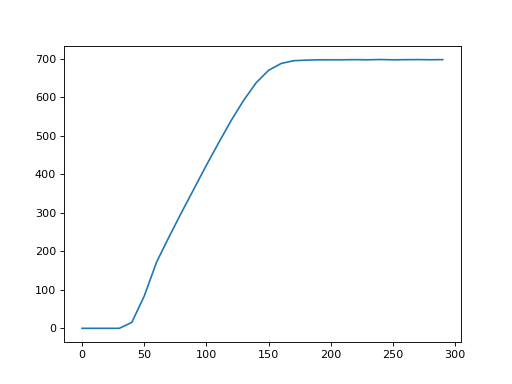

In [47]:
data = pd.read_hdf('/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5',key='efine')
fig = plt.figure()
axis = fig.add_subplot(111)
data_sel = data[(data['channel_id']==13) & (data['tac_id']==0)]
axis.plot(data_sel['tpulse'],data_sel['mu'])

In [35]:
filename = '/home/viherbos/DATA_daq/CAL_results/asic2_efine_fitted.h5'
channels = range(0,64)
tacs = range(0,4)
res=[]
for ch in channels:
    data_ch = pd.read_hdf(filename,key='efine')
    for tc in tacs:
        data_tc = data_ch[data_ch['tac_id']==tc]
        a,Q_fit,qoffset,ibias = TPcal.QDC_fit(data_tc,ch,tc,plot=False)
        res.append([ch,tc,qoffset[0],ibias,Q_fit.perr[0]/Q_fit.coeff[0]])

df_qfine = pd.DataFrame(res,columns=['channel_id','tac_id','qoffset','ibias','slope_err'])

Channel = 0 / Slope_Error = 0.019760
QOFFSET = -225.804699
IBIAS (Q/T) = 6.926938
Channel = 0 / Slope_Error = 0.020007
QOFFSET = -226.223568
IBIAS (Q/T) = 6.932713
Channel = 0 / Slope_Error = 0.019849
QOFFSET = -226.187687
IBIAS (Q/T) = 6.919150
Channel = 0 / Slope_Error = 0.019658
QOFFSET = -226.770150
IBIAS (Q/T) = 6.891176
Channel = 1 / Slope_Error = 0.018288
QOFFSET = -230.681235
IBIAS (Q/T) = 6.450271
Channel = 1 / Slope_Error = 0.018358
QOFFSET = -230.823176
IBIAS (Q/T) = 6.449940
Channel = 1 / Slope_Error = 0.018352
QOFFSET = -230.931565
IBIAS (Q/T) = 6.443734
Channel = 1 / Slope_Error = 0.018472
QOFFSET = -230.572855
IBIAS (Q/T) = 6.404924
Channel = 2 / Slope_Error = 0.017705
QOFFSET = -218.660971
IBIAS (Q/T) = 6.506193
Channel = 2 / Slope_Error = 0.018003
QOFFSET = -218.714733
IBIAS (Q/T) = 6.510171
Channel = 2 / Slope_Error = 0.017931
QOFFSET = -218.895551
IBIAS (Q/T) = 6.497062
Channel = 2 / Slope_Error = 0.017847
QOFFSET = -219.344440
IBIAS (Q/T) = 6.463228
Channel = 3 / Sl

Channel = 25 / Slope_Error = 0.020220
QOFFSET = -207.026435
IBIAS (Q/T) = 7.031062
Channel = 25 / Slope_Error = 0.020611
QOFFSET = -207.357997
IBIAS (Q/T) = 7.031268
Channel = 25 / Slope_Error = 0.020332
QOFFSET = -207.378275
IBIAS (Q/T) = 6.989634
Channel = 26 / Slope_Error = 0.021581
QOFFSET = -223.593810
IBIAS (Q/T) = 6.039356
Channel = 26 / Slope_Error = 0.021588
QOFFSET = -223.175634
IBIAS (Q/T) = 6.030937
Channel = 26 / Slope_Error = 0.021586
QOFFSET = -223.217469
IBIAS (Q/T) = 6.025333
Channel = 26 / Slope_Error = 0.021650
QOFFSET = -224.207504
IBIAS (Q/T) = 5.999112
Channel = 27 / Slope_Error = 0.022013
QOFFSET = -233.674904
IBIAS (Q/T) = 6.149964
Channel = 27 / Slope_Error = 0.021903
QOFFSET = -233.337376
IBIAS (Q/T) = 6.143540
Channel = 27 / Slope_Error = 0.022186
QOFFSET = -234.012089
IBIAS (Q/T) = 6.140271
Channel = 27 / Slope_Error = 0.021901
QOFFSET = -233.275379
IBIAS (Q/T) = 6.095197
Channel = 28 / Slope_Error = 0.018797
QOFFSET = -237.555656
IBIAS (Q/T) = 6.047368
Chan

Channel = 50 / Slope_Error = 0.015937
QOFFSET = -204.029671
IBIAS (Q/T) = 5.730242
Channel = 51 / Slope_Error = 0.021154
QOFFSET = -226.888527
IBIAS (Q/T) = 6.730713
Channel = 51 / Slope_Error = 0.021115
QOFFSET = -226.855624
IBIAS (Q/T) = 6.733345
Channel = 51 / Slope_Error = 0.020984
QOFFSET = -226.944881
IBIAS (Q/T) = 6.721941
Channel = 51 / Slope_Error = 0.021240
QOFFSET = -228.049083
IBIAS (Q/T) = 6.697479
Channel = 52 / Slope_Error = 0.017017
QOFFSET = -222.064593
IBIAS (Q/T) = 6.847248
Channel = 52 / Slope_Error = 0.016899
QOFFSET = -221.658988
IBIAS (Q/T) = 6.847960
Channel = 52 / Slope_Error = 0.016915
QOFFSET = -222.496391
IBIAS (Q/T) = 6.849708
Channel = 52 / Slope_Error = 0.016755
QOFFSET = -222.296560
IBIAS (Q/T) = 6.804901
Channel = 53 / Slope_Error = 0.017539
QOFFSET = -219.762206
IBIAS (Q/T) = 6.598604
Channel = 53 / Slope_Error = 0.017453
QOFFSET = -219.602753
IBIAS (Q/T) = 6.595731
Channel = 53 / Slope_Error = 0.017383
QOFFSET = -219.098107
IBIAS (Q/T) = 6.582685
Chan

In [9]:
df_qfine[df_qfine['channel_id']==13]

channel_id  tac_id     qoffset     ibias  slope_err
52          13       0 -271.105706  6.812067   0.021743
53          13       1 -270.939351  6.808731   0.021682
54          13       2 -271.313851  6.800960   0.021504
55          13       3 -271.838843  6.761006   0.021844

In [36]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic2_efine_cal.h5','w',complib="zlib",complevel=4)
storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()

# THRESHOLD T1

In [81]:
filename = "/home/viherbos/DATA_daq/CAL_data/asic0_t1_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


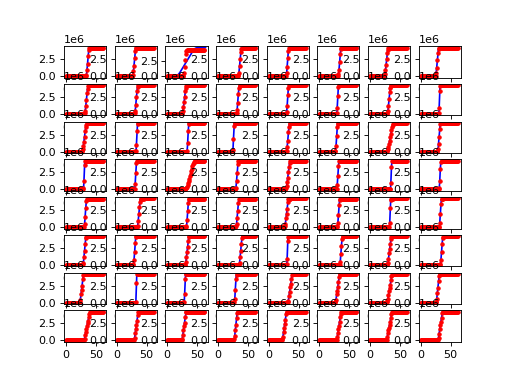

Channel = 0 / CHISQR = 105478981.537049
25
Channel = 1 / CHISQR = 295957668.620353
19
Channel = 2 / CHISQR = 493097513696.747559
18
Channel = 3 / CHISQR = 72838055.634599
25
Channel = 4 / CHISQR = 244743456.941088
21
Channel = 5 / CHISQR = 31645106.543288
23
Channel = 6 / CHISQR = 181161349.336148
17
Channel = 7 / CHISQR = 230501719.034429
18
Channel = 8 / CHISQR = 367724326.067032
23
Channel = 9 / CHISQR = 173051905.510559
23
Channel = 10 / CHISQR = 292246611.629223
17
Channel = 11 / CHISQR = 177180550.303071
22
Channel = 12 / CHISQR = 235522854.928801
23
Channel = 13 / CHISQR = 9829333.751118
20
Channel = 14 / CHISQR = 201270135.096733
22
Channel = 15 / CHISQR = 2332506.269955
23
Channel = 16 / CHISQR = 409890591.109380
19
Channel = 17 / CHISQR = 4046750.631308
23
Channel = 18 / CHISQR = 1794770.170192
27
Channel = 19 / CHISQR = 6293536.030156
18
Channel = 20 / CHISQR = 197012889.371982
22
Channel = 21 / CHISQR = 9705591.530669
18
Channel = 22 / CHISQR = 160087692.086634
20
Channel =

In [82]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],coeff[2]])

df_thr1 = pd.DataFrame(res,columns=['channel_id','thr_t1','slope','mu'])

<IPython.core.display.Javascript object>


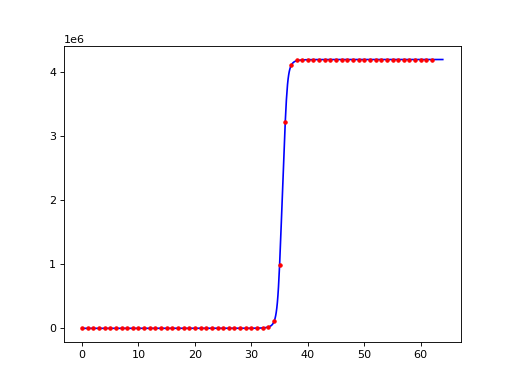

Channel = 30 / CHISQR = 6885234.057739
(27, <TOFPET_cal_lib.fitting_nohist object at 0x7f21f7baf3a0>)


In [86]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,30,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

# THRESHOLD T2

In [87]:
filename = "/home/viherbos/DATA_daq/CAL_data/asic0_t2_lsb58_baseline30.h5"
with pd.HDFStore(filename) as hdf:
    channels = hdf.keys()
    print(channels)

['/data']


<IPython.core.display.Javascript object>


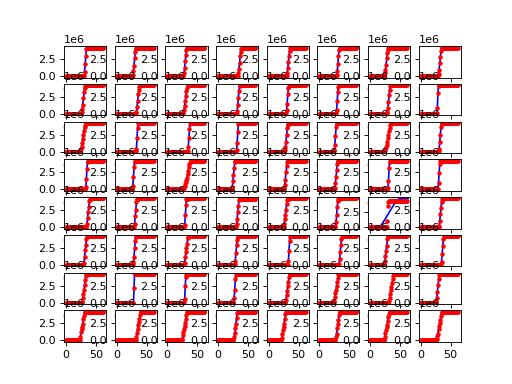

Channel = 0 / CHISQR = 10701377.990442
22
Channel = 1 / CHISQR = 348102647.376691
19
Channel = 2 / CHISQR = 109279139.544624
18
Channel = 3 / CHISQR = 227085247.889859
26
Channel = 4 / CHISQR = 208695219.025239
22
Channel = 5 / CHISQR = 247985088.133016
21
Channel = 6 / CHISQR = 353336807.716732
18
Channel = 7 / CHISQR = 68948463.166613
21
Channel = 8 / CHISQR = 395679552.866165
19
Channel = 9 / CHISQR = 331262601.927958
25
Channel = 10 / CHISQR = 309947427.776644
18
Channel = 11 / CHISQR = 53567364.796261
23
Channel = 12 / CHISQR = 258790975.197556
22
Channel = 13 / CHISQR = 179784143.627481
19
Channel = 14 / CHISQR = 235530272.120936
22
Channel = 15 / CHISQR = 7074653.408268
20
Channel = 16 / CHISQR = 439991366.017461
15
Channel = 17 / CHISQR = 18913288.810184
26
Channel = 18 / CHISQR = 22250205.697820
28
Channel = 19 / CHISQR = 56112234.792053
23
Channel = 20 / CHISQR = 320030102.780236
20
Channel = 21 / CHISQR = 27930848.088289
17
Channel = 22 / CHISQR = 632301432.253363
15
Channel

In [88]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'

fig, axs = plt.subplots(8,8)
res = []

for i in range(0,8):
    for j in range(0,8):
        if data[data['channel_id']==i*8+j].size == 0:
            pass
        else: 
            sol,fit=TPcal.Tn_fit(data,i*8+j,thr,min_count=1,plot=True,axis=axs[i,j])
            print(sol)
            res.append([i*8+j,sol,fit.coeff[0],coeff[2]])
        
df_thr2 = pd.DataFrame(res,columns=['channel_id','thr_t2','slope','mu'])

<IPython.core.display.Javascript object>


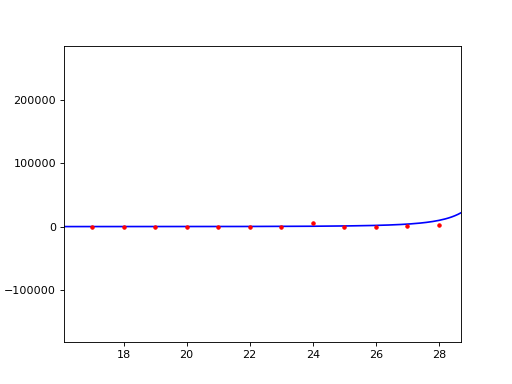

Channel = 30 / CHISQR = 16272562.152866
(22, <TOFPET_cal_lib.fitting_nohist object at 0x7f22022732e0>)


In [89]:
data = pd.read_hdf(filename,key='data')
thr = 'vth_t1'
fig, axs = plt.subplots(1)
sol=TPcal.Tn_fit(data,30,'vth_t1',min_count=1,plot=True,axis=axs)
#axs.plot(np.arange(0,62),TPcal.saturation(np.arange(0,62),18,3.6,34,2E6))
print(sol)

In [73]:
storage = pd.HDFStore('/home/viherbos/DATA_daq/CAL_results/asic0_thresholds_cal.h5','w',complib="zlib",complevel=4)
storage.put('thr1',df_thr1,index=False,format='table',data_columns=True)
storage.put('thr2',df_thr2,index=False,format='table',data_columns=True)
#storage.put('efine',df_qfine,index=False,format='table',data_columns=True)
storage.close()